#Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
# Make a list of calibration images (Read in from the camera_cal directory)
images = glob.glob('camera_cal/calibration*.jpg')

#Previewed a few calibration images such as calibration3.jpg, to find the number of inside corners
nx = 9
ny = 6

# prepare object points
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the calibration images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners and save the images with corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        write_name = 'corners_found'+str(idx)+'.jpg'
        path = './output_images/images_with_corners/'
        cv2.imwrite(path + write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

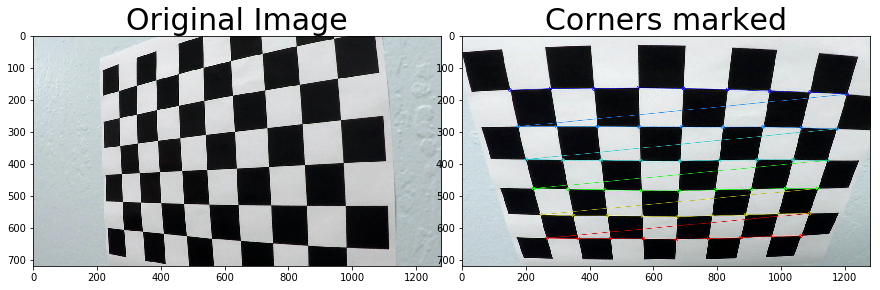

In [3]:
###Visualization of Inside corners marked on one of the Calibration images
img = cv2.imread('camera_cal/calibration4.jpg')
corners_marked_image  = cv2.imread('output_images/images_with_corners/corners_found11.jpg')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
f.subplots_adjust(hspace=0.3, wspace=0.05)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(corners_marked_image)
ax2.set_title('Corners marked', fontsize=30)

#set the image size (parameter for cv2.calibrateCamera)
img_size = (img.shape[1],img.shape[2])

In [4]:
###Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [5]:
###Save the camera calibration result
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_calibration_result.p", "wb" ) )

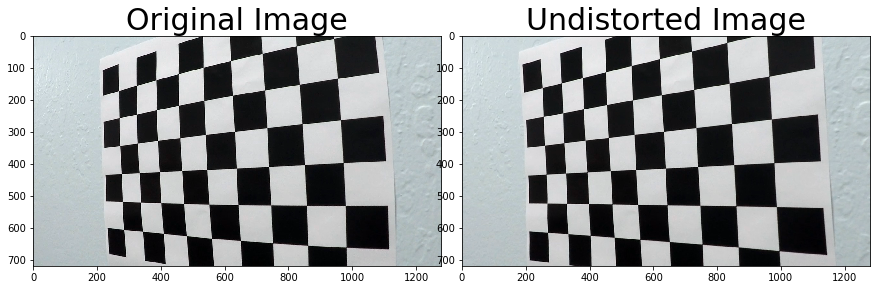

In [6]:
###Visualization of Undistortion
img = cv2.imread('camera_cal/calibration4.jpg')
corners_marked_image  = cv2.imread('output_images/images_with_corners/corners_found11.jpg')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
f.subplots_adjust(hspace=0.3, wspace=0.05)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
dst = cv2.undistort(img, mtx, dist, None, mtx)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

#set the image size (parameter for cv2.calibrateCamera)
img_size = (img.shape[1],img.shape[2])

#Apply a distortion correction to raw images.

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


with open("camera_calibration_result.p", mode='rb') as f:
    camera_calib = pickle.load(f)
mtx = camera_calib["mtx"]
dist = camera_calib["dist"]

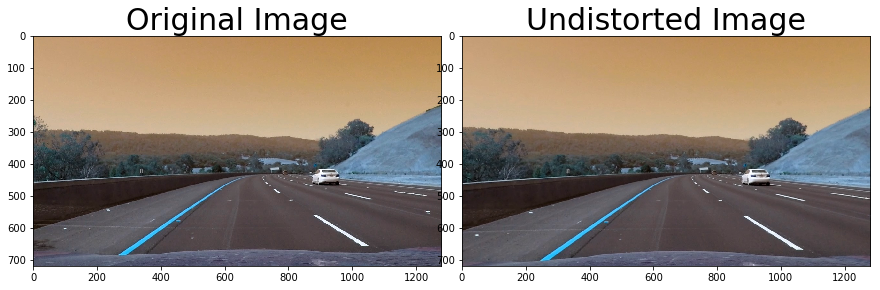

In [8]:
#Visualize raw input image and the original image

raw_image = cv2.imread("test_images/test3.jpg")
undistorted_image = cv2.undistort(raw_image, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
f.subplots_adjust(hspace=0.3, wspace=0.05)
ax1.imshow(raw_image)
ax1.set_title('Original Image', fontsize=30)
dst = cv2.undistort(img, mtx, dist, None, mtx)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=30)

In [ ]:
#Saving undistorted images

test_images = glob.glob('test_images/test*.jpg')

for idx, fname in enumerate(test_images):
    test_image = cv2.imread(fname)
    write_name = 'undistorted_image'+str(idx)+'.jpg'
    path = './output_images/undistorted_images/'
    cv2.imwrite(path + write_name,cv2.undistort(test_image, mtx, dist, None, mtx) )


In [ ]:
#Saving undistorted images (Straight line images)

test_images = glob.glob('test_images/straight_lines*.jpg')

for idx, fname in enumerate(test_images):
    test_image = cv2.imread(fname)
    write_name = 'undistorted_image_straight_lines'+str(idx)+'.jpg'
    path = './output_images/undistorted_images/'
    cv2.imwrite(path + write_name,cv2.undistort(test_image, mtx, dist, None, mtx) )


In [9]:
# Parameters
imshape = raw_image.shape

height = raw_image.shape[0]
offset = 40
offset_height = height - offset
horizontal_offset = 50

blank_canvas = np.zeros((720, 1280))
colour_canvas = cv2.cvtColor(blank_canvas.astype(np.uint8), cv2.COLOR_GRAY2RGB)

#Use color transforms, gradients, etc., to create a thresholded binary image.


In [10]:
from helperfunctions import *

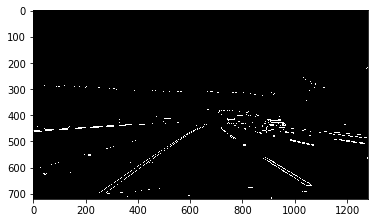

In [11]:
combined_binary = apply_thresholds(undistorted_image)
plt.imshow(combined_binary, cmap="gray")

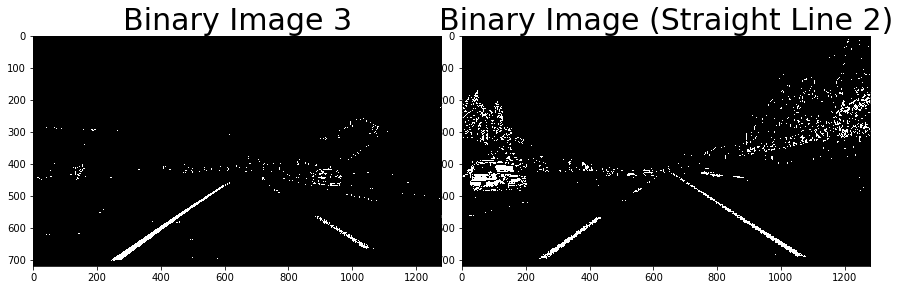

In [12]:
#Visualization of Binary Images

xgrad_thresh_temp = (50,100)
s_thresh_temp=(155,255)

combined_binary_1 = apply_threshold_rev(undistorted_image, xgrad_thresh=xgrad_thresh_temp, s_thresh=s_thresh_temp)
undistorted_image_2 = cv2.imread('output_images/undistorted_images/undistorted_image_straight_lines2.jpg')
combined_binary_2 = apply_threshold_rev(undistorted_image_2, xgrad_thresh=xgrad_thresh_temp, s_thresh=s_thresh_temp)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
f.subplots_adjust(hspace=0.3, wspace=0.05)
ax1.imshow(combined_binary_1, cmap="gray")
ax1.set_title('Binary Image 3', fontsize=30)
ax2.imshow(combined_binary_2, cmap="gray")
ax2.set_title('Binary Image (Straight Line 2)', fontsize=30)

#Apply a perspective transform to rectify binary image ("birds-eye view"). Select a Region of interest based on an approximation of a polygon to mask 

In [14]:



src = np.float32(
    [[240, 700],
     [550, 470],
     [700, 470],
     [1150, 700]])

dst = np.float32(
    [[200,720],
     [200,0],
     [1120,0],
     [1120,720]])


M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)


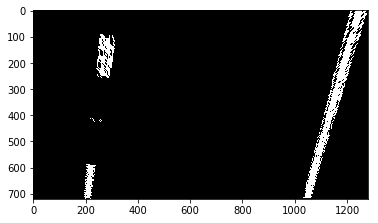

In [16]:

warped_2 = cv2.warpPerspective(combined_binary_2, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
plt.imshow(warped_2,cmap="gray" )

In [17]:
from scipy import signal

Left coeffs: [ -7.72025054e-05  -6.50670120e-02   2.90467750e+02]
righty[0]: , 711.0 , rightx[0]:  973
Right coeffs:  [  4.44338155e-06  -2.83715489e-01   1.24642420e+03]


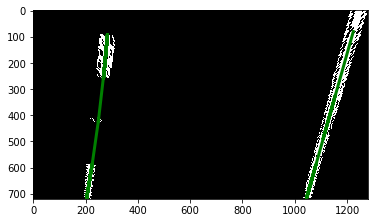

In [18]:
#  (Histogram)Detect lane pixels and fit to find the lane boundary.

leftx, lefty, rightx, righty = None, None, None, None
# Take a histogram of the bottom half of the image
leftx, lefty, rightx, righty = histogram_pixels(warped_2, horizontal_offset=horizontal_offset)

# Fit a second order polynomial to each fake lane line
left_fit, left_coeffs = fit_second_order_poly(lefty, leftx, return_coeffs=True)
print("Left coeffs:", left_coeffs)
print("righty[0]: ,", righty[0], ", rightx[0]: ", rightx[0])
right_fit, right_coeffs = fit_second_order_poly(righty, rightx, return_coeffs=True)
print("Right coeffs: ", right_coeffs)

# Plot data

plt.plot(left_fit, lefty, color='green', linewidth=3)
plt.plot(right_fit, righty, color='green', linewidth=3)
plt.imshow(warped_2, cmap="gray")

Left coeffs:  [ -7.72025054e-05  -6.50670120e-02   2.90467750e+02]
Right fit:  [  4.44338155e-06  -2.83715489e-01   1.24642420e+03]


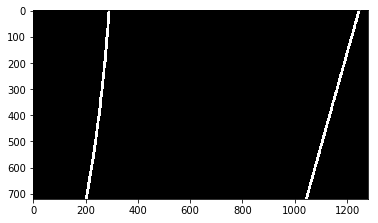

In [19]:
print("Left coeffs: ", left_coeffs)
print("Right fit: ", right_coeffs)
polyfit_left = None
polyfit_left = draw_poly(blank_canvas, lane_poly, left_coeffs, 30)
polyfit_drawn = None
polyfit_drawn = draw_poly(polyfit_left, lane_poly, right_coeffs, 30)
plt.imshow(polyfit_drawn, cmap="gray")

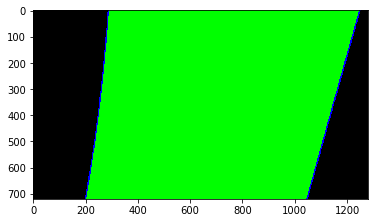

In [20]:
trace = colour_canvas
trace[polyfit_drawn > 1] = [0,0,255]
area = highlight_lane_line_area(blank_canvas, left_coeffs, right_coeffs)
trace[area == 1] = [0,255,0]
plt.imshow(trace)

#Determine the curvature of the lane and vehicle position with respect to center.

In [22]:
# Define y-value where we want radius of curvature (closest to the vehicle)
y_eval = 719
left_curverad = np.absolute(((1 + (2 * left_coeffs[0] * y_eval + left_coeffs[1])**2) ** 1.5) \
                /(2 * left_coeffs[0]))
right_curverad = np.absolute(((1 + (2 * right_coeffs[0] * y_eval + right_coeffs[1]) ** 2) ** 1.5) \
                 /(2 * right_coeffs[0]))
print("Left lane curve radius: ", left_curverad, "pixels")
print("Right lane curve radius: ", right_curverad, "pixels")
curvature = (left_curverad + right_curverad) / 2
centre = center(719, left_coeffs, right_coeffs)
min_curvature = min(left_curverad, right_curverad)

Left lane curve radius:  6780.00756385 pixels
Right lane curve radius:  125755.012615 pixels


#Warp the detected lane boundaries back onto the original image.

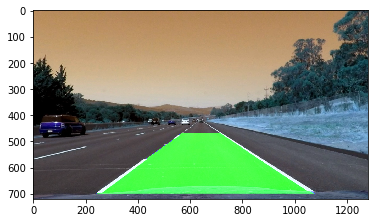

In [23]:
lane_lines = cv2.warpPerspective(trace, Minv, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)

# Convert to colour
combined_img = cv2.add(lane_lines, undistorted_image_2)
plt.imshow(combined_img)

#Display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

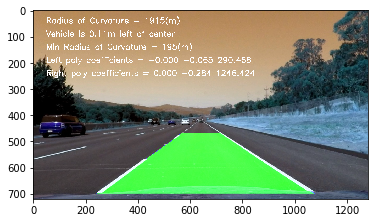

In [24]:
add_figures_to_image(combined_img, curvature=curvature, 
                     vehicle_position=centre, 
                     min_curvature=min_curvature,
                     left_coeffs=left_coeffs,
                     right_coeffs=right_coeffs)
plt.imshow(combined_img)

#streamlined pipeline for image

Left coeffs: [ -9.51216608e-05  -5.00750165e-02   2.88493314e+02]
Right coeffs:  [  1.31445013e-05  -2.92281221e-01   1.24832304e+03]
Left lane curve radius:  5534.12084873
Right lane curve radius:  42381.7392231
Left coeffs:  [ -9.51216608e-05  -5.00750165e-02   2.88493314e+02]
Right fit:  [  1.31445013e-05  -2.92281221e-01   1.24832304e+03]
polyfit shape:  (720, 1280)


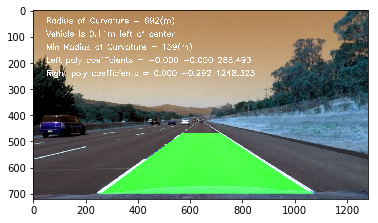

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

from helperfunctions import *

with open("camera_calibration_result.p", mode='rb') as f:
    camera_calib = pickle.load(f)
mtx = camera_calib["mtx"]
dist = camera_calib["dist"]

prev_left_coeffs = None
prev_right_coeffs = None

def image_pipeline(file, filepath=False):
    global prev_left_coeffs
    global prev_right_coeffs
    
    plt.clf()
    
    if filepath == True:
        # Read in image
        raw = cv2.imread(file)
    else:
        raw = file

    # Parameters
    imshape = raw.shape
    
    src = np.float32(
    [[240, 700],
     [550, 470],
     [700, 470],
     [1150, 700]])

    dst = np.float32(
    [[200,720],
     [200,0],
     [1120,0],
     [1120,720]])


    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)

    height = raw.shape[0]
    offset = 50
    offset_height = height - offset

    blank_canvas = np.zeros((720, 1280))
    colour_canvas = cv2.cvtColor(blank_canvas.astype(np.uint8), cv2.COLOR_GRAY2RGB)

    # Apply distortion correction to raw image
    image = cv2.undistort(raw, mtx, dist, None, mtx)

    found_fit = False
    curvature_checked = False
    
    xgrad_thresh_temp = (40,100)
    s_thresh_temp=(150,255)
    
    while found_fit == False:
        combined_binary = apply_threshold_rev(image, xgrad_thresh=xgrad_thresh_temp, s_thresh=s_thresh_temp)
        
        # Warp onto birds-eye-view
        warped = cv2.warpPerspective(combined_binary, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
        #plt.imshow(warped, cmap="gray")
        # Histogram and get pixels in window

        leftx, lefty, rightx, righty = histogram_pixels(warped, horizontal_offset=40)

        if len(leftx) > 1 and len(rightx) > 1:
            found_fit = True
        xgrad_thresh_temp = (xgrad_thresh_temp[0] - 2, xgrad_thresh_temp[1] + 2)
        s_thresh_temp = (s_thresh_temp[0] - 2, s_thresh_temp[1] + 2)

    left_fit, left_coeffs = fit_second_order_poly(lefty, leftx, return_coeffs=True)
    print("Left coeffs:", left_coeffs)
    right_fit, right_coeffs = fit_second_order_poly(righty, rightx, return_coeffs=True)
    print("Right coeffs: ", right_coeffs)

    # Plot image
    
    """
    plt.plot(left_fit, lefty, color='green', linewidth=3)
    plt.plot(right_fit, righty, color='green', linewidth=3)
    plt.imshow(warped, cmap="gray")
    """

    # Determine curvature of the lane

    y_eval = 719 # measure the radius of curvature closest to your vehicle, 
   
    left_curverad = np.absolute(((1 + (2 * left_coeffs[0] * y_eval + left_coeffs[1])**2) ** 1.5) \
                    /(2 * left_coeffs[0]))
    right_curverad = np.absolute(((1 + (2 * right_coeffs[0] * y_eval + right_coeffs[1]) ** 2) ** 1.5) \
                     /(2 * right_coeffs[0]))
    print("Left lane curve radius: ", left_curverad)
    print("Right lane curve radius: ", right_curverad)
    curvature = (left_curverad + right_curverad) / 2
    min_curverad = min(left_curverad, right_curverad)


    if not plausible_curvature(left_curverad, right_curverad) or \
        not plausible_continuation_of_traces(left_coeffs, right_coeffs, prev_left_coeffs, prev_right_coeffs):
            if prev_left_coeffs is not None and prev_right_coeffs is not None:
                left_coeffs = prev_left_coeffs
                right_coeffs = prev_right_coeffs

    prev_left_coeffs = left_coeffs
    prev_right_coeffs = right_coeffs
    
    # center
    centre = center(719, left_coeffs, right_coeffs)
        
    ## 7. Warp the detected lane boundaries back onto the original image.

    print("Left coeffs: ", left_coeffs)
    print("Right fit: ", right_coeffs)
    polyfit_left = draw_poly(blank_canvas, lane_poly, left_coeffs, 30)
    polyfit_drawn = draw_poly(polyfit_left, lane_poly, right_coeffs, 30)
    
    # Convert to colour and highlight lane line area
    trace = colour_canvas
    trace[polyfit_drawn > 1] = [0,0,255]
    print("polyfit shape: ", polyfit_drawn.shape)
    area = highlight_lane_line_area(blank_canvas, left_coeffs, right_coeffs)
    trace[area == 1] = [0,255,0]

    lane_lines = cv2.warpPerspective(trace, Minv, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
 
    combined_img = cv2.add(lane_lines, image)
    add_figures_to_image(combined_img, curvature=curvature, 
                         vehicle_position=centre, 
                         min_curvature=min_curverad,
                         left_coeffs=left_coeffs,
                         right_coeffs=right_coeffs)
    plt.imshow(combined_img)
    return combined_img

combined_img = image_pipeline("test_images/straight_lines2.jpg", filepath=True)

In [27]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Left coeffs: [ -3.61841394e-04   3.88682278e-01   8.78165453e+01]
Right coeffs:  [  2.92070576e-04   5.58763315e-02   1.00798911e+03]
Left lane curve radius:  1417.89771592
Right lane curve radius:  2325.19884183
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)
[MoviePy] >>>> Building video Harder_project_video_lane_lines.mp4
[MoviePy] Writing video Harder_project_video_lane_lines.mp4


  0%|          | 1/1200 [00:00<09:16,  2.16it/s]

Left coeffs: [ -3.61841394e-04   3.88682278e-01   8.78165453e+01]
Right coeffs:  [  2.92070576e-04   5.58763315e-02   1.00798911e+03]
Left lane curve radius:  1417.89771592
Right lane curve radius:  2325.19884183
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  0%|          | 2/1200 [00:00<09:16,  2.15it/s]

Left coeffs: [ -3.32120610e-04   3.79610194e-01   7.56741710e+01]
Right coeffs:  [ -1.28138813e-05   3.05767893e-01   9.90253719e+02]
Left lane curve radius:  1527.20784549
Right lane curve radius:  43951.1634035
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  0%|          | 3/1200 [00:01<10:35,  1.88it/s]

Left coeffs: [ -3.13982716e-04   3.76872956e-01   6.71387739e+01]
Right coeffs:  [ -6.18612861e-04   6.54097547e-01   9.54348591e+02]
Left lane curve radius:  1605.76835567
Right lane curve radius:  876.404314095
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  0%|          | 4/1200 [00:02<10:39,  1.87it/s]

Left coeffs: [ -3.10597880e-04   3.86471526e-01   5.78977178e+01]
Right coeffs:  [  6.94376049e-05   2.28449984e-01   1.00791617e+03]
Left lane curve radius:  1618.54812655
Right lane curve radius:  8395.69323425
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  0%|          | 5/1200 [00:02<10:23,  1.92it/s]

Left coeffs: [ -2.94425529e-04   3.81927756e-01   5.31006046e+01]
Right coeffs:  [ -4.12434412e-04   4.87522041e-01   9.75851310e+02]
Left lane curve radius:  1702.60206509
Right lane curve radius:  1232.63285514
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  0%|          | 6/1200 [00:03<10:37,  1.87it/s]

Left coeffs: [ -2.87029435e-04   3.86856386e-01   4.68587661e+01]
Right coeffs:  [  8.01205011e-05   1.92041992e-01   1.00799698e+03]
Left lane curve radius:  1743.73363133
Right lane curve radius:  7144.86336834
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|          | 7/1200 [00:03<10:48,  1.84it/s]

Left coeffs: [ -2.77941741e-04   3.84600915e-01   4.60405423e+01]
Right coeffs:  [  8.15622431e-05   2.58549977e-01   9.82190121e+02]
Left lane curve radius:  1799.55175978
Right lane curve radius:  7474.011759
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|          | 8/1200 [00:04<10:22,  1.91it/s]

Left coeffs: [ -3.21568175e-04   4.23616757e-01   4.24201108e+01]
Right coeffs:  [ -8.07631865e-06   3.83856389e-01   9.35949603e+02]
Left lane curve radius:  1558.39241217
Right lane curve radius:  75213.0265932
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|          | 9/1200 [00:04<09:59,  1.99it/s]

Left coeffs: [ -3.03745139e-04   4.01329031e-01   5.14968826e+01]
Right coeffs:  [  7.07367886e-05   3.83051063e-01   9.08058833e+02]
Left lane curve radius:  1649.22200706
Right lane curve radius:  9701.22150047
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|          | 10/1200 [00:05<09:37,  2.06it/s]

Left coeffs: [ -3.36754151e-04   4.33245696e-01   4.43776906e+01]
Right coeffs:  [  2.39488629e-04   1.38130698e-01   9.34191244e+02]
Left lane curve radius:  1490.56079923
Right lane curve radius:  2857.82198649
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|          | 11/1200 [00:05<09:30,  2.08it/s]

Left coeffs: [ -2.80892541e-04   3.90196341e-01   4.46997475e+01]
Right coeffs:  [  2.05192150e-04   1.77257709e-01   9.29167235e+02]
Left lane curve radius:  1780.54330069
Right lane curve radius:  3296.07340216
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|          | 12/1200 [00:06<09:26,  2.10it/s]

Left coeffs: [ -2.58720331e-04   3.79811731e-01   3.98768258e+01]
Right coeffs:  [  2.03916916e-04   1.93358399e-01   9.24568865e+02]
Left lane curve radius:  1932.76385099
Right lane curve radius:  3372.48903567
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|          | 13/1200 [00:06<09:37,  2.06it/s]

Left coeffs: [ -2.19579005e-04   3.52729099e-01   3.74795124e+01]
Right coeffs:  [  3.78155383e-04   9.05037151e-02   9.38757973e+02]
Left lane curve radius:  2281.75587114
Right lane curve radius:  2195.69927213
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|          | 14/1200 [00:07<09:34,  2.06it/s]

Left coeffs: [ -2.11042419e-04   3.49722631e-01   3.47530453e+01]
Right coeffs:  [ -4.73474711e-04   6.01553181e-01   8.62589768e+02]
Left lane curve radius:  2376.79569506
Right lane curve radius:  1066.00030471
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|▏         | 15/1200 [00:07<09:19,  2.12it/s]

Left coeffs: [ -2.46849713e-04   3.87818326e-01   2.48572040e+01]
Right coeffs:  [ -4.52177939e-04   6.44455678e-01   8.35758155e+02]
Left lane curve radius:  2028.8031825
Right lane curve radius:  1105.81472505
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|▏         | 16/1200 [00:07<09:08,  2.16it/s]

Left coeffs: [ -2.47896165e-04   3.90760643e-01   2.21914370e+01]
Right coeffs:  [  1.52354365e-03  -1.26935713e+00   1.24306576e+03]
Left lane curve radius:  2020.53106864
Right lane curve radius:  825.233305294
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  1%|▏         | 17/1200 [00:08<09:04,  2.17it/s]

Left coeffs: [ -3.22103021e-04   4.62860220e-01   6.64366116e+00]
Right coeffs:  [  1.81858555e-03  -1.41997522e+00   1.24666396e+03]
Left lane curve radius:  1552.29863108
Right lane curve radius:  1040.42959543
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 18/1200 [00:08<09:00,  2.19it/s]

Left coeffs: [ -3.27813883e-04   4.71152872e-01   3.06863355e+00]
Right coeffs:  [  2.41830040e-03  -1.95372071e+00   1.34328442e+03]
Left lane curve radius:  1525.25585389
Right lane curve radius:  1251.84277482
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 19/1200 [00:09<09:05,  2.17it/s]

Left coeffs: [ -4.41578842e-04   5.92034307e-01  -2.72891286e+01]
Right coeffs:  [  2.58579988e-03  -2.06647783e+00   1.35258066e+03]
Left lane curve radius:  1135.43609524
Right lane curve radius:  1392.27653505
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 20/1200 [00:09<09:21,  2.10it/s]

Left coeffs: [ -5.33677994e-04   6.91620500e-01  -5.36917260e+01]
Right coeffs:  [  4.11302830e-04  -3.89579378e-01   1.22616755e+03]
Left lane curve radius:  944.982525331
Right lane curve radius:  1290.71366118
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 21/1200 [00:10<09:25,  2.09it/s]

Left coeffs: [ -5.87514053e-04   7.54958658e-01  -7.58876063e+01]
Right coeffs:  [  3.83341318e-03  -3.26902830e+00   1.65893419e+03]
Left lane curve radius:  861.378404044
Right lane curve radius:  1932.75623987
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 22/1200 [00:10<09:20,  2.10it/s]

Left coeffs: [ -2.04612601e-04   3.47357782e-01   2.30518341e+01]
Right coeffs:  [  3.00909507e-03  -2.83343030e+00   1.61382297e+03]
Left lane curve radius:  2453.99442234
Right lane curve radius:  965.020687224
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 23/1200 [00:11<09:31,  2.06it/s]

Left coeffs: [ -2.40183783e-04   4.02118143e-01  -2.54738765e+00]
Right coeffs:  [  3.92597616e-03  -3.50078921e+00   1.72555763e+03]
Left lane curve radius:  2091.79813938
Right lane curve radius:  1687.74217941
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 24/1200 [00:11<09:33,  2.05it/s]

Left coeffs: [ -5.54858644e-04   7.82208641e-01  -1.20360529e+02]
Right coeffs:  [  3.82053168e-03  -3.51941393e+00   1.75315163e+03]
Left lane curve radius:  901.462685928
Right lane curve radius:  1418.94784265
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 25/1200 [00:12<09:29,  2.06it/s]

Left coeffs: [ -6.21287470e-04   8.74187610e-01  -1.55728514e+02]
Right coeffs:  [  3.43024943e-03  -3.20691596e+00   1.72785206e+03]
Left lane curve radius:  805.226589195
Right lane curve radius:  1156.63106455
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 26/1200 [00:12<09:13,  2.12it/s]

Left coeffs: [ -5.89270836e-04   8.42175077e-01  -1.52096057e+02]
Right coeffs:  [  7.90900328e-04  -7.80326791e-01   1.32298742e+03]
Left lane curve radius:  848.54063952
Right lane curve radius:  756.813041822
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 27/1200 [00:13<09:31,  2.05it/s]

Left coeffs: [ -3.14560822e-04   5.27931518e-01  -6.80624601e+01]
Right coeffs:  [  4.51973592e-03  -4.15844309e+00   1.90196224e+03]
Left lane curve radius:  1603.16165828
Right lane curve radius:  1824.81199428
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 28/1200 [00:13<09:02,  2.16it/s]

Left coeffs: [ -6.27435516e-04   9.10440638e-01  -1.85760810e+02]
Right coeffs:  [  4.81057750e-03  -4.42650209e+00   1.96790179e+03]
Left lane curve radius:  796.974788189
Right lane curve radius:  2010.38806707
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 29/1200 [00:14<08:45,  2.23it/s]

Left coeffs: [ -7.31353090e-04   1.04293474e+00  -2.29418275e+02]
Right coeffs:  [  1.69607118e-03  -1.36350167e+00   1.29581840e+03]
Left lane curve radius:  683.742836183
Right lane curve radius:  933.635307492
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  2%|▎         | 30/1200 [00:14<08:28,  2.30it/s]

Left coeffs: [ -6.95046382e-04   1.00450659e+00  -2.22104836e+02]
Right coeffs:  [  1.80037191e-03  -1.41990615e+00   1.30531060e+03]
Left lane curve radius:  719.403751834
Right lane curve radius:  1011.12016481
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 31/1200 [00:14<08:14,  2.36it/s]

Left coeffs: [ -4.66317252e-04   7.30000437e-01  -1.43592060e+02]
Right coeffs:  [  1.44150526e-03  -1.13866438e+00   1.27730321e+03]
Left lane curve radius:  1077.91816746
Right lane curve radius:  888.954463504
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 32/1200 [00:15<08:05,  2.41it/s]

Left coeffs: [ -9.30796750e-04   1.33332870e+00  -3.40615699e+02]
Right coeffs:  [ -8.56956710e-04   7.89772541e-01   1.04483077e+03]
Left lane curve radius:  537.195629827
Right lane curve radius:  762.987451683
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 33/1200 [00:15<07:57,  2.44it/s]

Left coeffs: [ -1.09506537e-03   1.54770248e+00  -4.10113440e+02]
Right coeffs:  [ -1.22663066e-03   1.15670697e+00   9.59522784e+02]
Left lane curve radius:  457.093179931
Right lane curve radius:  652.691149509
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 34/1200 [00:16<08:11,  2.37it/s]

Left coeffs: [ -1.56892840e-03   2.16319162e+00  -6.06972658e+02]
Right coeffs:  [  1.21369203e-03  -1.10888318e+00   1.28644424e+03]
Left lane curve radius:  322.825816666
Right lane curve radius:  686.091139655
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 35/1200 [00:16<08:13,  2.36it/s]

Left coeffs: [ -1.51413946e-03   2.09344110e+00  -5.80972627e+02]
Right coeffs:  [ -1.10263765e-04  -1.50816549e-01   1.20571259e+03]
Left lane curve radius:  333.712726637
Right lane curve radius:  5200.94968101
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 36/1200 [00:17<08:30,  2.28it/s]

Left coeffs: [  4.08742011e-05   1.04547263e-01   5.57889866e+01]
Right coeffs:  [ -1.12190688e-03   1.10396237e+00   9.56162471e+02]
Left lane curve radius:  12725.3609647
Right lane curve radius:  629.901536539
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 37/1200 [00:17<08:21,  2.32it/s]

Left coeffs: [ -8.51689594e-04   1.10545246e+00  -2.11543936e+02]
Right coeffs:  [ -8.00833939e-05  -1.40670463e-01   1.16041030e+03]
Left lane curve radius:  599.641171921
Right lane curve radius:  6866.36121986
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 38/1200 [00:17<08:15,  2.35it/s]

Left coeffs: [ -9.63070962e-04   1.22190935e+00  -2.35278657e+02]
Right coeffs:  [  2.37791954e-04  -3.41401306e-01   1.20538724e+03]
Left lane curve radius:  539.996793571
Right lane curve radius:  2102.67930877
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 39/1200 [00:18<08:10,  2.37it/s]

Left coeffs: [ -1.17736490e-03   1.44912457e+00  -2.87994324e+02]
Right coeffs:  [  1.27649782e-04  -1.38267204e-01   1.13115223e+03]
Left lane curve radius:  463.137922763
Right lane curve radius:  3929.02663199
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 40/1200 [00:18<08:04,  2.39it/s]

Left coeffs: [ -1.25688671e-03   1.53362050e+00  -3.07165990e+02]
Right coeffs:  [ -3.07449727e-03   3.39197349e+00   3.15630250e+02]
Left lane curve radius:  443.364026723
Right lane curve radius:  480.540627185
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 41/1200 [00:19<07:59,  2.42it/s]

Left coeffs: [ -1.45131115e-03   1.75086808e+00  -3.60538816e+02]
Right coeffs:  [ -1.74028209e-03   1.54157051e+00   8.52846504e+02]
Left lane curve radius:  404.51768309
Right lane curve radius:  766.41950029
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▎         | 42/1200 [00:19<07:58,  2.42it/s]

Left coeffs: [ -1.58905552e-03   1.91320397e+00  -4.04046144e+02]
Right coeffs:  [ -3.39407135e-04   5.40382495e-01   1.01677002e+03]
Left lane curve radius:  382.123373359
Right lane curve radius:  1479.20888661
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▎         | 43/1200 [00:19<08:03,  2.39it/s]

Left coeffs: [ -1.71682989e-03   2.07088705e+00  -4.49712679e+02]
Right coeffs:  [  1.59264604e-04   1.01669689e-01   1.09271342e+03]
Left lane curve radius:  363.073428745
Right lane curve radius:  3668.24151263
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▎         | 44/1200 [00:20<08:25,  2.29it/s]

Left coeffs: [  3.76674198e-03  -3.93460808e+00   1.12152440e+03]
Right coeffs:  [  3.54017720e-04  -6.38826722e-02   1.12449200e+03]
Left lane curve radius:  758.508281764
Right lane curve radius:  1852.41426265
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 45/1200 [00:20<08:15,  2.33it/s]

Left coeffs: [  2.95632364e-03  -3.40472498e+00   1.11381682e+03]
Right coeffs:  [  7.61506368e-04  -4.35104900e-01   1.19996993e+03]
Left lane curve radius:  380.353193205
Right lane curve radius:  1129.3055272
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 46/1200 [00:21<08:11,  2.35it/s]

Left coeffs: [ -1.82514670e-03   2.23816864e+00  -5.06443932e+02]
Right coeffs:  [  7.45872878e-04  -4.62680144e-01   1.22002121e+03]
Left lane curve radius:  337.537309372
Right lane curve radius:  1077.25187557
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 47/1200 [00:21<08:04,  2.38it/s]

Left coeffs: [ -1.76087666e-03   2.16613365e+00  -4.87228023e+02]
Right coeffs:  [  8.03826488e-04  -5.13799467e-01   1.23521051e+03]
Left lane curve radius:  342.876967638
Right lane curve radius:  1043.99019381
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 48/1200 [00:22<08:04,  2.38it/s]

Left coeffs: [ -2.10769670e-03   2.54558948e+00  -5.90564539e+02]
Right coeffs:  [ -7.20191729e-05   5.40836122e-02   1.15221776e+03]
Left lane curve radius:  325.779258615
Right lane curve radius:  6968.10728412
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 49/1200 [00:22<08:01,  2.39it/s]

Left coeffs: [ -1.95941517e-03   2.42000449e+00  -5.65754516e+02]
Right coeffs:  [ -1.87837032e-04   1.63538687e-01   1.13547155e+03]
Left lane curve radius:  318.031447476
Right lane curve radius:  2707.35841013
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 50/1200 [00:22<08:01,  2.39it/s]

Left coeffs: [  2.47286174e-03  -2.79361985e+00   9.41742771e+02]
Right coeffs:  [  6.20017435e-04  -3.60753754e-01   1.21221941e+03]
Left lane curve radius:  402.017045558
Right lane curve radius:  1170.27330397
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 51/1200 [00:23<08:02,  2.38it/s]

Left coeffs: [ -1.83802295e-03   2.31134271e+00  -5.44466962e+02]
Right coeffs:  [ -3.84501557e-04   2.92094704e-01   1.13025250e+03]
Left lane curve radius:  318.149687852
Right lane curve radius:  1435.30708073
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 52/1200 [00:23<08:03,  2.37it/s]

Left coeffs: [  2.96196145e-03  -3.15185970e+00   9.90206622e+02]
Right coeffs:  [  3.70933171e-04  -1.97139333e-01   1.20595010e+03]
Left lane curve radius:  560.793256313
Right lane curve radius:  1582.92201728
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 53/1200 [00:24<08:00,  2.39it/s]

Left coeffs: [  3.66109672e-03  -3.70925655e+00   1.08650988e+03]
Right coeffs:  [  4.33104180e-04  -2.85123741e-01   1.22756735e+03]
Left lane curve radius:  863.493454869
Right lane curve radius:  1357.44327101
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 54/1200 [00:24<07:58,  2.39it/s]

Left coeffs: [  4.00141459e-03  -4.09141185e+00   1.19092694e+03]
Right coeffs:  [ -1.77246929e-04   7.24039998e-02   1.18619518e+03]
Left lane curve radius:  912.609631062
Right lane curve radius:  2962.98598424
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 55/1200 [00:24<08:00,  2.38it/s]

Left coeffs: [  4.11123339e-03  -4.23009946e+00   1.23196010e+03]
Right coeffs:  [  2.11961597e-03  -1.80190412e+00   1.47253849e+03]
Left lane curve radius:  911.094758216
Right lane curve radius:  962.124884189
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 56/1200 [00:25<08:00,  2.38it/s]

Left coeffs: [  4.03140142e-03  -4.22208333e+00   1.25395193e+03]
Right coeffs:  [ -2.31381107e-05  -1.07870598e-01   1.22368545e+03]
Left lane curve radius:  805.456715561
Right lane curve radius:  22258.3090045
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 57/1200 [00:25<08:00,  2.38it/s]

Left coeffs: [  4.27874660e-03  -4.50744089e+00   1.33333248e+03]
Right coeffs:  [  5.72366456e-04  -5.05820871e-01   1.29690822e+03]
Left lane curve radius:  834.152333336
Right lane curve radius:  1008.70755898
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 58/1200 [00:26<08:00,  2.38it/s]

Left coeffs: [  3.94373903e-03  -4.29170206e+00   1.31792398e+03]
Right coeffs:  [  6.51386288e-04  -5.83830628e-01   1.31736191e+03]
Left lane curve radius:  627.006035391
Right lane curve radius:  915.329893042
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 59/1200 [00:26<07:55,  2.40it/s]

Left coeffs: [  4.30613366e-03  -4.66203817e+00   1.40434440e+03]
Right coeffs:  [  6.85381383e-04  -6.09644384e-01   1.32521201e+03]
Left lane curve radius:  709.228739405
Right lane curve radius:  889.513407921
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 60/1200 [00:27<08:18,  2.29it/s]

Left coeffs: [  3.57843544e-03  -3.87964716e+00   1.19840787e+03]
Right coeffs:  [ -3.63464545e-03   3.78318488e+00   2.98135391e+02]
Left lane curve radius:  586.837193495
Right lane curve radius:  744.860624484
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 61/1200 [00:27<08:06,  2.34it/s]

Left coeffs: [  3.80746785e-03  -4.11992860e+00   1.25767725e+03]
Right coeffs:  [ -1.18880661e-04   2.33254972e-01   1.11870914e+03]
Left lane curve radius:  627.378548896
Right lane curve radius:  4230.41238238
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 62/1200 [00:27<08:08,  2.33it/s]

Left coeffs: [  3.66824182e-03  -3.97841019e+00   1.22553047e+03]
Right coeffs:  [ -4.49898982e-03   4.79901323e+00   8.46003882e+00]
Left lane curve radius:  598.342047719
Right lane curve radius:  820.222008847
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 63/1200 [00:28<08:02,  2.36it/s]

Left coeffs: [  3.57925003e-03  -3.75912221e+00   1.12590959e+03]
Right coeffs:  [ -7.16944476e-04   8.76319892e-01   9.62899892e+02]
Left lane curve radius:  699.215856613
Right lane curve radius:  722.571181603
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 64/1200 [00:28<08:01,  2.36it/s]

Left coeffs: [  4.09352902e-03  -4.36849973e+00   1.30590861e+03]
Right coeffs:  [ -1.12777880e-03   1.31313308e+00   8.45900843e+02]
Left lane curve radius:  733.657016051
Right lane curve radius:  508.172477897
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 65/1200 [00:29<07:54,  2.39it/s]

Left coeffs: [  4.51019842e-03  -4.87082553e+00   1.45786573e+03]
Right coeffs:  [ -7.94608487e-03   8.36738036e+00  -9.41628819e+02]
Left lane curve radius:  759.663646925
Right lane curve radius:  2097.64760441
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 66/1200 [00:29<07:48,  2.42it/s]

Left coeffs: [ -2.38579519e-03   3.30800725e+00  -9.24685007e+02]
Right coeffs:  [ -8.58385821e-03   9.12602838e+00  -1.16694089e+03]
Left lane curve radius:  214.329439286
Right lane curve radius:  2228.10511095
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 67/1200 [00:30<07:47,  2.42it/s]

Left coeffs: [ -2.34442976e-03   3.27697535e+00  -9.19862123e+02]
Right coeffs:  [ -8.23217775e-03   8.79502875e+00  -1.10218749e+03]
Left lane curve radius:  216.123452153
Right lane curve radius:  1995.74934338
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 68/1200 [00:30<07:43,  2.44it/s]

Left coeffs: [  4.19420223e-03  -4.46343124e+00   1.33012815e+03]
Right coeffs:  [ -8.15176327e-03   8.78197017e+00  -1.12405083e+03]
Left lane curve radius:  766.612991206
Right lane curve radius:  1837.31088965
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 69/1200 [00:30<07:40,  2.45it/s]

Left coeffs: [  3.02360186e-03  -2.99634372e+00   8.77936659e+02]
Right coeffs:  [ -5.17761200e-04   8.52782811e-01   8.55130408e+02]
Left lane curve radius:  785.942144133
Right lane curve radius:  982.717457166
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 70/1200 [00:31<07:39,  2.46it/s]

Left coeffs: [  3.41167861e-03  -3.48113501e+00   1.02813521e+03]
Right coeffs:  [  2.70925477e-03  -1.52058220e+00   1.15271400e+03]
Left lane curve radius:  773.060894528
Right lane curve radius:  3159.26145541
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 71/1200 [00:31<07:35,  2.48it/s]

Left coeffs: [  3.72454334e-03  -3.79166799e+00   1.09718045e+03]
Right coeffs:  [  1.03022300e-03  -3.15402673e-01   9.69937999e+02]
Left lane curve radius:  859.055593417
Right lane curve radius:  1759.2256048
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 72/1200 [00:32<07:38,  2.46it/s]

Left coeffs: [  3.83479898e-03  -3.95504253e+00   1.15837378e+03]
Right coeffs:  [  3.15283295e-03  -1.90477452e+00   1.23011447e+03]
Left lane curve radius:  828.88793015
Right lane curve radius:  3529.13753526
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 73/1200 [00:32<08:11,  2.29it/s]

Left coeffs: [  4.21243719e-03  -4.35647646e+00   1.26282221e+03]
Right coeffs:  [  3.43566048e-03  -2.13459718e+00   1.27446171e+03]
Left lane curve radius:  911.874241197
Right lane curve radius:  3846.48291239
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 74/1200 [00:33<08:18,  2.26it/s]

Left coeffs: [  4.55989872e-03  -4.68217763e+00   1.33254752e+03]
Right coeffs:  [  3.93324861e-03  -2.61296927e+00   1.37899941e+03]
Left lane curve radius:  1052.12708435
Right lane curve radius:  4177.78781529
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▋         | 75/1200 [00:33<08:41,  2.16it/s]

Left coeffs: [  4.61154718e-03  -4.69321057e+00   1.31456883e+03]
Right coeffs:  [  2.53004090e-03  -1.72829669e+00   1.27459901e+03]
Left lane curve radius:  1124.78078395
Right lane curve radius:  1980.17355625
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▋         | 76/1200 [00:33<08:41,  2.16it/s]

Left coeffs: [  4.48495161e-03  -4.52840056e+00   1.25809182e+03]
Right coeffs:  [  2.71398902e-03  -1.79272266e+00   1.24162496e+03]
Left lane curve radius:  1132.35749353
Right lane curve radius:  2345.33231275
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▋         | 77/1200 [00:34<09:05,  2.06it/s]

Left coeffs: [  5.22382089e-03  -5.42330032e+00   1.52465811e+03]
Right coeffs:  [  3.15940970e-03  -2.14738663e+00   1.29336280e+03]
Left lane curve radius:  1188.44483639
Right lane curve radius:  2769.24105024
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  6%|▋         | 78/1200 [00:34<08:53,  2.10it/s]

Left coeffs: [  5.41400079e-03  -5.64343205e+00   1.58788959e+03]
Right coeffs:  [  4.71821091e-03  -3.44066136e+00   1.50100977e+03]
Left lane curve radius:  1219.84881029
Right lane curve radius:  4506.43954517
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 79/1200 [00:35<08:40,  2.15it/s]

Left coeffs: [  5.59078204e-03  -5.93912777e+00   1.69673255e+03]
Right coeffs:  [  3.77609335e-03  -2.92685914e+00   1.46125800e+03]
Left lane curve radius:  1125.91115544
Right lane curve radius:  2593.31174107
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 80/1200 [00:35<08:55,  2.09it/s]

Left coeffs: [  6.82653137e-03  -7.46970388e+00   2.16117940e+03]
Right coeffs:  [  3.22946885e-03  -2.66702368e+00   1.42857686e+03]
Left lane curve radius:  1215.93640795
Right lane curve radius:  1683.60821159
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 81/1200 [00:36<09:05,  2.05it/s]

Left coeffs: [  4.88938783e-03  -5.77000123e+00   1.88565609e+03]
Right coeffs:  [  2.79832209e-03  -1.77970481e+00   1.11179711e+03]
Left lane curve radius:  426.24232525
Right lane curve radius:  2650.22559679
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 82/1200 [00:36<09:07,  2.04it/s]

Left coeffs: [  4.86434088e-03  -5.75084743e+00   1.88354586e+03]
Right coeffs:  [  3.06138591e-03  -2.08474924e+00   1.19560399e+03]
Left lane curve radius:  417.997856837
Right lane curve radius:  2626.36301853
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 83/1200 [00:37<08:44,  2.13it/s]

Left coeffs: [  4.81579074e-03  -5.69929666e+00   1.87124207e+03]
Right coeffs:  [  3.98405104e-03  -3.04796269e+00   1.41843779e+03]
Left lane curve radius:  411.047940373
Right lane curve radius:  2940.60478185
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 84/1200 [00:37<09:02,  2.06it/s]

Left coeffs: [  5.24120304e-03  -6.20312783e+00   2.01767396e+03]
Right coeffs:  [  3.46969543e-03  -2.82026056e+00   1.43038001e+03]
Left lane curve radius:  441.90448936
Right lane curve radius:  1963.77613596
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 85/1200 [00:38<08:56,  2.08it/s]

Left coeffs: [  5.12704954e-03  -6.04411684e+00   1.96308153e+03]
Right coeffs:  [  3.77108675e-03  -3.06760241e+00   1.46465914e+03]
Left lane curve radius:  448.409544607
Right lane curve radius:  2221.12623663
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 86/1200 [00:38<08:38,  2.15it/s]

Left coeffs: [  5.47093170e-03  -6.48845821e+00   2.10601180e+03]
Right coeffs:  [  3.90268832e-03  -3.12702758e+00   1.47747686e+03]
Left lane curve radius:  451.558690881
Right lane curve radius:  2462.50244195
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 87/1200 [00:39<08:29,  2.19it/s]

Left coeffs: [  4.79834083e-03  -5.74393196e+00   1.91409008e+03]
Right coeffs:  [  2.91242907e-03  -2.64693069e+00   1.52262600e+03]
Left lane curve radius:  372.164391372
Right lane curve radius:  1064.50670612
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 88/1200 [00:39<09:00,  2.06it/s]

Left coeffs: [  5.46515369e-03  -6.36238565e+00   2.02614107e+03]
Right coeffs:  [  1.68098555e-03  -1.80823795e+00   1.49008196e+03]
Left lane curve radius:  533.445786103
Right lane curve radius:  477.437812996
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 89/1200 [00:40<08:47,  2.11it/s]

Left coeffs: [  5.79913352e-03  -6.72874899e+00   2.12281992e+03]
Right coeffs:  [  2.15287650e-03  -2.27295820e+00   1.58268623e+03]
Left lane curve radius:  587.308143387
Right lane curve radius:  504.429422711
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 90/1200 [00:40<08:26,  2.19it/s]

Left coeffs: [ -3.56112554e-03   2.82870381e+00  -7.23821519e+01]
Right coeffs:  [ -9.31961539e-04   6.45193243e-01   9.78506846e+02]
Left lane curve radius:  2196.01774697
Right lane curve radius:  968.890836629
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 91/1200 [00:41<08:12,  2.25it/s]

Left coeffs: [ -3.14614584e-03   2.52507318e+00  -5.64259826e+01]
Right coeffs:  [ -2.48012094e-03   2.13019938e+00   7.26143897e+02]
Left lane curve radius:  1774.88000077
Right lane curve radius:  1080.57874428
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 92/1200 [00:41<08:05,  2.28it/s]

Left coeffs: [ -3.30786639e-03   2.61583035e+00  -4.48719809e+01]
Right coeffs:  [ -8.39443275e-04   5.73882656e-01   9.77191015e+02]
Left lane curve radius:  1994.19253783
Right lane curve radius:  987.712728827
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 93/1200 [00:41<08:00,  2.30it/s]

Left coeffs: [ -1.32207566e-03   9.11223846e-01   1.77977705e+02]
Right coeffs:  [ -1.32936612e-03   8.80045763e-01   1.01687033e+03]
Left lane curve radius:  1053.64154846
Right lane curve radius:  1115.42750947
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 94/1200 [00:42<08:06,  2.27it/s]

Left coeffs: [ -2.48986226e-03   1.83251449e+00   9.12172800e+01]
Right coeffs:  [ -1.49738254e-03   1.09784296e+00   9.50968569e+02]
Left lane curve radius:  1639.87200977
Right lane curve radius:  1026.2423496
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 95/1200 [00:42<08:15,  2.23it/s]

Left coeffs: [ -1.69445945e-03   1.03815750e+00   2.28233196e+02]
Right coeffs:  [ -1.18283712e-03   9.35547542e-01   9.76599143e+02]
Left lane curve radius:  1499.46590126
Right lane curve radius:  844.14194968
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 96/1200 [00:43<08:11,  2.24it/s]

Left coeffs: [ -9.02737125e-04   3.22842658e-01   3.47393355e+02]
Right coeffs:  [ -9.47467531e-04   6.32347833e-01   1.06710174e+03]
Left lane curve radius:  1509.5948521
Right lane curve radius:  1001.71678824
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 97/1200 [00:43<08:14,  2.23it/s]

Left coeffs: [ -1.31322382e-03   6.07933311e-01   3.33624258e+02]
Right coeffs:  [ -5.67311277e-04   2.72995823e-01   1.13339565e+03]
Left lane curve radius:  1632.85343958
Right lane curve radius:  1298.27533978
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 98/1200 [00:44<08:44,  2.10it/s]

Left coeffs: [ -1.23486757e-03   4.66360234e-01   3.86097696e+02]
Right coeffs:  [ -7.58443485e-04   3.96564333e-01   1.14110777e+03]
Left lane curve radius:  1810.83218391
Right lane curve radius:  1189.06691902
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 99/1200 [00:44<08:46,  2.09it/s]

Left coeffs: [ -2.17206816e-03   1.28220666e+00   2.83011120e+02]
Right coeffs:  [  1.50503360e-04  -5.85584104e-01   1.32170379e+03]
Left lane curve radius:  2117.43881759
Right lane curve radius:  4023.93961298
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 100/1200 [00:45<08:34,  2.14it/s]

Left coeffs: [ -2.13737464e-03   1.20622467e+00   3.16550693e+02]
Right coeffs:  [ -3.69200921e-05  -4.48181770e-01   1.31562790e+03]
Left lane curve radius:  2223.34389693
Right lane curve radius:  18955.5377987
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 101/1200 [00:45<08:48,  2.08it/s]

Left coeffs: [ -2.09828157e-03   1.12482336e+00   3.50700985e+02]
Right coeffs:  [ -9.52767920e-04   5.24862574e-01   1.13800409e+03]
Left lane curve radius:  2336.83878783
Right lane curve radius:  1178.00853549
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 102/1200 [00:46<08:33,  2.14it/s]

Left coeffs: [ -9.77968320e-04   1.23721296e-03   5.62098503e+02]
Right coeffs:  [ -1.61168881e-03   1.16608741e+00   1.00940717e+03]
Left lane curve radius:  2622.47971967
Right lane curve radius:  1100.53438247
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▊         | 103/1200 [00:46<08:23,  2.18it/s]

Left coeffs: [ -2.09626722e-03   1.01928075e+00   4.20067914e+02]
Right coeffs:  [ -3.32878007e-04  -1.74200751e-01   1.31059336e+03]
Left lane curve radius:  2651.24413814
Right lane curve radius:  2558.46236691
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▊         | 104/1200 [00:46<08:16,  2.21it/s]

Left coeffs: [ -2.11155439e-03   9.52613241e-01   4.68145752e+02]
Right coeffs:  [ -2.13565976e-03   1.67651491e+00   8.97273622e+02]
Left lane curve radius:  2923.82710121
Right lane curve radius:  1183.10550511
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 105/1200 [00:47<08:11,  2.23it/s]

Left coeffs: [ -1.87226279e-03   6.96425063e-01   5.31643044e+02]
Right coeffs:  [ -3.06799524e-03   2.67368103e+00   6.45142347e+02]
Left lane curve radius:  2971.07990281
Right lane curve radius:  1314.05303919
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 106/1200 [00:47<08:09,  2.24it/s]

Left coeffs: [ -1.87686089e-03   6.49834530e-01   5.70130938e+02]
Right coeffs:  [ -2.89844898e-03   2.50912869e+00   6.84427248e+02]
Left lane curve radius:  3157.83574936
Right lane curve radius:  1253.59066231
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 107/1200 [00:48<08:09,  2.23it/s]

Left coeffs: [ -1.75777890e-03   4.88590499e-01   6.24202036e+02]
Right coeffs:  [ -5.60830605e-03   7.08397325e+00  -1.14570346e+03]
Left lane curve radius:  3332.08818793
Right lane curve radius:  244.995102708
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 108/1200 [00:48<08:00,  2.27it/s]

Left coeffs: [ -1.46020445e-03   1.76947232e-01   7.02228145e+02]
Right coeffs:  [  1.04673926e-03   1.48399103e-01   5.73965265e+02]
Left lane curve radius:  3485.96980825
Right lane curve radius:  3447.20709007
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 109/1200 [00:49<08:18,  2.19it/s]

Left coeffs: [  1.32835350e-03  -2.25696911e+00   1.08741341e+03]
Right coeffs:  [  3.79224257e-03  -1.83282079e+00   8.77946631e+02]
Left lane curve radius:  446.312692681
Right lane curve radius:  6986.30598422
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 110/1200 [00:49<08:30,  2.13it/s]

Left coeffs: [  2.36845561e-03  -3.27981687e+00   1.30794882e+03]
Right coeffs:  [  2.06853459e-03  -8.72967831e-01   7.89302006e+02]
Left lane curve radius:  216.157051655
Right lane curve radius:  3047.2246759
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 111/1200 [00:50<08:24,  2.16it/s]

Left coeffs: [ -2.52797222e-03   1.46541742e+00   3.05712184e+02]
Right coeffs:  [  2.49164383e-03  -1.32132045e+00   9.04375612e+02]
Left lane curve radius:  2697.30834277
Right lane curve radius:  3034.5314878
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 112/1200 [00:50<08:33,  2.12it/s]

Left coeffs: [  3.02677510e-04  -6.40996948e-01   4.72947220e+02]
Right coeffs:  [  3.31440434e-03  -2.32726008e+00   1.16095622e+03]
Left lane curve radius:  1757.91863901
Right lane curve radius:  2762.83381773
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 113/1200 [00:51<08:22,  2.16it/s]

Left coeffs: [  2.83235421e-04  -7.28799970e-01   5.37831990e+02]
Right coeffs:  [  3.41728450e-03  -2.52711034e+00   1.23511674e+03]
Left lane curve radius:  2045.98498842
Right lane curve radius:  2536.05383566
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 114/1200 [00:51<08:06,  2.23it/s]

Left coeffs: [ -8.15517974e-05  -4.72814983e-01   5.35178264e+02]
Right coeffs:  [  4.70840899e-03  -3.49687125e+00   1.41405169e+03]
Left lane curve radius:  9597.73902197
Right lane curve radius:  4259.61826808
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 115/1200 [00:52<08:10,  2.21it/s]

Left coeffs: [  1.47045952e-03  -1.86456393e+00   7.64309247e+02]
Right coeffs:  [  4.84502186e-03  -3.74437819e+00   1.50755489e+03]
Left lane curve radius:  372.389232218
Right lane curve radius:  3964.99498982
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 116/1200 [00:52<08:13,  2.20it/s]

Left coeffs: [  1.59123230e-03  -2.11964945e+00   8.86548768e+02]
Right coeffs:  [  5.12716009e-03  -4.27900751e+00   1.71718291e+03]
Left lane curve radius:  327.705480815
Right lane curve radius:  3352.14410026
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 117/1200 [00:52<08:31,  2.12it/s]

Left coeffs: [  1.56895881e-03  -2.14413805e+00   9.12877826e+02]
Right coeffs:  [  4.78957347e-03  -3.95740882e+00   1.65154299e+03]
Left lane curve radius:  324.700443125
Right lane curve radius:  3097.80217513
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 118/1200 [00:54<12:01,  1.50it/s]

Left coeffs: [  1.45911522e-03  -2.06361975e+00   9.07997146e+02]
Right coeffs:  [  4.80970992e-03  -4.02435459e+00   1.68659469e+03]
Left lane curve radius:  343.288524444
Right lane curve radius:  2978.6754362
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 119/1200 [00:54<11:25,  1.58it/s]

Left coeffs: [  1.61344331e-03  -2.15596627e+00   8.98855108e+02]
Right coeffs:  [  4.64479849e-03  -4.00596780e+00   1.73026735e+03]
Left lane curve radius:  322.507916333
Right lane curve radius:  2502.89142618
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|█         | 120/1200 [00:55<10:48,  1.67it/s]

Left coeffs: [  2.87160944e-03  -3.14695027e+00   1.01405140e+03]
Right coeffs:  [  3.44735114e-03  -3.33462907e+00   1.70152370e+03]
Left lane curve radius:  479.667785278
Right lane curve radius:  1004.35729675
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|█         | 121/1200 [00:55<10:17,  1.75it/s]

Left coeffs: [  2.66803809e-03  -3.19421018e+00   1.13194802e+03]
Right coeffs:  [  4.44566793e-03  -4.12408045e+00   1.87115802e+03]
Left lane curve radius:  314.673077299
Right lane curve radius:  1714.23777586
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|█         | 122/1200 [00:56<10:09,  1.77it/s]

Left coeffs: [  1.22269188e-03  -8.82906021e-01   2.67193131e+02]
Right coeffs:  [ -5.47746771e-04   4.13991440e-01   9.13010912e+02]
Left lane curve radius:  959.865691119
Right lane curve radius:  1110.54175876
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|█         | 123/1200 [00:56<09:55,  1.81it/s]

Left coeffs: [  1.38526804e-03  -1.11059083e+00   3.51881523e+02]
Right coeffs:  [ -5.49661521e-04   2.93924203e-01   9.92025514e+02]
Left lane curve radius:  854.936966316
Right lane curve radius:  1265.94203352
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|█         | 124/1200 [00:57<09:36,  1.86it/s]

Left coeffs: [  1.50688874e-03  -1.29022942e+00   4.24862093e+02]
Right coeffs:  [ -4.65981455e-04   1.44419933e-01   1.05983519e+03]
Left lane curve radius:  780.403464688
Right lane curve radius:  1547.17944048
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|█         | 125/1200 [00:57<09:20,  1.92it/s]

Left coeffs: [  1.71941907e-03  -1.54224105e+00   5.11569452e+02]
Right coeffs:  [ -2.96707621e-04  -6.96889924e-02   1.13631409e+03]
Left lane curve radius:  740.893597013
Right lane curve radius:  2344.82618183
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 10%|█         | 126/1200 [00:58<09:09,  1.95it/s]

Left coeffs: [  1.80137301e-03  -1.66371738e+00   5.64305205e+02]
Right coeffs:  [ -4.75417934e-05  -3.58212203e-01   1.22715324e+03]
Left lane curve radius:  703.360409524
Right lane curve radius:  13514.5979354
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█         | 127/1200 [00:58<09:06,  1.96it/s]

Left coeffs: [  1.76798755e-03  -1.71368264e+00   6.09054444e+02]
Right coeffs:  [ -5.39644156e-05  -4.18611327e-01   1.27803644e+03]
Left lane curve radius:  619.517886749
Right lane curve radius:  12890.1508886
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█         | 128/1200 [00:59<09:10,  1.95it/s]

Left coeffs: [  1.77748218e-03  -1.79639597e+00   6.56244911e+02]
Right coeffs:  [ -4.33693903e-04   1.07579936e-01   1.11793890e+03]
Left lane curve radius:  557.08791859
Right lane curve radius:  1642.88488884
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█         | 129/1200 [00:59<09:17,  1.92it/s]

Left coeffs: [  1.78104956e-03  -1.87008157e+00   7.03960944e+02]
Right coeffs:  [ -3.16894023e-04  -1.03670276e-01   1.21265882e+03]
Left lane curve radius:  504.217722489
Right lane curve radius:  2373.54489412
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█         | 130/1200 [01:00<09:46,  1.82it/s]

Left coeffs: [  1.84268753e-03  -1.99550087e+00   7.62277298e+02]
Right coeffs:  [ -1.15039901e-04  -3.68536297e-01   1.30940487e+03]
Left lane curve radius:  463.074040126
Right lane curve radius:  6331.9228265
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█         | 131/1200 [01:00<09:23,  1.90it/s]

Left coeffs: [  1.87837260e-03  -2.10398161e+00   8.22426269e+02]
Right coeffs:  [  1.76742442e-04  -6.88753571e-01   1.40032958e+03]
Left lane curve radius:  420.573623681
Right lane curve radius:  3667.19198598
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█         | 132/1200 [01:01<09:07,  1.95it/s]

Left coeffs: [  2.12699741e-03  -2.35476940e+00   8.97264966e+02]
Right coeffs:  [  4.98435575e-04  -1.09549567e+00   1.53292108e+03]
Left lane curve radius:  429.875779496
Right lane curve radius:  1226.55099188
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█         | 133/1200 [01:01<08:58,  1.98it/s]

Left coeffs: [  1.96329467e-03  -2.34477095e+00   9.41709263e+02]
Right coeffs:  [ -2.71338845e-03   2.96019892e+00   2.93703114e+02]
Left lane curve radius:  346.948758933
Right lane curve radius:  477.547221654
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█         | 134/1200 [01:02<09:20,  1.90it/s]

Left coeffs: [  1.98609482e-03  -2.45996134e+00   1.00718694e+03]
Right coeffs:  [ -2.91053137e-03   3.04793067e+00   3.17011058e+02]
Left lane curve radius:  313.246077108
Right lane curve radius:  596.767679904
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█▏        | 135/1200 [01:02<09:19,  1.90it/s]

Left coeffs: [  2.03740260e-03  -2.56473983e+00   1.05603306e+03]
Right coeffs:  [ -2.26482381e-03   2.57973407e+00   3.53237920e+02]
Left lane curve radius:  296.064475804
Right lane curve radius:  388.838079699
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█▏        | 136/1200 [01:03<09:04,  1.95it/s]

Left coeffs: [  2.06688265e-03  -2.63534591e+00   1.09376271e+03]
Right coeffs:  [ -2.15982136e-03   2.34410322e+00   4.44689762e+02]
Left lane curve radius:  284.225734508
Right lane curve radius:  459.861812515
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 11%|█▏        | 137/1200 [01:03<09:03,  1.96it/s]

Left coeffs: [  2.02834182e-03  -2.64370827e+00   1.11548633e+03]
Right coeffs:  [ -2.38575849e-03   2.51723929e+00   4.35055345e+02]
Left lane curve radius:  274.581780978
Right lane curve radius:  520.716977598
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 138/1200 [01:04<08:43,  2.03it/s]

Left coeffs: [  2.03740411e-03  -2.71794438e+00   1.16025447e+03]
Right coeffs:  [ -2.46250757e-03   2.62481387e+00   4.03923785e+02]
Left lane curve radius:  262.114347637
Right lane curve radius:  506.595565672
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 139/1200 [01:04<08:33,  2.07it/s]

Left coeffs: [  2.06238649e-03  -2.79614109e+00   1.20103203e+03]
Right coeffs:  [ -2.28772775e-03   2.32215606e+00   5.31355373e+02]
Left lane curve radius:  252.969051478
Right lane curve radius:  588.851000389
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 140/1200 [01:05<08:22,  2.11it/s]

Left coeffs: [  2.05111328e-03  -2.84780783e+00   1.23893798e+03]
Right coeffs:  [ -2.19258127e-03   2.26951638e+00   5.29277181e+02]
Left lane curve radius:  247.561230909
Right lane curve radius:  541.750189457
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 141/1200 [01:05<08:19,  2.12it/s]

Left coeffs: [  2.01931075e-03  -2.87822453e+00   1.27309484e+03]
Right coeffs:  [  2.66592639e-03  -1.55523344e+00   9.84013208e+02]
Left lane curve radius:  247.851631279
Right lane curve radius:  2889.07799044
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 142/1200 [01:06<08:15,  2.13it/s]

Left coeffs: [  2.02353207e-03  -2.93658793e+00   1.30986786e+03]
Right coeffs:  [  3.16375375e-03  -2.01724606e+00   1.07923111e+03]
Left lane curve radius:  247.357937316
Right lane curve radius:  3189.24477144
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 143/1200 [01:06<08:11,  2.15it/s]

Left coeffs: [  2.03642346e-03  -3.00778733e+00   1.35078634e+03]
Right coeffs:  [  3.16145716e-03  -2.05480651e+00   1.10441904e+03]
Left lane curve radius:  247.854617147
Right lane curve radius:  3059.89945452
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 144/1200 [01:07<08:31,  2.06it/s]

Left coeffs: [  2.01101880e-03  -3.02972726e+00   1.37748063e+03]
Right coeffs:  [  2.99154832e-03  -1.92123583e+00   1.09411068e+03]
Left lane curve radius:  255.754042083
Right lane curve radius:  2877.39623729
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 145/1200 [01:07<08:27,  2.08it/s]

Left coeffs: [  1.97489146e-03  -3.03611824e+00   1.39660645e+03]
Right coeffs:  [  3.77363040e-03  -2.74164955e+00   1.23970724e+03]
Left lane curve radius:  267.94090673
Right lane curve radius:  3115.95983709
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 146/1200 [01:08<08:18,  2.11it/s]

Left coeffs: [  1.89700575e-03  -2.98770330e+00   1.39599914e+03]
Right coeffs:  [  4.18026725e-03  -3.08049687e+00   1.29520775e+03]
Left lane curve radius:  290.705756527
Right lane curve radius:  3551.70617095
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 147/1200 [01:08<08:46,  2.00it/s]

Left coeffs: [  1.84552614e-03  -2.96291127e+00   1.40382108e+03]
Right coeffs:  [  4.78806482e-03  -3.59970923e+00   1.39475142e+03]
Left lane curve radius:  310.65153448
Right lane curve radius:  4229.9965092
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 148/1200 [01:09<08:40,  2.02it/s]

Left coeffs: [  1.72104059e-03  -2.88022352e+00   1.39949662e+03]
Right coeffs:  [  4.84263094e-03  -3.71631742e+00   1.43111510e+03]
Left lane curve radius:  364.9966151
Right lane curve radius:  4050.49962431
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 149/1200 [01:09<08:26,  2.08it/s]

Left coeffs: [  1.67556852e-03  -2.86584128e+00   1.40788263e+03]
Right coeffs:  [  4.86950785e-03  -3.70236315e+00   1.43783302e+03]
Left lane curve radius:  396.33057037
Right lane curve radius:  4209.72558753
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 12%|█▎        | 150/1200 [01:10<08:11,  2.14it/s]

Left coeffs: [  1.57988673e-03  -2.79342326e+00   1.40268161e+03]
Right coeffs:  [  4.59465464e-03  -3.50985766e+00   1.42832746e+03]
Left lane curve radius:  454.025281863
Right lane curve radius:  3751.8473129
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 151/1200 [01:10<08:19,  2.10it/s]

Left coeffs: [  1.57859522e-03  -2.80826376e+00   1.41435618e+03]
Right coeffs:  [  4.98550348e-03  -3.78765448e+00   1.46942525e+03]
Left lane curve radius:  463.911901547
Right lane curve radius:  4397.49665163
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 152/1200 [01:11<08:06,  2.16it/s]

Left coeffs: [  1.48180437e-03  -2.74617340e+00   1.41411662e+03]
Right coeffs:  [  4.69828751e-03  -3.57783341e+00   1.45399121e+03]
Left lane curve radius:  546.205750495
Right lane curve radius:  3936.49537043
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 153/1200 [01:11<08:03,  2.17it/s]

Left coeffs: [  1.48981662e-03  -2.78226070e+00   1.43511100e+03]
Right coeffs:  [  4.70668764e-03  -3.61590631e+00   1.47418945e+03]
Left lane curve radius:  561.596610679
Right lane curve radius:  3842.426899
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 154/1200 [01:11<08:03,  2.16it/s]

Left coeffs: [  1.46002115e-03  -2.78304989e+00   1.44885458e+03]
Right coeffs:  [  4.36151852e-03  -3.34338221e+00   1.44510243e+03]
Left lane curve radius:  608.634370582
Right lane curve radius:  3397.10307457
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 155/1200 [01:12<07:50,  2.22it/s]

Left coeffs: [  1.47258253e-03  -2.83218064e+00   1.47618327e+03]
Right coeffs:  [  4.41274764e-03  -3.41041691e+00   1.46013027e+03]
Left lane curve radius:  630.437161515
Right lane curve radius:  3378.14085974
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 156/1200 [01:12<07:45,  2.24it/s]

Left coeffs: [  1.46598174e-03  -2.85301268e+00   1.49381099e+03]
Right coeffs:  [  6.61720738e-03  -5.38153907e+00   1.76762049e+03]
Left lane curve radius:  661.308943426
Right lane curve radius:  5813.70587473
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 157/1200 [01:13<07:40,  2.27it/s]

Left coeffs: [  1.49807955e-03  -2.93236963e+00   1.53477805e+03]
Right coeffs:  [  7.23903692e-03  -6.02074946e+00   1.91683012e+03]
Left lane curve radius:  678.962542714
Right lane curve radius:  6300.15298374
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 158/1200 [01:13<07:37,  2.28it/s]

Left coeffs: [  1.53356298e-03  -3.01664096e+00   1.57634551e+03]
Right coeffs:  [  7.47789869e-03  -6.32639293e+00   2.01302861e+03]
Left lane curve radius:  696.267470396
Right lane curve radius:  6250.13672937
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 159/1200 [01:14<07:33,  2.30it/s]

Left coeffs: [  1.56217340e-03  -3.09855584e+00   1.62120352e+03]
Right coeffs:  [  7.65081750e-03  -6.55708040e+00   2.09198137e+03]
Left lane curve radius:  725.876131341
Right lane curve radius:  6179.93714302
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 160/1200 [01:14<07:39,  2.26it/s]

Left coeffs: [ -5.37250276e-03   4.47993245e+00  -3.69558606e+02]
Right coeffs:  [  7.21048001e-03  -6.17156143e+00   2.02704994e+03]
Left lane curve radius:  3645.90297067
Right lane curve radius:  5569.6213811
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 161/1200 [01:14<07:41,  2.25it/s]

Left coeffs: [  1.62607036e-03  -3.26697881e+00   1.70846545e+03]
Right coeffs:  [  6.87868274e-03  -5.85742753e+00   1.97191571e+03]
Left lane curve radius:  781.560600082
Right lane curve radius:  5218.65095295
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▎        | 162/1200 [01:15<07:38,  2.27it/s]

Left coeffs: [  1.66635279e-03  -3.35967929e+00   1.75336294e+03]
Right coeffs:  [  6.66792874e-03  -5.65474392e+00   1.93324199e+03]
Left lane curve radius:  803.438051689
Right lane curve radius:  5014.05596638
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▎        | 163/1200 [01:15<07:34,  2.28it/s]

Left coeffs: [  1.50640389e-03  -3.19847041e+00   1.71719944e+03]
Right coeffs:  [  1.67027732e-03  -3.21684121e-01   6.08199257e+02]
Left lane curve radius:  985.341034269
Right lane curve radius:  3680.61976832
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▎        | 164/1200 [01:16<07:34,  2.28it/s]

Left coeffs: [  1.46474535e-03  -3.16335161e+00   1.71181734e+03]
Right coeffs:  [ -2.37336032e-03   4.14695813e+00  -5.64099041e+02]
Left lane curve radius:  1051.71210429
Right lane curve radius:  402.162881286
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 165/1200 [01:16<07:35,  2.27it/s]

Left coeffs: [  1.56682747e-03  -3.27944530e+00   1.74200225e+03]
Right coeffs:  [ -3.08878438e-03   5.19247547e+00  -9.43306040e+02]
Left lane curve radius:  938.978531197
Right lane curve radius:  316.530118366
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 166/1200 [01:17<07:28,  2.31it/s]

Left coeffs: [  1.41293687e-03  -3.10324531e+00   1.69203246e+03]
Right coeffs:  [  8.43290207e-03  -7.32813600e+00   2.24438903e+03]
Left lane curve radius:  1114.02533775
Right lane curve radius:  6981.88051674
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 167/1200 [01:17<07:36,  2.26it/s]

Left coeffs: [  1.44094052e-03  -3.12503686e+00   1.69358620e+03]
Right coeffs:  [ -6.57280764e-03   7.42398081e+00  -8.51898862e+02]
Left lane curve radius:  1062.56781884
Right lane curve radius:  879.141475916
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 168/1200 [01:18<07:37,  2.26it/s]

Left coeffs: [  1.20119153e-03  -2.83362941e+00   1.60367525e+03]
Right coeffs:  [ -7.06768886e-03   8.23073219e+00  -1.17098799e+03]
Left lane curve radius:  1380.51427633
Right lane curve radius:  728.898431263
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 169/1200 [01:18<07:30,  2.29it/s]

Left coeffs: [  1.21332649e-03  -2.84279282e+00   1.60393166e+03]
Right coeffs:  [  6.55390605e-04   1.29574679e+00  -2.75336924e+01]
Left lane curve radius:  1349.90330184
Right lane curve radius:  11239.0814508
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 170/1200 [01:18<07:47,  2.20it/s]

Left coeffs: [  1.31878244e-03  -2.94276634e+00   1.62328936e+03]
Right coeffs:  [  4.26834541e-03  -7.51642462e+00   4.29089120e+03]
Left lane curve radius:  1149.55670821
Right lane curve radius:  578.620145518
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 171/1200 [01:19<07:56,  2.16it/s]

Left coeffs: [  1.04069552e-03  -2.61087456e+00   1.52904725e+03]
Right coeffs:  [ -1.08513894e-02   1.36723528e+01  -3.11580132e+03]
Left lane curve radius:  1612.64013892
Right lane curve radius:  474.36052763
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 172/1200 [01:19<07:43,  2.22it/s]

Left coeffs: [  5.25216763e-04  -1.94588826e+00   1.32090084e+03]
Right coeffs:  [  3.47105564e-03  -6.46151181e+00   3.94618973e+03]
Left lane curve radius:  3578.539608
Right lane curve radius:  809.665493857
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 173/1200 [01:20<07:33,  2.27it/s]

Left coeffs: [  7.88880346e-04  -2.31054321e+00   1.44974436e+03]
Right coeffs:  [  4.43011531e-03  -7.74071622e+00   4.37403895e+03]
Left lane curve radius:  2331.97589866
Right lane curve radius:  550.899864032
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 174/1200 [01:20<07:16,  2.35it/s]

Left coeffs: [  1.24213042e-03  -2.85790471e+00   1.61642760e+03]
Right coeffs:  [  4.34364560e-03  -7.65718834e+00   4.35898700e+03]
Left lane curve radius:  1267.7452669
Right lane curve radius:  595.441350536
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 175/1200 [01:21<07:28,  2.29it/s]

Left coeffs: [  2.14305286e-03  -3.98634879e+00   1.97052246e+03]
Right coeffs:  [ -1.18570347e-02   1.41835594e+01  -2.98816843e+03]
Left lane curve radius:  572.085558389
Right lane curve radius:  1180.34826631
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 176/1200 [01:21<07:10,  2.38it/s]

Left coeffs: [  1.89666071e-03  -3.63369588e+00   1.84681647e+03]
Right coeffs:  [ -1.55930665e-02   1.91830143e+01  -4.65675910e+03]
Left lane curve radius:  648.006931745
Right lane curve radius:  1249.91782537
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 177/1200 [01:21<07:06,  2.40it/s]

Left coeffs: [  7.50504935e-04  -2.10997206e+00   1.34464521e+03]
Right coeffs:  [ -1.81105009e-02   2.25834436e+01  -5.80128648e+03]
Left lane curve radius:  1973.27478926
Right lane curve radius:  1289.26162697
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 178/1200 [01:22<07:13,  2.36it/s]

Left coeffs: [  4.79869540e-03  -7.55209441e+00   3.17331633e+03]
Right coeffs:  [ -1.63830811e-02   2.02930646e+01  -5.04168353e+03]
Left lane curve radius:  177.157944063
Right lane curve radius:  1215.98676554
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 179/1200 [01:22<07:04,  2.41it/s]

Left coeffs: [  1.56070248e-03  -3.28832670e+00   1.77552370e+03]
Right coeffs:  [ -1.47893554e-02   1.81115869e+01  -4.29385620e+03]
Left lane curve radius:  967.995070493
Right lane curve radius:  1226.22820444
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 180/1200 [01:23<06:56,  2.45it/s]

Left coeffs: [  2.22024641e-03  -4.31931073e+00   2.17194795e+03]
Right coeffs:  [ -1.50804057e-02   1.85309710e+01  -4.44181963e+03]
Left lane curve radius:  769.810030414
Right lane curve radius:  1201.67529661
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 181/1200 [01:23<06:54,  2.46it/s]

Left coeffs: [ -5.33048007e-03   4.61035516e+00  -3.87704560e+02]
Right coeffs:  [ -1.53324389e-02   1.91536515e+01  -4.74785282e+03]
Left lane curve radius:  3115.27809368
Right lane curve radius:  936.464253166
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 182/1200 [01:23<06:56,  2.45it/s]

Left coeffs: [  2.26768777e-03  -4.25821501e+00   2.10640895e+03]
Right coeffs:  [ -8.53127861e-03   1.10474970e+01  -2.40305177e+03]
Left lane curve radius:  621.097553929
Right lane curve radius:  230.220412144
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 183/1200 [01:24<06:59,  2.43it/s]

Left coeffs: [  2.02968422e-03  -4.01309644e+00   2.04808480e+03]
Right coeffs:  [ -5.78248862e-03   7.66817812e+00  -1.38261552e+03]
Left lane curve radius:  802.609579643
Right lane curve radius:  146.107785158
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 184/1200 [01:24<07:02,  2.41it/s]

Left coeffs: [  6.46532527e-04  -2.45101840e+00   1.63138470e+03]
Right coeffs:  [ -7.23437793e-03   9.34823838e+00  -1.84415516e+03]
Left lane curve radius:  4666.38609601
Right lane curve radius:  212.223644029
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 185/1200 [01:25<06:59,  2.42it/s]

Left coeffs: [  1.74933235e-03  -3.89536292e+00   2.09290253e+03]
Right coeffs:  [ -6.11769265e-03   8.27926443e+00  -1.63660749e+03]
Left lane curve radius:  1414.40162877
Right lane curve radius:  116.738939832
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 186/1200 [01:25<07:06,  2.38it/s]

Left coeffs: [  1.91962872e-04  -1.94132038e+00   1.49585795e+03]
Right coeffs:  [  2.93546420e-03  -2.52060813e+00   1.47539350e+03]
Left lane curve radius:  19090.1296739
Right lane curve radius:  1307.83565777
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 187/1200 [01:26<07:14,  2.33it/s]

Left coeffs: [  3.29382853e-03  -5.61629082e+00   2.56180867e+03]
Right coeffs:  [  2.86118592e-03  -2.47288940e+00   1.46513430e+03]
Left lane curve radius:  358.669726419
Right lane curve radius:  1240.9635044
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 188/1200 [01:26<07:31,  2.24it/s]

Left coeffs: [  6.67937987e-03  -8.30912387e+00   2.89198081e+03]
Right coeffs:  [  1.85089845e-03  -1.51267287e+00   1.32578077e+03]
Left lane curve radius:  328.270641515
Right lane curve radius:  954.604828027
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 189/1200 [01:27<07:17,  2.31it/s]

Left coeffs: [ -2.91429673e-03   2.15443362e+00   1.49875376e+02]
Right coeffs:  [  2.38939604e-03  -1.87636577e+00   1.32848631e+03]
Left lane curve radius:  2003.17719777
Right lane curve radius:  1330.6418674
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 190/1200 [01:27<07:08,  2.36it/s]

Left coeffs: [ -3.59952494e-03   2.90077265e+00  -5.34300656e+01]
Right coeffs:  [  4.27533960e-03  -3.54638834e+00   1.57155790e+03]
Left lane curve radius:  2132.60975339
Right lane curve radius:  2532.02767635
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 191/1200 [01:27<07:00,  2.40it/s]

Left coeffs: [ -4.40942508e-03   3.79085574e+00  -3.03114975e+02]
Right coeffs:  [  4.29455600e-03  -3.48738826e+00   1.52478550e+03]
Left lane curve radius:  2329.97715336
Right lane curve radius:  2747.01397294
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 192/1200 [01:28<07:14,  2.32it/s]

Left coeffs: [  8.80356778e-05   4.83187865e-01   1.73625479e+02]
Right coeffs:  [  8.35818735e-03  -6.13879394e+00   1.92470762e+03]
Left lane curve radius:  9125.66147351
Right lane curve radius:  12694.7589642
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 193/1200 [01:28<07:04,  2.37it/s]

Left coeffs: [  1.65607414e-04   5.94756531e-01   8.57332871e+01]
Right coeffs:  [  4.52504831e-03  -3.45033536e+00   1.41059363e+03]
Left lane curve radius:  6655.08450399
Right lane curve radius:  3675.67058965
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 194/1200 [01:29<06:57,  2.41it/s]

Left coeffs: [ -1.06740118e-03   9.32255574e-01   3.30866237e+02]
Right coeffs:  [  3.98286692e-03  -2.74014034e+00   1.17819592e+03]
Left lane curve radius:  745.564927572
Right lane curve radius:  3924.38241299
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▋        | 195/1200 [01:29<06:50,  2.45it/s]

Left coeffs: [ -3.98335462e-03   2.92433505e+00   9.59185977e+01]
Right coeffs:  [  8.96670725e-03  -8.02297076e+00   2.43036997e+03]
Left lane curve radius:  3310.83451063
Right lane curve radius:  6856.84435659
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▋        | 196/1200 [01:29<06:46,  2.47it/s]

Left coeffs: [ -3.34127855e-03   2.68360684e+00   4.19686286e+01]
Right coeffs:  [ -2.32370691e-02   3.04610306e+01  -8.75132487e+03]
Left lane curve radius:  1929.81915532
Right lane curve radius:  652.601857566
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▋        | 197/1200 [01:30<06:44,  2.48it/s]

Left coeffs: [ -2.05906716e-03   1.94405799e+00   1.59150392e+01]
Right coeffs:  [  8.75332555e-05  -1.02858091e+00   1.06196808e+03]
Left lane curve radius:  704.434620286
Right lane curve radius:  13965.9174914
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 16%|█▋        | 198/1200 [01:30<06:43,  2.49it/s]

Left coeffs: [  2.42222447e-03  -6.17529914e-01   2.61950600e+02]
Right coeffs:  [ -8.04969510e-04  -6.52131291e-01   9.94489785e+02]
Left lane curve radius:  5771.31007068
Right lane curve radius:  5490.15315693
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 199/1200 [01:31<07:17,  2.29it/s]

Left coeffs: [ -8.49090348e-05   9.14060644e-01   2.64472947e-01]
Right coeffs:  [  8.13764723e-04  -1.04074770e+00   9.95253437e+02]
Left lane curve radius:  12223.0244732
Right lane curve radius:  629.935998354
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 200/1200 [01:31<07:15,  2.30it/s]

Left coeffs: [ -5.68900475e-03   4.79059260e+00  -4.85809364e+02]
Right coeffs:  [  3.09078252e-03  -1.90486363e+00   1.01356188e+03]
Left lane curve radius:  3881.11282338
Right lane curve radius:  3289.53464315
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 201/1200 [01:32<07:17,  2.28it/s]

Left coeffs: [ -6.48760928e-04  -4.27646428e-01   8.35439159e+02]
Right coeffs:  [  2.73285477e-03  -1.50374313e+00   9.08304611e+02]
Left lane curve radius:  3710.32756121
Right lane curve radius:  3305.98777206
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 202/1200 [01:32<07:21,  2.26it/s]

Left coeffs: [ -1.56828713e-03   3.77845620e-01   6.67307638e+02]
Right coeffs:  [  2.15298979e-03  -9.26080621e-01   7.70014889e+02]
Left lane curve radius:  3068.26451742
Right lane curve radius:  3167.49852211
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 203/1200 [01:32<07:23,  2.25it/s]

Left coeffs: [ -2.03076629e-03   8.88159409e-01   5.30674171e+02]
Right coeffs:  [ -1.75421441e-03   1.10461967e+00   1.25903483e+03]
Left lane curve radius:  2860.25494937
Right lane curve radius:  1488.87187563
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 204/1200 [01:33<07:31,  2.21it/s]

Left coeffs: [ -2.12599238e-03   1.13321111e+00   4.18243369e+02]
Right coeffs:  [ -1.73201005e-03   1.13189329e+00   1.22335155e+03]
Left lane curve radius:  2397.63485097
Right lane curve radius:  1386.14956406
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 205/1200 [01:33<07:44,  2.14it/s]

Left coeffs: [ -2.27423644e-03   1.40690414e+00   3.03215959e+02]
Right coeffs:  [ -3.06226130e-03   2.92471427e+00   6.10558558e+02]
Left lane curve radius:  2079.46145614
Right lane curve radius:  928.924988418
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 206/1200 [01:34<07:36,  2.18it/s]

Left coeffs: [ -2.85399275e-03   2.07753997e+00   1.11232045e+02]
Right coeffs:  [ -1.31821655e-03   1.03761447e+00   1.08800902e+03]
Left lane curve radius:  2021.7561535
Right lane curve radius:  867.675002498
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 207/1200 [01:34<07:50,  2.11it/s]

Left coeffs: [ -3.28268024e-03   2.64742661e+00  -7.90224652e+01]
Right coeffs:  [ -1.07265486e-03   8.80992143e-01   1.07605399e+03]
Left lane curve radius:  1857.21122118
Right lane curve radius:  803.434336958
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 208/1200 [01:35<08:21,  1.98it/s]

Left coeffs: [ -3.38605907e-03   2.90945467e+00  -2.02757403e+02]
Right coeffs:  [ -9.08481235e-04   7.73437725e-01   1.06524315e+03]
Left lane curve radius:  1572.53269512
Right lane curve radius:  800.800205635
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 209/1200 [01:35<08:11,  2.02it/s]

Left coeffs: [ -3.66307040e-03   3.37654677e+00  -3.79157245e+02]
Right coeffs:  [ -7.70766848e-04   6.62994749e-01   1.07518081e+03]
Left lane curve radius:  1336.00803998
Right lane curve radius:  850.988969952
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 210/1200 [01:36<08:10,  2.02it/s]

Left coeffs: [  1.73133783e-03  -2.02645459e+00   8.41679336e+02]
Right coeffs:  [ -5.94724942e-04   4.37288415e-01   1.12124003e+03]
Left lane curve radius:  386.561086879
Right lane curve radius:  1070.34388812
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 211/1200 [01:36<08:06,  2.03it/s]

Left coeffs: [  1.82654489e-03  -2.17875175e+00   8.74529567e+02]
Right coeffs:  [ -7.41128689e-04   5.45502252e-01   1.08900430e+03]
Left lane curve radius:  360.085807393
Right lane curve radius:  966.307929565
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 212/1200 [01:37<08:08,  2.02it/s]

Left coeffs: [  1.89054953e-03  -2.27252385e+00   8.99901549e+02]
Right coeffs:  [ -6.51469248e-04   4.08620328e-01   1.12173488e+03]
Left lane curve radius:  347.221770396
Right lane curve radius:  1110.13402682
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 213/1200 [01:37<08:07,  2.03it/s]

Left coeffs: [ -2.68136417e-05  -1.01962346e+00   8.11185472e+02]
Right coeffs:  [ -9.43659541e-04   6.50723218e-01   1.08242151e+03]
Left lane curve radius:  57549.3692301
Right lane curve radius:  972.2346416
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 214/1200 [01:38<08:18,  1.98it/s]

Left coeffs: [ -1.22765594e-03  -2.51632671e-01   7.19878286e+02]
Right coeffs:  [ -7.50750682e-04   4.37529237e-01   1.13255693e+03]
Left lane curve radius:  4647.14668799
Right lane curve radius:  1117.71668363
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 215/1200 [01:38<08:14,  1.99it/s]

Left coeffs: [ -2.17190116e-03   3.01045884e-01   6.52192905e+02]
Right coeffs:  [ -9.52587240e-04   6.13450574e-01   1.09467894e+03]
Left lane curve radius:  6179.03211029
Right lane curve radius:  1034.62647261
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 216/1200 [01:39<08:09,  2.01it/s]

Left coeffs: [ -9.72031397e-04  -5.15709314e-01   7.83373194e+02]
Right coeffs:  [ -7.52809740e-04   6.10885896e-01   1.06834571e+03]
Left lane curve radius:  5176.91057303
Right lane curve radius:  897.709215281
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 217/1200 [01:39<08:04,  2.03it/s]

Left coeffs: [ -8.61077077e-04  -6.17245951e-01   8.07249122e+02]
Right coeffs:  [  2.42679550e-05  -1.29505232e-01   1.23659286e+03]
Left lane curve radius:  5437.64898243
Right lane curve radius:  20880.539475
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 218/1200 [01:40<08:08,  2.01it/s]

Left coeffs: [ -4.09056955e-03   1.88052084e+00   4.21696557e+02]
Right coeffs:  [  4.32740061e-04  -4.63015131e-01   1.28705615e+03]
Left lane curve radius:  8578.00366633
Right lane curve radius:  1199.66742915
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 219/1200 [01:40<08:08,  2.01it/s]

Left coeffs: [ -4.35063226e-03   2.09471262e+00   3.78449862e+02]
Right coeffs:  [  1.72834272e-04  -2.56940258e-01   1.26104590e+03]
Left lane curve radius:  9010.24539331
Right lane curve radius:  2893.25127133
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 220/1200 [01:41<08:14,  1.98it/s]

Left coeffs: [ -4.30724282e-03   2.12855078e+00   3.62646251e+02]
Right coeffs:  [  6.09805835e-05  -1.42019416e-01   1.23104448e+03]
Left lane curve radius:  8517.43408568
Right lane curve radius:  8235.66063017
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 221/1200 [01:41<08:21,  1.95it/s]

Left coeffs: [ -5.41777321e-03   2.84633311e+00   2.55759322e+02]
Right coeffs:  [  4.05969830e-05  -1.32971684e-01   1.23165972e+03]
Left lane curve radius:  11847.1169498
Right lane curve radius:  12419.1226548
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 222/1200 [01:42<08:19,  1.96it/s]

Left coeffs: [ -5.84328237e-03   3.13562541e+00   2.10146067e+02]
Right coeffs:  [  1.10630539e-04  -2.17368775e-01   1.25676644e+03]
Left lane curve radius:  13184.8741235
Right lane curve radius:  4542.59524239
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▊        | 223/1200 [01:42<08:24,  1.94it/s]

Left coeffs: [ -5.56042291e-03   2.91966530e+00   2.47067345e+02]
Right coeffs:  [ -1.04942849e-03   9.71046211e-01   9.65425717e+02]
Left lane curve radius:  12453.3731171
Right lane curve radius:  697.651056894
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▊        | 224/1200 [01:43<08:29,  1.92it/s]

Left coeffs: [ -5.25263195e-03   2.66145757e+00   3.01066170e+02]
Right coeffs:  [  5.57749093e-04  -5.49715948e-01   1.31425025e+03]
Left lane curve radius:  11848.8376573
Right lane curve radius:  983.424241198
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 225/1200 [01:44<08:54,  1.82it/s]

Left coeffs: [ -4.19831437e-03   1.90044283e+00   4.36067345e+02]
Right coeffs:  [  2.36544422e-04  -2.10007774e-01   1.22493995e+03]
Left lane curve radius:  9180.46904195
Right lane curve radius:  2167.69667948
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 226/1200 [01:44<08:41,  1.87it/s]

Left coeffs: [ -4.63313168e-03   2.32504447e+00   3.43795874e+02]
Right coeffs:  [ -2.32616666e-04   2.80333362e-01   1.10234244e+03]
Left lane curve radius:  9517.47351672
Right lane curve radius:  2158.92681096
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 227/1200 [01:45<08:29,  1.91it/s]

Left coeffs: [ -4.06826940e-03   1.88616211e+00   4.34295797e+02]
Right coeffs:  [ -3.96345836e-04   4.12515802e-01   1.07975863e+03]
Left lane curve radius:  8397.62211662
Right lane curve radius:  1308.71247213
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 228/1200 [01:45<08:28,  1.91it/s]

Left coeffs: [ -4.06322958e-03   1.97628985e+00   4.01788417e+02]
Right coeffs:  [ -4.21697416e-04   3.83814641e-01   1.10195187e+03]
Left lane curve radius:  7839.25559873
Right lane curve radius:  1274.8833065
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 229/1200 [01:46<08:25,  1.92it/s]

Left coeffs: [ -4.57477868e-03   2.54048273e+00   2.54345629e+02]
Right coeffs:  [ -6.24525386e-04   6.79559339e-01   9.96593328e+02]
Left lane curve radius:  7868.44542544
Right lane curve radius:  858.625559762
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 230/1200 [01:46<08:18,  1.95it/s]

Left coeffs: [ -4.36404432e-03   2.39235155e+00   2.84568115e+02]
Right coeffs:  [ -3.33014846e-04   4.44010120e-01   1.03472919e+03]
Left lane curve radius:  7386.89043894
Right lane curve radius:  1504.1730776
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 231/1200 [01:47<08:17,  1.95it/s]

Left coeffs: [ -4.03352546e-03   2.10835666e+00   3.39421357e+02]
Right coeffs:  [ -1.43994048e-04   2.63754581e-01   1.07439929e+03]
Left lane curve radius:  6936.52274201
Right lane curve radius:  3489.11886768
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 232/1200 [01:47<08:13,  1.96it/s]

Left coeffs: [ -3.84755556e-03   1.98918849e+00   3.51653503e+02]
Right coeffs:  [ -3.03393205e-05   4.92102951e-02   1.16158160e+03]
Left lane curve radius:  6486.85405584
Right lane curve radius:  16481.0339609
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 233/1200 [01:48<08:12,  1.96it/s]

Left coeffs: [ -3.32212260e-03   1.46626125e+00   4.72523013e+02]
Right coeffs:  [  7.01252572e-04  -5.37469226e-01   1.24516641e+03]
Left lane curve radius:  6227.04004508
Right lane curve radius:  962.904937689
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 234/1200 [01:48<08:11,  1.97it/s]

Left coeffs: [ -2.23043833e-03   6.88565730e-01   5.89175767e+02]
Right coeffs:  [  5.12791089e-04  -3.91848840e-01   1.23272791e+03]
Left lane curve radius:  4461.82143441
Right lane curve radius:  1154.80370984
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 235/1200 [01:49<08:05,  1.99it/s]

Left coeffs: [ -1.49390106e-03   1.26497428e-01   6.49822088e+02]
Right coeffs:  [ -2.09437839e-04   3.73470187e-01   1.04298140e+03]
Left lane curve radius:  3840.53907289
Right lane curve radius:  2406.08590612
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 236/1200 [01:49<08:02,  2.00it/s]

Left coeffs: [ -2.35317757e-03   9.55210012e-01   5.41881520e+02]
Right coeffs:  [ -2.90434529e-05   8.69881602e-02   1.15058267e+03]
Left lane curve radius:  3849.78570325
Right lane curve radius:  17268.4243529
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 237/1200 [01:50<07:59,  2.01it/s]

Left coeffs: [ -2.30000608e-03   9.02947743e-01   5.52052805e+02]
Right coeffs:  [  2.90515979e-05   1.60901799e-02   1.17376761e+03]
Left lane curve radius:  3839.04500913
Right lane curve radius:  17297.2754189
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 238/1200 [01:50<07:58,  2.01it/s]

Left coeffs: [ -2.01574077e-03   6.94086639e-01   5.83920784e+02]
Right coeffs:  [  2.01319930e-05   6.18270336e-02   1.15229950e+03]
Left lane curve radius:  3518.72705501
Right lane curve radius:  25143.712286
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 239/1200 [01:51<07:51,  2.04it/s]

Left coeffs: [ -1.87743302e-03   5.74103490e-01   6.05824590e+02]
Right coeffs:  [  1.66022380e-04  -1.06504431e-01   1.20078677e+03]
Left lane curve radius:  3452.40295052
Right lane curve radius:  3090.9801845
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|██        | 240/1200 [01:51<08:03,  1.99it/s]

Left coeffs: [ -1.88230006e-03   5.78051436e-01   6.04429195e+02]
Right coeffs:  [  4.29686264e-04  -2.67971148e-01   1.19920646e+03]
Left lane curve radius:  3455.63201421
Right lane curve radius:  1383.77228198
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|██        | 241/1200 [01:52<08:15,  1.94it/s]

Left coeffs: [ -1.89366805e-03   5.82351697e-01   6.03413011e+02]
Right coeffs:  [  2.80392722e-04  -2.13365272e-01   1.21733794e+03]
Left lane curve radius:  3482.90775503
Right lane curve radius:  1880.47445141
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|██        | 242/1200 [01:52<08:32,  1.87it/s]

Left coeffs: [ -1.86298822e-03   5.46137668e-01   6.10543575e+02]
Right coeffs:  [  3.55920054e-04  -2.49441923e-01   1.20461742e+03]
Left lane curve radius:  3508.18459305
Right lane curve radius:  1552.33604121
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|██        | 243/1200 [01:53<08:24,  1.90it/s]

Left coeffs: [ -1.82257006e-03   5.08615813e-01   6.17439856e+02]
Right coeffs:  [ -8.59069280e-04   1.04130936e+00   8.70871207e+02]
Left lane curve radius:  3501.55167611
Right lane curve radius:  615.201268791
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|██        | 244/1200 [01:53<08:21,  1.91it/s]

Left coeffs: [ -1.84412500e-03   5.27644104e-01   6.17736033e+02]
Right coeffs:  [  7.25004269e-04  -7.01235859e-01   1.30667892e+03]
Left lane curve radius:  3508.92406214
Right lane curve radius:  813.611838663
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|██        | 245/1200 [01:54<08:38,  1.84it/s]

Left coeffs: [ -1.79154894e-03   4.79695213e-01   6.25915978e+02]
Right coeffs:  [  2.09515556e-04  -1.79577739e-01   1.19645465e+03]
Left lane curve radius:  3497.78096804
Right lane curve radius:  2439.67676226
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 20%|██        | 246/1200 [01:54<08:41,  1.83it/s]

Left coeffs: [ -1.80154152e-03   4.83870559e-01   6.31837597e+02]
Right coeffs:  [ -3.13553327e-04   3.58066245e-01   1.06433778e+03]
Left lane curve radius:  3519.89713884
Right lane curve radius:  1615.27880278
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██        | 247/1200 [01:55<08:27,  1.88it/s]

Left coeffs: [ -1.64605248e-03   3.23409265e-01   6.59711610e+02]
Right coeffs:  [ -3.10603008e-04   3.67164053e-01   1.04936560e+03]
Left lane curve radius:  3577.36218857
Right lane curve radius:  1625.05072999
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██        | 248/1200 [01:55<08:15,  1.92it/s]

Left coeffs: [ -1.55025727e-03   2.63653073e-01   6.67930952e+02]
Right coeffs:  [ -3.01361244e-04   2.77130810e-01   1.10244150e+03]
Left lane curve radius:  3459.47073417
Right lane curve radius:  1720.24880113
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██        | 249/1200 [01:56<08:22,  1.89it/s]

Left coeffs: [ -1.36541253e-03   1.03307660e-01   6.92407656e+02]
Right coeffs:  [ -1.18138108e-04   6.74315654e-02   1.16285180e+03]
Left lane curve radius:  3449.32812333
Right lane curve radius:  4299.14435936
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██        | 250/1200 [01:56<08:04,  1.96it/s]

Left coeffs: [ -2.29528796e-04  -7.94156090e-01   7.90866363e+02]
Right coeffs:  [  6.70853719e-05  -7.07973233e-03   1.16378919e+03]
Left lane curve radius:  7420.09142148
Right lane curve radius:  7542.69880751
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██        | 251/1200 [01:57<07:50,  2.02it/s]

Left coeffs: [  4.00772173e-05  -9.98641556e-01   8.08599271e+02]
Right coeffs:  [ -2.41543696e-04   2.00646356e-01   1.13667224e+03]
Left lane curve radius:  32300.743916
Right lane curve radius:  2137.19404355
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██        | 252/1200 [01:57<07:43,  2.05it/s]

Left coeffs: [  8.58620362e-04  -1.67131944e+00   8.90705232e+02]
Right coeffs:  [ -4.22898272e-04   4.25903097e-01   1.07051589e+03]
Left lane curve radius:  756.553248526
Right lane curve radius:  1241.69334703
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██        | 253/1200 [01:58<07:35,  2.08it/s]

Left coeffs: [ -1.81758286e-03   3.12720530e+00  -1.09624806e+03]
Right coeffs:  [ -1.34782197e-04   1.14693372e-01   1.14000284e+03]
Left lane curve radius:  390.790326924
Right lane curve radius:  3744.58006329
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██        | 254/1200 [01:58<07:30,  2.10it/s]

Left coeffs: [  3.66309443e-03  -3.90640321e+00   1.14619245e+03]
Right coeffs:  [  2.62127122e-04  -1.79906061e-01   1.19138092e+03]
Left lane curve radius:  657.655088929
Right lane curve radius:  2019.62012895
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██▏       | 255/1200 [01:59<07:27,  2.11it/s]

Left coeffs: [  4.46200566e-03  -4.79783626e+00   1.38919589e+03]
Right coeffs:  [  6.01355938e-05  -9.55298577e-02   1.19572306e+03]
Left lane curve radius:  771.678858961
Right lane curve radius:  8315.56592079
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██▏       | 256/1200 [01:59<07:25,  2.12it/s]

Left coeffs: [ -1.23808871e-04   1.03074528e+00  -4.50785187e+02]
Right coeffs:  [ -3.70116132e-05  -5.75295578e-03   1.17301057e+03]
Left lane curve radius:  9166.39718528
Right lane curve radius:  13579.8150901
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 21%|██▏       | 257/1200 [02:00<07:21,  2.13it/s]

Left coeffs: [ -5.33267098e-04   1.51620032e+00  -5.93468847e+02]
Right coeffs:  [  3.75294651e-04  -3.55893431e-01   1.25219289e+03]
Left lane curve radius:  1829.60126637
Right lane curve radius:  1400.35061801
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 258/1200 [02:00<07:54,  1.99it/s]

Left coeffs: [ -1.56351679e-03   2.79411562e+00  -9.89436552e+02]
Right coeffs:  [ -3.01062454e-06  -5.92390180e-02   1.19728604e+03]
Left lane curve radius:  472.842310797
Right lane curve radius:  167086.180749
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 259/1200 [02:01<07:47,  2.01it/s]

Left coeffs: [ -8.92395868e-04   1.94805890e+00  -7.23553691e+02]
Right coeffs:  [ -1.08906026e-04   4.09292718e-02   1.17969205e+03]
Left lane curve radius:  970.148063441
Right lane curve radius:  4683.57444445
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 260/1200 [02:01<07:35,  2.06it/s]

Left coeffs: [  2.96206324e-03  -2.97110868e+00   8.35289842e+02]
Right coeffs:  [  1.97101932e-04  -2.42620360e-01   1.24421242e+03]
Left lane curve radius:  732.239140487
Right lane curve radius:  2543.09911471
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 261/1200 [02:02<07:24,  2.11it/s]

Left coeffs: [  3.33976420e-03  -3.45086400e+00   9.86522808e+02]
Right coeffs:  [  1.07947812e-04  -1.54776974e-01   1.22651847e+03]
Left lane curve radius:  711.663764652
Right lane curve radius:  4631.86926047
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 262/1200 [02:02<07:13,  2.16it/s]

Left coeffs: [  2.67911053e-03  -2.95643338e+00   9.47005098e+02]
Right coeffs:  [  3.99034817e-05  -8.73473003e-02   1.21206675e+03]
Left lane curve radius:  451.844581706
Right lane curve radius:  12547.116313
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 263/1200 [02:03<07:06,  2.20it/s]

Left coeffs: [  2.16206668e-03  -2.54639937e+00   8.99762960e+02]
Right coeffs:  [ -9.69907126e-04   1.05136990e+00   9.01069279e+02]
Left lane curve radius:  349.358033996
Right lane curve radius:  609.313257129
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 264/1200 [02:03<07:02,  2.21it/s]

Left coeffs: [  1.46369396e-03  -2.05849561e+00   8.84355183e+02]
Right coeffs:  [ -2.61304400e-03   2.95637381e+00   3.60172194e+02]
Left lane curve radius:  342.700309357
Right lane curve radius:  402.569923874
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 265/1200 [02:03<07:06,  2.19it/s]

Left coeffs: [  4.27105980e-04  -1.29015623e+00   8.32011833e+02]
Right coeffs:  [ -8.81020381e-04   1.14779764e+00   8.13472515e+02]
Left lane curve radius:  2058.73072173
Right lane curve radius:  579.643781223
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 266/1200 [02:04<07:25,  2.10it/s]

Left coeffs: [  5.41598206e-05  -1.02343366e+00   8.27134425e+02]
Right coeffs:  [ -9.69710121e-04   1.40623878e+00   6.83075567e+02]
Left lane curve radius:  24065.0204836
Right lane curve radius:  515.725623101
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 267/1200 [02:04<07:14,  2.15it/s]

Left coeffs: [  1.65234312e-03  -2.36093530e+00   1.01956989e+03]
Right coeffs:  [  7.34062758e-05  -1.10090781e-01   1.21579543e+03]
Left lane curve radius:  302.704556579
Right lane curve radius:  6811.61661835
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 268/1200 [02:05<07:16,  2.14it/s]

Left coeffs: [  1.10040118e-03  -1.95361243e+00   9.98282931e+02]
Right coeffs:  [ -3.06036579e-05   6.56591742e-01   7.81394172e+02]
Left lane curve radius:  551.476363853
Right lane curve radius:  26349.5558906
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 269/1200 [02:05<07:05,  2.19it/s]

Left coeffs: [  1.60272029e-03  -2.64702795e+00   1.24661066e+03]
Right coeffs:  [  9.67958166e-05   1.59917864e-01   1.04212346e+03]
Left lane curve radius:  368.380989722
Right lane curve radius:  5874.00755277
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 22%|██▎       | 270/1200 [02:06<07:03,  2.19it/s]

Left coeffs: [  2.19499002e-03  -3.23817011e+00   1.38325722e+03]
Right coeffs:  [  3.55138268e-04  -1.35424382e-01   1.11278073e+03]
Left lane curve radius:  230.080168425
Right lane curve radius:  1715.53730293
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 271/1200 [02:06<07:02,  2.20it/s]

Left coeffs: [ -1.07820235e-03  -1.38199062e-01   8.14382359e+02]
Right coeffs:  [  2.77093262e-03  -2.22666523e+00   1.43971062e+03]
Left lane curve radius:  3505.28600692
Right lane curve radius:  1492.73569389
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 272/1200 [02:07<06:58,  2.22it/s]

Left coeffs: [ -1.48272734e-03   2.43989990e-01   7.50858248e+02]
Right coeffs:  [  3.28013484e-03  -2.68505372e+00   1.51839503e+03]
Left lane curve radius:  3289.2543136
Right lane curve radius:  1770.17798086
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 273/1200 [02:07<06:50,  2.26it/s]

Left coeffs: [  7.95939687e-03  -1.16563666e+01   4.46779545e+03]
Right coeffs:  [  3.64495903e-06   2.86388357e-02   1.15489152e+03]
Left lane curve radius:  67.0503208402
Right lane curve radius:  137412.011592
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 274/1200 [02:08<06:46,  2.28it/s]

Left coeffs: [ -1.08195388e-03  -2.02586679e-01   8.89152792e+02]
Right coeffs:  [ -4.88310751e-04   4.82478314e-01   1.07683038e+03]
Left lane curve radius:  3825.43091872
Right lane curve radius:  1098.9696341
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 275/1200 [02:08<06:47,  2.27it/s]

Left coeffs: [ -1.79780116e-03   5.99953248e-01   6.84514579e+02]
Right coeffs:  [  2.12349479e-03  -1.89987029e+00   1.48665319e+03]
Left lane curve radius:  3054.90379691
Right lane curve radius:  838.008940326
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 276/1200 [02:08<06:41,  2.30it/s]

Left coeffs: [ -1.10986888e-03  -2.16677714e-01   9.29332119e+02]
Right coeffs:  [  1.80728345e-03  -1.67165905e+00   1.45289486e+03]
Left lane curve radius:  3997.06807789
Right lane curve radius:  701.645047671
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 277/1200 [02:09<06:33,  2.35it/s]

Left coeffs: [ -2.61247074e-04  -9.20294895e-01   1.00385893e+03]
Right coeffs:  [  1.05374412e-05  -3.25923211e-02   1.15281186e+03]
Left lane curve radius:  8394.74225402
Right lane curve radius:  47471.4980611
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 278/1200 [02:09<06:34,  2.33it/s]

Left coeffs: [ -2.30000933e-03   9.92518116e-01   6.20730314e+02]
Right coeffs:  [  1.28971435e-04  -1.84921461e-01   1.23977992e+03]
Left lane curve radius:  3485.75639412
Right lane curve radius:  3876.82913921
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 279/1200 [02:10<06:33,  2.34it/s]

Left coeffs: [ -1.26626511e-03   5.89223698e-01   5.97585407e+02]
Right coeffs:  [ -3.46288810e-04   1.54154653e-01   1.18544455e+03]
Left lane curve radius:  1576.77665543
Right lane curve radius:  1707.31374624
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 280/1200 [02:10<06:24,  2.39it/s]

Left coeffs: [ -6.99566375e-04   1.55432093e-01   6.77543846e+02]
Right coeffs:  [ -5.59465647e-03   4.76364631e+00   2.00639690e+02]
Left lane curve radius:  1617.07411106
Right lane curve radius:  3607.8873792
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 281/1200 [02:10<06:18,  2.43it/s]

Left coeffs: [ -3.41365220e-04  -7.55620317e-03   6.86147865e+02]
Right coeffs:  [ -5.02308233e-03   4.30323218e+00   2.69371204e+02]
Left lane curve radius:  2043.16386038
Right lane curve radius:  2926.69210194
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▎       | 282/1200 [02:11<06:37,  2.31it/s]

Left coeffs: [  4.96010745e-05  -2.97218697e-01   7.30802700e+02]
Right coeffs:  [ -4.77023986e-03   4.07023161e+00   3.45575252e+02]
Left lane curve radius:  10861.7536502
Right lane curve radius:  2727.19586821
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▎       | 283/1200 [02:11<06:31,  2.34it/s]

Left coeffs: [ -3.43427507e-04  -1.12991773e-01   7.15159865e+02]
Right coeffs:  [ -4.58312110e-03   3.93741696e+00   3.45076228e+02]
Left lane curve radius:  2330.15974843
Right lane curve radius:  2486.63264134
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▎       | 284/1200 [02:12<06:24,  2.38it/s]

Left coeffs: [ -2.65459677e-03   1.87726514e+00   3.27469805e+02]
Right coeffs:  [  5.67168014e-04   4.75436722e-01   7.23819187e+02]
Left lane curve radius:  1958.38581688
Right lane curve radius:  3839.10700874
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 285/1200 [02:12<06:23,  2.39it/s]

Left coeffs: [  1.19915274e-02  -1.05672500e+01   2.60104411e+03]
Right coeffs:  [  1.78402908e-03  -4.12444215e-01   8.38024859e+02]
Left lane curve radius:  12829.4341009
Right lane curve radius:  3749.3074874
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 286/1200 [02:13<06:18,  2.41it/s]

Left coeffs: [  1.45483193e-02  -1.26627258e+01   3.02814962e+03]
Right coeffs:  [  1.89689860e-03  -6.35526964e-01   8.89284261e+02]
Left lane curve radius:  19780.0514411
Right lane curve radius:  3286.84401086
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 287/1200 [02:13<06:21,  2.39it/s]

Left coeffs: [  1.74445792e-02  -1.55993352e+01   3.75876863e+03]
Right coeffs:  [ -9.99657785e-04   1.29583989e+00   7.56216784e+02]
Left lane curve radius:  24874.4985295
Right lane curve radius:  515.3039853
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 288/1200 [02:13<06:22,  2.38it/s]

Left coeffs: [ -6.64496670e-03   9.38141595e+00  -2.58194543e+03]
Right coeffs:  [  1.86115807e-03  -7.87242364e-01   9.92972069e+02]
Left lane curve radius:  78.6896711544
Right lane curve radius:  2623.47616259
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 289/1200 [02:14<06:23,  2.38it/s]

Left coeffs: [  1.33387879e-04   6.29301953e-02   1.44344992e+02]
Right coeffs:  [  2.69326917e-04   1.80335327e-01   9.05342433e+02]
Left lane curve radius:  4119.20004241
Right lane curve radius:  2822.51604444
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 290/1200 [02:14<06:27,  2.35it/s]

Left coeffs: [  3.16595918e-04  -1.75432778e-01   2.23025276e+02]
Right coeffs:  [ -2.87772193e-05   3.77876393e-01   8.87751114e+02]
Left lane curve radius:  1768.3887616
Right lane curve radius:  20407.8747193
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 291/1200 [02:15<06:23,  2.37it/s]

Left coeffs: [ -1.14987304e-04   2.93071305e-01   1.01456972e+02]
Right coeffs:  [  2.52830447e-03  -1.69756822e+00   1.18133173e+03]
Left lane curve radius:  4455.1350875
Right lane curve radius:  2051.41235809
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 292/1200 [02:15<06:20,  2.38it/s]

Left coeffs: [ -2.18456407e-04   4.13397110e-01   6.39943941e+01]
Right coeffs:  [  2.70316731e-03  -1.79519551e+00   1.19828106e+03]
Left lane curve radius:  2322.69270018
Right lane curve radius:  2305.79900425
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 293/1200 [02:16<06:20,  2.38it/s]

Left coeffs: [ -2.55863775e-04   4.63126334e-01   4.23826263e+01]
Right coeffs:  [  1.12807164e-03  -2.72659994e-01   8.79451481e+02]
Left lane curve radius:  1980.78774538
Right lane curve radius:  2100.27918525
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 294/1200 [02:16<06:24,  2.35it/s]

Left coeffs: [ -1.52921499e-04   3.49416059e-01   6.81136930e+01]
Right coeffs:  [ -8.93361346e-04   1.68407355e+00   4.57927176e+02]
Left lane curve radius:  3352.26376647
Right lane curve radius:  698.826491344
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 295/1200 [02:16<06:26,  2.34it/s]

Left coeffs: [ -1.28471055e-04   3.25411847e-01   7.24985104e+01]
Right coeffs:  [  3.93190896e-04   3.80345720e-01   7.70395215e+02]
Left lane curve radius:  4008.01810399
Right lane curve radius:  3315.82526638
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 296/1200 [02:17<06:32,  2.30it/s]

Left coeffs: [ -1.38610759e-04   3.37177614e-01   6.91738536e+01]
Right coeffs:  [  2.11005774e-04   4.92830028e-01   7.69276521e+02]
Left lane curve radius:  3710.53861917
Right lane curve radius:  4949.52325273
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 297/1200 [02:17<06:38,  2.26it/s]

Left coeffs: [ -1.18417902e-05   2.12884283e-01   1.00840847e+02]
Right coeffs:  [  1.18492304e-03  -4.49140548e-01   9.52857233e+02]
Left lane curve radius:  44675.9963946
Right lane curve radius:  1743.05688375
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 298/1200 [02:18<06:39,  2.26it/s]

Left coeffs: [  1.65579664e-04   7.11725343e-03   1.63151723e+02]
Right coeffs:  [  1.59821391e-03  -8.88580472e-01   1.06035833e+03]
Left lane curve radius:  3296.12512542
Right lane curve radius:  1615.1516113
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 299/1200 [02:18<06:54,  2.17it/s]

Left coeffs: [  5.78011004e-05   9.66253062e-02   1.52898026e+02]
Right coeffs:  [  2.04773110e-03  -1.35650828e+00   1.17195535e+03]
Left lane curve radius:  9072.93117157
Right lane curve radius:  1614.02241365
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 300/1200 [02:19<06:42,  2.24it/s]

Left coeffs: [  1.98171878e-04  -8.91129051e-02   2.15869857e+02]
Right coeffs:  [  1.98314979e-03  -1.38565296e+00   1.20773922e+03]
Left lane curve radius:  2669.6245646
Right lane curve radius:  1409.21211594
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 301/1200 [02:19<06:32,  2.29it/s]

Left coeffs: [ -1.37906556e-05   1.26110865e-01   1.67529515e+02]
Right coeffs:  [  1.94896669e-03  -1.40974214e+00   1.24141413e+03]
Left lane curve radius:  36872.4631445
Right lane curve radius:  1293.32311108
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 302/1200 [02:20<06:29,  2.31it/s]

Left coeffs: [  1.05721841e-04  -2.32226273e-02   2.13587299e+02]
Right coeffs:  [  1.89452050e-03  -1.42286198e+00   1.27304204e+03]
Left lane curve radius:  4847.57533967
Right lane curve radius:  1166.85615783
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 303/1200 [02:20<06:27,  2.31it/s]

Left coeffs: [  2.05217857e-04  -1.42632570e-01   2.48909595e+02]
Right coeffs:  [  1.88838156e-03  -1.48326674e+00   1.31289986e+03]
Left lane curve radius:  2521.88790386
Right lane curve radius:  1058.18680435
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 304/1200 [02:20<06:26,  2.32it/s]

Left coeffs: [ -2.45352643e-04   3.09461652e-01   1.45716587e+02]
Right coeffs:  [  1.85638070e-03  -1.54059208e+00   1.35152939e+03]
Left lane curve radius:  2043.63167934
Right lane curve radius:  923.840142399
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 305/1200 [02:21<06:22,  2.34it/s]

Left coeffs: [ -1.49274251e-04   2.02580408e-01   1.81463971e+02]
Right coeffs:  [  1.86938199e-03  -1.67312158e+00   1.40048846e+03]
Left lane curve radius:  3350.27221536
Right lane curve radius:  773.785512733
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 306/1200 [02:21<06:19,  2.35it/s]

Left coeffs: [ -3.62659404e-05   6.44247564e-02   2.29805463e+02]
Right coeffs:  [  1.80741857e-03  -1.71062118e+00   1.43129282e+03]
Left lane curve radius:  13790.1566538
Right lane curve radius:  662.139789086
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 307/1200 [02:22<06:17,  2.37it/s]

Left coeffs: [  3.66101555e-04  -4.81203770e-01   4.16629792e+02]
Right coeffs:  [  1.30663229e-03  -1.46668295e+00   1.42372909e+03]
Left lane curve radius:  1369.93811838
Right lane curve radius:  484.249933696
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 308/1200 [02:22<06:09,  2.42it/s]

Left coeffs: [ -8.36547293e-05   7.63761660e-02   2.52049893e+02]
Right coeffs:  [  1.03989809e-03  -1.35743928e+00   1.43434994e+03]
Left lane curve radius:  5994.25020329
Right lane curve radius:  494.603306875
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 309/1200 [02:22<06:11,  2.40it/s]

Left coeffs: [  2.62850455e-04  -3.25605070e-01   3.69029650e+02]
Right coeffs:  [  1.12898518e-03  -1.47433082e+00   1.47355697e+03]
Left lane curve radius:  1910.05443398
Right lane curve radius:  457.735601458
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 310/1200 [02:23<06:15,  2.37it/s]

Left coeffs: [  1.28568248e-04  -2.07385141e-01   3.49748121e+02]
Right coeffs:  [  8.78727244e-04  -1.28667101e+00   1.45627813e+03]
Left lane curve radius:  3891.93972099
Right lane curve radius:  569.45875044
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 311/1200 [02:23<06:16,  2.36it/s]

Left coeffs: [  9.60767682e-04  -1.17859174e+00   6.32700258e+02]
Right coeffs:  [  1.15042324e-03  -1.58291895e+00   1.53562527e+03]
Left lane curve radius:  552.912619856
Right lane curve radius:  437.949453718
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 312/1200 [02:24<06:38,  2.23it/s]

Left coeffs: [  7.50732758e-04  -9.82444396e-01   5.94196940e+02]
Right coeffs:  [  1.20494306e-03  -1.66881530e+00   1.57093017e+03]
Left lane curve radius:  675.459151455
Right lane curve radius:  417.500925033
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 313/1200 [02:24<06:30,  2.27it/s]

Left coeffs: [  4.01708170e-03  -4.18800714e+00   1.33208391e+03]
Right coeffs:  [  1.48544462e-03  -1.94119466e+00   1.64359026e+03]
Left lane curve radius:  823.233130439
Right lane curve radius:  355.954594025
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 314/1200 [02:25<06:28,  2.28it/s]

Left coeffs: [ -9.77206639e-03   1.02091097e+01  -2.06529113e+03]
Right coeffs:  [  1.15044894e-03  -1.67378613e+00   1.60850711e+03]
Left lane curve radius:  3204.15849193
Right lane curve radius:  434.859351461
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▋       | 315/1200 [02:25<06:22,  2.31it/s]

Left coeffs: [  8.30659700e-04  -1.11564304e+00   6.51065033e+02]
Right coeffs:  [  1.23376379e-03  -1.79806866e+00   1.65359674e+03]
Left lane curve radius:  607.552901476
Right lane curve radius:  405.611722333
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▋       | 316/1200 [02:26<06:33,  2.25it/s]

Left coeffs: [  9.50913483e-04  -1.28995606e+00   7.17972149e+02]
Right coeffs:  [  1.32593119e-03  -1.92512760e+00   1.69823642e+03]
Left lane curve radius:  530.549312136
Right lane curve radius:  377.285797552
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▋       | 317/1200 [02:26<06:26,  2.28it/s]

Left coeffs: [  1.46402882e-03  -1.83265328e+00   8.50158458e+02]
Right coeffs:  [  1.09740329e-03  -1.71957271e+00   1.66588496e+03]
Left lane curve radius:  380.296152738
Right lane curve radius:  469.374440202
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 26%|██▋       | 318/1200 [02:26<06:23,  2.30it/s]

Left coeffs: [  1.91779823e-03  -2.44894631e+00   1.05631410e+03]
Right coeffs:  [  1.27012451e-03  -1.92695181e+00   1.72540293e+03]
Left lane curve radius:  298.894792748
Right lane curve radius:  399.642880092
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 319/1200 [02:27<06:58,  2.11it/s]

Left coeffs: [ -2.75634860e-04  -2.96151480e-01   5.45830468e+02]
Right coeffs:  [  1.58029731e-03  -2.29353922e+00   1.83011687e+03]
Left lane curve radius:  3264.68940303
Right lane curve radius:  316.606910633
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 320/1200 [02:27<06:50,  2.14it/s]

Left coeffs: [  1.44092161e-03  -2.06490340e+00   1.00548798e+03]
Right coeffs:  [  1.57943258e-03  -2.33756772e+00   1.86001669e+03]
Left lane curve radius:  347.026689137
Right lane curve radius:  318.661744351
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 321/1200 [02:28<07:01,  2.09it/s]

Left coeffs: [  1.72815899e-03  -2.45392845e+00   1.14007719e+03]
Right coeffs:  [  1.80809922e-03  -2.62227426e+00   1.94748052e+03]
Left lane curve radius:  289.74682519
Right lane curve radius:  276.738460284
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 322/1200 [02:28<06:49,  2.14it/s]

Left coeffs: [  1.44421153e-03  -2.19331575e+00   1.09527451e+03]
Right coeffs:  [  1.96603363e-03  -2.83389843e+00   2.01801502e+03]
Left lane curve radius:  353.286622877
Right lane curve radius:  254.336489998
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 323/1200 [02:29<06:58,  2.09it/s]

Left coeffs: [  1.65477343e-03  -2.55285799e+00   1.24306228e+03]
Right coeffs:  [  2.04367514e-03  -2.97529467e+00   2.07605737e+03]
Left lane curve radius:  315.868811451
Right lane curve radius:  245.146085686
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 324/1200 [02:29<06:46,  2.16it/s]

Left coeffs: [  1.26590776e-03  -2.13523377e+00   1.14259960e+03]
Right coeffs:  [  2.56654787e-03  -3.54642867e+00   2.23754577e+03]
Left lane curve radius:  455.139976549
Right lane curve radius:  200.927755948
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 325/1200 [02:30<06:32,  2.23it/s]

Left coeffs: [ -1.33097182e-04  -5.23094638e-01   6.92365209e+02]
Right coeffs:  [  2.43161217e-03  -3.52973134e+00   2.27002270e+03]
Left lane curve radius:  6973.96078521
Right lane curve radius:  205.962365212
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 326/1200 [02:30<06:24,  2.27it/s]

Left coeffs: [  5.80127768e-04  -1.26957231e+00   8.72998184e+02]
Right coeffs:  [  2.49266976e-03  -3.65397268e+00   2.32636442e+03]
Left lane curve radius:  1118.17187509
Right lane curve radius:  202.043802506
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 327/1200 [02:31<06:18,  2.31it/s]

Left coeffs: [  1.95942972e-03  -3.12936492e+00   1.50717472e+03]
Right coeffs:  [  2.63617229e-03  -3.86714235e+00   2.40520437e+03]
Left lane curve radius:  293.254889223
Right lane curve radius:  191.328795114
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 328/1200 [02:31<06:22,  2.28it/s]

Left coeffs: [  3.14408512e-03  -4.67451800e+00   2.01442911e+03]
Right coeffs:  [ -2.34327819e-03   1.81801371e+00   8.13036718e+02]
Left lane curve radius:  164.669303885
Right lane curve radius:  1342.16173132
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 329/1200 [02:31<06:17,  2.31it/s]

Left coeffs: [  6.23137289e-04  -1.21140224e+00   8.32655462e+02]
Right coeffs:  [ -1.21142844e-03   4.77404203e-01   1.21108755e+03]
Left lane curve radius:  924.995727481
Right lane curve radius:  1729.63329464
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 330/1200 [02:32<06:14,  2.32it/s]

Left coeffs: [ -4.78068330e-03   5.53126325e+00  -1.25202390e+03]
Right coeffs:  [ -1.38618340e-03   6.33953985e-01   1.18380072e+03]
Left lane curve radius:  491.235503966
Right lane curve radius:  1733.55734196
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 331/1200 [02:32<06:15,  2.31it/s]

Left coeffs: [ -1.23478513e-03   8.85905390e-01   2.75784661e+02]
Right coeffs:  [ -1.16437156e-03   5.95333880e-01   1.13495427e+03]
Left lane curve radius:  971.041915376
Right lane curve radius:  1367.28139714
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 332/1200 [02:33<06:21,  2.28it/s]

Left coeffs: [ -2.16590233e-04  -6.43348413e-01   8.40191102e+02]
Right coeffs:  [ -1.24329427e-03   6.77398047e-01   1.12115512e+03]
Left lane curve radius:  6101.61356288
Right lane curve radius:  1342.03548794
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 333/1200 [02:33<06:23,  2.26it/s]

Left coeffs: [ -6.71417120e-04  -2.36059327e-01   7.82052519e+02]
Right coeffs:  [ -1.35488716e-03   7.93092806e-01   1.09926123e+03]
Left lane curve radius:  2844.85395593
Right lane curve radius:  1316.36582076
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 334/1200 [02:34<06:26,  2.24it/s]

Left coeffs: [ -3.89339414e-04  -4.55725015e-01   8.06051623e+02]
Right coeffs:  [ -1.07240347e-03   5.75744994e-01   1.12339304e+03]
Left lane curve radius:  3718.3093095
Right lane curve radius:  1253.87376665
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 335/1200 [02:34<06:25,  2.25it/s]

Left coeffs: [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right coeffs:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
Left lane curve radius:  2851.65759485
Right lane curve radius:  3492.94367499
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 336/1200 [02:35<06:36,  2.18it/s]

Left coeffs: [ -2.01122635e-04  -6.10701297e-01   8.17870362e+02]
Right coeffs:  [ -1.48750727e-03   9.56839505e-01   1.07214289e+03]
Left lane curve radius:  6053.0222256
Right lane curve radius:  1247.8791893
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 337/1200 [02:35<06:32,  2.20it/s]

Left coeffs: [ -3.37439605e-04  -5.14711079e-01   8.02428719e+02]
Right coeffs:  [ -7.99731217e-04   4.81785516e-01   1.11606351e+03]
Left lane curve radius:  4190.69323242
Right lane curve radius:  1087.71847258
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 338/1200 [02:36<06:45,  2.13it/s]

Left coeffs: [  1.38226015e-04  -9.19225464e-01   8.67915022e+02]
Right coeffs:  [ -1.36463109e-03   9.72208243e-01   1.03051276e+03]
Left lane curve radius:  6772.38339023
Right lane curve radius:  1021.10625079
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 339/1200 [02:36<06:41,  2.14it/s]

Left coeffs: [  3.59239250e-05  -8.57236934e-01   8.56827909e+02]
Right coeffs:  [ -1.66588300e-03   1.26324636e+00   9.75469819e+02]
Left lane curve radius:  29471.3479559
Right lane curve radius:  1034.72319998
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 340/1200 [02:37<06:49,  2.10it/s]

Left coeffs: [ -9.00535122e-04   8.06812030e-03   6.92026762e+02]
Right coeffs:  [ -1.39017057e-03   1.09725044e+00   9.79202069e+02]
Left lane curve radius:  2403.47552291
Right lane curve radius:  878.204451233
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 341/1200 [02:37<06:37,  2.16it/s]

Left coeffs: [  1.35827273e-02  -7.93637510e+00   1.76517168e+03]
Right coeffs:  [ -1.50998898e-03   1.27509611e+00   9.23065058e+02]
Left lane curve radius:  58034.7664663
Right lane curve radius:  801.856960079
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 342/1200 [02:37<06:28,  2.21it/s]

Left coeffs: [  5.07626683e-03  -3.62616102e+00   1.21319271e+03]
Right coeffs:  [ -1.38506962e-03   1.12525787e+00   9.52938119e+02]
Left lane curve radius:  5435.48802576
Right lane curve radius:  836.264362021
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▊       | 343/1200 [02:38<06:13,  2.29it/s]

Left coeffs: [  1.35422038e-02  -8.56803726e+00   1.92205232e+03]
Right coeffs:  [ -2.28417604e-03   2.09323424e+00   7.22566496e+02]
Left lane curve radius:  48494.2234343
Right lane curve radius:  823.792979412
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▊       | 344/1200 [02:38<06:07,  2.33it/s]

Left coeffs: [ -4.60706749e-03   3.82762402e+00  -1.86659130e+02]
Right coeffs:  [ -2.38418550e-03   2.38068404e+00   6.06847989e+02]
Left lane curve radius:  2845.28189055
Right lane curve radius:  637.214963122
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 345/1200 [02:39<06:00,  2.37it/s]

Left coeffs: [  1.87483939e-02  -1.26793951e+01   2.66943172e+03]
Right coeffs:  [ -4.09741085e-03   4.21736443e+00   1.14544293e+02]
Left lane curve radius:  78243.734817
Right lane curve radius:  905.596078
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 346/1200 [02:39<05:51,  2.43it/s]

Left coeffs: [ -8.62061999e-03   7.60788003e+00  -1.02078532e+03]
Right coeffs:  [ -2.90645714e-03   2.89266769e+00   4.70471678e+02]
Left lane curve radius:  6789.79883445
Right lane curve radius:  744.600975554
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 347/1200 [02:39<05:51,  2.43it/s]

Left coeffs: [  2.36849837e-02  -1.91132768e+01   4.31330609e+03]
Right coeffs:  [ -2.05420500e-03   2.12814568e+00   6.06318385e+02]
Left lane curve radius:  70950.9390386
Right lane curve radius:  530.939294702
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 348/1200 [02:40<05:48,  2.44it/s]

Left coeffs: [ -6.41040438e-03   5.31288074e+00  -4.24787642e+02]
Right coeffs:  [ -1.79377130e-03   2.08341121e+00   5.28408377e+02]
Left lane curve radius:  5109.91229147
Right lane curve radius:  387.708137177
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 349/1200 [02:40<05:53,  2.41it/s]

Left coeffs: [ -7.27337927e-03   8.40226775e+00  -1.82613629e+03]
Right coeffs:  [  1.14796565e-03  -1.22444870e+00   1.42871480e+03]
Left lane curve radius:  822.36732561
Right lane curve radius:  559.540609261
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 350/1200 [02:41<05:49,  2.43it/s]

Left coeffs: [ -4.66514253e-03   3.14386383e+00   2.56157369e+02]
Right coeffs:  [ -5.11045910e-03   6.38006104e+00  -8.66586051e+02]
Left lane curve radius:  5438.66972694
Right lane curve radius:  264.070504552
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 351/1200 [02:41<05:44,  2.46it/s]

Left coeffs: [  7.77889569e-03  -1.04148965e+01   3.91830842e+03]
Right coeffs:  [ -1.12039259e-02   1.39384479e+01  -3.18221698e+03]
Left lane curve radius:  129.43826685
Right lane curve radius:  610.679467198
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 352/1200 [02:41<05:46,  2.45it/s]

Left coeffs: [ -8.21438448e-03   8.18733420e+00  -1.36063181e+03]
Right coeffs:  [ -1.34126928e-02   1.66820873e+01  -4.02702699e+03]
Left lane curve radius:  3236.54322913
Right lane curve radius:  810.189811947
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 353/1200 [02:42<05:42,  2.48it/s]

Left coeffs: [  2.30774685e-03  -4.18477630e+00   2.25908519e+03]
Right coeffs:  [ -3.73593174e-02   4.71261106e+01  -1.36368364e+04]
Left lane curve radius:  501.735599673
Right lane curve radius:  3974.93652514
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 354/1200 [02:42<05:37,  2.51it/s]

Left coeffs: [  2.01959779e-02  -2.37472426e+01   7.42281539e+03]
Right coeffs:  [ -3.96863181e-02   5.22509054e+01  -1.59944650e+04]
Left lane curve radius:  3872.86166038
Right lane curve radius:  1501.10353241
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 355/1200 [02:43<05:36,  2.51it/s]

Left coeffs: [  1.74038364e-02  -2.28430045e+01   8.02224818e+03]
Right coeffs:  [  1.03077953e-02  -1.35478666e+01   5.65795031e+03]
Left lane curve radius:  398.043495685
Right lane curve radius:  206.29597105
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 356/1200 [02:43<05:51,  2.40it/s]

Left coeffs: [  6.25180489e-02  -7.93761448e+01   2.57492424e+04]
Right coeffs:  [  1.01039751e-04  -8.34680255e-01   1.70783843e+03]
Left lane curve radius:  9450.65425292
Right lane curve radius:  8867.00536624
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 357/1200 [02:43<05:48,  2.42it/s]

Left coeffs: [  4.99910569e-03  -4.74535708e+00   1.57751302e+03]
Right coeffs:  [ -1.73312195e-03   2.22225148e+00   5.05304912e+02]
Left lane curve radius:  1840.45919689
Right lane curve radius:  320.606629312
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 358/1200 [02:44<05:44,  2.45it/s]

Left coeffs: [  2.26773051e-03  -3.75917895e+00   1.74691569e+03]
Right coeffs:  [  1.16923876e-04  -1.14346762e-01   1.23271596e+03]
Left lane curve radius:  307.466217417
Right lane curve radius:  4294.85912147
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 359/1200 [02:44<05:42,  2.45it/s]

Left coeffs: [ -4.41366553e-04  -5.36498196e-01   8.20186126e+02]
Right coeffs:  [  8.68462621e-04  -7.17252537e-01   1.28494492e+03]
Left lane curve radius:  4137.6339216
Right lane curve radius:  836.282906092
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|███       | 360/1200 [02:45<05:36,  2.50it/s]

Left coeffs: [ -7.57730613e-05  -8.86327259e-01   8.92758755e+02]
Right coeffs:  [ -3.23645369e-03   3.28607997e+00   4.65156203e+02]
Left lane curve radius:  18532.3793956
Right lane curve radius:  751.639541212
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|███       | 361/1200 [02:45<05:37,  2.49it/s]

Left coeffs: [ -1.29559827e-05  -9.30297063e-01   8.96091341e+02]
Right coeffs:  [ -1.27752490e-03   1.33206056e+00   8.70543076e+02]
Left lane curve radius:  101108.829785
Right lane curve radius:  550.287707177
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|███       | 362/1200 [02:45<05:38,  2.47it/s]

Left coeffs: [  1.18187980e-04  -1.08236742e+00   9.31426720e+02]
Right coeffs:  [ -1.80061746e-03   1.92420783e+00   6.79459817e+02]
Left lane curve radius:  10494.5021933
Right lane curve radius:  481.001227833
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|███       | 363/1200 [02:46<05:39,  2.46it/s]

Left coeffs: [  3.47636642e-04  -1.23001607e+00   9.42902231e+02]
Right coeffs:  [ -5.18094997e-04   4.36102937e-01   1.12236849e+03]
Left lane curve radius:  2730.14862023
Right lane curve radius:  1106.46486131
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|███       | 364/1200 [02:46<05:37,  2.48it/s]

Left coeffs: [  6.48296928e-04  -1.51757518e+00   9.97477466e+02]
Right coeffs:  [  3.72246751e-03  -2.72948962e+00   1.38549742e+03]
Left lane curve radius:  1199.82566313
Right lane curve radius:  2972.49159005
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|███       | 365/1200 [02:47<05:39,  2.46it/s]

Left coeffs: [  2.43816387e-03  -2.48234890e+00   1.10077803e+03]
Right coeffs:  [  3.58334758e-03  -2.52320967e+00   1.32185578e+03]
Left lane curve radius:  601.048996332
Right lane curve radius:  3107.13254202
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 30%|███       | 366/1200 [02:47<05:44,  2.42it/s]

Left coeffs: [  2.59362651e-03  -2.73384278e+00   1.15488963e+03]
Right coeffs:  [  5.02232232e-04  -3.30258137e-01   1.19582881e+03]
Left lane curve radius:  541.834181535
Right lane curve radius:  1233.56802216
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███       | 367/1200 [02:48<05:45,  2.41it/s]

Left coeffs: [  3.88702212e-04  -6.22280879e-01   7.78096475e+02]
Right coeffs:  [  5.72837925e-04  -3.14331443e-01   1.14709203e+03]
Left lane curve radius:  1294.07741861
Right lane curve radius:  1233.77078245
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███       | 368/1200 [02:48<05:53,  2.36it/s]

Left coeffs: [ -9.98915451e-04   9.16372064e-01   4.00127001e+02]
Right coeffs:  [  1.05652509e-03  -5.36757229e-01   1.04559131e+03]
Left lane curve radius:  716.784252947
Right lane curve radius:  1303.92429625
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███       | 369/1200 [02:48<05:56,  2.33it/s]

Left coeffs: [  1.44006212e-03  -1.54616638e+00   9.22033739e+02]
Right coeffs:  [  1.58610201e-03  -9.79696086e-01   1.14326422e+03]
Left lane curve radius:  500.013683044
Right lane curve radius:  1393.06555287
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███       | 370/1200 [02:49<06:01,  2.30it/s]

Left coeffs: [  6.45426919e-04  -1.09283989e+00   8.63933498e+02]
Right coeffs:  [  4.10209683e-03  -3.08271362e+00   1.44171303e+03]
Left lane curve radius:  806.421149602
Right lane curve radius:  3252.91362785
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███       | 371/1200 [02:49<06:08,  2.25it/s]

Left coeffs: [  2.53345562e-04  -7.02464539e-01   7.99348313e+02]
Right coeffs:  [  4.59485708e-03  -3.65114599e+00   1.57974618e+03]
Left lane curve radius:  2321.60262227
Right lane curve radius:  3307.50567761
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███       | 372/1200 [02:50<06:16,  2.20it/s]

Left coeffs: [ -1.79292842e-04  -1.41229665e-01   6.91631779e+02]
Right coeffs:  [  3.27832481e-03  -2.66050813e+00   1.49586482e+03]
Left lane curve radius:  3480.71800823
Right lane curve radius:  1817.80131589
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███       | 373/1200 [02:50<06:46,  2.03it/s]

Left coeffs: [ -1.78776284e-03   6.28494439e-01   5.85257428e+02]
Right coeffs:  [  3.38990364e-03  -2.75712281e+00   1.49354376e+03]
Left lane curve radius:  2916.00000137
Right lane curve radius:  1894.24127158
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███       | 374/1200 [02:51<07:00,  1.96it/s]

Left coeffs: [ -3.03408285e-03   1.76118359e+00   3.69610140e+02]
Right coeffs:  [  2.92810441e-03  -2.13972801e+00   1.31952919e+03]
Left lane curve radius:  3568.88641577
Right lane curve radius:  2076.78125367
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███▏      | 375/1200 [02:52<07:05,  1.94it/s]

Left coeffs: [ -3.37034659e-03   2.12358027e+00   3.08738274e+02]
Right coeffs:  [  2.02783443e-03  -1.36455629e+00   1.21740777e+03]
Left lane curve radius:  3621.1491695
Right lane curve radius:  1550.62505145
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███▏      | 376/1200 [02:52<06:57,  1.98it/s]

Left coeffs: [ -3.76600348e-03   2.51411018e+00   2.22346689e+02]
Right coeffs:  [  3.17985230e-03  -2.08025794e+00   1.18919700e+03]
Left lane curve radius:  3837.398374
Right lane curve radius:  3045.35689276
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 31%|███▏      | 377/1200 [02:52<06:58,  1.97it/s]

Left coeffs: [ -3.41983187e-03   2.30990106e+00   1.95238769e+02]
Right coeffs:  [  1.89553606e-04   6.06748541e-01   6.58778132e+02]
Left lane curve radius:  3185.41837732
Right lane curve radius:  6228.45259807
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 378/1200 [02:53<06:55,  1.98it/s]

Left coeffs: [ -3.01937243e-03   2.15410463e+00   1.52491853e+02]
Right coeffs:  [ -6.44271578e-03   7.76507697e+00  -1.19633209e+03]
Left lane curve radius:  2304.89187366
Right lane curve radius:  454.416869515
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 379/1200 [02:53<06:45,  2.02it/s]

Left coeffs: [ -1.95022629e-03   1.39467774e+00   1.89099741e+02]
Right coeffs:  [ -1.06824924e-03   5.77676019e-01   1.17215659e+03]
Left lane curve radius:  1323.80053616
Right lane curve radius:  1243.92359371
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 380/1200 [02:54<06:31,  2.10it/s]

Left coeffs: [ -1.86376295e-03   1.36462298e+00   1.60857674e+02]
Right coeffs:  [ -1.03055574e-03   5.77831476e-01   1.17260779e+03]
Left lane curve radius:  1210.40917451
Right lane curve radius:  1188.71607368
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 381/1200 [02:54<06:27,  2.11it/s]

Left coeffs: [ -1.38451258e-03   1.01656069e+00   1.72534645e+02]
Right coeffs:  [ -8.58667010e-04   4.88329635e-01   1.17053994e+03]
Left lane curve radius:  982.929708911
Right lane curve radius:  1131.4785985
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 382/1200 [02:55<06:17,  2.17it/s]

Left coeffs: [ -1.51381180e-03   1.19339844e+00   1.05070714e+02]
Right coeffs:  [ -1.16467146e-03   6.54851148e-01   1.15450013e+03]
Left lane curve radius:  911.319514292
Right lane curve radius:  1251.13635152
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 383/1200 [02:55<06:11,  2.20it/s]

Left coeffs: [ -9.84263924e-04   8.63545096e-01   1.37473375e+02]
Right coeffs:  [ -7.35889876e-04   4.07711470e-01   1.17227339e+03]
Left lane curve radius:  756.886496694
Right lane curve radius:  1153.53882753
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 384/1200 [02:56<06:12,  2.19it/s]

Left coeffs: [  1.53154779e-04   2.07509065e-01   1.77133910e+02]
Right coeffs:  [ -1.20713758e-03   7.48357465e-01   1.11497951e+03]
Left lane curve radius:  4200.47134917
Right lane curve radius:  1149.7927692
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 385/1200 [02:56<06:15,  2.17it/s]

Left coeffs: [  2.26798389e-03  -1.80926433e+00   6.17586865e+02]
Right coeffs:  [ -1.03518431e-03   6.38804694e-01   1.11663850e+03]
Left lane curve radius:  1208.29785204
Right lane curve radius:  1091.58203239
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 386/1200 [02:57<06:14,  2.17it/s]

Left coeffs: [  2.88676280e-03  -2.40200690e+00   7.29708463e+02]
Right coeffs:  [ -9.47552739e-04   6.07961626e-01   1.09629794e+03]
Left lane curve radius:  1416.69495984
Right lane curve radius:  1037.49952074
Left coeffs:  [ -5.73661053e-04  -2.72291331e-01   7.71676772e+02]
Right fit:  [  1.44584836e-04  -2.89711976e-01   1.21880249e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 387/1200 [02:57<06:15,  2.16it/s]

Left coeffs: [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right coeffs:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
Left lane curve radius:  1662.60248602
Right lane curve radius:  3660.80470385
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 388/1200 [02:58<06:23,  2.12it/s]

Left coeffs: [  1.67761670e-06   6.36949070e-01  -8.11476012e+00]
Right coeffs:  [  1.78359008e-04  -2.78290611e-01   1.21581223e+03]
Left lane curve radius:  498360.331142
Right lane curve radius:  2805.33524303
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 389/1200 [02:58<06:24,  2.11it/s]

Left coeffs: [ -1.67838367e-03   1.74413220e+00  -1.82006278e+02]
Right coeffs:  [ -2.84684842e-04  -1.24583655e-02   1.20365066e+03]
Left lane curve radius:  519.116730187
Right lane curve radius:  2245.3969564
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 32%|███▎      | 390/1200 [02:59<06:31,  2.07it/s]

Left coeffs: [ -1.64375182e-03   1.81302301e+00  -2.28533548e+02]
Right coeffs:  [ -1.35558622e-04  -1.46532436e-01   1.21822995e+03]
Left lane curve radius:  452.56530614
Right lane curve radius:  4351.99733886
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 391/1200 [02:59<06:34,  2.05it/s]

Left coeffs: [  4.19759679e-03  -3.64716250e+00   9.77258025e+02]
Right coeffs:  [ -7.93772051e-04   5.57999216e-01   1.11295719e+03]
Left lane curve radius:  2069.11401704
Right lane curve radius:  977.529218974
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 392/1200 [03:00<06:43,  2.00it/s]

Left coeffs: [  4.28888323e-03  -3.83049368e+00   1.05100242e+03]
Right coeffs:  [ -2.82228664e-04   2.62783290e-01   1.14694470e+03]
Left lane curve radius:  1914.67581944
Right lane curve radius:  1826.27879559
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 393/1200 [03:00<06:50,  1.97it/s]

Left coeffs: [  4.16779758e-03  -3.79483790e+00   1.06945591e+03]
Right coeffs:  [ -2.23744824e-04   2.10225593e-01   1.15451133e+03]
Left lane curve radius:  1690.14587282
Right lane curve radius:  2276.50577322
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 394/1200 [03:01<07:03,  1.90it/s]

Left coeffs: [  1.69803576e-03  -2.16521868e+00   9.13120462e+02]
Right coeffs:  [ -1.63032161e-04   1.76240849e-01   1.15512072e+03]
Left lane curve radius:  328.877617649
Right lane curve radius:  3082.47478898
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 395/1200 [03:01<07:06,  1.89it/s]

Left coeffs: [  6.78529375e-04  -1.52508669e+00   8.65997876e+02]
Right coeffs:  [  2.36897153e-04  -9.60024056e-02   1.19309661e+03]
Left lane curve radius:  1094.50248664
Right lane curve radius:  2302.92985256
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 396/1200 [03:02<07:40,  1.75it/s]

Left coeffs: [  2.12646512e-03  -2.46483306e+00   9.76462336e+02]
Right coeffs:  [  2.18598080e-04  -8.09518655e-02   1.19064968e+03]
Left lane curve radius:  369.505767792
Right lane curve radius:  2476.71583996
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 397/1200 [03:03<07:50,  1.71it/s]

Left coeffs: [  2.05272211e-03  -2.47197837e+00   9.46777117e+02]
Right coeffs:  [  1.97018043e-04  -7.02383363e-02   1.18875103e+03]
Left lane curve radius:  332.373196309
Right lane curve radius:  2712.61384276
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 398/1200 [03:03<07:41,  1.74it/s]

Left coeffs: [  2.16420193e-03  -2.56420516e+00   9.52679013e+02]
Right coeffs:  [  1.47821842e-04  -2.90927332e-02   1.18176384e+03]
Left lane curve radius:  342.526452825
Right lane curve radius:  3554.67512382
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 399/1200 [03:04<08:08,  1.64it/s]

Left coeffs: [  2.90488891e-03  -3.16598221e+00   1.02862400e+03]
Right coeffs:  [  2.54618846e-04  -1.05285408e-01   1.19515877e+03]
Left lane curve radius:  495.122613813
Right lane curve radius:  2167.52673254
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 400/1200 [03:04<07:58,  1.67it/s]

Left coeffs: [  3.28081528e-03  -3.36912208e+00   1.01074402e+03]
Right coeffs:  [  2.61779985e-04  -1.16523143e-01   1.19834596e+03]
Left lane curve radius:  721.311511457
Right lane curve radius:  2106.78353189
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 401/1200 [03:05<07:52,  1.69it/s]

Left coeffs: [  3.54876115e-03  -3.56298434e+00   1.01727351e+03]
Right coeffs:  [ -7.15943371e-05   8.27966179e-02   1.17321225e+03]
Left lane curve radius:  872.423106491
Right lane curve radius:  6988.04892037
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▎      | 402/1200 [03:05<07:49,  1.70it/s]

Left coeffs: [  4.00486377e-03  -3.90772480e+00   1.06192880e+03]
Right coeffs:  [ -1.05713602e-04   9.09334469e-02   1.17389670e+03]
Left lane curve radius:  1162.98919248
Right lane curve radius:  4756.25577651
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▎      | 403/1200 [03:06<07:27,  1.78it/s]

Left coeffs: [ -8.19902883e-04   1.25192937e+00  -2.80435177e+02]
Right coeffs:  [ -1.36594444e-04   9.42934069e-02   1.17657542e+03]
Left lane curve radius:  614.697299426
Right lane curve radius:  3717.89042394
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▎      | 404/1200 [03:07<07:25,  1.78it/s]

Left coeffs: [  4.92425003e-03  -4.77933361e+00   1.27170156e+03]
Right coeffs:  [  3.57147334e-04  -2.05202528e-01   1.21521707e+03]
Left lane curve radius:  1604.84700774
Right lane curve radius:  1604.35507769
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 405/1200 [03:07<07:13,  1.83it/s]

Left coeffs: [  5.63956582e-03  -5.03347424e+00   1.20808101e+03]
Right coeffs:  [ -1.49201891e-04   8.78499135e-02   1.17964038e+03]
Left lane curve radius:  3000.66334905
Right lane curve radius:  3432.18382812
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 406/1200 [03:08<06:59,  1.89it/s]

Left coeffs: [  5.75064122e-03  -5.10088086e+00   1.19680240e+03]
Right coeffs:  [ -1.63359157e-04   1.08939383e-01   1.17443956e+03]
Left lane curve radius:  3189.23772143
Right lane curve radius:  3133.88387218
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 407/1200 [03:08<06:53,  1.92it/s]

Left coeffs: [  1.06234565e-02  -1.08282999e+01   2.83085703e+03]
Right coeffs:  [ -1.36339237e-04   8.58913152e-02   1.17954858e+03]
Left lane curve radius:  4460.50687165
Right lane curve radius:  3734.28614792
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 408/1200 [03:09<06:57,  1.90it/s]

Left coeffs: [  1.04453189e-02  -1.07359180e+01   2.82437675e+03]
Right coeffs:  [ -3.72359757e-04   2.30605223e-01   1.15992166e+03]
Left lane curve radius:  4076.51568702
Right lane curve radius:  1534.25376814
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 409/1200 [03:09<06:58,  1.89it/s]

Left coeffs: [  3.39895302e-02  -4.06041364e+01   1.21613445e+04]
Right coeffs:  [ -1.87830226e-04   1.18376428e-01   1.17591272e+03]
Left lane curve radius:  8512.03371573
Right lane curve radius:  2754.42346969
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 410/1200 [03:10<07:10,  1.84it/s]

Left coeffs: [  1.22883453e-02  -1.34844948e+01   3.96038936e+03]
Right coeffs:  [ -2.71940528e-04   1.84028746e-01   1.16481306e+03]
Left lane curve radius:  3243.93595113
Right lane curve radius:  1958.09533348
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 411/1200 [03:10<07:05,  1.85it/s]

Left coeffs: [  1.49993827e-02  -1.70375059e+01   5.11900621e+03]
Right coeffs:  [  3.81592372e-04  -2.32917146e-01   1.22237553e+03]
Left lane curve radius:  3331.40736038
Right lane curve radius:  1511.13742427
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 412/1200 [03:11<06:57,  1.89it/s]

Left coeffs: [  1.08199171e-02  -1.05151176e+01   2.58729062e+03]
Right coeffs:  [ -5.13414254e-04   4.14991031e-01   1.11521235e+03]
Left lane curve radius:  6282.99717461
Right lane curve radius:  1130.48200692
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 413/1200 [03:11<06:46,  1.93it/s]

Left coeffs: [ -2.16973625e-03   1.43556439e+00   2.27737998e+02]
Right coeffs:  [ -4.36800626e-04   3.74602995e-01   1.12117604e+03]
Left lane curve radius:  1732.41451169
Right lane curve radius:  1256.79602613
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 414/1200 [03:12<06:56,  1.89it/s]

Left coeffs: [ -2.28766467e-04   6.54922249e-01  -1.93798628e+02]
Right coeffs:  [ -2.06035185e-04   1.87449196e-01   1.15556055e+03]
Left lane curve radius:  2543.05650796
Right lane curve radius:  2470.01078652
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 415/1200 [03:12<07:06,  1.84it/s]

Left coeffs: [ -1.77697901e-03   2.67529159e+00  -8.52535957e+02]
Right coeffs:  [ -1.93569111e-04   1.68208764e-01   1.16141657e+03]
Left lane curve radius:  287.475550472
Right lane curve radius:  2630.20400771
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 416/1200 [03:13<07:39,  1.70it/s]

Left coeffs: [  1.93727749e-02  -2.27064414e+01   6.72135679e+03]
Right coeffs:  [  2.80364729e-04  -1.97435594e-01   1.22759939e+03]
Left lane curve radius:  3729.94284877
Right lane curve radius:  1897.8023012
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 417/1200 [03:14<08:00,  1.63it/s]

Left coeffs: [  2.45915932e-03  -2.49058377e+00   9.85871084e+02]
Right coeffs:  [ -2.48041337e-05   2.92211064e-02   1.18740724e+03]
Left lane curve radius:  615.858525302
Right lane curve radius:  20159.1872186
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 418/1200 [03:14<07:36,  1.71it/s]

Left coeffs: [  1.37894273e-03  -1.69245590e+00   8.84934754e+02]
Right coeffs:  [ -1.17308272e-03   1.21177352e+00   8.94690039e+02]
Left lane curve radius:  409.439301442
Right lane curve radius:  578.413062983
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 419/1200 [03:15<07:41,  1.69it/s]

Left coeffs: [  1.53668616e-03  -1.74396819e+00   8.79083386e+02]
Right coeffs:  [ -9.09709290e-04   9.83222049e-01   9.39163777e+02]
Left lane curve radius:  436.815168587
Right lane curve radius:  638.934204738
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 420/1200 [03:15<07:37,  1.70it/s]

Left coeffs: [  7.99928591e-04  -1.09839446e+00   8.10350919e+02]
Right coeffs:  [ -3.56118378e-04   4.24419941e-01   1.07414331e+03]
Left lane curve radius:  627.583256192
Right lane curve radius:  1420.24874156
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 421/1200 [03:16<07:15,  1.79it/s]

Left coeffs: [  1.71977868e-03  -1.78110340e+00   8.61249060e+02]
Right coeffs:  [  2.62645910e-04  -1.36406470e-01   1.19861702e+03]
Left lane curve radius:  522.820015446
Right lane curve radius:  2072.33699938
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 422/1200 [03:17<07:26,  1.74it/s]

Left coeffs: [ -1.57175129e-03   1.10231157e+00   5.05355917e+02]
Right coeffs:  [  5.59163684e-04  -2.90096407e-01   1.18227726e+03]
Left lane curve radius:  1139.18020531
Right lane curve radius:  1270.99131901
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 423/1200 [03:17<07:02,  1.84it/s]

Left coeffs: [ -2.17624947e-03   1.64370044e+00   4.28977456e+02]
Right coeffs:  [  6.00504759e-04  -3.39023167e-01   1.19734811e+03]
Left lane curve radius:  1319.77395459
Right lane curve radius:  1198.86831245
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 424/1200 [03:18<06:52,  1.88it/s]

Left coeffs: [ -1.82924977e-03   1.42518259e+00   4.25339810e+02]
Right coeffs:  [  4.73582331e-04  -2.66605079e-01   1.19975948e+03]
Left lane curve radius:  1049.93569111
Right lane curve radius:  1339.11316213
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 425/1200 [03:18<06:47,  1.90it/s]

Left coeffs: [ -1.59442362e-03   1.03441914e+00   4.85381936e+02]
Right coeffs:  [  4.50627372e-04  -2.62375969e-01   1.20587397e+03]
Left lane curve radius:  1302.18496063
Right lane curve radius:  1366.05018755
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 426/1200 [03:19<06:56,  1.86it/s]

Left coeffs: [ -1.13558852e-03   6.39185024e-01   5.35964058e+02]
Right coeffs:  [  4.05082036e-04  -2.28551500e-01   1.20167964e+03]
Left lane curve radius:  1233.81317171
Right lane curve radius:  1473.40086247
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 427/1200 [03:19<07:06,  1.81it/s]

Left coeffs: [ -2.14950710e-03   1.54403573e+00   3.97181458e+02]
Right coeffs:  [  3.53583767e-04  -1.86638704e-01   1.19425592e+03]
Left lane curve radius:  1453.85331485
Right lane curve radius:  1639.36027575
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 428/1200 [03:20<06:58,  1.84it/s]

Left coeffs: [ -1.16372832e-03   1.89564548e-01   6.06326611e+02]
Right coeffs:  [  5.04178737e-04  -3.26329584e-01   1.22203982e+03]
Left lane curve radius:  2461.66000513
Right lane curve radius:  1237.31387753
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 429/1200 [03:20<06:48,  1.89it/s]

Left coeffs: [ -1.04563809e-03  -3.43171964e-01   7.45556299e+02]
Right coeffs:  [  5.82473289e-04  -4.08179687e-01   1.24060799e+03]
Left lane curve radius:  4429.40344447
Right lane curve radius:  1106.47337985
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 430/1200 [03:21<07:04,  1.81it/s]

Left coeffs: [ -9.72032775e-04  -3.07423956e-01   6.73929538e+02]
Right coeffs:  [  5.64451539e-04  -4.12575366e-01   1.24862346e+03]
Left lane curve radius:  3973.52656018
Right lane curve radius:  1105.67879477
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 431/1200 [03:21<06:52,  1.86it/s]

Left coeffs: [ -1.62164855e-03   3.74578450e-01   5.17497134e+02]
Right coeffs:  [  5.12009256e-04  -3.73054884e-01   1.24338722e+03]
Left lane curve radius:  3274.15698104
Right lane curve radius:  1176.03029224
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 432/1200 [03:22<06:39,  1.92it/s]

Left coeffs: [ -7.26345119e-04  -3.67567799e-01   6.43638144e+02]
Right coeffs:  [  6.44967818e-04  -5.36607471e-01   1.28949128e+03]
Left lane curve radius:  3565.99701849
Right lane curve radius:  959.500425755
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 433/1200 [03:22<06:28,  1.97it/s]

Left coeffs: [  4.54994105e-04  -1.39262719e+00   8.41657321e+02]
Right coeffs:  [  5.43015929e-04  -4.54580471e-01   1.27794989e+03]
Left lane curve radius:  2110.67820445
Right lane curve radius:  1071.66449071
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 434/1200 [03:23<06:18,  2.02it/s]

Left coeffs: [  6.32073126e-04  -1.51730128e+00   8.50481657e+02]
Right coeffs:  [  5.50036263e-04  -4.83536313e-01   1.29307435e+03]
Left lane curve radius:  1268.65523937
Right lane curve radius:  1040.89040518
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▋      | 435/1200 [03:23<06:07,  2.08it/s]

Left coeffs: [  5.54097621e-04  -1.48476392e+00   8.60533261e+02]
Right coeffs:  [ -4.29829571e-04   6.23953271e-01   9.92377829e+02]
Left lane curve radius:  1613.6994147
Right lane curve radius:  1163.31163467
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▋      | 436/1200 [03:24<05:57,  2.14it/s]

Left coeffs: [  6.57453278e-04  -1.44475988e+00   7.93990295e+02]
Right coeffs:  [  5.87215725e-04  -5.37895872e-01   1.31658774e+03]
Left lane curve radius:  1062.00699852
Right lane curve radius:  974.25209067
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▋      | 437/1200 [03:24<05:47,  2.20it/s]

Left coeffs: [ -1.89136421e-03   8.42514330e-01   3.99639299e+02]
Right coeffs:  [  8.12173209e-04  -7.77701458e-01   1.37715708e+03]
Left lane curve radius:  2543.8873236
Right lane curve radius:  761.458835869
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 36%|███▋      | 438/1200 [03:24<05:45,  2.21it/s]

Left coeffs: [ -1.62873408e-03   6.26958155e-01   4.23194802e+02]
Right coeffs:  [  2.83291682e-04  -1.86075154e-01   1.21526708e+03]
Left lane curve radius:  2402.47123623
Right lane curve radius:  1896.19327796
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 439/1200 [03:25<05:42,  2.22it/s]

Left coeffs: [ -1.76915408e-03   8.59647384e-01   3.31233981e+02]
Right coeffs:  [  2.49138905e-04  -1.38810116e-01   1.19629862e+03]
Left lane curve radius:  2124.34176906
Right lane curve radius:  2153.6206965
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 440/1200 [03:25<05:51,  2.16it/s]

Left coeffs: [ -2.87907425e-03   1.98090905e+00   8.05413036e+01]
Right coeffs:  [  1.47065646e-03  -1.12207216e+00   1.31752290e+03]
Left lane curve radius:  2339.8522774
Right lane curve radius:  951.193803678
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 441/1200 [03:26<05:43,  2.21it/s]

Left coeffs: [ -3.66652512e-03   2.79084584e+00  -9.60246111e+01]
Right coeffs:  [  2.40647751e-03  -1.94813074e+00   1.45320589e+03]
Left lane curve radius:  2611.80949445
Right lane curve radius:  1238.36373139
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 442/1200 [03:26<05:41,  2.22it/s]

Left coeffs: [ -3.73355196e-03   2.88242527e+00  -1.25694928e+02]
Right coeffs:  [  2.23827399e-03  -1.74037326e+00   1.39798720e+03]
Left lane curve radius:  2577.76193282
Right lane curve radius:  1269.91731384
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 443/1200 [03:27<06:01,  2.10it/s]

Left coeffs: [ -4.01121548e-03   3.19945672e+00  -2.12053537e+02]
Right coeffs:  [  2.81397950e-03  -2.07498592e+00   1.40604301e+03]
Left lane curve radius:  2610.65252277
Right lane curve radius:  1919.5361079
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 444/1200 [03:27<06:09,  2.05it/s]

Left coeffs: [ -6.34627259e-04  -4.45689498e-01   7.18856593e+02]
Right coeffs:  [  2.04167601e-03  -1.49686323e+00   1.28935426e+03]
Left lane curve radius:  3780.59005945
Right lane curve radius:  1317.90633559
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 445/1200 [03:28<06:11,  2.03it/s]

Left coeffs: [  1.37689635e-04  -1.13426469e+00   8.29213735e+02]
Right coeffs:  [  2.31328635e-03  -1.82057713e+00   1.37439694e+03]
Left lane curve radius:  9335.22724215
Right lane curve radius:  1276.81509532
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 446/1200 [03:28<05:55,  2.12it/s]

Left coeffs: [ -5.79052388e-04  -4.16014608e-01   6.75241989e+02]
Right coeffs:  [  2.10533792e-03  -1.82971671e+00   1.36725664e+03]
Left lane curve radius:  3535.22062918
Right lane curve radius:  902.187653342
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 447/1200 [03:29<06:02,  2.08it/s]

Left coeffs: [ -2.95904385e-04  -6.87723519e-01   7.25623767e+02]
Right coeffs:  [  2.84493866e-03  -2.63432239e+00   1.56132261e+03]
Left lane curve radius:  5662.18574901
Right lane curve radius:  969.484428037
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 448/1200 [03:29<05:47,  2.16it/s]

Left coeffs: [ -1.18214407e-03   2.25654093e-01   5.12479680e+02]
Right coeffs:  [  3.68469127e-03  -3.32070669e+00   1.64748328e+03]
Left lane curve radius:  2391.11823125
Right lane curve radius:  1477.26131922
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 449/1200 [03:30<05:34,  2.25it/s]

Left coeffs: [ -1.14738484e-03   5.00230324e-02   6.13798541e+02]
Right coeffs:  [ -1.11597824e-02   1.47179445e+01  -3.80296736e+03]
Left lane curve radius:  2926.75871666
Right lane curve radius:  206.378355989
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 450/1200 [03:30<05:25,  2.31it/s]

Left coeffs: [ -1.74643529e-03   6.89556308e-01   4.56734948e+02]
Right coeffs:  [  7.14481966e-03  -5.70356030e+00   1.84145331e+03]
Left lane curve radius:  2569.77592197
Right lane curve radius:  7167.75902385
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 451/1200 [03:30<05:16,  2.37it/s]

Left coeffs: [ -7.76793901e-03   7.05335948e+00  -1.02311056e+03]
Right coeffs:  [  3.96491554e-03  -3.48841287e+00   1.57363514e+03]
Left lane curve radius:  4894.75220148
Right lane curve radius:  1806.29986517
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 452/1200 [03:31<05:11,  2.40it/s]

Left coeffs: [ -8.10831070e-03   7.41764015e+00  -1.12114117e+03]
Right coeffs:  [  3.49150540e-03  -3.05999163e+00   1.48221893e+03]
Left lane curve radius:  5105.23583456
Right lane curve radius:  1527.06993246
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 453/1200 [03:31<05:07,  2.43it/s]

Left coeffs: [ -1.52678100e-03   6.24062241e-01   4.20674573e+02]
Right coeffs:  [ -3.47176563e-03   5.50204491e+00  -1.12200745e+03]
Left lane curve radius:  2116.33531312
Right lane curve radius:  203.629390115
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 454/1200 [03:32<05:05,  2.44it/s]

Left coeffs: [ -2.37729734e-03   1.46359289e+00   2.41922493e+02]
Right coeffs:  [ -2.79967785e-03   4.53729854e+00  -8.09183245e+02]
Left lane curve radius:  2226.94719319
Right lane curve radius:  253.039378711
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 455/1200 [03:32<05:03,  2.46it/s]

Left coeffs: [ -8.15534200e-03   7.54677445e+00  -1.17107182e+03]
Right coeffs:  [  4.05703480e-03  -3.81715238e+00   1.70620258e+03]
Left lane curve radius:  4869.58397611
Right lane curve radius:  1405.99131008
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 456/1200 [03:32<05:01,  2.47it/s]

Left coeffs: [ -4.10964584e-03   3.31069652e+00  -2.14030181e+02]
Right coeffs:  [ -9.08304611e-04   2.44539144e+00  -2.39969012e+02]
Left lane curve radius:  2627.30400536
Right lane curve radius:  1917.485626
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 457/1200 [03:33<04:58,  2.49it/s]

Left coeffs: [ -3.29295572e-03   2.46507363e+00  -1.43879935e+01]
Right coeffs:  [ -2.55948884e-03   4.30144971e+00  -7.60909791e+02]
Left lane curve radius:  2317.91997671
Right lane curve radius:  318.593745668
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 458/1200 [03:33<05:10,  2.39it/s]

Left coeffs: [ -3.91032147e-03   3.00575687e+00  -9.65375610e+01]
Right coeffs:  [ -2.21509275e-03   3.88889384e+00  -6.40617745e+02]
Left lane curve radius:  2812.40072256
Right lane curve radius:  412.626495953
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 459/1200 [03:34<05:05,  2.43it/s]

Left coeffs: [ -4.08814776e-03   3.20534839e+00  -1.49231068e+02]
Right coeffs:  [ -2.04266331e-03   3.68116980e+00  -5.80707455e+02]
Left lane curve radius:  2844.1261348
Right lane curve radius:  473.852158933
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 460/1200 [03:34<05:01,  2.45it/s]

Left coeffs: [ -5.47629090e-03   4.71752014e+00  -5.38406121e+02]
Right coeffs:  [  4.00040789e-03  -3.58324023e+00   1.57044974e+03]
Left lane curve radius:  3316.95243887
Right lane curve radius:  1703.61173948
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 461/1200 [03:34<04:58,  2.48it/s]

Left coeffs: [ -5.02464560e-03   4.23633987e+00  -4.26293934e+02]
Right coeffs:  [ -1.95569979e-03   3.58320012e+00  -5.59041440e+02]
Left lane curve radius:  3116.00489751
Right lane curve radius:  514.659395997
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 462/1200 [03:35<04:55,  2.50it/s]

Left coeffs: [ -5.30322856e-03   4.44527325e+00  -4.43201748e+02]
Right coeffs:  [ -1.91505897e-03   3.51371177e+00  -5.33097134e+02]
Left lane curve radius:  3494.8480819
Right lane curve radius:  517.241579454
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▊      | 463/1200 [03:35<04:56,  2.49it/s]

Left coeffs: [ -5.75987100e-03   4.82169201e+00  -4.88852372e+02]
Right coeffs:  [  3.37692959e-03  -2.91189638e+00   1.39265375e+03]
Left lane curve radius:  4058.78379235
Right lane curve radius:  1547.17740712
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▊      | 464/1200 [03:36<04:54,  2.50it/s]

Left coeffs: [ -4.63402149e-03   3.68720323e+00  -2.51854700e+02]
Right coeffs:  [  3.60105794e-03  -3.24250410e+00   1.51054691e+03]
Left lane curve radius:  3340.4539498
Right lane curve radius:  1436.22350222
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 465/1200 [03:36<04:53,  2.50it/s]

Left coeffs: [ -5.46542595e-03   4.47365289e+00  -3.91642389e+02]
Right coeffs:  [ -1.51528177e-03   2.96937222e+00  -3.53243965e+02]
Left lane curve radius:  4024.88167259
Right lane curve radius:  683.356591058
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 466/1200 [03:36<04:55,  2.49it/s]

Left coeffs: [ -4.83320055e-03   3.81404339e+00  -2.51233758e+02]
Right coeffs:  [ -1.44353378e-03   2.86054280e+00  -3.15207998e+02]
Left lane curve radius:  3689.6535885
Right lane curve radius:  711.429782219
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 467/1200 [03:37<04:53,  2.50it/s]

Left coeffs: [ -6.59416870e-03   5.60131463e+00  -5.87407079e+02]
Right coeffs:  [  5.29760285e-03  -4.59879977e+00   1.68436775e+03]
Left lane curve radius:  4881.4335449
Right lane curve radius:  3036.39196083
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 468/1200 [03:37<04:54,  2.48it/s]

Left coeffs: [ -5.03934606e-03   3.92516321e+00  -2.39485230e+02]
Right coeffs:  [ -8.96264367e-04   2.17780315e+00  -1.07271100e+02]
Left lane curve radius:  4140.87487957
Right lane curve radius:  1336.33103029
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 469/1200 [03:38<04:57,  2.46it/s]

Left coeffs: [ -5.34482740e-03   4.15735964e+00  -2.61669369e+02]
Right coeffs:  [ -7.58070151e-04   1.98554765e+00  -4.27095892e+01]
Left lane curve radius:  4614.61645581
Right lane curve radius:  1595.243208
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 470/1200 [03:38<04:54,  2.48it/s]

Left coeffs: [ -5.68194141e-03   4.58703479e+00  -3.34951144e+02]
Right coeffs:  [ -6.94746667e-04   1.86853301e+00   6.89495152e+00]
Left lane curve radius:  4531.89028454
Right lane curve radius:  1674.68576202
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 471/1200 [03:39<05:14,  2.32it/s]

Left coeffs: [ -5.81247253e-03   4.65331295e+00  -3.18118116e+02]
Right coeffs:  [ -6.05546404e-04   1.72064733e+00   6.58144476e+01]
Left lane curve radius:  4861.70966711
Right lane curve radius:  1866.28887889
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 472/1200 [03:39<05:07,  2.37it/s]

Left coeffs: [ -5.67272897e-03   4.46067327e+00  -2.57911779e+02]
Right coeffs:  [ -5.48797372e-04   1.61799593e+00   1.09373019e+02]
Left lane curve radius:  4950.29323264
Right lane curve radius:  1996.23578933
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 473/1200 [03:39<05:02,  2.40it/s]

Left coeffs: [ -5.44586496e-03   4.16564367e+00  -1.68723913e+02]
Right coeffs:  [ -4.63723812e-04   1.46705253e+00   1.73531496e+02]
Left lane curve radius:  5035.83912718
Right lane curve radius:  2265.24268638
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 474/1200 [03:40<05:01,  2.41it/s]

Left coeffs: [ -5.40173405e-03   4.07562943e+00  -1.34491269e+02]
Right coeffs:  [ -4.56527845e-04   1.41990290e+00   2.01767842e+02]
Left lane curve radius:  5180.39470856
Right lane curve radius:  2180.93813588
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 475/1200 [03:40<04:56,  2.44it/s]

Left coeffs: [ -5.42015442e-03   4.04730451e+00  -1.14268647e+02]
Right coeffs:  [ -4.42230781e-04   1.36406970e+00   2.30758655e+02]
Left lane curve radius:  5380.10484438
Right lane curve radius:  2140.12580531
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 476/1200 [03:41<04:55,  2.45it/s]

Left coeffs: [ -5.46765166e-03   4.04584265e+00  -9.75628349e+01]
Right coeffs:  [ -4.69246312e-04   1.35689387e+00   2.46849775e+02]
Left lane curve radius:  5616.50110232
Right lane curve radius:  1889.95766404
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 477/1200 [03:41<04:51,  2.48it/s]

Left coeffs: [ -5.31254957e-03   3.87647585e+00  -5.66121657e+01]
Right coeffs:  [ -4.96162462e-04   1.36065112e+00   2.54265261e+02]
Left lane curve radius:  5555.37666531
Right lane curve radius:  1703.1029067
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 478/1200 [03:41<04:50,  2.49it/s]

Left coeffs: [ -5.30094627e-03   3.84334117e+00  -4.35039556e+01]
Right coeffs:  [ -5.76795511e-04   1.43453131e+00   2.39460977e+02]
Left lane curve radius:  5636.02182788
Right lane curve radius:  1384.18279186
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 479/1200 [03:42<04:51,  2.47it/s]

Left coeffs: [ -5.11062173e-03   3.68910986e+00  -1.24066804e+01]
Right coeffs:  [ -5.88068481e-04   1.42159302e+00   2.52141135e+02]
Left lane curve radius:  5343.53994745
Right lane curve radius:  1306.65522178
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|████      | 480/1200 [03:42<04:52,  2.46it/s]

Left coeffs: [ -4.60779888e-03   3.16302957e+00   8.62221521e+01]
Right coeffs:  [ -6.11411408e-04   1.42426492e+00   2.61591280e+02]
Left lane curve radius:  5081.63978942
Right lane curve radius:  1208.06212734
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|████      | 481/1200 [03:43<04:54,  2.44it/s]

Left coeffs: [ -4.61363504e-03   3.13611646e+00   1.07732033e+02]
Right coeffs:  [ -6.33939604e-04   1.41647490e+00   2.77937645e+02]
Left lane curve radius:  5219.9002458
Right lane curve radius:  1108.74686462
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|████      | 482/1200 [03:43<04:52,  2.45it/s]

Left coeffs: [ -4.51572979e-03   3.00654958e+00   1.45901384e+02]
Right coeffs:  [ -6.47575318e-04   1.39906258e+00   2.96936346e+02]
Left lane curve radius:  5285.77741591
Right lane curve radius:  1039.01714505
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|████      | 483/1200 [03:43<04:52,  2.45it/s]

Left coeffs: [ -4.55777886e-03   3.02350135e+00   1.49899452e+02]
Right coeffs:  [ -6.36949732e-04   1.38059574e+00   3.05429296e+02]
Left lane curve radius:  5420.35391579
Right lane curve radius:  1052.48863741
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|████      | 484/1200 [03:44<04:51,  2.45it/s]

Left coeffs: [ -4.48866512e-03   2.94327778e+00   1.69596957e+02]
Right coeffs:  [ -6.28696573e-04   1.36088175e+00   3.16133956e+02]
Left lane curve radius:  5421.28675352
Right lane curve radius:  1056.80878759
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|████      | 485/1200 [03:44<04:49,  2.47it/s]

Left coeffs: [ -4.42185689e-03   2.86814887e+00   1.90219610e+02]
Right coeffs:  [ -6.54548980e-04   1.37235479e+00   3.19826007e+02]
Left lane curve radius:  5412.6435881
Right lane curve radius:  986.455008452
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 40%|████      | 486/1200 [03:45<04:50,  2.46it/s]

Left coeffs: [ -4.41625582e-03   2.83658415e+00   2.00713546e+02]
Right coeffs:  [ -6.75320543e-04   1.38565092e+00   3.20192521e+02]
Left lane curve radius:  5521.36937136
Right lane curve radius:  939.213675757
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████      | 487/1200 [03:45<04:49,  2.46it/s]

Left coeffs: [ -3.60684825e-03   2.49957147e+00   2.37188836e+02]
Right coeffs:  [ -6.39710125e-04   1.34073004e+00   3.34072818e+02]
Left lane curve radius:  3267.23148703
Right lane curve radius:  998.169273996
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████      | 488/1200 [03:45<05:00,  2.37it/s]

Left coeffs: [ -3.33088827e-03   2.35921056e+00   2.56997769e+02]
Right coeffs:  [ -6.49437383e-04   1.34965328e+00   3.32657957e+02]
Left lane curve radius:  2725.36214263
Right lane curve radius:  977.914857196
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████      | 489/1200 [03:46<04:56,  2.40it/s]

Left coeffs: [ -3.09540100e-03   2.20555939e+00   2.82021393e+02]
Right coeffs:  [ -5.86370380e-04   1.28323199e+00   3.50830430e+02]
Left lane curve radius:  2399.46776354
Right lane curve radius:  1111.99099092
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████      | 490/1200 [03:46<04:52,  2.43it/s]

Left coeffs: [ -2.89778419e-03   2.10828901e+00   2.92586679e+02]
Right coeffs:  [ -5.62961772e-04   1.26754603e+00   3.50143302e+02]
Left lane curve radius:  2068.68987157
Right lane curve radius:  1181.80422052
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████      | 491/1200 [03:47<04:50,  2.44it/s]

Left coeffs: [ -3.07902721e-03   2.16578377e+00   2.93375892e+02]
Right coeffs:  [ -5.03318042e-04   1.20465328e+00   3.64751893e+02]
Left lane curve radius:  2456.16510244
Right lane curve radius:  1357.20519
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████      | 492/1200 [03:47<04:49,  2.45it/s]

Left coeffs: [ -2.85612008e-03   2.03797876e+00   3.12564249e+02]
Right coeffs:  [ -4.88738792e-04   1.18622014e+00   3.69004510e+02]
Left lane curve radius:  2124.71429041
Right lane curve radius:  1401.85036131
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████      | 493/1200 [03:48<04:47,  2.46it/s]

Left coeffs: [ -2.84737823e-03   2.02787185e+00   3.11802261e+02]
Right coeffs:  [ -4.01940242e-04   1.11015508e+00   3.79740502e+02]
Left lane curve radius:  2125.07223976
Right lane curve radius:  1808.21403468
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████      | 494/1200 [03:48<04:56,  2.38it/s]

Left coeffs: [ -2.90830064e-03   2.05824336e+00   3.09744551e+02]
Right coeffs:  [ -3.50175594e-04   1.05533731e+00   3.91453895e+02]
Left lane curve radius:  2224.16508997
Right lane curve radius:  2127.32336113
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████▏     | 495/1200 [03:48<04:58,  2.36it/s]

Left coeffs: [ -2.93824004e-03   2.03856754e+00   3.21824762e+02]
Right coeffs:  [ -3.11975056e-04   1.00435864e+00   4.07273756e+02]
Left lane curve radius:  2365.49801085
Right lane curve radius:  2399.84173646
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████▏     | 496/1200 [03:49<04:54,  2.39it/s]

Left coeffs: [ -2.90898475e-03   2.05120535e+00   3.20960548e+02]
Right coeffs:  [ -2.93730690e-04   9.74382656e-01   4.16074793e+02]
Left lane curve radius:  2244.33654862
Right lane curve radius:  2536.8075755
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 41%|████▏     | 497/1200 [03:49<04:51,  2.41it/s]

Left coeffs: [ -2.97150644e-03   2.06447844e+00   3.22309732e+02]
Right coeffs:  [ -2.54740092e-04   9.26087044e-01   4.28569424e+02]
Left lane curve radius:  2397.74295852
Right lane curve radius:  2954.20152618
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 498/1200 [03:50<04:50,  2.41it/s]

Left coeffs: [ -3.00430937e-03   2.03421794e+00   3.38438181e+02]
Right coeffs:  [ -2.67539366e-04   9.16550267e-01   4.38849040e+02]
Left lane curve radius:  2585.28010262
Right lane curve radius:  2715.45071694
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 499/1200 [03:50<04:48,  2.43it/s]

Left coeffs: [ -2.96747304e-03   2.00022881e+00   3.44784215e+02]
Right coeffs:  [ -2.57460967e-04   8.96600953e-01   4.44431670e+02]
Left lane curve radius:  2563.06192428
Right lane curve radius:  2802.71812853
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 500/1200 [03:50<04:48,  2.42it/s]

Left coeffs: [ -3.13833665e-03   2.08911625e+00   3.34958562e+02]
Right coeffs:  [ -2.49450637e-04   8.78854136e-01   4.48803961e+02]
Left lane curve radius:  2871.88227377
Right lane curve radius:  2870.60197731
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 501/1200 [03:51<04:46,  2.44it/s]

Left coeffs: [ -3.27103888e-03   2.14198673e+00   3.29781807e+02]
Right coeffs:  [ -2.99957534e-04   9.15014610e-01   4.43112231e+02]
Left lane curve radius:  3179.03559955
Right lane curve radius:  2284.82232798
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 502/1200 [03:51<04:46,  2.44it/s]

Left coeffs: [ -1.96405493e-03   1.59376069e+00   3.84877501e+02]
Right coeffs:  [ -2.98657808e-04   8.97792559e-01   4.52413979e+02]
Left lane curve radius:  1014.91602232
Right lane curve radius:  2254.11427171
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 503/1200 [03:52<04:44,  2.45it/s]

Left coeffs: [ -2.04009253e-03   1.63246892e+00   3.83922552e+02]
Right coeffs:  [ -3.26982657e-04   9.04243846e-01   4.58266612e+02]
Left lane curve radius:  1083.1636092
Right lane curve radius:  1981.00463028
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 504/1200 [03:52<04:57,  2.34it/s]

Left coeffs: [ -2.04549495e-03   1.60809756e+00   3.96431001e+02]
Right coeffs:  [ -3.48634480e-04   9.05093643e-01   4.66246885e+02]
Left lane curve radius:  1131.64996474
Right lane curve radius:  1798.78973931
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 505/1200 [03:53<04:54,  2.36it/s]

Left coeffs: [ -3.16619592e-03   2.04109655e+00   3.69087195e+02]
Right coeffs:  [ -3.99246547e-04   9.31023220e-01   4.70538041e+02]
Left lane curve radius:  3120.85286457
Right lane curve radius:  1499.11759583
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 506/1200 [03:53<04:52,  2.37it/s]

Left coeffs: [ -3.23235348e-03   2.02995693e+00   3.81529006e+02]
Right coeffs:  [ -4.44073246e-04   9.49396031e-01   4.76850300e+02]
Left lane curve radius:  3405.28832043
Right lane curve radius:  1292.98256219
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 507/1200 [03:53<04:48,  2.40it/s]

Left coeffs: [ -3.18681317e-03   1.96875629e+00   3.95144711e+02]
Right coeffs:  [ -4.56615009e-04   9.48366620e-01   4.82562026e+02]
Left lane curve radius:  3439.16918546
Right lane curve radius:  1237.7610001
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 508/1200 [03:54<04:47,  2.41it/s]

Left coeffs: [ -3.13810194e-03   1.96631489e+00   3.90278378e+02]
Right coeffs:  [ -4.74206517e-04   9.66287990e-01   4.76383443e+02]
Left lane curve radius:  3261.8338332
Right lane curve radius:  1184.85045533
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 509/1200 [03:54<04:46,  2.41it/s]

Left coeffs: [ -5.60413314e-04   9.82023011e-01   4.68025558e+02]
Right coeffs:  [ -5.06205067e-04   1.00112971e+00   4.64759607e+02]
Left lane curve radius:  934.044294674
Right lane curve radius:  1100.37119542
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 42%|████▎     | 510/1200 [03:55<04:46,  2.41it/s]

Left coeffs: [ -8.56327674e-04   1.13073589e+00   4.47528616e+02]
Right coeffs:  [ -5.31268608e-04   1.02819240e+00   4.56310586e+02]
Left lane curve radius:  592.785986668
Right lane curve radius:  1041.40532627
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 511/1200 [03:55<04:45,  2.41it/s]

Left coeffs: [ -1.93666585e-03   1.56794475e+00   4.08323636e+02]
Right coeffs:  [ -5.48776464e-04   1.04190475e+00   4.55358721e+02]
Left lane curve radius:  1008.94272933
Right lane curve radius:  999.814563112
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 512/1200 [03:55<04:45,  2.41it/s]

Left coeffs: [ -2.14475039e-03   1.62535359e+00   4.16355681e+02]
Right coeffs:  [ -5.71043455e-04   1.04408019e+00   4.65322467e+02]
Left lane curve radius:  1289.76955542
Right lane curve radius:  941.66064043
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 513/1200 [03:56<04:44,  2.42it/s]

Left coeffs: [ -1.47143919e-03   1.32841704e+00   4.62635865e+02]
Right coeffs:  [ -5.67968232e-04   1.00778523e+00   4.91217893e+02]
Left lane curve radius:  700.762680159
Right lane curve radius:  928.964765011
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 514/1200 [03:56<04:44,  2.42it/s]

Left coeffs: [ -3.51410443e-03   2.01128041e+00   4.22922549e+02]
Right coeffs:  [ -5.96424068e-04   1.01472103e+00   5.01777986e+02]
Left lane curve radius:  4671.76510286
Right lane curve radius:  869.541164171
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 515/1200 [03:57<04:42,  2.42it/s]

Left coeffs: [ -1.96703335e-03   1.42840459e+00   4.83380484e+02]
Right coeffs:  [ -5.99474524e-04   9.99210319e-01   5.16563500e+02]
Left lane curve radius:  1294.82935776
Right lane curve radius:  857.712912355
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 516/1200 [03:57<04:41,  2.43it/s]

Left coeffs: [ -2.63003232e-03   1.60740089e+00   4.85926923e+02]
Right coeffs:  [ -5.99462039e-04   9.76640602e-01   5.34814172e+02]
Left lane curve radius:  2606.79551616
Right lane curve radius:  850.57028067
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 517/1200 [03:57<04:40,  2.43it/s]

Left coeffs: [ -2.85383849e-03   1.65398351e+00   4.91350331e+02]
Right coeffs:  [ -6.11285566e-04   9.75529324e-01   5.43840621e+02]
Left lane curve radius:  3245.97851894
Right lane curve radius:  829.400446473
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 518/1200 [03:58<04:40,  2.43it/s]

Left coeffs: [ -1.65765645e-03   1.18999059e+00   5.36801654e+02]
Right coeffs:  [ -6.20085754e-04   9.73997038e-01   5.51951020e+02]
Left lane curve radius:  1139.02683149
Right lane curve radius:  814.549047428
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 519/1200 [03:58<04:38,  2.45it/s]

Left coeffs: [ -1.82546825e-03   1.25022930e+00   5.35003230e+02]
Right coeffs:  [ -6.53077956e-04   9.99527011e-01   5.51344886e+02]
Left lane curve radius:  1345.72309731
Right lane curve radius:  769.798906521
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 520/1200 [03:59<04:44,  2.39it/s]

Left coeffs: [ -3.13986227e-03   1.61225580e+00   5.16687120e+02]
Right coeffs:  [ -6.64527372e-04   1.00365135e+00   5.56546979e+02]
Left lane curve radius:  4608.8675315
Right lane curve radius:  755.022914925
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 521/1200 [03:59<04:57,  2.28it/s]

Left coeffs: [ -1.88907183e-03   1.19111047e+00   5.53794880e+02]
Right coeffs:  [ -7.04294838e-04   1.03431278e+00   5.56377301e+02]
Left lane curve radius:  1606.0363656
Right lane curve radius:  710.423942906
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▎     | 522/1200 [04:00<04:51,  2.32it/s]

Left coeffs: [ -3.17532485e-03   1.63554986e+00   5.14412521e+02]
Right coeffs:  [ -7.07534317e-04   1.05171858e+00   5.48864275e+02]
Left lane curve radius:  4675.08094787
Right lane curve radius:  707.925825681
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▎     | 523/1200 [04:00<04:44,  2.38it/s]

Left coeffs: [ -3.31439718e-03   1.75594411e+00   4.95061585e+02]
Right coeffs:  [ -7.46960219e-04   1.09842209e+00   5.36332435e+02]
Left lane curve radius:  4814.27503001
Right lane curve radius:  669.972343583
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▎     | 524/1200 [04:00<04:42,  2.39it/s]

Left coeffs: [ -2.19416755e-03   1.46026768e+00   5.04691499e+02]
Right coeffs:  [ -7.74042950e-04   1.13882334e+00   5.22322113e+02]
Left lane curve radius:  1736.77857232
Right lane curve radius:  646.601539837
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 525/1200 [04:01<04:40,  2.41it/s]

Left coeffs: [ -1.52660672e-03   1.25340785e+00   5.12595004e+02]
Right coeffs:  [ -7.83898527e-04   1.16292229e+00   5.11108666e+02]
Left lane curve radius:  849.04457253
Right lane curve radius:  639.055796554
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 526/1200 [04:01<04:36,  2.43it/s]

Left coeffs: [ -2.92498120e-03   1.38975148e+00   5.18336929e+02]
Right coeffs:  [ -8.02036083e-04   1.20455393e+00   4.91831284e+02]
Left lane curve radius:  4563.16559135
Right lane curve radius:  625.86881338
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 527/1200 [04:02<04:36,  2.44it/s]

Left coeffs: [ -3.10845900e-03   1.55495185e+00   4.90873257e+02]
Right coeffs:  [ -8.08090026e-04   1.22725658e+00   4.79810797e+02]
Left lane curve radius:  4707.8739573
Right lane curve radius:  622.695388407
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 528/1200 [04:02<04:31,  2.47it/s]

Left coeffs: [ -3.22817302e-03   1.69100904e+00   4.59970407e+02]
Right coeffs:  [ -7.96022793e-04   1.24060542e+00   4.64443030e+02]
Left lane curve radius:  4685.71481506
Right lane curve radius:  636.81217299
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 529/1200 [04:02<04:33,  2.45it/s]

Left coeffs: [ -3.33007520e-03   1.81841120e+00   4.38065666e+02]
Right coeffs:  [ -7.56072180e-04   1.21791505e+00   4.61425164e+02]
Left lane curve radius:  4622.06711664
Right lane curve radius:  678.325602346
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 530/1200 [04:03<04:34,  2.44it/s]

Left coeffs: [ -3.28010306e-03   1.79063156e+00   4.38938961e+02]
Right coeffs:  [ -7.40782441e-04   1.21115101e+00   4.58968883e+02]
Left lane curve radius:  4507.46515334
Right lane curve radius:  696.629722075
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 531/1200 [04:03<04:34,  2.44it/s]

Left coeffs: [  2.00621734e-04  -1.18723019e+00   8.11440759e+02]
Right coeffs:  [ -7.06606198e-04   1.17740004e+00   4.66448373e+02]
Left lane curve radius:  6057.46847204
Right lane curve radius:  735.402163154
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 532/1200 [04:04<04:33,  2.44it/s]

Left coeffs: [ -3.03117384e-03   1.56499139e+00   4.78497475e+02]
Right coeffs:  [ -6.60191686e-04   1.12811123e+00   4.80063147e+02]
Left lane curve radius:  4310.14506783
Right lane curve radius:  793.944570181
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 533/1200 [04:04<04:34,  2.43it/s]

Left coeffs: [ -2.99438671e-03   1.51745869e+00   5.02737299e+02]
Right coeffs:  [ -6.41311359e-04   1.08042447e+00   5.05748119e+02]
Left lane curve radius:  4340.84716383
Right lane curve radius:  809.110707998
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 534/1200 [04:05<04:35,  2.42it/s]

Left coeffs: [ -7.14412511e-04  -4.48050556e-01   7.57509200e+02]
Right coeffs:  [ -6.08232549e-04   1.01601169e+00   5.36229683e+02]
Left lane curve radius:  3962.70868003
Right lane curve radius:  846.821590611
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 535/1200 [04:05<04:33,  2.43it/s]

Left coeffs: [  2.83696228e-03  -3.33548282e+00   1.08990820e+03]
Right coeffs:  [ -5.53810750e-04   9.42853411e-01   5.63785420e+02]
Left lane curve radius:  341.304048504
Right lane curve radius:  932.045604361
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 536/1200 [04:05<04:33,  2.43it/s]

Left coeffs: [  3.00050665e-03  -3.44038413e+00   1.09128389e+03]
Right coeffs:  [ -5.18914781e-04   8.89055753e-01   5.86159779e+02]
Left lane curve radius:  390.570869239
Right lane curve radius:  993.195390552
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 537/1200 [04:06<04:32,  2.43it/s]

Left coeffs: [ -4.81954449e-04   7.53797906e-01  -1.43146927e+02]
Right coeffs:  [ -4.86436457e-04   8.48746333e-01   5.99855586e+02]
Left lane curve radius:  1043.19036551
Right lane curve radius:  1062.41939573
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 538/1200 [04:06<04:30,  2.44it/s]

Left coeffs: [ -5.72264180e-04   8.35365649e-01  -1.52999846e+02]
Right coeffs:  [ -4.60127492e-04   8.21535407e-01   6.05796780e+02]
Left lane curve radius:  873.925486155
Right lane curve radius:  1128.58129507
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 539/1200 [04:07<04:31,  2.43it/s]

Left coeffs: [ -5.33175680e-04   7.96058289e-01  -1.38887244e+02]
Right coeffs:  [ -4.06674442e-04   7.59028951e-01   6.24962187e+02]
Left lane curve radius:  938.989338439
Right lane curve radius:  1285.8916712
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 540/1200 [04:07<04:31,  2.43it/s]

Left coeffs: [ -1.37414686e-04   3.44352534e-01  -9.69155512e+00]
Right coeffs:  [ -3.90080933e-04   7.18915290e-01   6.46060835e+02]
Left lane curve radius:  3756.79181564
Right lane curve radius:  1330.06836165
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 541/1200 [04:07<04:29,  2.45it/s]

Left coeffs: [ -2.04594669e-04   4.06509647e-01  -1.79710648e+01]
Right coeffs:  [ -3.67991612e-04   6.77114552e-01   6.65249327e+02]
Left lane curve radius:  2490.23424259
Right lane curve radius:  1403.57753216
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 542/1200 [04:08<04:30,  2.43it/s]

Left coeffs: [ -2.46834182e-04   4.25280470e-01  -1.56655079e+01]
Right coeffs:  [ -3.44708740e-04   6.23575482e-01   6.92935887e+02]
Left lane curve radius:  2040.70043976
Right lane curve radius:  1486.22808921
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 543/1200 [04:08<04:42,  2.33it/s]

Left coeffs: [ -1.77548948e-04   3.55243028e-01   5.31206452e+00]
Right coeffs:  [ -3.13495900e-04   5.67319157e-01   7.20703845e+02]
Left lane curve radius:  2858.41071292
Right lane curve radius:  1627.50379861
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 544/1200 [04:09<04:40,  2.34it/s]

Left coeffs: [ -2.94383687e-04   4.13179238e-01   6.59011637e+00]
Right coeffs:  [ -2.88927595e-04   5.22347105e-01   7.42275099e+02]
Left lane curve radius:  1698.72586853
Right lane curve radius:  1760.26863884
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 545/1200 [04:09<04:37,  2.36it/s]

Left coeffs: [ -3.53944784e-04   5.28187819e-01  -2.52716489e+01]
Right coeffs:  [ -2.65328818e-04   4.86100533e-01   7.56850818e+02]
Left lane curve radius:  1413.43217027
Right lane curve radius:  1915.44064014
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 546/1200 [04:10<04:38,  2.35it/s]

Left coeffs: [ -3.26800581e-04   4.78721580e-01  -2.32763918e+00]
Right coeffs:  [ -2.67157155e-04   4.71859238e-01   7.68822925e+02]
Left lane curve radius:  1530.1620545
Right lane curve radius:  1893.18478231
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 547/1200 [04:10<04:34,  2.38it/s]

Left coeffs: [ -4.35366238e-04   5.94018346e-01  -2.62556158e+01]
Right coeffs:  [ -2.29690009e-04   4.14283557e-01   7.92925461e+02]
Left lane curve radius:  1150.22708153
Right lane curve radius:  2199.92143532
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 548/1200 [04:10<04:31,  2.41it/s]

Left coeffs: [ -3.89023591e-04   5.23758425e-01   1.23021880e+00]
Right coeffs:  [ -2.06035978e-04   3.80140712e-01   8.08773734e+02]
Left lane curve radius:  1287.72112422
Right lane curve radius:  2452.40547938
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 549/1200 [04:11<04:29,  2.41it/s]

Left coeffs: [ -4.76230981e-04   6.15954560e-01  -1.93712581e+01]
Right coeffs:  [ -2.06274791e-04   3.51975857e-01   8.28356570e+02]
Left lane curve radius:  1057.38829744
Right lane curve radius:  2435.09979648
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 550/1200 [04:11<04:28,  2.42it/s]

Left coeffs: [ -4.68469524e-04   5.96602561e-01  -1.09891319e+01]
Right coeffs:  [ -1.94367672e-04   3.13105391e-01   8.53440946e+02]
Left lane curve radius:  1076.82542705
Right lane curve radius:  2576.80297222
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 551/1200 [04:12<04:28,  2.41it/s]

Left coeffs: [ -5.09844846e-04   6.56258165e-01  -2.85844458e+01]
Right coeffs:  [ -1.74315996e-04   2.63090794e-01   8.82795857e+02]
Left lane curve radius:  989.402196607
Right lane curve radius:  2869.0182776
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 552/1200 [04:12<04:26,  2.43it/s]

Left coeffs: [ -5.63366951e-04   6.98747803e-01  -3.52169012e+01]
Right coeffs:  [ -1.66929025e-04   2.29065778e-01   9.06264963e+02]
Left lane curve radius:  904.085505131
Right lane curve radius:  2995.82647733
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 553/1200 [04:12<04:26,  2.43it/s]

Left coeffs: [ -5.97083353e-04   7.39843337e-01  -4.36515421e+01]
Right coeffs:  [ -1.53996109e-04   1.99696850e-01   9.23276233e+02]
Left lane curve radius:  855.183140219
Right lane curve radius:  3249.13940383
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 554/1200 [04:13<04:25,  2.43it/s]

Left coeffs: [ -6.50864452e-04   7.91476132e-01  -5.31035274e+01]
Right coeffs:  [ -1.19132594e-04   1.49555374e-01   9.42870887e+02]
Left lane curve radius:  792.383749893
Right lane curve radius:  4199.98474445
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▋     | 555/1200 [04:13<04:25,  2.43it/s]

Left coeffs: [ -6.95660793e-04   8.57387519e-01  -7.18510785e+01]
Right coeffs:  [ -1.38786682e-04   1.59912268e-01   9.45738223e+02]
Left lane curve radius:  740.891222913
Right lane curve radius:  3611.15576699
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▋     | 556/1200 [04:14<04:24,  2.44it/s]

Left coeffs: [ -8.85432356e-04   1.07136817e+00  -1.26142452e+02]
Right coeffs:  [ -1.56916670e-04   1.64959094e-01   9.51310079e+02]
Left lane curve radius:  599.568223696
Right lane curve radius:  3204.02372024
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▋     | 557/1200 [04:14<04:22,  2.45it/s]

Left coeffs: [ -9.65114673e-04   1.15515883e+00  -1.44300510e+02]
Right coeffs:  [ -1.40744095e-04   1.45755492e-01   9.58072600e+02]
Left lane curve radius:  560.708814945
Right lane curve radius:  3569.65264144
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 46%|████▋     | 558/1200 [04:14<04:24,  2.43it/s]

Left coeffs: [ -1.14527515e-03   1.37139255e+00  -2.04195454e+02]
Right coeffs:  [ -1.33081938e-04   1.22261387e-01   9.72202673e+02]
Left lane curve radius:  487.217136855
Right lane curve radius:  3784.03315048
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 559/1200 [04:15<04:22,  2.45it/s]

Left coeffs: [ -1.12866941e-03   1.33688930e+00  -1.87806576e+02]
Right coeffs:  [ -1.16184778e-04   8.95011310e-02   9.89764163e+02]
Left lane curve radius:  498.503960929
Right lane curve radius:  4342.39250871
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 560/1200 [04:15<04:35,  2.32it/s]

Left coeffs: [ -1.66720747e-03   1.99373884e+00  -3.79126262e+02]
Right coeffs:  [ -1.35118714e-04   8.64396446e-02   1.00311009e+03]
Left lane curve radius:  376.129745044
Right lane curve radius:  3765.21371386
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 561/1200 [04:16<04:30,  2.36it/s]

Left coeffs: [ -2.00887682e-03   2.41840258e+00  -5.07888723e+02]
Right coeffs:  [ -9.79404978e-05   4.80390730e-02   1.01516344e+03]
Left lane curve radius:  335.906643491
Right lane curve radius:  5171.22832664
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 562/1200 [04:16<04:25,  2.40it/s]

Left coeffs: [ -2.59402431e-03   3.14330971e+00  -7.26447960e+02]
Right coeffs:  [ -8.41230414e-05   1.65953879e-02   1.03167825e+03]
Left lane curve radius:  300.477641235
Right lane curve radius:  6041.06295661
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 563/1200 [04:17<04:23,  2.42it/s]

Left coeffs: [  2.97005466e-02  -3.20054142e+01   8.76294774e+03]
Right coeffs:  [ -8.91718559e-05   1.65082161e-02   1.03377379e+03]
Left lane curve radius:  20917.1002715
Right lane curve radius:  5712.45620891
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 564/1200 [04:17<04:17,  2.47it/s]

Left coeffs: [ -6.82148932e-03   8.40451635e+00  -2.33234398e+03]
Right coeffs:  [ -8.07906208e-05   9.76062553e-03   1.03494756e+03]
Left lane curve radius:  375.816260626
Right lane curve radius:  6294.26181685
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 565/1200 [04:17<04:15,  2.48it/s]

Left coeffs: [ -7.14407870e-03   8.78255229e+00  -2.43229092e+03]
Right coeffs:  [ -7.74408545e-05   5.15050019e-03   1.03589303e+03]
Left lane curve radius:  404.770944806
Right lane curve radius:  6566.09683899
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 566/1200 [04:18<04:12,  2.51it/s]

Left coeffs: [ -6.94421369e-03   8.67324578e+00  -2.45010303e+03]
Right coeffs:  [ -8.11846008e-05  -1.10676847e-02   1.05147221e+03]
Left lane curve radius:  323.487269487
Right lane curve radius:  6310.33053803
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 567/1200 [04:18<04:12,  2.51it/s]

Left coeffs: [ -4.69006822e-03   4.64964699e+00  -7.48543733e+02]
Right coeffs:  [ -6.77172923e-05  -4.44964627e-02   1.07259328e+03]
Left lane curve radius:  1333.18234199
Right lane curve radius:  7607.68561617
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 568/1200 [04:19<04:12,  2.50it/s]

Left coeffs: [ -4.98291216e-03   4.52276279e+00  -5.18271101e+02]
Right coeffs:  [ -8.01570712e-05  -6.63116806e-02   1.09781839e+03]
Left lane curve radius:  2263.55613544
Right lane curve radius:  6548.77369743
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 569/1200 [04:19<04:12,  2.50it/s]

Left coeffs: [ -5.73146425e-03   4.81151430e+00  -3.48301120e+02]
Right coeffs:  [ -9.13758321e-05  -8.98099284e-02   1.12473912e+03]
Left lane curve radius:  3979.66505394
Right lane curve radius:  5878.41676162
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 570/1200 [04:19<04:12,  2.50it/s]

Left coeffs: [ -6.14711219e-03   5.48764817e+00  -6.06977666e+02]
Right coeffs:  [ -8.24622078e-05  -1.32383291e-01   1.15575353e+03]
Left lane curve radius:  3481.10374806
Right lane curve radius:  6645.14504188
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 571/1200 [04:20<04:16,  2.45it/s]

Left coeffs: [ -6.55213954e-03   5.68848573e+00  -5.64201889e+02]
Right coeffs:  [ -9.88296921e-05  -1.38565136e-01   1.16995223e+03]
Left lane curve radius:  4406.23012215
Right lane curve radius:  5668.69917834
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 572/1200 [04:20<04:19,  2.42it/s]

Left coeffs: [ -1.49677533e-02   1.55839045e+01  -3.42587519e+03]
Right coeffs:  [ -9.86166433e-05  -1.48790816e-01   1.18081167e+03]
Left lane curve radius:  7299.9554938
Right lane curve radius:  5725.76663838
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 573/1200 [04:21<04:15,  2.45it/s]

Left coeffs: [  1.45216941e-03  -1.65304793e+00   1.07029035e+03]
Right coeffs:  [ -1.13917238e-04  -1.50965758e-01   1.19441480e+03]
Left lane curve radius:  446.612217336
Right lane curve radius:  5057.40657377
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 574/1200 [04:21<04:10,  2.50it/s]

Left coeffs: [ -2.36052164e-02   2.62501737e+01  -6.72071659e+03]
Right coeffs:  [ -1.59916233e-04  -1.23729744e-01   1.20013125e+03]
Left lane curve radius:  9893.55548626
Right lane curve radius:  3731.31478082
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 575/1200 [04:21<04:09,  2.50it/s]

Left coeffs: [  2.03681261e-04   3.66346925e-01   2.88817257e+02]
Right coeffs:  [ -1.70611035e-04  -1.16708546e-01   1.20256622e+03]
Left lane curve radius:  4218.07525688
Right lane curve radius:  3525.34664195
Left coeffs:  [  9.83579025e-04  -3.17409760e-01   2.16380057e+02]
Right fit:  [ -1.50526660e-04  -4.23019257e-02   1.19150919e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 576/1200 [04:22<04:07,  2.52it/s]

Left coeffs: [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right coeffs:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
Left lane curve radius:  2721.91889713
Right lane curve radius:  3133.81523136
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 577/1200 [04:22<04:17,  2.42it/s]

Left coeffs: [  3.90348183e-03  -3.18074114e+00   1.03312253e+03]
Right coeffs:  [ -1.98137227e-04  -8.04130457e-02   1.19347997e+03]
Left lane curve radius:  2330.15120816
Right lane curve radius:  3045.21887987
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 578/1200 [04:23<04:14,  2.45it/s]

Left coeffs: [ -1.54559372e-02   1.72817363e+01  -4.26901856e+03]
Right coeffs:  [ -1.88388424e-04  -8.25546301e-02   1.18970404e+03]
Left lane curve radius:  4151.50580802
Right lane curve radius:  3166.68734572
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 579/1200 [04:23<04:10,  2.48it/s]

Left coeffs: [  2.11660395e-03  -1.68812150e+00   7.82775276e+02]
Right coeffs:  [ -2.27432086e-04  -2.18582341e-02   1.16665753e+03]
Left lane curve radius:  1129.1221742
Right lane curve radius:  2611.8830908
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 580/1200 [04:23<04:08,  2.49it/s]

Left coeffs: [  3.19604616e-03  -2.88422769e+00   1.09208336e+03]
Right coeffs:  [  8.16443391e-05  -3.60583057e-01   1.25703277e+03]
Left lane curve radius:  1218.77756712
Right lane curve radius:  6675.30919667
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 581/1200 [04:24<04:07,  2.50it/s]

Left coeffs: [ -4.65606832e-03   4.35328318e+00  -3.80901552e+02]
Right coeffs:  [ -2.16235838e-04  -3.66680314e-02   1.17596645e+03]
Left lane curve radius:  1773.69657696
Right lane curve radius:  2743.81998444
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 582/1200 [04:24<04:23,  2.35it/s]

Left coeffs: [ -6.13619182e-03   6.07314753e+00  -8.88319249e+02]
Right coeffs:  [ -9.74406063e-05  -1.50597472e-01   1.20068628e+03]
Left lane curve radius:  2042.97612142
Right lane curve radius:  5795.41071417
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▊     | 583/1200 [04:25<04:28,  2.30it/s]

Left coeffs: [ -1.04430630e-04  -2.02792774e-02   6.49418439e+02]
Right coeffs:  [  2.56190737e-04  -5.14595933e-01   1.28540943e+03]
Left lane curve radius:  4998.03121201
Right lane curve radius:  2014.57238262
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▊     | 584/1200 [04:25<04:23,  2.34it/s]

Left coeffs: [ -8.19077523e-03   8.30824425e+00  -1.46076184e+03]
Right coeffs:  [  2.63483921e-04  -5.74851998e-01   1.32306365e+03]
Left lane curve radius:  2874.99920324
Right lane curve radius:  2007.99963301
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 585/1200 [04:26<04:18,  2.38it/s]

Left coeffs: [ -9.74009170e-03   1.00616003e+01  -1.94918320e+03]
Right coeffs:  [ -1.14598642e-03   9.92539552e-01   9.23793736e+02]
Left lane curve radius:  3459.45998602
Right lane curve radius:  745.731621317
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 586/1200 [04:26<04:27,  2.30it/s]

Left coeffs: [ -9.24989977e-03   9.51128729e+00  -1.78813972e+03]
Right coeffs:  [ -1.42966280e-03   1.27906594e+00   8.51018148e+02]
Left lane curve radius:  3255.48503912
Right lane curve radius:  710.067727073
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 587/1200 [04:27<04:42,  2.17it/s]

Left coeffs: [ -9.28409411e-03   9.62602380e+00  -1.84825101e+03]
Right coeffs:  [ -3.28571156e-03   3.34051813e+00   3.13198731e+02]
Left lane curve radius:  3088.7397733
Right lane curve radius:  757.89239589
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 588/1200 [04:27<04:30,  2.26it/s]

Left coeffs: [ -5.24065508e-04   3.82203448e-01   5.86052594e+02]
Right coeffs:  [ -3.39022088e-03   3.38418715e+00   3.28352642e+02]
Left lane curve radius:  1158.14643736
Right lane curve radius:  853.333889945
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 589/1200 [04:27<04:23,  2.32it/s]

Left coeffs: [  6.35378665e-05  -2.35616445e-01   7.48778379e+02]
Right coeffs:  [ -4.08249509e-03   4.14382007e+00   1.32836904e+02]
Left lane curve radius:  8116.21099197
Right lane curve radius:  973.137474312
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 590/1200 [04:28<04:16,  2.38it/s]

Left coeffs: [ -5.30893064e-05  -2.60116902e-01   8.12360606e+02]
Right coeffs:  [ -4.35414004e-03   4.65567027e+00  -9.28928644e+01]
Left lane curve radius:  11061.7949364
Right lane curve radius:  777.158105962
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 591/1200 [04:28<04:09,  2.44it/s]

Left coeffs: [ -5.73471969e-04   5.64100288e-01   5.07549488e+02]
Right coeffs:  [ -1.28872544e-03   1.03296840e+00   9.69486134e+02]
Left lane curve radius:  962.157341113
Right lane curve radius:  839.381916288
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 592/1200 [04:29<04:18,  2.35it/s]

Left coeffs: [  4.19870635e-03  -3.15751701e+00   7.56249451e+02]
Right coeffs:  [  1.29927495e-04  -1.45801444e-01   1.09527618e+03]
Left lane curve radius:  3375.02078809
Right lane curve radius:  3858.02396584
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 593/1200 [04:29<04:31,  2.24it/s]

Left coeffs: [  2.20074925e-03  -3.01455521e+00   1.66052582e+03]
Right coeffs:  [ -1.03954698e-03   9.03896803e-01   9.51290373e+02]
Left lane curve radius:  234.918805832
Right lane curve radius:  753.81256516
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 594/1200 [04:30<04:30,  2.24it/s]

Left coeffs: [  7.85413418e-04  -9.66298155e-01   9.33479018e+02]
Right coeffs:  [ -1.01449721e-03   9.74532052e-01   9.25745794e+02]
Left lane curve radius:  662.186087331
Right lane curve radius:  676.064223972
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 595/1200 [04:30<04:30,  2.23it/s]

Left coeffs: [ -4.05212113e-06  -1.24460571e-03   6.39928299e+02]
Right coeffs:  [ -3.69747349e-04   4.89233264e-01   1.00330213e+03]
Left lane curve radius:  123401.420887
Right lane curve radius:  1355.93390503
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 596/1200 [04:30<04:31,  2.22it/s]

Left coeffs: [  4.02076933e-04  -5.08290121e-01   7.97987344e+02]
Right coeffs:  [ -9.49294950e-04   8.87130071e-01   9.59205112e+02]
Left lane curve radius:  1252.66726777
Right lane curve radius:  717.134836133
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 597/1200 [04:31<04:42,  2.13it/s]

Left coeffs: [  4.93327366e-04  -6.04470482e-01   8.22793450e+02]
Right coeffs:  [ -3.42253297e-04   3.97645254e-01   1.04655513e+03]
Left lane curve radius:  1030.31197507
Right lane curve radius:  1480.52555298
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 598/1200 [04:31<04:41,  2.14it/s]

Left coeffs: [  1.09765534e-03  -1.34580331e+00   1.04860048e+03]
Right coeffs:  [ -2.80156994e-04   3.17143350e-01   1.06880077e+03]
Left lane curve radius:  492.987200839
Right lane curve radius:  1804.42170536
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 599/1200 [04:32<04:32,  2.21it/s]

Left coeffs: [  9.24325525e-04  -1.14671909e+00   9.89243465e+02]
Right coeffs:  [ -5.42899087e-05   1.06210197e-01   1.11511683e+03]
Left lane curve radius:  568.171798366
Right lane curve radius:  9220.75721843
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 600/1200 [04:32<04:24,  2.27it/s]

Left coeffs: [  1.20407872e-03  -1.43820039e+00   1.06456760e+03]
Right coeffs:  [ -6.97806736e-04   7.10987064e-01   9.87926765e+02]
Left lane curve radius:  469.961638843
Right lane curve radius:  810.399119414
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 601/1200 [04:33<04:16,  2.33it/s]

Left coeffs: [ -6.57332445e-02   8.04299752e+01  -2.39183988e+04]
Right coeffs:  [  4.69982887e-04  -5.95111037e-01   1.24731576e+03]
Left lane curve radius:  21458.4618956
Right lane curve radius:  1074.28436962
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 602/1200 [04:35<09:11,  1.08it/s]

Left coeffs: [  1.79912524e-03  -2.26079075e+00   9.56618855e+02]
Right coeffs:  [  4.75436424e-04  -6.27597620e-01   1.25696731e+03]
Left lane curve radius:  323.473566413
Right lane curve radius:  1056.6303905
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 603/1200 [04:35<07:35,  1.31it/s]

Left coeffs: [ -4.50819272e-03   5.40498839e+00  -9.73223910e+02]
Right coeffs:  [  2.24817944e-04  -5.05266453e-01   1.24803136e+03]
Left lane curve radius:  352.485887856
Right lane curve radius:  2335.40774894
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 604/1200 [04:36<08:31,  1.17it/s]

Left coeffs: [ -1.00746311e-02   1.45660372e+01  -5.00002362e+03]
Right coeffs:  [  3.04628321e-04  -5.74811669e-01   1.26289513e+03]
Left lane curve radius:  50.0916149661
Right lane curve radius:  1687.60429019
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 605/1200 [04:37<07:08,  1.39it/s]

Left coeffs: [  5.99281500e-03  -7.53852193e+00   2.99942090e+03]
Right coeffs:  [  3.53536567e-04  -5.89956580e-01   1.26940762e+03]
Left lane curve radius:  265.700534176
Right lane curve radius:  1428.41988644
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 606/1200 [04:37<06:08,  1.61it/s]

Left coeffs: [  7.91733314e-05  -1.47010588e-01   3.15480259e+02]
Right coeffs:  [  4.80095826e-04  -6.99723904e-01   1.29468849e+03]
Left lane curve radius:  6325.67651118
Right lane curve radius:  1041.59521175
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 607/1200 [04:37<05:27,  1.81it/s]

Left coeffs: [  1.45551563e-03  -1.83630022e+00   8.26982800e+02]
Right coeffs:  [  6.98463712e-04  -8.70614790e-01   1.32816364e+03]
Left lane curve radius:  378.037174857
Right lane curve radius:  735.159010771
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 608/1200 [04:38<05:00,  1.97it/s]

Left coeffs: [  8.70937876e-04  -1.12933219e+00   6.16371521e+02]
Right coeffs:  [  7.78214160e-04  -9.59328434e-01   1.35248343e+03]
Left lane curve radius:  587.187437256
Right lane curve radius:  667.245730713
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 609/1200 [04:38<04:41,  2.10it/s]

Left coeffs: [  3.40391840e-04  -5.52147037e-01   4.66412515e+02]
Right coeffs:  [  6.72399112e-04  -8.77931103e-01   1.33923726e+03]
Left lane curve radius:  1477.5557846
Right lane curve radius:  752.454385431
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 610/1200 [04:39<04:37,  2.12it/s]

Left coeffs: [ -5.03279245e-04   4.94321601e-01   1.47701633e+02]
Right coeffs:  [  3.10718907e-04  -6.69242976e-01   1.31288060e+03]
Left lane curve radius:  1072.92506548
Right lane curve radius:  1730.05659923
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 611/1200 [04:39<04:23,  2.24it/s]

Left coeffs: [  2.10984095e-04  -4.97589898e-01   4.89199596e+02]
Right coeffs:  [  2.72905339e-04  -6.08394270e-01   1.30681106e+03]
Left lane curve radius:  2505.15902853
Right lane curve radius:  1961.78857099
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 612/1200 [04:39<04:16,  2.29it/s]

Left coeffs: [ -1.26635472e-02   1.71172910e+01  -5.52407722e+03]
Right coeffs:  [  3.40758756e-04  -7.08414228e-01   1.32528330e+03]
Left lane curve radius:  128.348502864
Right lane curve radius:  1573.54204984
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 613/1200 [04:40<04:09,  2.35it/s]

Left coeffs: [  6.55477048e-04  -1.03506791e+00   6.46106311e+02]
Right coeffs:  [  1.34454126e-04  -5.44976400e-01   1.30229897e+03]
Left lane curve radius:  772.61251096
Right lane curve radius:  4429.34323315
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 614/1200 [04:40<04:04,  2.40it/s]

Left coeffs: [  3.62768227e-04  -6.80944409e-01   5.39020421e+02]
Right coeffs:  [  2.89751527e-04  -6.64175702e-01   1.33353878e+03]
Left lane curve radius:  1431.07533245
Right lane curve radius:  1886.59471748
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████▏    | 615/1200 [04:41<03:59,  2.44it/s]

Left coeffs: [  3.27681632e-04  -6.22611645e-01   5.13913418e+02]
Right coeffs:  [  2.11368462e-04  -6.12543418e-01   1.33615269e+03]
Left lane curve radius:  1578.63857839
Right lane curve radius:  2711.36847434
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████▏    | 616/1200 [04:41<03:56,  2.47it/s]

Left coeffs: [  2.13292467e-04  -5.02634648e-01   4.79088693e+02]
Right coeffs:  [  1.86068944e-04  -6.04830500e-01   1.34481676e+03]
Left lane curve radius:  2480.45809387
Right lane curve radius:  3158.46218522
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 51%|█████▏    | 617/1200 [04:41<03:54,  2.49it/s]

Left coeffs: [  4.56946627e-04  -7.84858415e-01   5.62559092e+02]
Right coeffs:  [  1.70284825e-04  -5.98183653e-01   1.34815080e+03]
Left lane curve radius:  1121.12339473
Right lane curve radius:  3502.87691293
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 618/1200 [04:42<03:52,  2.50it/s]

Left coeffs: [  4.77336544e-04  -8.13229922e-01   5.72639225e+02]
Right coeffs:  [  1.67365659e-04  -6.06715275e-01   1.35715495e+03]
Left lane curve radius:  1072.85071223
Right lane curve radius:  3607.58219153
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 619/1200 [04:42<03:52,  2.50it/s]

Left coeffs: [  3.67414373e-05  -3.08231380e-01   4.39244758e+02]
Right coeffs:  [  2.15869405e-04  -6.51943974e-01   1.36483865e+03]
Left lane curve radius:  14961.5833393
Right lane curve radius:  2733.05138946
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 620/1200 [04:43<04:32,  2.13it/s]

Left coeffs: [ -1.20079684e-02   1.63526700e+01  -5.31241548e+03]
Right coeffs:  [  4.53922392e-05  -5.05532024e-01   1.34336195e+03]
Left lane curve radius:  103.658952668
Right lane curve radius:  14368.1397453
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 621/1200 [04:43<04:19,  2.23it/s]

Left coeffs: [  1.65984367e-03  -2.24315242e+00   1.00791586e+03]
Right coeffs:  [ -1.30467578e-04  -2.33215592e-01   1.27856831e+03]
Left lane curve radius:  310.612114413
Right lane curve radius:  4894.24076616
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 622/1200 [04:44<04:09,  2.32it/s]

Left coeffs: [ -8.83688731e-04   8.54743953e-01   7.98855226e+01]
Right coeffs:  [ -7.66869090e-06  -4.57324780e-01   1.33614248e+03]
Left lane curve radius:  718.867764764
Right lane curve radius:  87789.6758097
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 623/1200 [04:44<04:05,  2.35it/s]

Left coeffs: [ -1.21881140e-03   1.45435675e+00  -1.67689891e+02]
Right coeffs:  [ -8.03460176e-04   2.38604871e-01   1.19505545e+03]
Left lane curve radius:  466.190002384
Right lane curve radius:  1553.81154258
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 624/1200 [04:44<04:02,  2.37it/s]

Left coeffs: [  1.88828995e-03  -2.69512516e+00   1.21554401e+03]
Right coeffs:  [  1.07993050e-04  -1.84622686e-01   1.22828546e+03]
Left lane curve radius:  264.952502058
Right lane curve radius:  4635.90263846
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 625/1200 [04:45<04:01,  2.38it/s]

Left coeffs: [  1.02427728e-03  -1.48228478e+00   7.88494590e+02]
Right coeffs:  [  1.33580898e-04  -1.85040649e-01   1.22824327e+03]
Left lane curve radius:  488.213409882
Right lane curve radius:  3743.32910254
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 626/1200 [04:45<04:12,  2.27it/s]

Left coeffs: [ -3.81842066e-03   4.93152874e+00  -1.33220007e+03]
Right coeffs:  [ -1.07270259e-04   1.40642824e-02   1.20328873e+03]
Left lane curve radius:  196.981602892
Right lane curve radius:  4799.20709359
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 627/1200 [04:46<04:48,  1.99it/s]

Left coeffs: [ -1.97040118e-03   2.15764295e+00  -2.99040179e+02]
Right coeffs:  [  2.69576120e-04  -1.87814283e-01   1.22686049e+03]
Left lane curve radius:  446.138178587
Right lane curve radius:  1966.96922164
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 628/1200 [04:47<06:00,  1.59it/s]

Left coeffs: [ -1.07730356e-03   1.04790269e+00   4.40542547e+01]
Right coeffs:  [  2.26156118e-04  -1.54432519e-01   1.22225803e+03]
Left lane curve radius:  649.611924599
Right lane curve radius:  2308.28634802
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 629/1200 [04:48<06:15,  1.52it/s]

Left coeffs: [  5.44857608e-05  -3.90760875e-01   5.00924912e+02]
Right coeffs:  [  1.25865138e-04  -8.73086092e-02   1.21376499e+03]
Left lane curve radius:  10552.4491382
Right lane curve radius:  4024.92029732
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 52%|█████▎    | 630/1200 [04:48<05:37,  1.69it/s]

Left coeffs: [ -1.10796009e-02   1.48387851e+01  -4.70053673e+03]
Right coeffs:  [ -3.04823426e-04   1.62881132e-01   1.18908269e+03]
Left lane curve radius:  146.870785104
Right lane curve radius:  1830.47857412
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 631/1200 [04:49<05:10,  1.83it/s]

Left coeffs: [  9.34567719e-04  -1.38653251e+00   7.81702225e+02]
Right coeffs:  [ -3.13126039e-04   1.81220418e-01   1.18374951e+03]
Left lane curve radius:  536.465384536
Right lane curve radius:  1773.29200915
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 632/1200 [04:49<05:35,  1.69it/s]

Left coeffs: [  5.85632909e-04  -9.89191245e-01   6.64896992e+02]
Right coeffs:  [  2.52916388e-04  -1.63533765e-01   1.21348227e+03]
Left lane curve radius:  881.619488523
Right lane curve radius:  2096.92620365
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 633/1200 [04:50<05:04,  1.86it/s]

Left coeffs: [ -1.47205456e-03   1.04312127e+00   1.63281754e+02]
Right coeffs:  [ -4.83858619e-04   2.72903331e-01   1.17697898e+03]
Left lane curve radius:  1072.89392594
Right lane curve radius:  1322.60272833
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 634/1200 [04:50<04:44,  1.99it/s]

Left coeffs: [  1.96743981e-04  -4.83346078e-01   4.95378858e+02]
Right coeffs:  [  1.61368361e-03  -1.90297156e+00   1.72147622e+03]
Left lane curve radius:  2696.03770271
Right lane curve radius:  394.299483027
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 635/1200 [04:51<04:29,  2.10it/s]

Left coeffs: [  1.09879391e-04  -3.62095344e-01   4.53058854e+02]
Right coeffs:  [  1.16706776e-03  -1.50683009e+00   1.63988477e+03]
Left lane curve radius:  4837.68831036
Right lane curve radius:  447.444450643
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 636/1200 [04:51<04:19,  2.18it/s]

Left coeffs: [  3.63286002e-04  -6.97564732e-01   5.53937420e+02]
Right coeffs:  [ -3.41088078e-04   2.06173092e-01   1.17749143e+03]
Left lane curve radius:  1440.14971262
Right lane curve radius:  1647.1812811
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 637/1200 [04:52<04:40,  2.01it/s]

Left coeffs: [  2.60158842e-04  -6.31298622e-01   5.52054103e+02]
Right coeffs:  [ -2.18520265e-04   1.28215661e-01   1.18698207e+03]
Left lane curve radius:  2115.71383884
Right lane curve radius:  2407.8993965
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 638/1200 [04:52<04:34,  2.05it/s]

Left coeffs: [  4.58595052e-04  -8.80570674e-01   6.34805059e+02]
Right coeffs:  [ -1.81669306e-04   9.53072644e-02   1.18766841e+03]
Left lane curve radius:  1171.21223323
Right lane curve radius:  2866.70259005
Left coeffs:  [  1.04991651e-03  -2.76413041e-02   1.96320319e+02]
Right fit:  [ -1.92773227e-04  -8.93999936e-02   1.19575258e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 639/1200 [04:52<04:34,  2.05it/s]

Left coeffs: [ -2.43821516e-04  -2.97883545e-01   5.40852711e+02]
Right coeffs:  [ -1.06161616e-04   5.85512616e-02   1.18260017e+03]
Left lane curve radius:  3472.02730447
Right lane curve radius:  4772.50725459
Left coeffs:  [ -2.43821516e-04  -2.97883545e-01   5.40852711e+02]
Right fit:  [ -1.06161616e-04   5.85512616e-02   1.18260017e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 640/1200 [04:53<04:40,  1.99it/s]

Left coeffs: [ -7.85282306e-04  -2.57825904e-01   6.82231685e+02]
Right coeffs:  [  7.27460568e-05  -5.37841860e-02   1.19585398e+03]
Left lane curve radius:  3183.44251232
Right lane curve radius:  6899.87376493
Left coeffs:  [ -7.85282306e-04  -2.57825904e-01   6.82231685e+02]
Right fit:  [  7.27460568e-05  -5.37841860e-02   1.19585398e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 641/1200 [04:54<04:47,  1.94it/s]

Left coeffs: [ -1.64907309e-03   3.58429898e-01   6.21453532e+02]
Right coeffs:  [ -7.19978589e-04   4.00307358e-01   1.14036475e+03]
Left lane curve radius:  3442.81989636
Right lane curve radius:  1154.39457577
Left coeffs:  [ -7.85282306e-04  -2.57825904e-01   6.82231685e+02]
Right fit:  [  7.27460568e-05  -5.37841860e-02   1.19585398e+03]
polyfit shape:  (720, 1280)


 54%|█████▎    | 642/1200 [04:54<04:47,  1.94it/s]

Left coeffs: [  8.07446477e-05  -8.02637681e-01   7.32080611e+02]
Right coeffs:  [ -6.74690828e-04   3.82747005e-01   1.14168745e+03]
Left lane curve radius:  11051.3820539
Right lane curve radius:  1156.11392026
Left coeffs:  [ -7.85282306e-04  -2.57825904e-01   6.82231685e+02]
Right fit:  [  7.27460568e-05  -5.37841860e-02   1.19585398e+03]
polyfit shape:  (720, 1280)


 54%|█████▎    | 643/1200 [04:55<04:57,  1.87it/s]

Left coeffs: [  5.34667034e-05  -8.16014853e-01   7.34113344e+02]
Right coeffs:  [ -3.28512400e-04   1.90183556e-01   1.16452096e+03]
Left lane curve radius:  17981.7769842
Right lane curve radius:  1707.42117722
Left coeffs:  [ -7.85282306e-04  -2.57825904e-01   6.82231685e+02]
Right fit:  [  7.27460568e-05  -5.37841860e-02   1.19585398e+03]
polyfit shape:  (720, 1280)


 54%|█████▎    | 644/1200 [04:55<04:51,  1.90it/s]

Left coeffs: [ -1.89260964e-03   5.23656654e-01   6.08018826e+02]
Right coeffs:  [ -4.98177361e-04   2.86970578e-01   1.15274140e+03]
Left lane curve radius:  3719.67554585
Right lane curve radius:  1293.68639739
Left coeffs:  [ -7.85282306e-04  -2.57825904e-01   6.82231685e+02]
Right fit:  [  7.27460568e-05  -5.37841860e-02   1.19585398e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 645/1200 [04:56<04:47,  1.93it/s]

Left coeffs: [ -1.98063971e-03   6.66406206e-01   5.87454434e+02]
Right coeffs:  [ -5.91429869e-04   3.41690316e-01   1.14592728e+03]
Left lane curve radius:  3489.82631528
Right lane curve radius:  1194.0828697
Left coeffs:  [ -7.85282306e-04  -2.57825904e-01   6.82231685e+02]
Right fit:  [  7.27460568e-05  -5.37841860e-02   1.19585398e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 646/1200 [04:56<04:41,  1.97it/s]

Left coeffs: [ -2.11280676e-03   7.32858639e-01   5.82156517e+02]
Right coeffs:  [ -5.54059678e-04   3.19823880e-01   1.14855586e+03]
Left lane curve radius:  3755.2299517
Right lane curve radius:  1227.20617233
Left coeffs:  [ -7.85282306e-04  -2.57825904e-01   6.82231685e+02]
Right fit:  [  7.27460568e-05  -5.37841860e-02   1.19585398e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 647/1200 [04:57<04:43,  1.95it/s]

Left coeffs: [ -2.11934327e-03   8.14452060e-01   5.66950948e+02]
Right coeffs:  [ -5.37776079e-04   3.11458826e-01   1.14946357e+03]
Left lane curve radius:  3456.08732254
Right lane curve radius:  1242.5969016
Left coeffs:  [ -7.85282306e-04  -2.57825904e-01   6.82231685e+02]
Right fit:  [  7.27460568e-05  -5.37841860e-02   1.19585398e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 648/1200 [04:57<04:53,  1.88it/s]

Left coeffs: [ -2.07617884e-03   8.46525394e-01   5.59574331e+02]
Right coeffs:  [ -1.44613825e-04   7.93010450e-02   1.17758412e+03]
Left lane curve radius:  3170.44298203
Right lane curve radius:  3543.67947872
Left coeffs:  [ -7.85282306e-04  -2.57825904e-01   6.82231685e+02]
Right fit:  [  7.27460568e-05  -5.37841860e-02   1.19585398e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 649/1200 [04:58<05:00,  1.83it/s]

Left coeffs: [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right coeffs:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
Left lane curve radius:  3139.95707573
Right lane curve radius:  9024.93199192
Left coeffs:  [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right fit:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 650/1200 [04:58<05:03,  1.81it/s]

Left coeffs: [ -2.18596062e-03   1.01569534e+00   5.33406388e+02]
Right coeffs:  [  7.45934178e-05  -4.62053464e-02   1.19109213e+03]
Left lane curve radius:  2972.2309864
Right lane curve radius:  6740.52565899
Left coeffs:  [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right fit:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 651/1200 [04:59<05:03,  1.81it/s]

Left coeffs: [ -1.83506692e-03   8.88001476e-01   5.42645693e+02]
Right coeffs:  [  6.09734043e-05  -4.46842614e-02   1.19225663e+03]
Left lane curve radius:  2233.42302206
Right lane curve radius:  8223.04585945
Left coeffs:  [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right fit:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 652/1200 [05:00<05:12,  1.75it/s]

Left coeffs: [ -1.79637228e-03   8.89923052e-01   5.40473855e+02]
Right coeffs:  [  4.74835673e-05  -4.19223179e-02   1.19248899e+03]
Left lane curve radius:  2116.68816771
Right lane curve radius:  10540.9348673
Left coeffs:  [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right fit:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 653/1200 [05:00<05:11,  1.76it/s]

Left coeffs: [ -1.74676494e-03   8.85415431e-01   5.38746466e+02]
Right coeffs:  [  4.29339654e-05  -3.97814724e-02   1.19284307e+03]
Left lane curve radius:  1992.19747072
Right lane curve radius:  11654.2145742
Left coeffs:  [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right fit:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 654/1200 [05:01<05:14,  1.74it/s]

Left coeffs: [ -2.42712862e-03   1.12970074e+00   5.14303345e+02]
Right coeffs:  [ -1.12459291e-05  -7.23375545e-03   1.18954227e+03]
Left lane curve radius:  3470.75843974
Right lane curve radius:  44497.0717841
Left coeffs:  [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right fit:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 655/1200 [05:01<05:22,  1.69it/s]

Left coeffs: [ -1.70875235e-03   1.03414727e+00   4.94227873e+02]
Right coeffs:  [ -2.46784729e-04   1.47520038e-01   1.16880384e+03]
Left lane curve radius:  1539.52703815
Right lane curve radius:  2158.12258175
Left coeffs:  [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right fit:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 656/1200 [05:02<05:24,  1.67it/s]

Left coeffs: [ -1.30907710e-03   7.85508756e-01   5.31079553e+02]
Right coeffs:  [ -4.56369488e-05   1.96288692e-02   1.18567181e+03]
Left lane curve radius:  1249.14025742
Right lane curve radius:  10990.8232266
Left coeffs:  [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right fit:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 657/1200 [05:03<05:22,  1.68it/s]

Left coeffs: [ -1.33900355e-03   8.15861475e-01   5.25148914e+02]
Right coeffs:  [ -8.67939162e-05   5.00229478e-02   1.18165348e+03]
Left lane curve radius:  1244.56098785
Right lane curve radius:  5809.17039017
Left coeffs:  [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right fit:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 658/1200 [05:03<05:20,  1.69it/s]

Left coeffs: [ -1.21142729e-03   7.59759501e-01   5.27799259e+02]
Right coeffs:  [ -4.50320896e-04   2.86273459e-01   1.15012384e+03]
Left lane curve radius:  1136.76347273
Right lane curve radius:  1334.65946939
Left coeffs:  [ -1.12864473e-03  -1.70814652e-02   6.74864537e+02]
Right fit:  [  5.55814836e-05  -3.34756700e-02   1.18951594e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 659/1200 [05:04<05:35,  1.61it/s]

Left coeffs: [  3.43314859e-05  -2.31459652e-02   6.39452856e+02]
Right coeffs:  [ -3.36060619e-04   2.12838671e-01   1.15973597e+03]
Left lane curve radius:  14578.9149232
Right lane curve radius:  1653.97103598
Left coeffs:  [  3.43314859e-05  -2.31459652e-02   6.39452856e+02]
Right fit:  [ -3.36060619e-04   2.12838671e-01   1.15973597e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 660/1200 [05:04<05:28,  1.64it/s]

Left coeffs: [ -1.83784972e-03   1.12747196e+00   4.80400992e+02]
Right coeffs:  [ -1.38127071e-04   8.61741809e-02   1.17610840e+03]
Left lane curve radius:  1628.1740197
Right lane curve radius:  3688.73457782
Left coeffs:  [  3.43314859e-05  -2.31459652e-02   6.39452856e+02]
Right fit:  [ -3.36060619e-04   2.12838671e-01   1.15973597e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 661/1200 [05:05<05:18,  1.69it/s]

Left coeffs: [ -5.61772228e-05   5.68228483e-02   6.23424825e+02]
Right coeffs:  [ -1.57213267e-04   9.89335809e-02   1.17350392e+03]
Left lane curve radius:  8908.06982145
Right lane curve radius:  3257.81743473
Left coeffs:  [ -5.61772228e-05   5.68228483e-02   6.23424825e+02]
Right fit:  [ -1.57213267e-04   9.89335809e-02   1.17350392e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 662/1200 [05:05<05:10,  1.73it/s]

Left coeffs: [ -2.31358840e-03   1.41981944e+00   4.38738332e+02]
Right coeffs:  [ -5.64368499e-05   3.19271067e-02   1.18253611e+03]
Left lane curve radius:  2158.01721911
Right lane curve radius:  8891.68564211
Left coeffs:  [ -5.61772228e-05   5.68228483e-02   6.23424825e+02]
Right fit:  [ -1.57213267e-04   9.89335809e-02   1.17350392e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 663/1200 [05:06<05:05,  1.76it/s]

Left coeffs: [ -2.39904023e-03   1.47306962e+00   4.31292628e+02]
Right coeffs:  [  4.28389727e-06  -1.11162079e-02   1.18869979e+03]
Left lane curve radius:  2265.83583053
Right lane curve radius:  116720.450946
Left coeffs:  [ -5.61772228e-05   5.68228483e-02   6.23424825e+02]
Right fit:  [ -1.57213267e-04   9.89335809e-02   1.17350392e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 664/1200 [05:07<05:02,  1.77it/s]

Left coeffs: [  6.17459703e-05  -4.35857259e-02   6.43209244e+02]
Right coeffs:  [  9.74293061e-06  -1.71841130e-02   1.18968316e+03]
Left lane curve radius:  8122.5284464
Right lane curve radius:  51320.0365065
Left coeffs:  [  6.17459703e-05  -4.35857259e-02   6.43209244e+02]
Right fit:  [  9.74293061e-06  -1.71841130e-02   1.18968316e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 665/1200 [05:07<05:00,  1.78it/s]

Left coeffs: [  2.32497108e-04  -2.04712919e-01   6.78631787e+02]
Right coeffs:  [ -2.84124809e-04   1.74172114e-01   1.16420678e+03]
Left lane curve radius:  2204.9882072
Right lane curve radius:  1906.7966363
Left coeffs:  [  2.32497108e-04  -2.04712919e-01   6.78631787e+02]
Right fit:  [ -2.84124809e-04   1.74172114e-01   1.16420678e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 666/1200 [05:08<05:12,  1.71it/s]

Left coeffs: [  6.19444608e-05  -5.66278731e-02   6.48485743e+02]
Right coeffs:  [  1.65715977e-05  -1.90455824e-02   1.19025066e+03]
Left lane curve radius:  8084.49809429
Right lane curve radius:  30173.1418871
Left coeffs:  [  6.19444608e-05  -5.66278731e-02   6.48485743e+02]
Right fit:  [  1.65715977e-05  -1.90455824e-02   1.19025066e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 667/1200 [05:09<05:58,  1.48it/s]

Left coeffs: [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right coeffs:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
Left lane curve radius:  2207.68233606
Right lane curve radius:  5127.07095607
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 668/1200 [05:09<05:42,  1.55it/s]

Left coeffs: [ -1.68720840e-03   1.59808758e+00   2.71832149e+02]
Right coeffs:  [  2.87803214e-05  -2.86960657e-02   1.19197559e+03]
Left lane curve radius:  648.638102219
Right lane curve radius:  17377.1785401
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 669/1200 [05:10<05:25,  1.63it/s]

Left coeffs: [ -2.17474494e-03   2.05017352e+00   1.70430947e+02]
Right coeffs:  [  1.79829306e-05  -2.30413243e-02   1.19155920e+03]
Left lane curve radius:  729.948397279
Right lane curve radius:  27804.4757115
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 670/1200 [05:10<05:14,  1.69it/s]

Left coeffs: [ -2.39211041e-03   2.27441806e+00   1.15041280e+02]
Right coeffs:  [  1.39878652e-05  -1.80474308e-02   1.19023583e+03]
Left lane curve radius:  756.95757701
Right lane curve radius:  35745.4976806
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 671/1200 [05:11<05:04,  1.74it/s]

Left coeffs: [ -2.61027192e-03   2.49170992e+00   6.02045460e+01]
Right coeffs:  [  3.65749685e-05  -4.68291569e-02   1.19687035e+03]
Left lane curve radius:  799.485322964
Right lane curve radius:  13671.2334486
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 672/1200 [05:11<04:57,  1.77it/s]

Left coeffs: [ -4.08338553e-03   4.26478607e+00  -4.69235783e+02]
Right coeffs:  [  4.31598435e-05  -5.11035796e-02   1.19723724e+03]
Left lane curve radius:  830.407248944
Right lane curve radius:  11586.9303076
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 673/1200 [05:12<04:53,  1.80it/s]

Left coeffs: [ -2.87135243e-03   3.30132150e+00  -2.92129585e+02]
Right coeffs:  [  1.78075602e-04  -1.94076335e-01   1.23047648e+03]
Left lane curve radius:  380.896003191
Right lane curve radius:  2823.99961174
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 674/1200 [05:12<04:44,  1.85it/s]

Left coeffs: [ -2.92186793e-03   3.37251629e+00  -3.15020806e+02]
Right coeffs:  [  1.43113875e-04  -1.53062826e-01   1.22216856e+03]
Left lane curve radius:  375.109609251
Right lane curve radius:  3508.30538168
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▋    | 675/1200 [05:13<04:37,  1.89it/s]

Left coeffs: [ -2.58179893e-03   2.98095407e+00  -2.05062792e+02]
Right coeffs:  [  2.47243785e-04  -2.77562038e-01   1.25553599e+03]
Left lane curve radius:  368.431360028
Right lane curve radius:  2040.76694741
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▋    | 676/1200 [05:13<04:32,  1.92it/s]

Left coeffs: [  1.00521106e-03  -1.18652103e+00   9.80100004e+02]
Right coeffs:  [  1.83155355e-04  -2.33388114e-01   1.24938874e+03]
Left lane curve radius:  548.277121365
Right lane curve radius:  2733.60650665
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▋    | 677/1200 [05:14<04:40,  1.86it/s]

Left coeffs: [  1.10938748e-03  -1.35595618e+00   1.04376235e+03]
Right coeffs:  [ -2.47711477e-04   1.00245207e-01   1.19144359e+03]
Left lane curve radius:  489.976102974
Right lane curve radius:  2220.06027371
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 56%|█████▋    | 678/1200 [05:15<04:42,  1.85it/s]

Left coeffs: [ -3.03969176e-03   2.75659387e+00   4.59578827e+01]
Right coeffs:  [  2.78731408e-04  -3.77667808e-01   1.29935405e+03]
Left lane curve radius:  1126.62475153
Right lane curve radius:  1795.28359593
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 679/1200 [05:15<04:37,  1.88it/s]

Left coeffs: [ -5.71169781e-03   7.01850874e+00  -1.50210487e+03]
Right coeffs:  [  3.37347891e-04  -4.25688540e-01   1.31484913e+03]
Left lane curve radius:  331.152885322
Right lane curve radius:  1490.00541931
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 680/1200 [05:16<04:29,  1.93it/s]

Left coeffs: [ -6.78072775e-03   8.45692050e+00  -1.97767723e+03]
Right coeffs:  [  3.24111485e-05  -1.45278471e-01   1.25529471e+03]
Left lane curve radius:  322.399605581
Right lane curve radius:  15652.6312113
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 681/1200 [05:16<04:21,  1.98it/s]

Left coeffs: [ -1.18606760e-04   9.87134008e-02   6.31915118e+02]
Right coeffs:  [ -6.43315953e-04   5.88886759e-01   1.06150258e+03]
Left lane curve radius:  4248.29128136
Right lane curve radius:  912.655485284
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 682/1200 [05:17<04:22,  1.98it/s]

Left coeffs: [ -7.01811702e-04   8.68930732e-01   3.76576916e+02]
Right coeffs:  [ -3.22501221e-04   3.02084849e-01   1.11341423e+03]
Left lane curve radius:  733.572921906
Right lane curve radius:  1611.56257742
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 683/1200 [05:17<04:15,  2.02it/s]

Left coeffs: [ -1.23282083e-03   1.51800129e+00   1.79243306e+02]
Right coeffs:  [ -8.79333253e-05   7.55217578e-02   1.16644704e+03]
Left lane curve radius:  445.703287763
Right lane curve radius:  5708.26111713
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 684/1200 [05:18<04:21,  1.97it/s]

Left coeffs: [ -2.02289649e-03   2.48066292e+00  -1.12242089e+02]
Right coeffs:  [ -7.99357543e-05   7.90504707e-02   1.16236062e+03]
Left lane curve radius:  318.198691572
Right lane curve radius:  6267.11750783
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 685/1200 [05:18<04:14,  2.02it/s]

Left coeffs: [ -2.43318584e-03   2.96650019e+00  -2.52105888e+02]
Right coeffs:  [ -6.29372195e-04   7.22835968e-01   9.78892489e+02]
Left lane curve radius:  298.795746538
Right lane curve radius:  834.329006317
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 686/1200 [05:18<04:11,  2.04it/s]

Left coeffs: [ -3.91528815e-03   4.86574617e+00  -8.52660623e+02]
Right coeffs:  [ -1.13140369e-03   1.38213795e+00   7.66602130e+02]
Left lane curve radius:  254.676833505
Right lane curve radius:  482.250356657
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 687/1200 [05:19<04:06,  2.08it/s]

Left coeffs: [ -3.45896158e-03   4.46142999e+00  -7.85640262e+02]
Right coeffs:  [ -9.15309017e-04   1.14433994e+00   8.30751517e+02]
Left lane curve radius:  205.107708615
Right lane curve radius:  570.647105525
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 688/1200 [05:19<04:02,  2.12it/s]

Left coeffs: [ -1.74370860e-03   2.27903013e+00  -8.86200718e+01]
Right coeffs:  [ -2.00864366e-03   2.48893323e+00   4.22330013e+02]
Left lane curve radius:  309.477653915
Right lane curve radius:  310.833572649
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 689/1200 [05:20<03:57,  2.15it/s]

Left coeffs: [ -3.57974433e-04   6.31404012e-01   3.90427661e+02]
Right coeffs:  [ -1.32088816e-03   1.63952116e+00   6.86901574e+02]
Left lane curve radius:  1425.34683922
Right lane curve radius:  417.532376664
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 57%|█████▊    | 690/1200 [05:20<03:53,  2.18it/s]

Left coeffs: [  9.54576372e-04  -1.08300361e+00   9.36928102e+02]
Right coeffs:  [ -1.33895923e-03   1.83419468e+00   5.62440881e+02]
Left lane curve radius:  591.086301776
Right lane curve radius:  378.09588586
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 691/1200 [05:21<03:49,  2.22it/s]

Left coeffs: [  1.34558821e-03  -1.67290846e+00   1.14534743e+03]
Right coeffs:  [ -6.17030145e-04   7.85649900e-01   9.41316555e+02]
Left lane curve radius:  410.508871894
Right lane curve radius:  822.922370013
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 692/1200 [05:21<03:44,  2.26it/s]

Left coeffs: [  1.07582127e-03  -1.29045526e+00   1.00987869e+03]
Right coeffs:  [ -1.22312049e-04   2.00810428e-01   1.10844665e+03]
Left lane curve radius:  511.402048191
Right lane curve radius:  4091.71496781
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 693/1200 [05:22<03:44,  2.26it/s]

Left coeffs: [  1.77912831e-03  -2.19185033e+00   1.29268550e+03]
Right coeffs:  [ -4.05283437e-04   5.25129149e-01   1.01497930e+03]
Left lane curve radius:  339.533507896
Right lane curve radius:  1239.86391531
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 694/1200 [05:22<03:41,  2.29it/s]

Left coeffs: [  9.12503977e-04  -1.12295504e+00   9.69942987e+02]
Right coeffs:  [ -4.93482935e-04   5.92050938e-01   1.00705625e+03]
Left lane curve radius:  577.634463881
Right lane curve radius:  1034.28927634
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 695/1200 [05:22<03:39,  2.31it/s]

Left coeffs: [  4.46372521e-04  -5.86551085e-01   8.21310666e+02]
Right coeffs:  [ -1.16400697e-03   1.34847774e+00   7.95502925e+02]
Left lane curve radius:  1125.2888686
Right lane curve radius:  499.534834372
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 696/1200 [05:23<03:37,  2.32it/s]

Left coeffs: [ -4.50482312e-05   2.40463960e-01   4.82570411e+02]
Right coeffs:  [ -9.71332653e-04   1.16980318e+00   8.35054085e+02]
Left lane curve radius:  11617.0271262
Right lane curve radius:  555.042646188
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 697/1200 [05:23<03:35,  2.33it/s]

Left coeffs: [  3.57537454e-04  -4.78749989e-01   7.88927629e+02]
Right coeffs:  [ -4.59285681e-04   5.93108704e-01   9.94792028e+02]
Left lane curve radius:  1401.08278861
Right lane curve radius:  1096.06133121
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 698/1200 [05:24<03:34,  2.34it/s]

Left coeffs: [  6.77872676e-04  -8.70119756e-01   9.08357816e+02]
Right coeffs:  [ -2.61132171e-04   3.62275230e-01   1.06042577e+03]
Left lane curve radius:  749.754257374
Right lane curve radius:  1915.24213237
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 699/1200 [05:24<03:32,  2.35it/s]

Left coeffs: [  4.21602915e-04  -5.19498812e-01   7.91274485e+02]
Right coeffs:  [ -4.38178735e-04   5.59048273e-01   1.00528116e+03]
Left lane curve radius:  1199.36763443
Right lane curve radius:  1149.73891745
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 700/1200 [05:25<03:42,  2.25it/s]

Left coeffs: [  3.94068316e-04  -5.02688317e-01   7.92888770e+02]
Right coeffs:  [ -2.69943289e-04   3.89881874e-01   1.04458997e+03]
Left lane curve radius:  1276.61470027
Right lane curve radius:  1852.24896306
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 701/1200 [05:25<03:38,  2.29it/s]

Left coeffs: [  4.20183731e-04  -4.61912091e-01   7.54194486e+02]
Right coeffs:  [ -1.63242967e-03   1.97093161e+00   5.94300889e+02]
Left lane curve radius:  1226.28784835
Right lane curve radius:  373.675225525
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 702/1200 [05:25<03:37,  2.29it/s]

Left coeffs: [  4.91444117e-04  -4.36315220e-01   6.96341320e+02]
Right coeffs:  [ -1.87910316e-03   2.20110692e+00   5.27880825e+02]
Left lane curve radius:  1130.99286865
Right lane curve radius:  372.330423043
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▊    | 703/1200 [05:26<04:02,  2.05it/s]

Left coeffs: [  5.56169077e-05  -7.17739964e-02   6.58645281e+02]
Right coeffs:  [ -3.17271641e-03   3.43788747e+00   2.59227006e+02]
Left lane curve radius:  8990.9793581
Right lane curve radius:  537.011451936
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▊    | 704/1200 [05:27<03:54,  2.12it/s]

Left coeffs: [ -7.03514817e-04   9.04815881e-01   3.46169237e+02]
Right coeffs:  [ -9.38810699e-04   8.06085181e-01   1.02468360e+03]
Left lane curve radius:  722.920410024
Right lane curve radius:  785.644495616
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 705/1200 [05:27<03:42,  2.23it/s]

Left coeffs: [  4.30844506e-03  -5.00771570e+00   1.81185198e+03]
Right coeffs:  [  1.34922081e-04  -1.31816116e+00   1.75137010e+03]
Left lane curve radius:  434.4381792
Right lane curve radius:  12621.6079574
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 706/1200 [05:29<06:37,  1.24it/s]

Left coeffs: [ -2.56208412e-02   9.33279182e+00  -6.64097279e+02]
Right coeffs:  [  1.34116848e-03  -2.52491020e+00   2.05139162e+03]
Left lane curve radius:  407106.050704
Right lane curve radius:  588.405947907
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 707/1200 [05:29<05:55,  1.39it/s]

Left coeffs: [ -3.03829380e-03   3.73883587e+00  -5.28859942e+02]
Right coeffs:  [ -7.75876782e-03   7.37915817e+00  -6.01105314e+02]
Left lane curve radius:  271.783906793
Right lane curve radius:  3846.44707649
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 708/1200 [05:29<05:06,  1.60it/s]

Left coeffs: [ -3.33236947e-03   4.26586982e+00  -7.43827345e+02]
Right coeffs:  [ -4.40444924e-03   4.99428811e+00  -2.87413897e+02]
Left lane curve radius:  216.460917779
Right lane curve radius:  530.10261047
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 709/1200 [05:30<04:33,  1.80it/s]

Left coeffs: [  9.43013532e-03  -8.96423540e+00   2.46173909e+03]
Right coeffs:  [ -4.16606390e-03   4.56074270e+00  -1.89609410e+02]
Left lane curve radius:  5518.30180745
Right lane curve radius:  637.73260984
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 710/1200 [05:30<04:08,  1.98it/s]

Left coeffs: [  2.04331396e-04  -5.99791749e-02   5.87904776e+02]
Right coeffs:  [ -4.97630805e-03   5.46698926e+00  -4.27341557e+02]
Left lane curve radius:  2650.44858248
Right lane curve radius:  759.767652758
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 711/1200 [05:31<03:47,  2.15it/s]

Left coeffs: [  1.39013175e-02  -9.58932698e+00   2.31855183e+03]
Right coeffs:  [ -5.93599602e-03   6.63166151e+00  -7.69715517e+02]
Left lane curve radius:  41030.2918732
Right lane curve radius:  838.176994004
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 712/1200 [05:31<03:34,  2.28it/s]

Left coeffs: [  3.23784874e-02  -4.41762491e+01   1.52863612e+04]
Right coeffs:  [ -4.65634159e-02   6.23049061e+01  -1.95977706e+04]
Left lane curve radius:  266.822489949
Right lane curve radius:  1157.75264869
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 713/1200 [05:31<03:24,  2.38it/s]

Left coeffs: [  3.61683571e-03  -6.25302951e+00   2.82430426e+03]
Right coeffs:  [  5.99858562e-03  -6.87576072e+00   3.05891774e+03]
Left lane curve radius:  422.726381394
Right lane curve radius:  682.694615407
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 714/1200 [05:32<03:18,  2.45it/s]

Left coeffs: [ -4.00749043e-03   6.77847080e+00  -2.69424516e+03]
Right coeffs:  [  1.06021466e-03  -2.28114745e+00   2.04062184e+03]
Left lane curve radius:  361.301227126
Right lane curve radius:  929.850120261
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 715/1200 [05:32<03:12,  2.52it/s]

Left coeffs: [ -5.83714969e-05  -8.96889744e-01   9.71823705e+02]
Right coeffs:  [  1.32002751e-03  -2.55506924e+00   2.11415051e+03]
Left lane curve radius:  23541.0307631
Right lane curve radius:  648.729931412
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 716/1200 [05:33<03:20,  2.42it/s]

Left coeffs: [  1.81596826e-02  -1.58223391e+01   4.01915714e+03]
Right coeffs:  [  4.55425606e-04  -1.61308329e+00   1.86518391e+03]
Left lane curve radius:  30436.3460966
Right lane curve radius:  2916.50871246
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 717/1200 [05:33<03:14,  2.49it/s]

Left coeffs: [  9.04438553e-04  -1.87669342e+00   1.20294727e+03]
Right coeffs:  [  5.05852570e-04  -1.63951588e+00   1.86919198e+03]
Left lane curve radius:  849.767543939
Right lane curve radius:  2450.80075056
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 718/1200 [05:33<03:08,  2.55it/s]

Left coeffs: [  9.98116701e-04  -1.91352472e+00   1.18654192e+03]
Right coeffs:  [  2.88359805e-04  -1.39313952e+00   1.80270165e+03]
Left lane curve radius:  682.277467299
Right lane curve radius:  4748.55121122
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 719/1200 [05:34<03:05,  2.59it/s]

Left coeffs: [  7.33900123e-04  -1.56826190e+00   1.07217239e+03]
Right coeffs:  [ -4.11497295e-03   3.72583885e+00   3.48265581e+02]
Left lane curve radius:  967.11802249
Right lane curve radius:  1698.4050323
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 720/1200 [05:34<03:02,  2.62it/s]

Left coeffs: [  5.00104742e-04  -1.25877894e+00   9.65701373e+02]
Right coeffs:  [  1.72808591e-04  -1.23661262e+00   1.76185253e+03]
Left lane curve radius:  1466.89377819
Right lane curve radius:  8039.08706781
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 721/1200 [05:34<03:02,  2.63it/s]

Left coeffs: [  6.20483957e-04  -1.33812048e+00   9.61928095e+02]
Right coeffs:  [  1.17183845e-04  -1.15486115e+00   1.73671867e+03]
Left lane curve radius:  1057.68644323
Right lane curve radius:  11823.7669118
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 722/1200 [05:35<03:00,  2.64it/s]

Left coeffs: [  1.18730681e-03  -1.95161258e+00   1.11031666e+03]
Right coeffs:  [  2.96261743e-05  -1.03518994e+00   1.69943852e+03]
Left lane curve radius:  459.36751761
Right lane curve radius:  47207.462519
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 723/1200 [05:35<02:59,  2.65it/s]

Left coeffs: [  3.72095226e-03  -4.10320747e+00   1.55067620e+03]
Right coeffs:  [ -4.74601442e-05  -9.29132411e-01   1.66951518e+03]
Left lane curve radius:  549.207424517
Right lane curve radius:  29681.0481364
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 724/1200 [05:36<03:00,  2.64it/s]

Left coeffs: [  5.14606290e-04  -1.15473023e+00   8.67585918e+02]
Right coeffs:  [  2.03771228e-05  -9.87398584e-01   1.68321932e+03]
Left lane curve radius:  1232.77893694
Right lane curve radius:  65175.2263303
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 725/1200 [05:36<02:59,  2.64it/s]

Left coeffs: [ -5.01716904e-04  -1.30632198e-01   5.99913530e+02]
Right coeffs:  [ -6.85042782e-05  -8.65119712e-01   1.64775476e+03]
Left lane curve radius:  2259.9626058
Right lane curve radius:  19548.3000179
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 726/1200 [05:36<03:01,  2.62it/s]

Left coeffs: [ -6.30796163e-04   2.47213761e-02   5.47560406e+02]
Right coeffs:  [ -2.78943241e-04  -5.96019763e-01   1.56723011e+03]
Left lane curve radius:  1880.12058637
Right lane curve radius:  5048.19506287
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 727/1200 [05:37<03:01,  2.61it/s]

Left coeffs: [ -6.60264626e-04   1.20802340e-01   5.01879049e+02]
Right coeffs:  [ -3.88834933e-04  -4.54336918e-01   1.52540200e+03]
Left lane curve radius:  1658.81843642
Right lane curve radius:  3711.34993204
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 728/1200 [05:37<03:01,  2.60it/s]

Left coeffs: [ -4.86075191e-04   4.66614648e-02   4.84161479e+02]
Right coeffs:  [ -1.90431299e-03   1.26195553e+00   1.04784653e+03]
Left lane curve radius:  1750.74933082
Right lane curve radius:  1488.84923524
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 729/1200 [05:38<03:01,  2.59it/s]

Left coeffs: [ -2.03841850e-04  -1.07636434e-01   4.79757109e+02]
Right coeffs:  [ -2.09018955e-03   1.45965105e+00   9.96615698e+02]
Left lane curve radius:  3066.94347427
Right lane curve radius:  1493.24421998
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 730/1200 [05:38<03:02,  2.58it/s]

Left coeffs: [ -2.52404404e-04  -3.61556565e-02   4.48793187e+02]
Right coeffs:  [ -2.69082540e-03   2.02984386e+00   8.69408983e+02]
Left lane curve radius:  2472.64610018
Right lane curve radius:  1705.64699831
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 731/1200 [05:38<03:03,  2.55it/s]

Left coeffs: [ -2.57067114e-04   8.59710239e-03   4.19855954e+02]
Right coeffs:  [ -3.41036589e-03   2.78192138e+00   6.77305337e+02]
Left lane curve radius:  2337.50955848
Right lane curve radius:  1892.98597114
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 732/1200 [05:39<03:08,  2.48it/s]

Left coeffs: [ -3.01358879e-04   9.08925930e-02   3.81775556e+02]
Right coeffs:  [ -2.20893854e-03   1.68370018e+00   9.17197736e+02]
Left lane curve radius:  1959.42646231
Right lane curve radius:  1312.95484968
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 733/1200 [05:39<03:20,  2.33it/s]

Left coeffs: [ -3.06435380e-04   1.33667314e-01   3.51099568e+02]
Right coeffs:  [ -1.21710069e-03   8.12700821e-01   1.09510316e+03]
Left lane curve radius:  1867.67152403
Right lane curve radius:  1058.02186692
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 734/1200 [05:40<03:22,  2.30it/s]

Left coeffs: [ -3.00505127e-04   1.73094452e-01   3.18928803e+02]
Right coeffs:  [ -5.14756345e-04   2.31045301e-01   1.20438802e+03]
Left lane curve radius:  1834.10541998
Right lane curve radius:  1372.58935998
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████▏   | 735/1200 [05:40<03:25,  2.26it/s]

Left coeffs: [ -3.93137746e-04   2.90955974e-01   2.77930340e+02]
Right coeffs:  [  8.44332883e-04  -7.96278077e-01   1.38263769e+03]
Left lane curve radius:  1418.10691361
Right lane curve radius:  753.877897492
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████▏   | 736/1200 [05:41<03:43,  2.07it/s]

Left coeffs: [  3.92744615e-05   9.41090310e-02   2.76800745e+02]
Right coeffs:  [  3.94954399e-04  -3.81462088e-01   1.28832114e+03]
Left lane curve radius:  13166.3955136
Right lane curve radius:  1332.57713491
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 61%|██████▏   | 737/1200 [05:41<03:46,  2.04it/s]

Left coeffs: [ -3.65423548e-04   3.56698015e-01   2.19737631e+02]
Right coeffs:  [  2.86803403e-04  -2.22679376e-01   1.23163849e+03]
Left lane curve radius:  1427.15686407
Right lane curve radius:  1838.34521602
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 738/1200 [05:42<03:46,  2.04it/s]

Left coeffs: [ -2.98377562e-04   3.24242770e-01   2.09653251e+02]
Right coeffs:  [  1.30937993e-04  -4.99081308e-02   1.17851713e+03]
Left lane curve radius:  1703.42459248
Right lane curve radius:  3928.8096496
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 739/1200 [05:42<03:44,  2.05it/s]

Left coeffs: [ -2.74481388e-04   3.46861136e-01   1.87372068e+02]
Right coeffs:  [ -1.24987565e-04   2.33479234e-01   1.09916616e+03]
Left lane curve radius:  1827.8751342
Right lane curve radius:  4017.74469952
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 740/1200 [05:43<03:45,  2.04it/s]

Left coeffs: [  9.50118839e-05   1.31460131e-01   1.97996022e+02]
Right coeffs:  [  1.68503919e-04   5.29048378e-02   1.09517215e+03]
Left lane curve radius:  5839.90401911
Right lane curve radius:  3363.52608382
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 741/1200 [05:43<03:57,  1.94it/s]

Left coeffs: [  2.21520600e-04   7.41882932e-02   1.83437619e+02]
Right coeffs:  [ -2.62816594e-04   4.22178669e-01   1.01837667e+03]
Left lane curve radius:  2798.98434832
Right lane curve radius:  1908.0574503
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 742/1200 [05:44<03:58,  1.92it/s]

Left coeffs: [ -1.50324141e-04   3.48664591e-01   1.25003003e+02]
Right coeffs:  [ -1.17654660e-04   3.65843394e-01   1.00505548e+03]
Left lane curve radius:  3414.11900028
Right lane curve radius:  4498.62194664
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 743/1200 [05:44<03:52,  1.96it/s]

Left coeffs: [ -1.85496555e-04   3.77516675e-01   1.01860899e+02]
Right coeffs:  [ -2.04157366e-04   4.77844541e-01   9.67672807e+02]
Left lane curve radius:  2745.23214262
Right lane curve radius:  2574.87890784
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 744/1200 [05:45<03:55,  1.94it/s]

Left coeffs: [ -2.04289200e-04   4.36918045e-01   6.88563646e+01]
Right coeffs:  [ -2.63045929e-04   5.78680883e-01   9.27135949e+02]
Left lane curve radius:  2523.12627681
Right lane curve radius:  2016.48025027
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 745/1200 [05:45<03:49,  1.98it/s]

Left coeffs: [ -4.28363459e-04   5.97958207e-01   2.84908209e+01]
Right coeffs:  [ -3.78996625e-04   7.44221771e-01   8.68853813e+02]
Left lane curve radius:  1167.80219572
Right lane curve radius:  1398.59104739
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 746/1200 [05:46<03:46,  2.00it/s]

Left coeffs: [ -4.35326600e-04   6.43802657e-01  -5.64266283e-01]
Right coeffs:  [  5.40168106e-04  -4.90207081e-02   9.75004394e+02]
Left lane curve radius:  1149.10903406
Right lane curve radius:  1751.09965298
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 747/1200 [05:46<03:43,  2.02it/s]

Left coeffs: [ -3.52781899e-04   5.67895008e-01   1.06035893e+01]
Right coeffs:  [  5.92482923e-04  -3.88318272e-02   9.45571207e+02]
Left lane curve radius:  1425.11934416
Right lane curve radius:  1806.91454227
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 748/1200 [05:47<03:45,  2.00it/s]

Left coeffs: [ -5.09393023e-04   7.30723462e-01  -3.35296035e+01]
Right coeffs:  [  6.69568729e-04  -6.63987434e-02   9.26514436e+02]
Left lane curve radius:  981.5650455
Right lane curve radius:  1808.78761217
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 749/1200 [05:47<03:52,  1.94it/s]

Left coeffs: [ -4.45626856e-04   7.08299403e-01  -4.10416430e+01]
Right coeffs:  [  7.71996252e-04  -1.27924499e-01   9.18920431e+02]
Left lane curve radius:  1129.68922434
Right lane curve radius:  1783.6463307
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 62%|██████▎   | 750/1200 [05:48<03:48,  1.97it/s]

Left coeffs: [ -6.71917371e-04   9.13105025e-01  -8.77461453e+01]
Right coeffs:  [  8.81724237e-04  -2.10572369e-01   9.20199350e+02]
Left lane curve radius:  747.290052028
Right lane curve radius:  1747.91732169
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 751/1200 [05:48<03:43,  2.00it/s]

Left coeffs: [ -7.15675879e-04   9.37740419e-01  -9.30668323e+01]
Right coeffs:  [  1.05219555e-03  -3.69870657e-01   9.45753213e+02]
Left lane curve radius:  707.413450469
Right lane curve radius:  1664.98287381
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 752/1200 [05:49<03:48,  1.96it/s]

Left coeffs: [ -7.29356245e-04   9.74125509e-01  -1.08293702e+02]
Right coeffs:  [  9.23031515e-04  -4.02508804e-01   9.61836434e+02]
Left lane curve radius:  691.28034821
Right lane curve radius:  1368.88111955
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 753/1200 [05:49<03:42,  2.01it/s]

Left coeffs: [ -7.09840999e-04   9.73971414e-01  -1.12548248e+02]
Right coeffs:  [  1.39642414e-03  -9.13935642e-01   1.08071955e+03]
Left lane curve radius:  706.696528981
Right lane curve radius:  1166.08026357
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 754/1200 [05:50<03:38,  2.04it/s]

Left coeffs: [ -7.19140421e-04   9.87775891e-01  -1.18166558e+02]
Right coeffs:  [  8.66843630e-04  -2.38620611e-01   8.91638743e+02]
Left lane curve radius:  697.516028572
Right lane curve radius:  1650.90056728
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 755/1200 [05:50<03:36,  2.06it/s]

Left coeffs: [ -6.35365425e-04   9.27778375e-01  -1.09584439e+02]
Right coeffs:  [ -8.66664322e-04   1.05271242e+00   6.53279775e+02]
Left lane curve radius:  787.184161331
Right lane curve radius:  609.64546323
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 756/1200 [05:51<03:26,  2.15it/s]

Left coeffs: [ -6.62969298e-04   9.54249302e-01  -1.16199814e+02]
Right coeffs:  [ -8.36628966e-04   1.07428094e+00   6.29384842e+02]
Left lane curve radius:  754.183653089
Right lane curve radius:  612.567705476
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 757/1200 [05:51<03:16,  2.26it/s]

Left coeffs: [ -6.74820192e-04   9.51077302e-01  -1.14589008e+02]
Right coeffs:  [ -9.70174557e-04   1.19362385e+00   5.97343557e+02]
Left lane curve radius:  741.352747036
Right lane curve radius:  547.071418303
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 758/1200 [05:51<03:11,  2.31it/s]

Left coeffs: [ -6.00924009e-04   8.89593177e-01  -1.04277298e+02]
Right coeffs:  [ -8.48122425e-04   1.12451481e+00   5.95722644e+02]
Left lane curve radius:  832.861394011
Right lane curve radius:  597.550766719
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 759/1200 [05:52<03:06,  2.36it/s]

Left coeffs: [ -4.92454106e-04   8.04413035e-01  -8.83542837e+01]
Right coeffs:  [ -8.77722539e-04   1.16631676e+00   5.77168985e+02]
Left lane curve radius:  1029.46882417
Right lane curve radius:  577.524152361
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 760/1200 [05:52<03:02,  2.41it/s]

Left coeffs: [ -5.09898777e-04   8.11887515e-01  -8.76506412e+01]
Right coeffs:  [ -1.79541123e-04   6.75938747e-01   6.48296496e+02]
Left lane curve radius:  989.700153204
Right lane curve radius:  3544.85067026
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 761/1200 [05:53<02:59,  2.44it/s]

Left coeffs: [ -4.95146319e-04   7.93458603e-01  -8.21339051e+01]
Right coeffs:  [ -6.51509119e-04   1.03031672e+00   5.79792075e+02]
Left lane curve radius:  1019.86494507
Right lane curve radius:  777.52323587
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▎   | 762/1200 [05:53<02:56,  2.48it/s]

Left coeffs: [ -3.41646841e-04   6.76113715e-01  -5.86060853e+01]
Right coeffs:  [ -9.16358457e-04   1.24455689e+00   5.38510841e+02]
Left lane curve radius:  1539.12717152
Right lane curve radius:  550.025347611
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▎   | 763/1200 [05:53<02:53,  2.51it/s]

Left coeffs: [  2.61549806e-03  -1.26724819e+00   2.41154308e+02]
Right coeffs:  [ -1.02892376e-03   1.36457456e+00   5.11498202e+02]
Left lane curve radius:  3708.10263477
Right lane curve radius:  495.619386789
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▎   | 764/1200 [05:54<02:52,  2.53it/s]

Left coeffs: [ -4.15232006e-04   7.25264435e-01  -6.99065463e+01]
Right coeffs:  [ -9.30427880e-04   1.27625778e+00   5.21684795e+02]
Left lane curve radius:  1233.93508851
Right lane curve radius:  540.458495799
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 765/1200 [05:54<02:50,  2.55it/s]

Left coeffs: [ -4.83099271e-04   7.76838182e-01  -7.71932889e+01]
Right coeffs:  [ -9.05504790e-04   1.25503797e+00   5.24141617e+02]
Left lane curve radius:  1045.47650579
Right lane curve radius:  554.014924826
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 766/1200 [05:55<02:59,  2.42it/s]

Left coeffs: [ -4.96597856e-04   7.72764256e-01  -7.44785750e+01]
Right coeffs:  [ -8.83308731e-04   1.24579726e+00   5.19469468e+02]
Left lane curve radius:  1012.05161224
Right lane curve radius:  566.559113868
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 767/1200 [05:55<02:54,  2.48it/s]

Left coeffs: [ -8.29678883e-04   1.03114418e+00  -1.19298051e+02]
Right coeffs:  [  6.66864585e-04  -1.02509984e-01   7.94758411e+02]
Left lane curve radius:  626.501843001
Right lane curve radius:  1711.25603707
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 768/1200 [05:55<02:53,  2.50it/s]

Left coeffs: [ -9.69621056e-04   1.15024809e+00  -1.38741638e+02]
Right coeffs:  [  5.14175322e-04  -8.97750039e-02   8.13449776e+02]
Left lane curve radius:  562.421151108
Right lane curve radius:  1648.93866953
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 769/1200 [05:56<02:52,  2.50it/s]

Left coeffs: [  3.59653761e-03  -2.81020146e+00   6.52216315e+02]
Right coeffs:  [  1.66702862e-03  -1.21644904e+00   1.07219220e+03]
Left lane curve radius:  2345.04753128
Right lane curve radius:  1111.09692892
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 770/1200 [05:56<02:53,  2.48it/s]

Left coeffs: [  5.05232966e-03  -4.39578999e+00   1.06529331e+03]
Right coeffs:  [  2.58530807e-03  -2.00993756e+00   1.22324372e+03]
Left lane curve radius:  2776.82872631
Right lane curve radius:  1498.93110129
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 771/1200 [05:57<02:53,  2.48it/s]

Left coeffs: [  5.55438171e-03  -4.78965176e+00   1.13103853e+03]
Right coeffs:  [  2.86710701e-03  -2.30309528e+00   1.29453597e+03]
Left lane curve radius:  3385.12232446
Right lane curve radius:  1561.33900127
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 772/1200 [05:57<02:53,  2.47it/s]

Left coeffs: [  5.30520283e-03  -4.61599564e+00   1.10694540e+03]
Right coeffs:  [  3.08726376e-03  -2.50709359e+00   1.33833385e+03]
Left lane curve radius:  3015.06077129
Right lane curve radius:  1668.23640578
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 773/1200 [05:57<02:54,  2.45it/s]

Left coeffs: [  4.81536293e-03  -4.29755507e+00   1.07562825e+03]
Right coeffs:  [  3.46351710e-03  -2.83025793e+00   1.40139670e+03]
Left lane curve radius:  2305.93648811
Right lane curve radius:  1925.24582727
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 774/1200 [05:58<02:53,  2.46it/s]

Left coeffs: [  5.04877800e-03  -4.49995475e+00   1.10864668e+03]
Right coeffs:  [  3.51382712e-03  -2.92734237e+00   1.43534826e+03]
Left lane curve radius:  2505.77275177
Right lane curve radius:  1844.39215
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 775/1200 [05:58<02:53,  2.44it/s]

Left coeffs: [  4.78330470e-03  -4.31307192e+00   1.08082269e+03]
Right coeffs:  [  3.31832108e-03  -2.85753852e+00   1.45906896e+03]
Left lane curve radius:  2181.82721685
Right lane curve radius:  1517.80449638
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 776/1200 [05:59<02:54,  2.44it/s]

Left coeffs: [  4.40397400e-03  -4.04351178e+00   1.04558114e+03]
Right coeffs:  [  1.47931245e-03  -1.69269713e+00   1.38780166e+03]
Left lane curve radius:  1770.29102239
Right lane curve radius:  438.120666058
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 777/1200 [05:59<02:54,  2.42it/s]

Left coeffs: [  4.02753570e-03  -3.78306035e+00   1.01347986e+03]
Right coeffs:  [  8.20029514e-04  -1.26254027e+00   1.35492111e+03]
Left lane curve radius:  1402.259783
Right lane curve radius:  616.097250372
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 778/1200 [06:00<02:56,  2.39it/s]

Left coeffs: [  3.60485971e-03  -3.50045701e+00   9.76124914e+02]
Right coeffs:  [  4.84231532e-04  -1.02740894e+00   1.33087760e+03]
Left lane curve radius:  1041.10019967
Right lane curve radius:  1206.91411078
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 779/1200 [06:00<02:57,  2.37it/s]

Left coeffs: [  1.68631366e-03  -2.22953904e+00   9.18938282e+02]
Right coeffs:  [  3.73000828e-04  -9.67637230e-01   1.33073639e+03]
Left lane curve radius:  313.643619413
Right lane curve radius:  1731.33086463
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 780/1200 [06:00<02:58,  2.36it/s]

Left coeffs: [  1.81405292e-04  -1.18478612e+00   8.29400113e+02]
Right coeffs:  [  1.13866363e-04  -7.81448106e-01   1.31120376e+03]
Left lane curve radius:  6955.96574409
Right lane curve radius:  7130.67823883
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 781/1200 [06:01<02:59,  2.33it/s]

Left coeffs: [ -2.25691652e-04  -9.89246201e-01   8.16410879e+02]
Right coeffs:  [  6.70206709e-05  -7.60020274e-01   1.31217713e+03]
Left lane curve radius:  9971.35872246
Right lane curve radius:  12897.2404392
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 782/1200 [06:01<03:01,  2.31it/s]

Left coeffs: [ -1.32297044e-04  -1.07105043e+00   8.35341040e+02]
Right coeffs:  [ -1.48338514e-04  -5.97552654e-01   1.29351479e+03]
Left lane curve radius:  15761.0866189
Right lane curve radius:  7192.7703546
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 783/1200 [06:02<03:01,  2.29it/s]

Left coeffs: [  3.62218723e-04  -1.46797021e+00   9.03088860e+02]
Right coeffs:  [ -1.46623115e-03   4.98697873e-01   1.14957139e+03]
Left lane curve radius:  3606.61142216
Right lane curve radius:  2320.81128426
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 784/1200 [06:02<03:02,  2.29it/s]

Left coeffs: [  4.50966417e-04  -1.56163838e+00   9.29727760e+02]
Right coeffs:  [ -1.30244615e-03   3.67732455e-01   1.17335989e+03]
Left lane curve radius:  2753.3925848
Right lane curve radius:  2265.43267179
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 785/1200 [06:03<03:23,  2.04it/s]

Left coeffs: [  7.82438492e-04  -1.84397639e+00   9.82369267e+02]
Right coeffs:  [ -1.31346056e-03   3.78604457e-01   1.17566767e+03]
Left lane curve radius:  1193.64818281
Right lane curve radius:  2261.90654578
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 786/1200 [06:03<03:26,  2.00it/s]

Left coeffs: [  8.42757757e-04  -1.91389409e+00   1.01048909e+03]
Right coeffs:  [ -1.31833247e-03   4.01436206e-01   1.17281052e+03]
Left lane curve radius:  1082.1229222
Right lane curve radius:  2204.73095795
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 787/1200 [06:04<03:26,  2.00it/s]

Left coeffs: [ -1.79879741e-03   3.17017201e-01   6.69926521e+02]
Right coeffs:  [ -1.62544236e-03   6.52578789e-01   1.13257232e+03]
Left lane curve radius:  4240.73331191
Right lane curve radius:  2313.41528071
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 788/1200 [06:04<03:37,  1.89it/s]

Left coeffs: [ -2.86068318e-03   1.21302360e+00   5.27351133e+02]
Right coeffs:  [ -1.72165772e-03   7.64332852e-01   1.11241617e+03]
Left lane curve radius:  5048.25349183
Right lane curve radius:  2261.69585611
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 789/1200 [06:05<03:34,  1.91it/s]

Left coeffs: [ -3.01883936e-03   1.37171382e+00   5.03621483e+02]
Right coeffs:  [ -1.69697388e-03   7.50139026e-01   1.11871751e+03]
Left lane curve radius:  5094.61669728
Right lane curve radius:  2231.41194802
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 790/1200 [06:06<03:45,  1.82it/s]

Left coeffs: [ -2.74885969e-03   1.08720614e+00   5.69845434e+02]
Right coeffs:  [ -1.81956678e-03   1.00536184e+00   1.05944713e+03]
Left lane curve radius:  5085.64969852
Right lane curve radius:  1873.7462733
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 791/1200 [06:06<03:34,  1.91it/s]

Left coeffs: [ -8.06849597e-03   6.10202279e+00  -5.49309525e+02]
Right coeffs:  [ -2.10058394e-04   1.23776922e-01   1.17095332e+03]
Left lane curve radius:  10828.3237722
Right lane curve radius:  2494.67848481
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 792/1200 [06:06<03:28,  1.96it/s]

Left coeffs: [ -1.69085871e-03   1.28648936e-02   8.25437677e+02]
Right coeffs:  [ -2.36012809e-03   1.64749270e+00   9.12802695e+02]
Left lane curve radius:  5301.00652586
Right lane curve radius:  1726.58096758
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 793/1200 [06:07<03:23,  2.00it/s]

Left coeffs: [ -7.68096792e-04  -8.11626140e-01   1.01097066e+03]
Right coeffs:  [ -2.45095009e-03   1.76406795e+00   8.85698725e+02]
Left lane curve radius:  6572.89154383
Right lane curve radius:  1692.98358311
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 794/1200 [06:07<03:21,  2.02it/s]

Left coeffs: [ -5.14588013e-03   3.69782433e+00   1.04507363e+01]
Right coeffs:  [ -2.38768502e-03   1.79028738e+00   8.64279340e+02]
Left lane curve radius:  5478.77193638
Right lane curve radius:  1490.44649667
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▋   | 795/1200 [06:08<03:19,  2.03it/s]

Left coeffs: [ -5.62784585e-03   4.28283166e+00  -1.37921779e+02]
Right coeffs:  [ -2.28203144e-03   2.06557690e+00   7.12725054e+02]
Left lane curve radius:  5430.06565512
Right lane curve radius:  854.993343468
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▋   | 796/1200 [06:08<03:15,  2.06it/s]

Left coeffs: [ -1.41085188e-02   1.35193036e+01  -2.58168321e+03]
Right coeffs:  [ -1.58912311e-03   1.56060202e+00   8.07215379e+02]
Left lane curve radius:  11352.173916
Right lane curve radius:  592.529404059
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▋   | 797/1200 [06:09<03:11,  2.10it/s]

Left coeffs: [ -1.66092923e-02   1.63182188e+01  -3.35674300e+03]
Right coeffs:  [ -9.43419223e-04   1.05248353e+00   9.01142006e+02]
Left lane curve radius:  13381.0467768
Right lane curve radius:  605.205629505
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 66%|██████▋   | 798/1200 [06:09<03:09,  2.12it/s]

Left coeffs: [ -4.60627788e-03   3.20230416e+00   1.58400430e+02]
Right coeffs:  [ -8.33780412e-04   9.13083871e-01   9.40103603e+02]
Left lane curve radius:  4916.71823905
Right lane curve radius:  674.682278565
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 799/1200 [06:10<03:08,  2.13it/s]

Left coeffs: [ -3.00517507e-03   1.55550644e+00   5.73246334e+02]
Right coeffs:  [ -5.15663544e-04   6.41870350e-01   9.94154850e+02]
Left lane curve radius:  4233.05947435
Right lane curve radius:  984.104132564
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 800/1200 [06:10<03:08,  2.12it/s]

Left coeffs: [ -8.60935430e-04   6.27033623e-01   5.69896368e+02]
Right coeffs:  [ -3.69995491e-05   3.12671490e-01   1.02204136e+03]
Left lane curve radius:  934.657731253
Right lane curve radius:  14901.0605031
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 801/1200 [06:11<03:06,  2.14it/s]

Left coeffs: [ -9.82876509e-03   9.97458109e+00  -1.83486894e+03]
Right coeffs:  [  1.92118895e-04   4.97222800e-02   1.09276787e+03]
Left lane curve radius:  3982.03534094
Right lane curve radius:  3028.24517506
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 802/1200 [06:11<03:05,  2.14it/s]

Left coeffs: [ -1.64144414e-02   1.79764696e+01  -4.23360318e+03]
Right coeffs:  [ -1.90353451e-04   2.18394054e-01   1.10535008e+03]
Left lane curve radius:  5687.77173326
Right lane curve radius:  2638.76573264
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 803/1200 [06:12<03:06,  2.13it/s]

Left coeffs: [ -2.10538954e-02   2.44498080e+01  -6.42465707e+03]
Right coeffs:  [  5.78348565e-05  -6.04986125e-02   1.18060687e+03]
Left lane curve radius:  4904.53403046
Right lane curve radius:  8651.96968629
Left coeffs:  [  2.30443383e-04  -2.23547552e-01   6.87377222e+02]
Right fit:  [  9.77937873e-05  -9.74991578e-02   1.20274643e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 804/1200 [06:12<03:03,  2.15it/s]

Left coeffs: [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right coeffs:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
Left lane curve radius:  2746.44589702
Right lane curve radius:  1464.29355303
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 805/1200 [06:13<03:12,  2.06it/s]

Left coeffs: [  6.71324454e-04  -9.51931313e-01   9.92085158e+02]
Right coeffs:  [  1.21133078e-03  -1.02658606e+00   1.33807736e+03]
Left lane curve radius:  744.997955419
Right lane curve radius:  767.168165957
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 806/1200 [06:13<03:07,  2.10it/s]

Left coeffs: [ -3.22317866e-04   2.00773295e-01   6.68890788e+02]
Right coeffs:  [  1.18985282e-03  -1.04378906e+00   1.35854316e+03]
Left lane curve radius:  1714.61019503
Right lane curve radius:  730.063083414
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 807/1200 [06:14<03:06,  2.11it/s]

Left coeffs: [  1.90617355e-02  -2.56293619e+01   9.04772480e+03]
Right coeffs:  [  1.06986799e-03  -9.25149753e-01   1.32844256e+03]
Left lane curve radius:  223.639248836
Right lane curve radius:  754.473725555
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 808/1200 [06:14<03:02,  2.15it/s]

Left coeffs: [ -4.49083918e-03   4.44121387e+00  -5.44076519e+02]
Right coeffs:  [  1.34967356e-03  -1.26176256e+00   1.42403852e+03]
Left lane curve radius:  1269.79561136
Right lane curve radius:  654.29869416
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 809/1200 [06:14<02:58,  2.19it/s]

Left coeffs: [ -1.40561617e-02   1.71768688e+01  -4.81643351e+03]
Right coeffs:  [  1.76742774e-03  -1.71695070e+00   1.53427109e+03]
Left lane curve radius:  1161.6233031
Right lane curve radius:  616.006637765
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 810/1200 [06:15<02:52,  2.26it/s]

Left coeffs: [  1.68334465e-02  -2.48425700e+01   9.55910213e+03]
Right coeffs:  [  1.20760242e-03  -1.21822518e+00   1.44937138e+03]
Left lane curve radius:  49.4448784144
Right lane curve radius:  591.636266622
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 811/1200 [06:15<02:49,  2.29it/s]

Left coeffs: [  2.40898319e-03  -2.82234028e+00   1.10890697e+03]
Right coeffs:  [  3.38069819e-03  -3.48806660e+00   1.97577393e+03]
Left lane curve radius:  348.202740779
Right lane curve radius:  725.179371994
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 812/1200 [06:16<02:45,  2.34it/s]

Left coeffs: [  8.51029413e-03  -1.44047497e+01   6.20557428e+03]
Right coeffs:  [  3.33478213e-03  -3.51563844e+00   2.00602288e+03]
Left lane curve radius:  798.622032566
Right lane curve radius:  642.35237592
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 813/1200 [06:16<02:41,  2.39it/s]

Left coeffs: [ -1.23834944e-02   1.54611417e+01  -4.43711151e+03]
Right coeffs:  [  3.36197801e-03  -3.66371070e+00   2.07245186e+03]
Left lane curve radius:  669.917107077
Right lane curve radius:  542.898696571
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 814/1200 [06:16<02:39,  2.42it/s]

Left coeffs: [ -8.03782178e-04   8.94091599e-01   4.26045838e+01]
Right coeffs:  [  7.39220247e-04  -1.47508643e+00   1.65172344e+03]
Left lane curve radius:  687.069204523
Right lane curve radius:  855.800713102
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 815/1200 [06:17<02:37,  2.45it/s]

Left coeffs: [  3.04919770e-02  -3.72370054e+01   1.15727860e+04]
Right coeffs:  [  3.88504424e-03  -4.38746076e+00   2.31336604e+03]
Left lane curve radius:  4900.25531055
Right lane curve radius:  489.967407017
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 816/1200 [06:17<02:37,  2.44it/s]

Left coeffs: [  2.83555054e-04  -3.24729742e-01   7.27340446e+02]
Right coeffs:  [  1.12818191e-03  -1.37629449e+00   1.57379472e+03]
Left lane curve radius:  1781.5885587
Right lane curve radius:  484.034267212
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 817/1200 [06:18<02:39,  2.40it/s]

Left coeffs: [ -8.07485737e-05   4.37462039e-02   6.37858951e+02]
Right coeffs:  [  6.96605166e-04  -9.10984311e-01   1.46608411e+03]
Left lane curve radius:  6240.76940265
Right lane curve radius:  726.648607325
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 818/1200 [06:18<02:40,  2.38it/s]

Left coeffs: [ -1.05497257e-04   7.54752828e-02   6.26226171e+02]
Right coeffs:  [  6.89652255e-04  -8.74944518e-01   1.45223926e+03]
Left lane curve radius:  4780.83102224
Right lane curve radius:  739.883265546
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 819/1200 [06:19<02:41,  2.36it/s]

Left coeffs: [  6.18106355e-05  -1.33893618e-01   6.90907470e+02]
Right coeffs:  [  1.04310251e-03  -1.24733731e+00   1.54755759e+03]
Left lane curve radius:  8113.81706701
Right lane curve radius:  525.957651063
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 820/1200 [06:19<02:42,  2.34it/s]

Left coeffs: [ -5.21286301e-05   4.18004743e-02   6.28200478e+02]
Right coeffs:  [  1.44094479e-03  -1.74589395e+00   1.70088335e+03]
Left lane curve radius:  9607.48325245
Right lane curve radius:  403.820918042
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 821/1200 [06:20<02:49,  2.24it/s]

Left coeffs: [ -3.62018646e-04   3.88396164e-01   5.32060147e+02]
Right coeffs:  [  1.57375446e-03  -1.91177102e+00   1.74990339e+03]
Left lane curve radius:  1417.50174991
Right lane curve radius:  378.300143993
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 822/1200 [06:20<02:47,  2.25it/s]

Left coeffs: [  4.93083836e-05  -1.32547871e-01   6.96011309e+02]
Right coeffs:  [  7.02973227e-04  -9.81993775e-01   1.51181581e+03]
Left lane curve radius:  10198.1145896
Right lane curve radius:  712.154783455
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▊   | 823/1200 [06:20<02:48,  2.24it/s]

Left coeffs: [  2.46366794e-04  -4.26136968e-01   8.02073689e+02]
Right coeffs:  [  1.62558293e-03  -1.99601257e+00   1.78617547e+03]
Left lane curve radius:  2045.23525886
Right lane curve radius:  362.953049177
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▊   | 824/1200 [06:21<02:46,  2.26it/s]

Left coeffs: [  1.13425965e-03  -1.42248428e+00   1.07518517e+03]
Right coeffs:  [  3.06662332e-03  -3.72652765e+00   2.28470730e+03]
Left lane curve radius:  469.894101512
Right lane curve radius:  289.664779023
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 825/1200 [06:21<02:45,  2.26it/s]

Left coeffs: [  2.74096955e-04  -4.12359389e-01   7.80895440e+02]
Right coeffs:  [  3.48006777e-04  -7.61865347e-01   1.49386280e+03]
Left lane curve radius:  1825.07926309
Right lane curve radius:  1586.53804054
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 826/1200 [06:22<02:43,  2.28it/s]

Left coeffs: [ -2.38021312e-03   2.35693997e+00   5.80764611e+01]
Right coeffs:  [  4.57738048e-03  -5.70151649e+00   2.91246997e+03]
Left lane curve radius:  655.75075696
Right lane curve radius:  258.475401715
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 827/1200 [06:22<02:40,  2.33it/s]

Left coeffs: [  8.52082011e-05   1.55003719e+00  -4.49051556e+02]
Right coeffs:  [ -6.53809165e-04   3.74290028e-01   1.20215716e+03]
Left lane curve radius:  43424.1846322
Right lane curve radius:  1160.09288859
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 828/1200 [06:24<04:57,  1.25it/s]

Left coeffs: [ -1.01003180e-02   7.65331388e+00  -8.27676007e+02]
Right coeffs:  [ -4.27185780e-04   2.80832422e-01   1.18612381e+03]
Left lane curve radius:  16570.6220862
Right lane curve radius:  1371.00568166
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 829/1200 [06:26<07:04,  1.15s/it]

Left coeffs: [  1.10136346e-03  -2.38378678e+00   1.43119573e+03]
Right coeffs:  [  2.30875679e-03  -1.62542192e+00   1.36764640e+03]
Left lane curve radius:  953.502247914
Right lane curve radius:  1649.76568542
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 830/1200 [06:27<07:09,  1.16s/it]

Left coeffs: [  9.14530167e-03  -1.00518989e+01   3.24597788e+03]
Right coeffs:  [  8.72546532e-04  -6.07504335e-01   1.25551511e+03]
Left lane curve radius:  1887.91059274
Right lane curve radius:  968.511477714
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 831/1200 [06:28<06:11,  1.01s/it]

Left coeffs: [  2.31132027e-03  -4.12416314e+00   1.97770745e+03]
Right coeffs:  [ -4.08408981e-04   3.15911910e-01   1.16055216e+03]
Left lane curve radius:  454.656753361
Right lane curve radius:  1361.96868917
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 832/1200 [06:28<05:04,  1.21it/s]

Left coeffs: [ -1.31583290e-03   7.82970548e-01   3.93838916e+02]
Right coeffs:  [ -5.13413755e-04   3.93070208e-01   1.15077746e+03]
Left lane curve radius:  1265.66725868
Right lane curve radius:  1153.05516933
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 833/1200 [06:28<04:17,  1.43it/s]

Left coeffs: [ -2.42627467e-03   2.11509753e+00   3.65128395e+00]
Right coeffs:  [ -1.05502388e-03   7.73336074e-01   1.11172125e+03]
Left lane curve radius:  1011.17620323
Right lane curve radius:  917.397577225
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 834/1200 [06:29<03:45,  1.62it/s]

Left coeffs: [  2.45445209e-03  -3.87915833e+00   1.83499264e+03]
Right coeffs:  [ -8.82947776e-04   6.68886615e-01   1.12003842e+03]
Left lane curve radius:  242.18952952
Right lane curve radius:  899.081163377
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 835/1200 [06:29<03:23,  1.79it/s]

Left coeffs: [  2.72325381e-03  -4.11797483e+00   1.87658879e+03]
Right coeffs:  [ -6.77009666e-04   5.12849533e-01   1.14157203e+03]
Left lane curve radius:  194.948139758
Right lane curve radius:  985.724823513
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 836/1200 [06:30<03:06,  1.95it/s]

Left coeffs: [  3.40715682e-03  -4.91825085e+00   2.10499351e+03]
Right coeffs:  [ -3.10660551e-04   2.48444731e-01   1.16680227e+03]
Left lane curve radius:  146.827394257
Right lane curve radius:  1705.32021984
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 837/1200 [06:30<02:56,  2.06it/s]

Left coeffs: [  1.71672281e-03  -2.91357236e+00   1.52159888e+03]
Right coeffs:  [ -3.10307853e-04   2.57818423e-01   1.16300517e+03]
Left lane curve radius:  381.884768482
Right lane curve radius:  1697.85259543
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 838/1200 [06:31<02:57,  2.04it/s]

Left coeffs: [ -5.53204671e-03   4.78734781e+00  -5.02418539e+02]
Right coeffs:  [ -2.80879258e-04   2.44921410e-01   1.16145530e+03]
Left lane curve radius:  3312.95813913
Right lane curve radius:  1848.03953056
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 839/1200 [06:31<02:51,  2.11it/s]

Left coeffs: [ -6.71857266e-05  -8.05145101e-01   9.20372950e+02]
Right coeffs:  [ -3.41622194e-05   4.29636284e-02   1.18060125e+03]
Left lane curve radius:  18169.793257
Right lane curve radius:  14636.8849597
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 840/1200 [06:31<02:48,  2.14it/s]

Left coeffs: [  2.78486989e-03  -4.31563845e+00   1.99272187e+03]
Right coeffs:  [ -1.10217433e-05  -9.62611567e-03   1.18710481e+03]
Left lane curve radius:  206.209035382
Right lane curve radius:  45409.0439581
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 841/1200 [06:32<02:46,  2.16it/s]

Left coeffs: [ -8.89920806e-04   1.90278037e-01   6.27600323e+02]
Right coeffs:  [ -2.02984081e-04   1.59649076e-01   1.16917384e+03]
Left lane curve radius:  1816.97182319
Right lane curve radius:  2528.14476697
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 842/1200 [06:32<02:43,  2.19it/s]

Left coeffs: [ -7.19126159e-04   5.49945615e-02   6.48980175e+02]
Right coeffs:  [ -1.18778273e-04   9.90850093e-02   1.17453799e+03]
Left lane curve radius:  1905.90633245
Right lane curve radius:  4242.04328902
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 843/1200 [06:33<02:42,  2.20it/s]

Left coeffs: [ -1.48491473e-03   6.37844742e-01   5.82459690e+02]
Right coeffs:  [ -5.52136858e-05   3.89405881e-02   1.18125311e+03]
Left lane curve radius:  1965.92634971
Right lane curve radius:  9077.96776437
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 844/1200 [06:33<02:44,  2.17it/s]

Left coeffs: [ -1.98237437e-03   1.06996100e+00   5.24663955e+02]
Right coeffs:  [ -3.13867631e-04   1.48556409e-01   1.17258203e+03]
Left lane curve radius:  2148.44441507
Right lane curve radius:  1817.04570623
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 845/1200 [06:34<02:45,  2.15it/s]

Left coeffs: [ -1.91198912e-03   1.05016852e+00   5.09777779e+02]
Right coeffs:  [ -4.30819080e-04   2.42379978e-01   1.15618426e+03]
Left lane curve radius:  2004.44591208
Right lane curve radius:  1416.79530904
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 846/1200 [06:34<02:45,  2.13it/s]

Left coeffs: [ -1.41805888e-03   6.16109809e-01   5.83958151e+02]
Right coeffs:  [ -9.22026007e-05   5.98663733e-02   1.17825031e+03]
Left lane curve radius:  1855.17377928
Right lane curve radius:  5465.91407847
Left coeffs:  [ -1.93767437e-04   7.26075277e-02   6.90120512e+02]
Right fit:  [  3.70220477e-04  -2.97029275e-01   1.22393410e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 847/1200 [06:35<02:49,  2.08it/s]

Left coeffs: [ -9.15222407e-04   1.69181531e-01   6.67316292e+02]
Right coeffs:  [  3.23137444e-04  -2.18403765e-01   1.22176429e+03]
Left lane curve radius:  1924.78407671
Right lane curve radius:  1690.20566826
Left coeffs:  [ -9.15222407e-04   1.69181531e-01   6.67316292e+02]
Right fit:  [  3.23137444e-04  -2.18403765e-01   1.22176429e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 848/1200 [06:35<02:50,  2.07it/s]

Left coeffs: [ -1.81459076e-03   1.04528781e+00   5.00774886e+02]
Right coeffs:  [  3.90760110e-04  -3.13784961e-01   1.24612805e+03]
Left lane curve radius:  1762.94097924
Right lane curve radius:  1399.52682977
Left coeffs:  [ -9.15222407e-04   1.69181531e-01   6.67316292e+02]
Right fit:  [  3.23137444e-04  -2.18403765e-01   1.22176429e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 849/1200 [06:36<02:53,  2.02it/s]

Left coeffs: [ -2.27327712e-03   1.50725545e+00   3.95598025e+02]
Right coeffs:  [ -5.23277147e-05  -5.36204901e-02   1.21500592e+03]
Left lane curve radius:  1828.40588709
Right lane curve radius:  9794.17393921
Left coeffs:  [ -9.15222407e-04   1.69181531e-01   6.67316292e+02]
Right fit:  [  3.23137444e-04  -2.18403765e-01   1.22176429e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 850/1200 [06:36<02:59,  1.95it/s]

Left coeffs: [ -2.20795286e-03   1.34940624e+00   4.42193746e+02]
Right coeffs:  [  2.17166302e-04  -1.77482140e-01   1.22293391e+03]
Left lane curve radius:  2042.45235304
Right lane curve radius:  2365.42507094
Left coeffs:  [ -9.15222407e-04   1.69181531e-01   6.67316292e+02]
Right fit:  [  3.23137444e-04  -2.18403765e-01   1.22176429e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 851/1200 [06:37<03:02,  1.91it/s]

Left coeffs: [ -3.10623295e-03   2.46775857e+00   1.56844635e+02]
Right coeffs:  [ -7.27642737e-05   1.24789163e-02   1.19314956e+03]
Left lane curve radius:  1797.51309031
Right lane curve radius:  6959.22655898
Left coeffs:  [ -9.15222407e-04   1.69181531e-01   6.67316292e+02]
Right fit:  [  3.23137444e-04  -2.18403765e-01   1.22176429e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 852/1200 [06:37<03:00,  1.93it/s]

Left coeffs: [ -3.55278203e-03   2.92994856e+00   4.45409112e+01]
Right coeffs:  [ -3.82280641e-04   2.12999271e-01   1.16323030e+03]
Left lane curve radius:  1939.35591203
Right lane curve radius:  1536.57282013
Left coeffs:  [ -9.15222407e-04   1.69181531e-01   6.67316292e+02]
Right fit:  [  3.23137444e-04  -2.18403765e-01   1.22176429e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 853/1200 [06:38<03:02,  1.90it/s]

Left coeffs: [ -3.58540024e-03   3.00725789e+00   1.42330753e+01]
Right coeffs:  [  1.26425911e-04  -8.06073130e-02   1.19801830e+03]
Left lane curve radius:  1856.10621195
Right lane curve radius:  4015.78809246
Left coeffs:  [ -9.15222407e-04   1.69181531e-01   6.67316292e+02]
Right fit:  [  3.23137444e-04  -2.18403765e-01   1.22176429e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 854/1200 [06:38<03:01,  1.91it/s]

Left coeffs: [ -1.12577858e-03   5.47289821e-01   6.21421844e+02]
Right coeffs:  [  8.47374130e-05  -5.60937751e-02   1.19471553e+03]
Left lane curve radius:  1398.47377994
Right lane curve radius:  5938.89561836
Left coeffs:  [ -9.15222407e-04   1.69181531e-01   6.67316292e+02]
Right fit:  [  3.23137444e-04  -2.18403765e-01   1.22176429e+03]
polyfit shape:  (720, 1280)


 71%|███████▏  | 855/1200 [06:39<03:05,  1.86it/s]

Left coeffs: [ -9.43715102e-04   4.82783712e-01   6.08244043e+02]
Right coeffs:  [ -1.65512551e-05   1.00890904e-02   1.18532064e+03]
Left lane curve radius:  1241.68387405
Right lane curve radius:  30217.7092539
Left coeffs:  [ -9.15222407e-04   1.69181531e-01   6.67316292e+02]
Right fit:  [  3.23137444e-04  -2.18403765e-01   1.22176429e+03]
polyfit shape:  (720, 1280)


 71%|███████▏  | 856/1200 [06:39<03:02,  1.89it/s]

Left coeffs: [ -7.95853629e-04   4.33909942e-01   6.08608947e+02]
Right coeffs:  [  7.38245281e-05  -4.99980734e-02   1.19323813e+03]
Left lane curve radius:  1159.78203821
Right lane curve radius:  6804.88546782
Left coeffs:  [ -7.95853629e-04   4.33909942e-01   6.08608947e+02]
Right fit:  [  7.38245281e-05  -4.99980734e-02   1.19323813e+03]
polyfit shape:  (720, 1280)


 71%|███████▏  | 857/1200 [06:40<02:58,  1.93it/s]

Left coeffs: [ -4.72516851e-05   3.05765091e-02   6.39522602e+02]
Right coeffs:  [  1.00158305e-04  -6.83601695e-02   1.19545579e+03]
Left lane curve radius:  10603.8087693
Right lane curve radius:  5035.03245061
Left coeffs:  [ -7.95853629e-04   4.33909942e-01   6.08608947e+02]
Right fit:  [  7.38245281e-05  -4.99980734e-02   1.19323813e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 858/1200 [06:41<02:58,  1.92it/s]

Left coeffs: [  9.54920906e-05  -5.57121259e-02   6.42432875e+02]
Right coeffs:  [  8.42048416e-05  -5.80937642e-02   1.19455807e+03]
Left lane curve radius:  5288.42646935
Right lane curve radius:  5973.27909244
Left coeffs:  [ -7.95853629e-04   4.33909942e-01   6.08608947e+02]
Right fit:  [  7.38245281e-05  -4.99980734e-02   1.19323813e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 859/1200 [06:41<03:00,  1.89it/s]

Left coeffs: [  1.69879317e-04  -1.03711262e-01   6.44656433e+02]
Right coeffs:  [  1.08604011e-04  -7.79690166e-02   1.19735215e+03]
Left lane curve radius:  3030.94002031
Right lane curve radius:  4646.1806222
Left coeffs:  [ -7.95853629e-04   4.33909942e-01   6.08608947e+02]
Right fit:  [  7.38245281e-05  -4.99980734e-02   1.19323813e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 860/1200 [06:42<03:00,  1.88it/s]

Left coeffs: [  2.54300564e-04  -1.53916098e-01   6.43948791e+02]
Right coeffs:  [  1.69207189e-04  -1.21033710e-01   1.20337858e+03]
Left lane curve radius:  2099.91125532
Right lane curve radius:  3021.48666331
Left coeffs:  [ -7.95853629e-04   4.33909942e-01   6.08608947e+02]
Right fit:  [  7.38245281e-05  -4.99980734e-02   1.19323813e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 861/1200 [06:42<03:00,  1.88it/s]

Left coeffs: [  7.44913297e-04  -5.33940012e-01   6.88578110e+02]
Right coeffs:  [  1.54579668e-04  -1.09640532e-01   1.20197044e+03]
Left lane curve radius:  981.878858687
Right lane curve radius:  3296.33780803
Left coeffs:  [ -7.95853629e-04   4.33909942e-01   6.08608947e+02]
Right fit:  [  7.38245281e-05  -4.99980734e-02   1.19323813e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 862/1200 [06:43<03:08,  1.79it/s]

Left coeffs: [  7.04502834e-04  -5.04486194e-01   6.81317173e+02]
Right coeffs:  [  1.53011423e-04  -1.08922483e-01   1.20187182e+03]
Left lane curve radius:  1002.19279795
Right lane curve radius:  3328.42631543
Left coeffs:  [ -7.95853629e-04   4.33909942e-01   6.08608947e+02]
Right fit:  [  7.38245281e-05  -4.99980734e-02   1.19323813e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 863/1200 [06:43<03:08,  1.79it/s]

Left coeffs: [ -2.32331100e-04   1.28818037e-01   6.15654437e+02]
Right coeffs:  [  1.38752171e-04  -9.98664648e-02   1.20073487e+03]
Left lane curve radius:  2289.55014636
Right lane curve radius:  3657.36566696
Left coeffs:  [ -7.95853629e-04   4.33909942e-01   6.08608947e+02]
Right fit:  [  7.38245281e-05  -4.99980734e-02   1.19323813e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 864/1200 [06:44<03:06,  1.80it/s]

Left coeffs: [  3.50571335e-04  -2.76067222e-01   6.69342328e+02]
Right coeffs:  [  1.18020708e-04  -8.89040738e-02   1.20016235e+03]
Left lane curve radius:  1538.94342668
Right lane curve radius:  4278.11060437
Left coeffs:  [ -7.95853629e-04   4.33909942e-01   6.08608947e+02]
Right fit:  [  7.38245281e-05  -4.99980734e-02   1.19323813e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 865/1200 [06:44<03:05,  1.81it/s]

Left coeffs: [ -2.38716569e-04   1.81329894e-01   6.11677671e+02]
Right coeffs:  [  1.44356019e-04  -1.09210219e-01   1.20324342e+03]
Left lane curve radius:  2177.4690008
Right lane curve radius:  3514.05905993
Left coeffs:  [ -2.38716569e-04   1.81329894e-01   6.11677671e+02]
Right fit:  [  1.44356019e-04  -1.09210219e-01   1.20324342e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 866/1200 [06:45<03:03,  1.82it/s]

Left coeffs: [ -1.46782491e-03   1.01637161e+00   5.00028163e+02]
Right coeffs:  [  1.73508937e-04  -1.28859840e-01   1.20597348e+03]
Left lane curve radius:  1109.75260701
Right lane curve radius:  2944.84095097
Left coeffs:  [ -2.38716569e-04   1.81329894e-01   6.11677671e+02]
Right fit:  [  1.44356019e-04  -1.09210219e-01   1.20324342e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 867/1200 [06:45<03:02,  1.82it/s]

Left coeffs: [ -1.39002159e-03   9.49100748e-01   5.08283782e+02]
Right coeffs:  [  1.86790283e-04  -1.31505291e-01   1.20539690e+03]
Left lane curve radius:  1096.20048752
Right lane curve radius:  2752.62266091
Left coeffs:  [ -2.38716569e-04   1.81329894e-01   6.11677671e+02]
Right fit:  [  1.44356019e-04  -1.09210219e-01   1.20324342e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 868/1200 [06:46<03:01,  1.82it/s]

Left coeffs: [ -1.51462998e-03   9.86206390e-01   5.04881009e+02]
Right coeffs:  [  2.27754938e-04  -1.52021366e-01   1.20755948e+03]
Left lane curve radius:  1243.11400403
Right lane curve radius:  2297.53327243
Left coeffs:  [ -2.38716569e-04   1.81329894e-01   6.11677671e+02]
Right fit:  [  1.44356019e-04  -1.09210219e-01   1.20324342e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 869/1200 [06:47<03:05,  1.79it/s]

Left coeffs: [ -1.33921265e-03   8.60194880e-01   5.21868833e+02]
Right coeffs:  [  2.48914729e-04  -1.63790587e-01   1.20892635e+03]
Left lane curve radius:  1165.10815781
Right lane curve radius:  2123.35794882
Left coeffs:  [ -2.38716569e-04   1.81329894e-01   6.11677671e+02]
Right fit:  [  1.44356019e-04  -1.09210219e-01   1.20324342e+03]
polyfit shape:  (720, 1280)


 72%|███████▎  | 870/1200 [06:47<03:08,  1.75it/s]

Left coeffs: [ -1.35265274e-03   8.34883944e-01   5.28183316e+02]
Right coeffs:  [  2.10642005e-04  -1.33642119e-01   1.20464279e+03]
Left lane curve radius:  1233.11512956
Right lane curve radius:  2476.42988366
Left coeffs:  [ -2.38716569e-04   1.81329894e-01   6.11677671e+02]
Right fit:  [  1.44356019e-04  -1.09210219e-01   1.20324342e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 871/1200 [06:48<03:09,  1.74it/s]

Left coeffs: [ -3.39483705e-04   3.51405614e-01   5.61021290e+02]
Right coeffs:  [  1.88785422e-04  -1.27059788e-01   1.20481447e+03]
Left lane curve radius:  1514.34465742
Right lane curve radius:  2731.79327613
Left coeffs:  [ -3.39483705e-04   3.51405614e-01   5.61021290e+02]
Right fit:  [  1.88785422e-04  -1.27059788e-01   1.20481447e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 872/1200 [06:48<03:14,  1.69it/s]

Left coeffs: [ -4.01563953e-04   4.11215389e-01   5.44085146e+02]
Right coeffs:  [  1.62582587e-04  -1.13194203e-01   1.20295041e+03]
Left lane curve radius:  1297.09781582
Right lane curve radius:  3142.69668784
Left coeffs:  [ -4.01563953e-04   4.11215389e-01   5.44085146e+02]
Right fit:  [  1.62582587e-04  -1.13194203e-01   1.20295041e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 873/1200 [06:49<03:15,  1.68it/s]

Left coeffs: [ -5.70305285e-04   5.72003753e-01   5.13651254e+02]
Right coeffs:  [  1.79689350e-04  -1.24635275e-01   1.20375541e+03]
Left lane curve radius:  958.901632832
Right lane curve radius:  2857.58862972
Left coeffs:  [ -5.70305285e-04   5.72003753e-01   5.13651254e+02]
Right fit:  [  1.79689350e-04  -1.24635275e-01   1.20375541e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 874/1200 [06:50<03:16,  1.66it/s]

Left coeffs: [ -5.46781203e-04   5.59817882e-01   5.11424057e+02]
Right coeffs:  [  1.53248304e-04  -1.11676342e-01   1.20274338e+03]
Left lane curve radius:  985.677321143
Right lane curve radius:  3320.66987238
Left coeffs:  [ -5.46781203e-04   5.59817882e-01   5.11424057e+02]
Right fit:  [  1.53248304e-04  -1.11676342e-01   1.20274338e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 875/1200 [06:50<03:15,  1.66it/s]

Left coeffs: [ -6.40888745e-04   6.63737602e-01   4.81576983e+02]
Right coeffs:  [  7.62276716e-05  -5.40439902e-02   1.19545940e+03]
Left lane curve radius:  859.258344197
Right lane curve radius:  6589.70570596
Left coeffs:  [ -6.40888745e-04   6.63737602e-01   4.81576983e+02]
Right fit:  [  7.62276716e-05  -5.40439902e-02   1.19545940e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 876/1200 [06:51<03:14,  1.67it/s]

Left coeffs: [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right coeffs:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
Left lane curve radius:  807.796608198
Right lane curve radius:  20254.14337
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 877/1200 [06:51<03:09,  1.70it/s]

Left coeffs: [  5.64033262e-04  -4.83107639e-01   7.11516234e+02]
Right coeffs:  [  6.65882657e-04  -3.67271003e-01   1.17312367e+03]
Left lane curve radius:  1033.28367853
Right lane curve radius:  1175.73228439
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 878/1200 [06:52<03:04,  1.75it/s]

Left coeffs: [  6.32427666e-04  -5.29311710e-01   7.10192565e+02]
Right coeffs:  [  1.51506186e-04  -2.61070291e-02   1.15753608e+03]
Left lane curve radius:  968.004830617
Right lane curve radius:  3483.88805185
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 879/1200 [06:52<03:01,  1.77it/s]

Left coeffs: [  5.13980445e-04  -4.26039505e-01   6.88361665e+02]
Right coeffs:  [ -3.78397271e-04   3.76405507e-01   1.10999185e+03]
Left lane curve radius:  1119.26374908
Right lane curve radius:  1377.51434958
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 880/1200 [06:53<02:53,  1.85it/s]

Left coeffs: [  3.12673005e-03  -2.56804070e+00   9.43318990e+02]
Right coeffs:  [ -2.38513021e-03   2.76927930e+00   4.12263129e+02]
Left lane curve radius:  1638.73529375
Right lane curve radius:  360.853033356
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 881/1200 [06:53<02:47,  1.91it/s]

Left coeffs: [  1.88174328e-03  -1.27372131e+00   5.91554300e+02]
Right coeffs:  [ -9.41227507e-04   1.00627888e+00   9.42471747e+02]
Left lane curve radius:  1416.21952945
Right lane curve radius:  630.120386012
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▎  | 882/1200 [06:54<02:42,  1.95it/s]

Left coeffs: [  1.59561051e-03  -1.07569840e+00   5.37765757e+02]
Right coeffs:  [  1.98453544e-03  -2.26552360e+00   1.82991192e+03]
Left lane curve radius:  1227.8635486
Right lane curve radius:  393.450886763
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▎  | 883/1200 [06:54<02:39,  1.98it/s]

Left coeffs: [  1.74151531e-03  -1.27694113e+00   5.80858836e+02]
Right coeffs:  [ -1.15667452e-03   1.22251434e+00   8.86429056e+02]
Left lane curve radius:  1139.2530589
Right lane curve radius:  564.187733547
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▎  | 884/1200 [06:55<02:40,  1.97it/s]

Left coeffs: [  1.60180930e-03  -1.11267188e+00   5.28407711e+02]
Right coeffs:  [  1.91020056e-03  -2.18259236e+00   1.80221402e+03]
Left lane curve radius:  1173.54542541
Right lane curve radius:  396.246566507
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 885/1200 [06:55<02:37,  1.99it/s]

Left coeffs: [  1.68347317e-03  -1.20357040e+00   5.44739954e+02]
Right coeffs:  [  6.07571475e-04  -9.08235286e-01   1.49936840e+03]
Left lane curve radius:  1161.17062323
Right lane curve radius:  824.422204825
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 886/1200 [06:56<02:36,  2.01it/s]

Left coeffs: [  1.89964970e-03  -1.35558420e+00   5.62566739e+02]
Right coeffs:  [  1.59509443e-03  -1.84484340e+00   1.71438683e+03]
Left lane curve radius:  1295.60684938
Right lane curve radius:  412.83500037
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 887/1200 [06:56<02:34,  2.03it/s]

Left coeffs: [  4.14637384e-04  -4.58291277e-01   4.37324532e+02]
Right coeffs:  [  1.80970904e-03  -2.04943692e+00   1.76195702e+03]
Left lane curve radius:  1240.46186232
Right lane curve radius:  412.22960108
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 888/1200 [06:57<02:34,  2.02it/s]

Left coeffs: [  1.24481374e-03  -1.12116743e+00   5.54279155e+02]
Right coeffs:  [  2.29782591e-03  -2.60616006e+00   1.90711229e+03]
Left lane curve radius:  699.432021973
Right lane curve radius:  394.710033723
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 889/1200 [06:57<02:30,  2.06it/s]

Left coeffs: [  1.58593366e-03  -1.44371934e+00   6.22399861e+02]
Right coeffs:  [  2.47973162e-03  -2.80291963e+00   1.95670371e+03]
Left lane curve radius:  699.008213931
Right lane curve radius:  401.23927797
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 890/1200 [06:58<02:26,  2.12it/s]

Left coeffs: [  1.93027276e-03  -1.83100750e+00   7.23387710e+02]
Right coeffs:  [  1.25465292e-03  -1.64170994e+00   1.68506380e+03]
Left lane curve radius:  674.38330233
Right lane curve radius:  414.401583388
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 891/1200 [06:58<02:23,  2.16it/s]

Left coeffs: [  2.20569785e-03  -2.14634080e+00   8.07873045e+02]
Right coeffs:  [  2.57518969e-03  -2.92013920e+00   1.98613611e+03]
Left lane curve radius:  666.113415352
Right lane curve radius:  397.775368498
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 892/1200 [06:59<02:19,  2.21it/s]

Left coeffs: [  2.52555505e-03  -2.50818219e+00   8.97082894e+02]
Right coeffs:  [  2.58828938e-03  -2.92355010e+00   1.98190084e+03]
Left lane curve radius:  673.701314354
Right lane curve radius:  404.774044095
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 893/1200 [06:59<02:17,  2.23it/s]

Left coeffs: [  2.58497536e-03  -2.62894953e+00   9.47335694e+02]
Right coeffs:  [  2.03643030e-03  -2.43920055e+00   1.87251241e+03]
Left lane curve radius:  624.417759563
Right lane curve radius:  338.740239136
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 894/1200 [07:00<02:16,  2.24it/s]

Left coeffs: [  3.29412385e-03  -3.49627773e+00   1.19870709e+03]
Right coeffs:  [  2.68349696e-03  -3.02102340e+00   2.00008447e+03]
Left lane curve radius:  614.176036831
Right lane curve radius:  413.716028335
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 895/1200 [07:00<02:20,  2.18it/s]

Left coeffs: [  3.35276037e-03  -3.55131189e+00   1.21566752e+03]
Right coeffs:  [  2.29600107e-03  -2.62637016e+00   1.90640390e+03]
Left lane curve radius:  629.832078837
Right lane curve radius:  382.59649475
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 896/1200 [07:00<02:15,  2.24it/s]

Left coeffs: [  3.29357467e-03  -3.56303823e+00   1.23343359e+03]
Right coeffs:  [  2.17341208e-03  -2.54096769e+00   1.89474979e+03]
Left lane curve radius:  556.072281718
Right lane curve radius:  357.457694095
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 897/1200 [07:01<02:11,  2.31it/s]

Left coeffs: [  2.00810011e-03  -2.20871921e+00   8.81436110e+02]
Right coeffs:  [  7.61504797e-04  -1.18572718e+00   1.58210723e+03]
Left lane curve radius:  439.678378028
Right lane curve radius:  664.710528095
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 898/1200 [07:01<02:09,  2.34it/s]

Left coeffs: [  2.90622651e-03  -3.24863471e+00   1.17602716e+03]
Right coeffs:  [  8.95671482e-04  -1.31584699e+00   1.60997455e+03]
Left lane curve radius:  438.491410683
Right lane curve radius:  558.890993186
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 899/1200 [07:02<02:07,  2.36it/s]

Left coeffs: [  3.66869859e-03  -4.20726698e+00   1.46761306e+03]
Right coeffs:  [  2.72771104e-03  -3.00854696e+00   1.99160718e+03]
Left lane curve radius:  427.048889884
Right lane curve radius:  455.724540339
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 900/1200 [07:02<02:06,  2.38it/s]

Left coeffs: [  2.12002483e-03  -2.46334746e+00   9.91502689e+02]
Right coeffs:  [  9.76397346e-04  -1.39258008e+00   1.62617280e+03]
Left lane curve radius:  366.866474051
Right lane curve radius:  512.187826107
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 901/1200 [07:03<02:06,  2.36it/s]

Left coeffs: [  2.19504068e-03  -2.55914726e+00   1.02695962e+03]
Right coeffs:  [  2.87067347e-03  -3.16885875e+00   2.02328981e+03]
Left lane curve radius:  359.995989633
Right lane curve radius:  463.383170288
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 902/1200 [07:03<02:05,  2.38it/s]

Left coeffs: [  3.09026931e-03  -3.59641267e+00   1.31138938e+03]
Right coeffs:  [  6.96030339e-04  -1.14505370e+00   1.57127596e+03]
Left lane curve radius:  364.366000241
Right lane curve radius:  740.869621367
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 903/1200 [07:03<02:02,  2.42it/s]

Left coeffs: [  1.37134682e-02  -1.71950257e+01   5.62527716e+03]
Right coeffs:  [  8.26775812e-04  -1.32717946e+00   1.62859167e+03]
Left lane curve radius:  730.28918057
Right lane curve radius:  622.186181293
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 904/1200 [07:04<02:01,  2.44it/s]

Left coeffs: [  1.93280216e-02  -2.47280304e+01   8.13968402e+03]
Right coeffs:  [  9.96161599e-04  -1.49208852e+00   1.66994759e+03]
Left lane curve radius:  867.413323453
Right lane curve radius:  504.604086452
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 905/1200 [07:04<01:59,  2.47it/s]

Left coeffs: [  2.56782036e-04  -1.48275656e+00   1.15468004e+03]
Right coeffs:  [  1.50624553e-03  -2.00097661e+00   1.79152730e+03]
Left lane curve radius:  6527.48275692
Right lane curve radius:  345.599843879
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 906/1200 [07:05<01:59,  2.47it/s]

Left coeffs: [  1.18780032e-02  -1.62698131e+01   5.83700749e+03]
Right coeffs:  [  2.04142543e-04  -7.33561783e-01   1.49354485e+03]
Left lane curve radius:  89.8127252579
Right lane curve radius:  3193.941872
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 907/1200 [07:05<01:58,  2.48it/s]

Left coeffs: [  1.47898130e-03  -2.35049892e+00   1.38998242e+03]
Right coeffs:  [  2.63302607e-04  -7.59152781e-01   1.49294455e+03]
Left lane curve radius:  363.76737354
Right lane curve radius:  2325.99229742
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 908/1200 [07:05<02:00,  2.43it/s]

Left coeffs: [ -2.72444481e-03   3.09400834e+00  -2.45015907e+02]
Right coeffs:  [ -2.05335028e-05  -5.09462091e-01   1.43640777e+03]
Left lane curve radius:  399.111815973
Right lane curve radius:  35698.3988239
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 909/1200 [07:06<02:02,  2.38it/s]

Left coeffs: [ -2.02706430e-03   2.19609989e+00   4.02681277e+01]
Right coeffs:  [ -2.74507241e-04  -1.36082144e-01   1.32868699e+03]
Left lane curve radius:  460.735920522
Right lane curve radius:  2643.21936578
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 910/1200 [07:06<02:04,  2.33it/s]

Left coeffs: [ -2.90655952e-03   3.09745847e+00  -1.89670824e+02]
Right coeffs:  [  1.28869928e-03  -1.58228274e+00   1.64881702e+03]
Left lane curve radius:  550.314262591
Right lane curve radius:  431.461342768
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 911/1200 [07:07<02:04,  2.33it/s]

Left coeffs: [ -1.51854822e-03   1.58059696e+00   2.20960154e+02]
Right coeffs:  [ -4.91280984e-04   3.52558859e-02   1.29288802e+03]
Left lane curve radius:  524.348025707
Right lane curve radius:  1777.97073677
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 912/1200 [07:07<02:08,  2.24it/s]

Left coeffs: [ -1.51147360e-03   1.54027597e+00   2.41342856e+02]
Right coeffs:  [ -3.96494075e-05  -4.17556630e-01   1.39716348e+03]
Left lane curve radius:  548.546394991
Right lane curve radius:  17102.2758418
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 913/1200 [07:08<02:06,  2.26it/s]

Left coeffs: [ -2.10676387e-03   2.17101975e+00   7.29222181e+01]
Right coeffs:  [ -9.75690666e-05  -4.19026296e-01   1.40027196e+03]
Left lane curve radius:  543.333552094
Right lane curve radius:  7708.69532898
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 914/1200 [07:08<02:04,  2.30it/s]

Left coeffs: [ -3.28140688e-03   3.66988173e+00  -4.01772385e+02]
Right coeffs:  [  4.01140826e-04  -9.52220747e-01   1.52563074e+03]
Left lane curve radius:  463.682789892
Right lane curve radius:  1518.97422889
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▋  | 915/1200 [07:08<02:01,  2.34it/s]

Left coeffs: [ -3.27066352e-03   3.50906544e+00  -3.11530377e+02]
Right coeffs:  [  1.97005059e-04  -7.28553847e-01   1.46349701e+03]
Left lane curve radius:  577.654218303
Right lane curve radius:  3329.02897336
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▋  | 916/1200 [07:09<02:01,  2.34it/s]

Left coeffs: [ -3.27744893e-03   3.51454742e+00  -3.10398644e+02]
Right coeffs:  [ -3.72580445e-04  -5.79204879e-03   1.26536388e+03]
Left lane curve radius:  580.108108906
Right lane curve radius:  1973.75808426
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▋  | 917/1200 [07:09<01:59,  2.36it/s]

Left coeffs: [ -3.06126566e-03   3.27067884e+00  -2.42594494e+02]
Right coeffs:  [ -2.17357428e-04  -1.99247207e-01   1.31510652e+03]
Left lane curve radius:  562.346244221
Right lane curve radius:  3261.04644233
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 76%|███████▋  | 918/1200 [07:10<01:58,  2.37it/s]

Left coeffs: [ -3.46624343e-03   3.76664968e+00  -3.93812037e+02]
Right coeffs:  [ -2.06105907e-04  -1.95697226e-01   1.30446415e+03]
Left lane curve radius:  564.405239578
Right lane curve radius:  3358.42409014
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 919/1200 [07:10<01:57,  2.39it/s]

Left coeffs: [ -3.58654919e-03   3.86379885e+00  -4.06108904e+02]
Right coeffs:  [  1.29204461e-04  -6.08642285e-01   1.39881911e+03]
Left lane curve radius:  609.433727593
Right lane curve radius:  4952.81510072
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 920/1200 [07:11<01:59,  2.34it/s]

Left coeffs: [ -1.07233840e-02   1.14049987e+01  -2.39199701e+03]
Right coeffs:  [  1.66871438e-04  -4.83652933e-01   1.35107746e+03]
Left lane curve radius:  3303.48111124
Right lane curve radius:  3267.15059048
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 921/1200 [07:11<01:58,  2.35it/s]

Left coeffs: [ -1.04947941e-02   1.12287374e+01  -2.37664385e+03]
Right coeffs:  [  1.18041107e-04  -5.61782043e-01   1.38122109e+03]
Left lane curve radius:  3026.58807389
Right lane curve radius:  5248.95656302
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 922/1200 [07:11<01:56,  2.39it/s]

Left coeffs: [ -4.32322055e-03   5.02399293e+00  -1.16593106e+03]
Right coeffs:  [  1.25003575e-05  -4.86760384e-01   1.37381598e+03]
Left lane curve radius:  436.144346817
Right lane curve radius:  53883.8666165
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 923/1200 [07:12<02:35,  1.78it/s]

Left coeffs: [  2.91289623e-04  -8.13828270e-01   6.82139502e+02]
Right coeffs:  [ -2.22544602e-05  -4.52970331e-01   1.36961037e+03]
Left lane curve radius:  2133.41458998
Right lane curve radius:  30843.0878428
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 924/1200 [07:13<02:23,  1.93it/s]

Left coeffs: [  1.10643892e-03  -1.77538777e+00   9.63783583e+02]
Right coeffs:  [ -1.58424642e-05  -4.60039800e-01   1.37374140e+03]
Left lane curve radius:  475.126115727
Right lane curve radius:  43216.8755775
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 925/1200 [07:13<02:12,  2.08it/s]

Left coeffs: [  5.88479662e-04  -1.08122264e+00   7.38096160e+02]
Right coeffs:  [ -3.73811714e-07  -4.82320572e-01   1.38266451e+03]
Left lane curve radius:  920.98579191
Right lane curve radius:  1831647.89948
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 926/1200 [07:14<02:47,  1.64it/s]

Left coeffs: [  1.92309596e-03  -2.88706288e+00   1.34732582e+03]
Right coeffs:  [  6.81645099e-05  -5.56504221e-01   1.40164599e+03]
Left lane curve radius:  265.79025496
Right lane curve radius:  9765.65370444
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 927/1200 [07:14<02:34,  1.76it/s]

Left coeffs: [  2.80608488e-03  -4.02468820e+00   1.71766373e+03]
Right coeffs:  [  1.68932412e-04  -6.62573296e-01   1.42990795e+03]
Left lane curve radius:  178.21345801
Right lane curve radius:  3775.07934381
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 928/1200 [07:15<02:29,  1.82it/s]

Left coeffs: [ -2.09011110e-03   2.43337977e+00  -4.06503113e+02]
Right coeffs:  [  3.31646269e-04  -8.30620770e-01   1.47195752e+03]
Left lane curve radius:  365.855554712
Right lane curve radius:  1799.24048499
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 929/1200 [07:16<02:36,  1.73it/s]

Left coeffs: [ -1.48019825e-03   1.60857217e+00  -1.27457066e+02]
Right coeffs:  [  3.68469664e-04  -8.72597847e-01   1.48345968e+03]
Left lane curve radius:  483.655062652
Right lane curve radius:  1602.95701555
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 930/1200 [07:17<03:09,  1.42it/s]

Left coeffs: [  1.61849901e-03  -1.94126048e+00   8.85048310e+02]
Right coeffs:  [  4.53838580e-04  -9.70483934e-01   1.51078670e+03]
Left lane curve radius:  380.537189169
Right lane curve radius:  1272.83407692
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 931/1200 [07:17<03:10,  1.41it/s]

Left coeffs: [ -5.36800487e-04   4.90527536e-01   2.03141779e+02]
Right coeffs:  [  5.04290850e-04  -1.03004601e+00   1.52780786e+03]
Left lane curve radius:  1044.23601409
Right lane curve radius:  1132.89302037
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 932/1200 [07:18<02:48,  1.59it/s]

Left coeffs: [ -6.85800056e-04   3.32218267e-01   3.36779752e+02]
Right coeffs:  [  6.54763240e-04  -1.19517635e+00   1.57224854e+03]
Left lane curve radius:  1243.69153004
Right lane curve radius:  838.490342755
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 933/1200 [07:19<03:15,  1.37it/s]

Left coeffs: [  4.45221523e-04  -8.18767923e-01   6.31538691e+02]
Right coeffs:  [  8.81739037e-04  -1.45443804e+00   1.64289434e+03]
Left lane curve radius:  1177.15950782
Right lane curve radius:  596.901620361
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 934/1200 [07:19<03:09,  1.40it/s]

Left coeffs: [  4.34091854e-04  -8.20234217e-01   6.38402903e+02]
Right coeffs:  [  1.06828935e-03  -1.67565794e+00   1.70764474e+03]
Left lane curve radius:  1218.84341898
Right lane curve radius:  481.758115041
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 935/1200 [07:20<02:47,  1.58it/s]

Left coeffs: [  2.30873876e-03  -3.11254345e+00   1.33705180e+03]
Right coeffs:  [  1.24339687e-03  -1.89545406e+00   1.77552048e+03]
Left lane curve radius:  230.69427726
Right lane curve radius:  409.108293481
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 936/1200 [07:21<03:05,  1.42it/s]

Left coeffs: [  1.73223383e-03  -2.43028553e+00   1.13991907e+03]
Right coeffs:  [  1.36569341e-03  -2.05772474e+00   1.82662219e+03]
Left lane curve radius:  290.23961271
Right lane curve radius:  370.962813888
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 937/1200 [07:21<02:38,  1.66it/s]

Left coeffs: [  1.51063643e-03  -2.19711512e+00   1.08225753e+03]
Right coeffs:  [  1.50242116e-03  -2.24356489e+00   1.88882566e+03]
Left lane curve radius:  331.292218908
Right lane curve radius:  336.247956245
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 938/1200 [07:22<02:38,  1.65it/s]

Left coeffs: [ -1.32943312e-04  -1.79357611e-01   4.67841858e+02]
Right coeffs:  [  1.64501963e-03  -2.43079580e+00   1.94970234e+03]
Left lane curve radius:  4561.54328951
Right lane curve radius:  305.891370658
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 939/1200 [07:23<03:10,  1.37it/s]

Left coeffs: [ -8.30403773e-04   6.36455766e-01   2.33654521e+02]
Right coeffs:  [  1.89305890e-03  -2.76323080e+00   2.05817676e+03]
Left lane curve radius:  903.815545526
Right lane curve radius:  264.789449061
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 940/1200 [07:23<02:42,  1.60it/s]

Left coeffs: [  9.21901592e-02  -2.56626116e+01   2.05733470e+03]
Right coeffs:  [  2.05136193e-03  -2.99694949e+00   2.14278999e+03]
Left lane curve radius:  6627639.56514
Right lane curve radius:  244.551724112
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 941/1200 [07:24<02:39,  1.63it/s]

Left coeffs: [  1.60850178e-02   8.24384005e-01  -4.40553325e+02]
Right coeffs:  [  1.96084951e-03  -2.92390318e+00   2.13375107e+03]
Left lane curve radius:  428402.163467
Right lane curve radius:  259.155809501
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 942/1200 [07:24<02:21,  1.82it/s]

Left coeffs: [ -4.93005633e-04   5.72526921e-02   4.76242254e+02]
Right coeffs:  [  2.38983452e-03  -3.47927071e+00   2.31222193e+03]
Left lane curve radius:  1724.65741842
Right lane curve radius:  209.791666265
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▊  | 943/1200 [07:25<02:11,  1.96it/s]

Left coeffs: [-0.02199568  6.26908677 -9.93641596]
Right coeffs:  [  2.53048487e-03  -3.69717032e+00   2.39527866e+03]
Left lane curve radius:  371644.948819
Right lane curve radius:  198.599974239
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▊  | 944/1200 [07:25<02:07,  2.01it/s]

Left coeffs: [ -1.24671417e-02   4.16638340e+00   2.39296383e+01]
Right coeffs:  [  2.71988260e-03  -3.99845032e+00   2.51151018e+03]
Left lane curve radius:  105346.15399
Right lane curve radius:  185.935037359
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 945/1200 [07:25<01:58,  2.15it/s]

Left coeffs: [  4.46504321e-03  -3.23419406e+00   8.64405320e+02]
Right coeffs:  [  3.02801524e-03  -4.42730551e+00   2.66053201e+03]
Left lane curve radius:  4171.49526212
Right lane curve radius:  166.447055937
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 946/1200 [07:26<01:53,  2.24it/s]

Left coeffs: [  3.47458301e-03  -2.90241987e+00   8.22559388e+02]
Right coeffs:  [  3.17871093e-03  -4.68814119e+00   2.76584055e+03]
Left lane curve radius:  1798.21446842
Right lane curve radius:  160.545957699
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 947/1200 [07:26<01:49,  2.31it/s]

Left coeffs: [ -5.45895785e-03   1.91128389e+00   2.88164796e+02]
Right coeffs:  [  3.47611373e-03  -5.11490310e+00   2.91543516e+03]
Left lane curve radius:  20005.4338577
Right lane curve radius:  146.764468975
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 948/1200 [07:27<01:47,  2.34it/s]

Left coeffs: [ -4.06380006e-03   1.60971184e+00   2.23150014e+02]
Right coeffs:  [  3.73238575e-03  -5.51899376e+00   3.06823189e+03]
Left lane curve radius:  10131.2133932
Right lane curve radius:  138.620966511
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 949/1200 [07:27<01:45,  2.38it/s]

Left coeffs: [ -3.81086546e-03   1.80751956e+00   1.08834807e+02]
Right coeffs:  [  4.04188167e-03  -5.98571439e+00   3.24056722e+03]
Left lane curve radius:  7234.8118741
Right lane curve radius:  129.331525117
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 950/1200 [07:27<01:43,  2.41it/s]

Left coeffs: [ -1.75355239e-03   1.32262543e+00   4.14801912e+01]
Right coeffs:  [  4.43255958e-03  -6.57486012e+00   3.45874067e+03]
Left lane curve radius:  1085.13615726
Right lane curve radius:  119.695042409
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 951/1200 [07:28<01:41,  2.44it/s]

Left coeffs: [ -4.69380552e-03   3.25491247e+00  -3.34372146e+02]
Right coeffs:  [  4.68951110e-03  -6.99874834e+00   3.62659920e+03]
Left lane curve radius:  5116.4771623
Right lane curve radius:  117.207214285
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 952/1200 [07:28<01:42,  2.42it/s]

Left coeffs: [  3.88212596e-04   5.75666195e-01  -9.15646496e+01]
Right coeffs:  [  4.81519777e-03  -7.26437475e+00   3.74841671e+03]
Left lane curve radius:  4450.8999401
Right lane curve radius:  122.367597567
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 953/1200 [07:29<01:42,  2.41it/s]

Left coeffs: [  1.59269142e-03  -2.90715408e-01  -2.80323834e+01]
Right coeffs:  [  4.67528858e-03  -7.16843559e+00   3.74931567e+03]
Left lane curve radius:  3508.09859068
Right lane curve radius:  140.294229519
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 954/1200 [07:29<01:41,  2.42it/s]

Left coeffs: [ -1.30057637e-02   1.35365028e+01  -3.36455264e+03]
Right coeffs:  [  5.15816598e-03  -7.87718233e+00   4.01073052e+03]
Left lane curve radius:  5600.26906474
Right lane curve radius:  129.23639286
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 955/1200 [07:30<02:16,  1.80it/s]

Left coeffs: [  2.00988160e-03  -7.37937172e-01  -5.92746371e+01]
Right coeffs:  [  5.34811828e-03  -8.23196733e+00   4.16641990e+03]
Left lane curve radius:  3325.25963624
Right lane curve radius:  137.470529567
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 956/1200 [07:32<03:33,  1.14it/s]

Left coeffs: [ -2.20938662e-02   2.97030205e+01  -9.69909171e+03]
Right coeffs:  [ -3.07955069e-03   2.53726139e+00   7.46119712e+02]
Left lane curve radius:  274.291018767
Right lane curve radius:  1589.52028503
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 957/1200 [07:34<04:57,  1.22s/it]

Left coeffs: [ -9.70922472e-04   1.13155446e+00  -5.36151840e+01]
Right coeffs:  [ -3.45474072e-03   2.90628792e+00   6.72522332e+02]
Left lane curve radius:  570.006040801
Right lane curve radius:  1741.13561013
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 958/1200 [07:35<05:37,  1.39s/it]

Left coeffs: [  1.23014435e-02  -1.64178404e+01   5.72974297e+03]
Right coeffs:  [ -4.07138235e-03   3.59962504e+00   4.92310393e+02]
Left lane curve radius:  172.081247364
Right lane curve radius:  1843.45552889
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 959/1200 [07:37<06:00,  1.50s/it]

Left coeffs: [  1.29970328e-02  -1.76302006e+01   6.22677614e+03]
Right coeffs:  [ -4.68080542e-03   4.28206782e+00   3.17573460e+02]
Left lane curve radius:  118.968185633
Right lane curve radius:  1977.15825252
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 960/1200 [07:39<06:02,  1.51s/it]

Left coeffs: [  1.67318418e-02  -2.29143004e+01   8.08073472e+03]
Right coeffs:  [ -5.23940487e-03   4.97107380e+00   1.15507522e+02]
Left lane curve radius:  105.156361151
Right lane curve radius:  1987.59152581
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 961/1200 [07:40<05:30,  1.38s/it]

Left coeffs: [  4.56497680e-04  -1.38299945e+00   3.40404505e+02]
Right coeffs:  [  6.10611135e-03  -9.88322783e+00   4.96658969e+03]
Left lane curve radius:  2068.55328209
Right lane curve radius:  270.088028723
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 962/1200 [07:41<05:22,  1.36s/it]

Left coeffs: [  5.23843754e-03  -8.19271884e+00   3.39116113e+03]
Right coeffs:  [  6.09785797e-03  -9.97170967e+00   5.03731271e+03]
Left lane curve radius:  164.144359877
Right lane curve radius:  313.901091007
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 963/1200 [07:43<05:46,  1.46s/it]

Left coeffs: [  2.58480488e-03  -4.89929758e+00   2.38012569e+03]
Right coeffs:  [ -7.17338879e-03   7.28360681e+00  -5.46034489e+02]
Left lane curve radius:  718.293042241
Right lane curve radius:  2267.74445801
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 964/1200 [07:45<06:18,  1.60s/it]

Left coeffs: [  5.97347903e-04  -2.14739998e+00   1.44570458e+03]
Right coeffs:  [ -8.45155665e-03   8.79501767e+00  -9.83821825e+02]
Left lane curve radius:  3631.34514453
Right lane curve radius:  2545.31562727
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 965/1200 [07:47<07:02,  1.80s/it]

Left coeffs: [  2.03352508e-03  -3.96073777e+00   2.02535891e+03]
Right coeffs:  [ -5.33967024e-03   5.43750035e+00  -1.14941099e+02]
Left lane curve radius:  734.609668028
Right lane curve radius:  1383.72251943
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 966/1200 [07:49<07:07,  1.83s/it]

Left coeffs: [  2.50921342e-03  -4.83796378e+00   2.39849786e+03]
Right coeffs:  [ -5.56482421e-03   5.71365095e+00  -1.92984512e+02]
Left lane curve radius:  793.438698195
Right lane curve radius:  1399.71013603
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 967/1200 [07:51<07:06,  1.83s/it]

Left coeffs: [ -1.30521512e-02   1.57116179e+01  -4.35473929e+03]
Right coeffs:  [  2.13283957e-04  -3.90311115e-01   1.34290643e+03]
Left lane curve radius:  1275.09896165
Right lane curve radius:  2368.9169145
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 968/1200 [07:53<07:05,  1.83s/it]

Left coeffs: [  7.95105627e-04  -2.64678127e+00   1.71695909e+03]
Right coeffs:  [ -3.98136623e-04   1.59845628e-01   1.21690559e+03]
Left lane curve radius:  3701.90692531
Right lane curve radius:  1589.95185314
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 969/1200 [07:55<07:16,  1.89s/it]

Left coeffs: [ -1.18549869e-03   2.63242181e-01   6.67954490e+02]
Right coeffs:  [ -9.65512536e-04   8.01184995e-01   1.03971752e+03]
Left lane curve radius:  2277.50009413
Right lane curve radius:  807.631095742
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 970/1200 [07:57<07:38,  1.99s/it]

Left coeffs: [  1.78089197e-02  -2.42595746e+01   8.56997169e+03]
Right coeffs:  [  1.07174574e-02  -1.17843767e+01   4.19238710e+03]
Left lane curve radius:  133.065804549
Right lane curve radius:  2485.18172684
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 971/1200 [07:59<08:10,  2.14s/it]

Left coeffs: [  2.34261173e-03  -4.45295471e+00   2.23750204e+03]
Right coeffs:  [  1.06574310e-02  -1.18246903e+01   4.24404542e+03]
Left lane curve radius:  684.946330665
Right lane curve radius:  2264.02186012
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 972/1200 [08:02<08:34,  2.26s/it]

Left coeffs: [  3.70782601e-03  -6.39313643e+00   2.92162524e+03]
Right coeffs:  [  1.36175005e-02  -1.52739635e+01   5.21081741e+03]
Left lane curve radius:  418.113171831
Right lane curve radius:  3176.05984282
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 973/1200 [08:04<08:36,  2.27s/it]

Left coeffs: [  5.77452105e-03  -9.24654542e+00   3.89935816e+03]
Right coeffs:  [  5.38349493e-03  -5.90776077e+00   2.66758695e+03]
Left lane curve radius:  224.774719737
Right lane curve radius:  846.26221186
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 974/1200 [08:06<07:40,  2.04s/it]

Left coeffs: [ -1.00236754e-02   1.10078379e+01  -2.31553603e+03]
Right coeffs:  [  9.47335918e-03  -1.07343362e+01   3.98602371e+03]
Left lane curve radius:  2231.59344227
Right lane curve radius:  1507.18645634
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████▏ | 975/1200 [08:07<06:50,  1.82s/it]

Left coeffs: [ -3.12446567e-02   3.26392171e+01  -7.82251808e+03]
Right coeffs:  [  1.23763641e-03  -1.26578065e+00   1.39454262e+03]
Left lane curve radius:  30006.2486915
Right lane curve radius:  574.205080724
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████▏ | 976/1200 [08:08<05:43,  1.53s/it]

Left coeffs: [ -4.59119212e-02   4.90579604e+01  -1.23962130e+04]
Right coeffs:  [  6.59855060e-03  -7.83868648e+00   3.37298733e+03]
Left lane curve radius:  53436.96997
Right lane curve radius:  544.239952509
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 81%|████████▏ | 977/1200 [08:09<05:28,  1.47s/it]

Left coeffs: [ -9.13062807e-02   9.90929995e+01  -2.61944704e+04]
Right coeffs:  [  5.20998749e-03  -6.16263570e+00   2.88732201e+03]
Left lane curve radius:  183182.728238
Right lane curve radius:  441.745966452
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 978/1200 [08:11<05:34,  1.51s/it]

Left coeffs: [ -6.88979173e-02   7.63082996e+01  -2.04681204e+04]
Right coeffs:  [  5.42426770e-03  -6.31759678e+00   2.89594035e+03]
Left lane curve radius:  85887.8083278
Right lane curve radius:  527.11723441
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 979/1200 [08:12<05:37,  1.53s/it]

Left coeffs: [ -4.62357714e-02   5.25028072e+01  -1.42769574e+04]
Right coeffs:  [  5.63320637e-03  -6.44385435e+00   2.88667368e+03]
Left lane curve radius:  29800.9739372
Right lane curve radius:  643.176206797
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 980/1200 [08:15<06:27,  1.76s/it]

Left coeffs: [  3.25765585e-02  -4.46174099e+01   1.56041627e+04]
Right coeffs:  [  2.70696987e-04  -4.32787194e-02   1.03991257e+03]
Left lane curve radius:  223.467468229
Right lane curve radius:  2188.47598548
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 981/1200 [08:15<04:55,  1.35s/it]

Left coeffs: [ -1.24981699e-01   1.43399687e+02  -4.04893903e+04]
Right coeffs:  [  8.55204884e-03  -9.66962174e+00   3.71960722e+03]
Left lane curve radius:  191954.364816
Right lane curve radius:  1300.06151484
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 982/1200 [08:15<03:51,  1.06s/it]

Left coeffs: [  1.32403025e-02  -1.84568534e+01   6.88026557e+03]
Right coeffs:  [  1.02550780e-02  -1.15997137e+01   4.24164581e+03]
Left lane curve radius:  58.5472078075
Right lane curve radius:  1755.57627509
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 983/1200 [08:16<03:10,  1.14it/s]

Left coeffs: [ -1.26349450e-02   1.20872516e+01  -2.13197725e+03]
Right coeffs:  [  1.24789296e-02  -1.41935676e+01   4.96865245e+03]
Left lane curve radius:  9265.54872948
Right lane curve radius:  2344.25999096
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 984/1200 [08:16<02:39,  1.36it/s]

Left coeffs: [  4.31250426e-03  -8.41855749e+00   4.06814723e+03]
Right coeffs:  [  1.33367954e-02  -1.50512188e+01   5.16244682e+03]
Left lane curve radius:  1668.27834927
Right lane curve radius:  2870.89131519
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 985/1200 [08:17<02:16,  1.58it/s]

Left coeffs: [  1.92925051e-02  -2.64255737e+01   9.47445377e+03]
Right coeffs:  [  2.14432643e-02  -2.48028142e+01   8.02308265e+03]
Left lane curve radius:  117.199599885
Right lane curve radius:  5331.52791908
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 986/1200 [08:17<01:59,  1.79it/s]

Left coeffs: [ -2.31858922e-02   2.49177509e+01  -5.98826871e+03]
Right coeffs:  [  2.24488040e-02  -2.59566606e+01   8.33854823e+03]
Left lane curve radius:  13162.8615684
Right lane curve radius:  5847.70663052
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 987/1200 [08:17<01:48,  1.97it/s]

Left coeffs: [ -4.63252390e-02   5.18698159e+01  -1.38226128e+04]
Right coeffs:  [ -1.53018474e-02   1.50692394e+01  -2.81736610e+03]
Left lane curve radius:  34846.0295401
Right lane curve radius:  11239.2693996
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 988/1200 [08:18<01:40,  2.11it/s]

Left coeffs: [ -5.66325506e-02   6.49758666e+01  -1.79632003e+04]
Right coeffs:  [ -5.71016178e-02   7.70292372e+01  -2.47454710e+04]
Left lane curve radius:  39603.2392155
Right lane curve radius:  1217.2856799
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 989/1200 [08:18<01:35,  2.21it/s]

Left coeffs: [ -6.10695724e-02   7.14016349e+01  -2.02059907e+04]
Right coeffs:  [  5.53337244e-02  -6.70591245e+01   2.09490392e+04]
Left lane curve radius:  36424.4058691
Right lane curve radius:  17864.100901
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 82%|████████▎ | 990/1200 [08:19<01:30,  2.32it/s]

Left coeffs: [ -3.11822046e-02   3.61090436e+01  -9.79990690e+03]
Right coeffs:  [  4.92585088e-02  -5.99043961e+01   1.89143422e+04]
Left lane curve radius:  10882.7930157
Right lane curve radius:  13418.4220715
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 991/1200 [08:19<01:27,  2.39it/s]

Left coeffs: [  1.66290097e-02  -2.30321363e+01   8.48902414e+03]
Right coeffs:  [ -4.55286869e-02   5.26733813e+01  -1.45151067e+04]
Left lane curve radius:  71.1092646709
Right lane curve radius:  23225.3431448
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 992/1200 [08:19<01:25,  2.43it/s]

Left coeffs: [ -2.04331856e-03  -8.94452727e-01   1.96331738e+03]
Right coeffs:  [ -3.70654267e-02   4.33692544e+01  -1.19946968e+04]
Left lane curve radius:  15207.7705418
Right lane curve radius:  13413.1183818
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 993/1200 [08:20<01:24,  2.46it/s]

Left coeffs: [ -5.77884612e-03   3.95842094e+00   4.09468565e+02]
Right coeffs:  [  1.18152020e-01  -1.49914322e+02   4.81601074e+04]
Left lane curve radius:  7701.72983314
Right lane curve radius:  33922.1853295
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 994/1200 [08:20<01:22,  2.49it/s]

Left coeffs: [ -9.65620634e-03   9.11874459e+00  -1.29539509e+03]
Right coeffs:  [ -5.33502460e-02   7.12527436e+01  -2.25043604e+04]
Left lane curve radius:  5983.03981658
Right lane curve radius:  1607.08231463
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 995/1200 [08:21<01:22,  2.48it/s]

Left coeffs: [ -3.71770156e-02   4.61190402e+01  -1.37083136e+04]
Right coeffs:  [ -6.00916784e-02   8.08201512e+01  -2.58907697e+04]
Left lane curve radius:  5470.50251269
Right lane curve radius:  1525.07700169
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 996/1200 [08:21<01:22,  2.48it/s]

Left coeffs: [  1.05521939e-02  -1.73665860e+01   7.36581127e+03]
Right coeffs:  [ -4.14990165e-02   5.46616726e+01  -1.66857177e+04]
Left lane curve radius:  663.096293971
Right lane curve radius:  1610.17752937
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 997/1200 [08:21<01:20,  2.51it/s]

Left coeffs: [  1.34262137e-02  -2.12266935e+01   8.66467705e+03]
Right coeffs:  [ -7.76418064e-02   1.05326182e+02  -3.44331972e+04]
Left lane curve radius:  377.718088664
Right lane curve radius:  1689.21282643
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 998/1200 [08:22<01:19,  2.53it/s]

Left coeffs: [  6.63770269e-02  -9.18079188e+01   3.21262659e+04]
Right coeffs:  [ -7.70801553e-02   1.04936951e+02  -3.44322546e+04]
Left lane curve radius:  405.885464027
Right lane curve radius:  1393.02640308
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 999/1200 [08:22<01:18,  2.57it/s]

Left coeffs: [  1.03435200e-01  -1.46274792e+02   5.20767927e+04]
Right coeffs:  [ -7.45783594e-02   1.01558413e+02  -3.32880014e+04]
Left lane curve radius:  90.9945778046
Right lane curve radius:  1289.61200718
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1000/1200 [08:23<01:23,  2.40it/s]

Left coeffs: [ -8.35088885e-02   1.12858434e+02  -3.76785991e+04]
Right coeffs:  [ -1.47457345e-01   2.04796495e+02  -6.98414641e+04]
Left lane curve radius:  2325.56093434
Right lane curve radius:  1327.68526788
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1001/1200 [08:23<01:21,  2.44it/s]

Left coeffs: [ -3.04308726e-01   4.24460402e+02  -1.47597685e+05]
Right coeffs:  [ -2.20702621e-01   3.08042572e+02  -1.06218123e+05]
Left lane curve radius:  3756.33770817
Right lane curve radius:  1870.44171462
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▎ | 1002/1200 [08:23<01:19,  2.50it/s]

Left coeffs: [ -1.90986281e-01   2.67226839e+02  -9.30835876e+04]
Right coeffs:  [ -2.79994654e-01   3.92387387e+02  -1.36205564e+05]
Left lane curve radius:  1095.03352527
Right lane curve radius:  1947.70841134
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▎ | 1003/1200 [08:25<02:40,  1.23it/s]

Left coeffs: [ -4.19981018e-02   5.64572731e+01  -1.85510300e+04]
Right coeffs:  [ -5.72009610e-01   8.06772346e+02  -2.83206524e+05]
Left lane curve radius:  797.357873126
Right lane curve radius:  3453.74958586
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▎ | 1004/1200 [08:28<04:33,  1.40s/it]

Left coeffs: [  1.75949276e-02  -2.50682160e+01   9.46769274e+03]
Right coeffs:  [ -1.29501595e-02   1.09672139e+01  -1.03388031e+03]
Left lane curve radius:  30.7684452434
Right lane curve radius:  17765.3167109
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1005/1200 [08:30<05:29,  1.69s/it]

Left coeffs: [  1.79018812e-02  -2.55585336e+01   9.67072037e+03]
Right coeffs:  [  6.64456972e-03  -3.10351013e+00   1.02138654e+03]
Left lane curve radius:  29.36619299
Right lane curve radius:  20937.661682
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1006/1200 [08:32<05:22,  1.66s/it]

Left coeffs: [  1.15493295e-02  -4.93704581e+00   1.11280353e+03]
Right coeffs:  [ -2.12414224e-02   1.70163060e+01  -1.94573734e+03]
Left lane curve radius:  69580.9458644
Right lane curve radius:  58765.1003956
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1007/1200 [08:33<05:04,  1.58s/it]

Left coeffs: [  1.50576509e-02  -6.89643258e+00   1.28157281e+03]
Right coeffs:  [  9.48897084e-02  -1.04284046e+02   2.97369394e+04]
Left lane curve radius:  107434.796851
Right lane curve radius:  175641.115831
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1008/1200 [08:35<05:02,  1.58s/it]

Left coeffs: [  3.66137079e-04  -2.13368261e+00   8.74782190e+02]
Right coeffs:  [ -5.07894711e-02   4.91840729e+01  -1.06711086e+04]
Left lane curve radius:  9261.89913962
Right lane curve radius:  133927.698759
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1009/1200 [08:36<04:49,  1.51s/it]

Left coeffs: [ -5.56448134e-03   1.14808290e+00   4.12119724e+02]
Right coeffs:  [ -4.59830043e-02   4.56533559e+01  -1.00856796e+04]
Left lane curve radius:  29856.0579171
Right lane curve radius:  93603.478409
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1010/1200 [08:37<03:43,  1.18s/it]

Left coeffs: [ -6.40060956e-03   2.22755785e+00   1.71104405e+02]
Right coeffs:  [  4.76317899e-02  -4.90187671e+01   1.37838813e+04]
Left lane curve radius:  27347.251653
Right lane curve radius:  77852.1588992
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1011/1200 [08:37<03:10,  1.01s/it]

Left coeffs: [  5.03444208e-03  -5.11506332e+00   1.34483730e+03]
Right coeffs:  [  2.79024790e-02  -2.95525746e+01   8.93229740e+03]
Left lane curve radius:  1285.70660089
Right lane curve radius:  21453.709505
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1012/1200 [08:38<03:24,  1.09s/it]

Left coeffs: [ -6.17876600e-03   2.11804181e+00   1.85570746e+02]
Right coeffs:  [ -5.09148524e-04   5.19664593e-01   9.11991905e+02]
Left lane curve radius:  25902.05123
Right lane curve radius:  1049.28861364
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1013/1200 [08:40<03:46,  1.21s/it]

Left coeffs: [ -5.91191393e-03   2.08910505e+00   2.25254517e+02]
Right coeffs:  [  1.47821098e-01  -1.50508432e+02   3.95305390e+04]
Left lane curve radius:  23116.5354983
Right lane curve radius:  808727.988821
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1014/1200 [08:41<03:36,  1.17s/it]

Left coeffs: [ -1.68489263e-02   1.00553380e+01  -1.22044357e+03]
Right coeffs:  [  3.98030537e-02  -4.77348253e+01   1.52121102e+04]
Left lane curve radius:  85124.849733
Right lane curve radius:  10956.4424587
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1015/1200 [08:42<03:44,  1.22s/it]

Left coeffs: [  2.32168580e-03  -3.22908076e+00   1.07822423e+03]
Right coeffs:  [  1.14416029e-03  -1.69858499e+00   1.50081621e+03]
Left lane curve radius:  219.245927212
Right lane curve radius:  438.864017042
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1016/1200 [08:43<03:23,  1.11s/it]

Left coeffs: [ -1.14067011e-02   7.61671314e+00  -1.09118824e+03]
Right coeffs:  [  1.77466187e-03  -2.22174952e+00   1.49305375e+03]
Left lane curve radius:  30310.0324417
Right lane curve radius:  329.060727634
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1017/1200 [08:44<03:22,  1.11s/it]

Left coeffs: [ -8.07630875e-04  -1.82620067e+00   9.59258879e+02]
Right coeffs:  [-0.00691833  5.60601517  3.37202863]
Left lane curve radius:  19359.4086252
Right lane curve radius:  6395.3263762
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1018/1200 [08:45<02:42,  1.12it/s]

Left coeffs: [  6.65881295e-02  -8.48723297e+01   2.77260779e+04]
Right coeffs:  [  4.26356041e-02  -5.50020109e+01   1.84263713e+04]
Left lane curve radius:  9797.2971817
Right lane curve radius:  3055.19886234
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1019/1200 [08:45<02:15,  1.34it/s]

Left coeffs: [  6.30515094e-03  -5.01504676e+00   1.20859806e+03]
Right coeffs:  [ -1.80688525e-02   2.07072371e+01  -5.11324444e+03]
Left lane curve radius:  5764.02190246
Right lane curve radius:  4284.41725037
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1020/1200 [08:46<02:21,  1.27it/s]

Left coeffs: [  5.67290058e-03  -4.93837057e+00   1.23663189e+03]
Right coeffs:  [ -1.81549729e-02   2.13533743e+01  -5.52481949e+03]
Left lane curve radius:  3376.29912784
Right lane curve radius:  3156.59826945
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1021/1200 [08:46<02:02,  1.47it/s]

Left coeffs: [  1.84327842e-03  -7.37908706e-01   2.76436260e+02]
Right coeffs:  [ -8.95162868e-03   9.85825458e+00  -1.96946963e+03]
Left lane curve radius:  2727.413177
Right lane curve radius:  1788.96919662
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1022/1200 [08:47<01:47,  1.65it/s]

Left coeffs: [  5.83696297e-03  -4.66010380e+00   1.10692804e+03]
Right coeffs:  [  2.94877314e-01  -3.61444672e+02   1.11606049e+05]
Left lane curve radius:  4945.94980684
Right lane curve radius:  415898.149694
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1023/1200 [08:47<01:38,  1.80it/s]

Left coeffs: [ -1.07111562e-03  -1.44056698e+00   7.50479194e+02]
Right coeffs:  [ -1.79540694e-03   5.81432930e-01   1.14512307e+03]
Left lane curve radius:  14508.4845447
Right lane curve radius:  3114.94861813
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1024/1200 [08:48<01:32,  1.90it/s]

Left coeffs: [ -2.58291538e-03  -7.09101400e-01   6.53768575e+02]
Right coeffs:  [ -5.24160338e-04  -5.51091568e-01   1.27044858e+03]
Left lane curve radius:  18054.306456
Right lane curve radius:  4238.15276868
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1025/1200 [08:48<01:27,  2.00it/s]

Left coeffs: [  5.94433253e-03  -4.32777859e+00   9.42964294e+02]
Right coeffs:  [  1.24574719e-03  -1.93746942e+00   1.46294270e+03]
Left lane curve radius:  6861.9073267
Right lane curve radius:  414.282055588
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1026/1200 [08:49<01:24,  2.06it/s]

Left coeffs: [ -1.15615259e-02   7.41344614e+00  -5.21894038e+02]
Right coeffs:  [ -1.69438193e-03   1.94145213e+00   6.53819891e+02]
Left lane curve radius:  34407.4328651
Right lane curve radius:  409.978982132
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1027/1200 [08:49<01:22,  2.10it/s]

Left coeffs: [ -6.53465513e-03   4.42073371e+00  -1.09229301e+02]
Right coeffs:  [  2.54325161e-02  -2.00533966e+01   4.60480918e+03]
Left lane curve radius:  10004.7431921
Right lane curve radius:  89100.5568405
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1028/1200 [08:50<01:21,  2.10it/s]

Left coeffs: [  4.66200077e-03  -1.53992319e+00   4.93585281e+02]
Right coeffs:  [ -9.64363932e-04  -2.03014803e-01   1.25667850e+03]
Left lane curve radius:  15607.975216
Right lane curve radius:  3434.83122858
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1029/1200 [08:50<01:21,  2.09it/s]

Left coeffs: [  3.27359884e-03  -1.99980042e+00   8.42723282e+02]
Right coeffs:  [  7.92238353e-04  -6.89929123e-01   1.27799518e+03]
Left lane curve radius:  3672.92947751
Right lane curve radius:  831.582494855
Left coeffs:  [ -6.90991871e-04   7.17706155e-01   4.61590637e+02]
Right fit:  [  2.46938356e-05  -2.12512441e-02   1.19270566e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1030/1200 [08:51<01:31,  1.86it/s]

Left coeffs: [ -2.99023626e-03   1.00576737e+00   5.67473429e+02]
Right coeffs:  [ -2.66447386e-04   1.59170322e-01   1.16739925e+03]
Left lane curve radius:  6822.37619427
Right lane curve radius:  2019.51182046
Left coeffs:  [ -2.99023626e-03   1.00576737e+00   5.67473429e+02]
Right fit:  [ -2.66447386e-04   1.59170322e-01   1.16739925e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1031/1200 [08:51<01:30,  1.87it/s]

Left coeffs: [ -1.83774136e-03   8.45320518e-01   5.52320334e+02]
Right coeffs:  [ -2.29066634e-04   6.17901086e-02   1.18259928e+03]
Left lane curve radius:  2367.38529234
Right lane curve radius:  2421.39515955
Left coeffs:  [ -1.83774136e-03   8.45320518e-01   5.52320334e+02]
Right fit:  [ -2.29066634e-04   6.17901086e-02   1.18259928e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1032/1200 [08:52<01:30,  1.85it/s]

Left coeffs: [ -2.76421810e-03   1.34261529e+00   4.95716004e+02]
Right coeffs:  [ -1.14326686e-03   6.11669527e-01   1.11685207e+03]
Left lane curve radius:  4038.67321532
Right lane curve radius:  1298.48451849
Left coeffs:  [ -1.83774136e-03   8.45320518e-01   5.52320334e+02]
Right fit:  [ -2.29066634e-04   6.17901086e-02   1.18259928e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1033/1200 [08:52<01:35,  1.74it/s]

Left coeffs: [ -1.13888035e-03   6.29006191e-01   5.54309232e+02]
Right coeffs:  [ -1.56982523e-03   8.51931183e-01   1.08814198e+03]
Left lane curve radius:  1258.07581441
Right lane curve radius:  1634.66782341
Left coeffs:  [ -1.83774136e-03   8.45320518e-01   5.52320334e+02]
Right fit:  [ -2.29066634e-04   6.17901086e-02   1.18259928e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1034/1200 [08:53<01:34,  1.75it/s]

Left coeffs: [ -1.27355820e-03   1.14242160e+00   3.82260020e+02]
Right coeffs:  [  1.63630255e-04  -8.59011384e-02   1.19880727e+03]
Left lane curve radius:  703.053977973
Right lane curve radius:  3158.54271166
Left coeffs:  [ -1.27355820e-03   1.14242160e+00   3.82260020e+02]
Right fit:  [  1.63630255e-04  -8.59011384e-02   1.19880727e+03]
polyfit shape:  (720, 1280)


 86%|████████▋ | 1035/1200 [08:54<01:35,  1.73it/s]

Left coeffs: [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right coeffs:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
Left lane curve radius:  676.92418639
Right lane curve radius:  2062.24184296
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 86%|████████▋ | 1036/1200 [08:54<01:36,  1.69it/s]

Left coeffs: [ -9.45292404e-04   9.23065141e-01   4.20719130e+02]
Right coeffs:  [ -1.00576882e-03   6.50343264e-01   1.09469851e+03]
Left lane curve radius:  686.915800327
Right lane curve radius:  1037.92631472
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 86%|████████▋ | 1037/1200 [08:55<01:35,  1.71it/s]

Left coeffs: [ -1.03114283e-03   9.72645611e-01   4.13796094e+02]
Right coeffs:  [ -1.57482820e-03   1.00037155e+00   1.04326264e+03]
Left lane curve radius:  686.011433034
Right lane curve radius:  1329.73776604
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 86%|████████▋ | 1038/1200 [08:55<01:34,  1.71it/s]

Left coeffs: [ -1.13388975e-03   1.09223902e+00   3.79894815e+02]
Right coeffs:  [ -3.11389713e-03   2.27791106e+00   7.87901908e+02]
Left lane curve radius:  645.896586304
Right lane curve radius:  2265.80580941
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1039/1200 [08:56<01:35,  1.69it/s]

Left coeffs: [ -3.27952507e-03   3.53248350e+00  -2.90878993e+02]
Right coeffs:  [ -3.58957903e-03   3.03394124e+00   5.73474587e+02]
Left lane curve radius:  567.076131265
Right lane curve radius:  1810.34061432
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1040/1200 [08:57<01:32,  1.74it/s]

Left coeffs: [ -1.70352971e-03   1.97053610e+00   7.87713073e+01]
Right coeffs:  [ -4.28145271e-03   3.88189075e+00   3.37251811e+02]
Left lane curve radius:  400.177539219
Right lane curve radius:  1791.936392
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1041/1200 [08:57<01:29,  1.78it/s]

Left coeffs: [ -9.56389318e-04   1.05747958e+00   3.48142602e+02]
Right coeffs:  [-0.00496218  4.89447247  3.10605544]
Left lane curve radius:  603.972968045
Right lane curve radius:  1489.32037353
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1042/1200 [08:58<01:25,  1.85it/s]

Left coeffs: [ -2.90781264e-03   3.58392300e+00  -4.55310797e+02]
Right coeffs:  [ -1.32288451e-03   1.29277432e+00   8.78046422e+02]
Left lane curve radius:  271.820995141
Right lane curve radius:  607.094946165
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1043/1200 [08:58<01:22,  1.91it/s]

Left coeffs: [  1.61526655e-03  -9.76668127e-01   6.30440953e+02]
Right coeffs:  [ -3.24630595e-03   3.38883927e+00   3.13158899e+02]
Left lane curve radius:  1459.60755919
Right lane curve radius:  659.446852212
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1044/1200 [08:59<01:24,  1.85it/s]

Left coeffs: [  5.80441101e-04   1.05449603e-01   3.53095605e+02]
Right coeffs:  [ -1.66674036e-03   1.35517039e+00   9.39497010e+02]
Left lane curve radius:  2227.28315937
Right lane curve radius:  903.110532665
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1045/1200 [08:59<01:23,  1.85it/s]

Left coeffs: [ -1.85885329e-03   2.26638507e+00  -1.01266912e+02]
Right coeffs:  [  6.31220477e-04  -7.57260606e-01   1.41004896e+03]
Left lane curve radius:  338.388482912
Right lane curve radius:  819.156818308
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1046/1200 [09:00<01:23,  1.85it/s]

Left coeffs: [ -7.16763033e-03   8.05033070e+00  -1.64030884e+03]
Right coeffs:  [ -6.01033927e-05   6.45799474e-02   1.17046744e+03]
Left lane curve radius:  1049.10517348
Right lane curve radius:  8324.95546721
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1047/1200 [09:00<01:21,  1.88it/s]

Left coeffs: [ -1.08862949e-02   1.24926146e+01  -2.95434106e+03]
Right coeffs:  [  4.14707407e-04  -4.96416745e-01   1.33352458e+03]
Left lane curve radius:  1675.05478077
Right lane curve radius:  1223.77497858
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1048/1200 [09:01<01:22,  1.85it/s]

Left coeffs: [ -1.23360485e-02   1.45366978e+01  -3.67421104e+03]
Right coeffs:  [ -4.28129025e-04   5.14742638e-01   1.03447399e+03]
Left lane curve radius:  1530.68284009
Right lane curve radius:  1185.75482752
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1049/1200 [09:01<01:25,  1.76it/s]

Left coeffs: [ -5.90253117e-03   6.39585176e+00  -1.10342423e+03]
Right coeffs:  [ -1.61841806e-03   1.79280388e+00   7.05752087e+02]
Left lane curve radius:  1056.01668209
Right lane curve radius:  450.374384488
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1050/1200 [09:02<01:31,  1.64it/s]

Left coeffs: [ -5.58681317e-03   5.81800043e+00  -8.58276671e+02]
Right coeffs:  [ -1.61078442e-03   1.68700410e+00   7.69786377e+02]
Left lane curve radius:  1285.81863984
Right lane curve radius:  512.001970042
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1051/1200 [09:03<01:32,  1.60it/s]

Left coeffs: [ -4.92082094e-03   5.20083399e+00  -7.40616337e+02]
Right coeffs:  [ -1.27160534e-03   1.43227607e+00   7.95140935e+02]
Left lane curve radius:  975.382735405
Right lane curve radius:  489.378111909
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1052/1200 [09:03<01:31,  1.62it/s]

Left coeffs: [ -3.37874921e-03   3.47205308e+00  -2.77011106e+02]
Right coeffs:  [ -1.69071960e-03   1.87820917e+00   6.82941661e+02]
Left lane curve radius:  739.39099375
Right lane curve radius:  441.309295408
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1053/1200 [09:04<01:25,  1.73it/s]

Left coeffs: [ -2.46602239e-03   2.26811163e+00   1.30660312e+02]
Right coeffs:  [ -3.01348108e-03   3.51377681e+00   1.84814374e+02]
Left lane curve radius:  866.438218541
Right lane curve radius:  358.642702039
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1054/1200 [09:04<01:19,  1.83it/s]

Left coeffs: [ -3.88180980e-03   3.96786134e+00  -3.63780038e+02]
Right coeffs:  [ -3.26146064e-05   6.17190671e-03   1.19683258e+03]
Left lane curve radius:  881.857877907
Right lane curve radius:  15368.7149065
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1055/1200 [09:05<01:22,  1.76it/s]

Left coeffs: [ -2.06576825e-03   2.51515299e+00  -1.19780162e+02]
Right coeffs:  [ -8.66685177e-04   9.48190868e-01   9.38697948e+02]
Left lane curve radius:  321.12195891
Right lane curve radius:  655.495513026
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1056/1200 [09:06<01:28,  1.63it/s]

Left coeffs: [ -6.21017065e-03   7.66599315e+00  -1.70282733e+03]
Right coeffs:  [ -9.74966698e-04   1.09913319e+00   8.61641692e+02]
Left lane curve radius:  337.2066983
Right lane curve radius:  584.995927243
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1057/1200 [09:06<01:22,  1.72it/s]

Left coeffs: [ -3.75934724e-03   4.78114650e+00  -8.72254219e+02]
Right coeffs:  [ -1.74452102e-04   1.39421181e-01   1.17002365e+03]
Left lane curve radius:  218.04818727
Right lane curve radius:  2919.67345257
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1058/1200 [09:07<01:27,  1.62it/s]

Left coeffs: [  2.01286473e-03  -2.50376382e+00   1.40688978e+03]
Right coeffs:  [ -1.61952801e-04   1.90904258e-01   1.13186657e+03]
Left lane curve radius:  307.408137194
Right lane curve radius:  3095.48561056
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1059/1200 [09:08<01:29,  1.58it/s]

Left coeffs: [ -9.90719028e-03   1.30636929e+01  -3.64832117e+03]
Right coeffs:  [ -6.22380898e-04   9.99794518e-01   8.03176476e+02]
Left lane curve radius:  187.542269079
Right lane curve radius:  816.640682993
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1060/1200 [09:08<01:26,  1.61it/s]

Left coeffs: [ -6.36969122e-03   8.54496266e+00  -2.21817136e+03]
Right coeffs:  [ -9.27846680e-04   1.29548212e+00   7.40202277e+02]
Left lane curve radius:  126.949291065
Right lane curve radius:  540.097053342
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1061/1200 [09:09<01:26,  1.62it/s]

Left coeffs: [ -1.39309709e-02   1.82032521e+01  -5.27244745e+03]
Right coeffs:  [ -1.29505945e-04   1.37584099e-01   1.15264677e+03]
Left lane curve radius:  325.293101412
Right lane curve radius:  3874.53900078
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1062/1200 [09:09<01:19,  1.73it/s]

Left coeffs: [ -2.48078083e-02   3.29523590e+01  -1.02630080e+04]
Right coeffs:  [ -1.03404395e-03   1.32250742e+00   7.65594912e+02]
Left lane curve radius:  491.147540892
Right lane curve radius:  503.285006951
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▊ | 1063/1200 [09:10<01:15,  1.81it/s]

Left coeffs: [ -9.39376813e-03   1.25915179e+01  -3.56432268e+03]
Right coeffs:  [ -3.24782155e-03   4.01798931e+00  -3.90015538e+01]
Left lane curve radius:  132.889393716
Right lane curve radius:  262.043312207
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▊ | 1064/1200 [09:10<01:12,  1.88it/s]

Left coeffs: [ -2.03163412e-03   2.56684146e+00  -1.59980774e+02]
Right coeffs:  [ -5.94035374e-03   7.47904487e+00  -1.14562631e+03]
Left lane curve radius:  293.969443931
Right lane curve radius:  261.720134135
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1065/1200 [09:11<01:08,  1.96it/s]

Left coeffs: [ -2.58806138e-04   2.01292382e-01   6.25467902e+02]
Right coeffs:  [ -8.20782496e-03   1.03324161e+01  -2.03266655e+03]
Left lane curve radius:  2017.17279124
Right lane curve radius:  342.548728067
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1066/1200 [09:11<01:08,  1.96it/s]

Left coeffs: [ -1.84285467e-03   2.25746934e+00  -4.24179522e+01]
Right coeffs:  [  1.72352371e-04  -2.45552457e-01   1.27936313e+03]
Left lane curve radius:  336.390755082
Right lane curve radius:  2901.05631553
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1067/1200 [09:12<01:07,  1.96it/s]

Left coeffs: [ -1.59888300e-02   2.15822296e+01  -6.64211043e+03]
Right coeffs:  [  2.72712350e-04  -2.43198968e-01   1.24089939e+03]
Left lane curve radius:  161.460547159
Right lane curve radius:  1894.7953888
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1068/1200 [09:12<01:04,  2.04it/s]

Left coeffs: [ -5.92285426e-03   7.40849138e+00  -1.65578198e+03]
Right coeffs:  [  3.31938570e-04  -2.84387803e-01   1.24768000e+03]
Left lane curve radius:  280.921404265
Right lane curve radius:  1591.19075043
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1069/1200 [09:13<01:02,  2.09it/s]

Left coeffs: [ -5.56469585e-03   6.92486963e+00  -1.49078196e+03]
Right coeffs:  [ -1.22044621e-03   1.56860993e+00   6.98713846e+02]
Left lane curve radius:  285.294686511
Right lane curve radius:  431.22049998
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1070/1200 [09:13<01:01,  2.12it/s]

Left coeffs: [ -1.82311992e-04   7.41979089e-02   6.71113267e+02]
Right coeffs:  [ -2.62906848e-03   2.85382386e+00   4.56685788e+02]
Left lane curve radius:  2889.17537904
Right lane curve radius:  482.011457768
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1071/1200 [09:14<01:01,  2.11it/s]

Left coeffs: [  3.80552976e-04  -3.18671053e-01   6.59272238e+02]
Right coeffs:  [  7.76000989e-04  -5.73328068e-01   1.24325907e+03]
Left lane curve radius:  1418.16923057
Right lane curve radius:  948.848353241
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1072/1200 [09:14<01:00,  2.13it/s]

Left coeffs: [  7.48285893e-04  -5.34748870e-01   6.40397759e+02]
Right coeffs:  [  1.63023668e-03  -1.43946392e+00   1.42700185e+03]
Left lane curve radius:  982.416386649
Right lane curve radius:  752.243343395
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1073/1200 [09:14<00:59,  2.15it/s]

Left coeffs: [  2.26818789e-03  -1.81225411e+00   8.02880751e+02]
Right coeffs:  [  1.80669530e-03  -1.47546771e+00   1.35727398e+03]
Left lane curve radius:  1203.63090497
Right lane curve radius:  940.347679295
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1074/1200 [09:15<01:00,  2.08it/s]

Left coeffs: [  1.65309706e-03  -1.00650346e+00   5.43369367e+02]
Right coeffs:  [  1.11000913e-03  -6.48662112e-01   1.12112540e+03]
Left lane curve radius:  1477.27766654
Right lane curve radius:  1177.67179198
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1075/1200 [09:15<00:58,  2.13it/s]

Left coeffs: [ -5.82008461e-03   6.24401091e+00  -9.08664785e+02]
Right coeffs:  [  1.18062785e-03  -9.54480128e-01   1.18890294e+03]
Left lane curve radius:  1113.18849497
Right lane curve radius:  819.179349461
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1076/1200 [09:16<00:57,  2.17it/s]

Left coeffs: [ -1.63888331e-04   1.70088699e-01   5.87542640e+02]
Right coeffs:  [  1.36710852e-03  -1.16282241e+00   1.17845797e+03]
Left lane curve radius:  3070.56202414
Right lane curve radius:  771.597621882
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1077/1200 [09:16<00:57,  2.14it/s]

Left coeffs: [  3.91768694e-04  -4.92389275e-01   7.78239219e+02]
Right coeffs:  [  3.07383090e-04  -3.17973626e-01   9.83478504e+02]
Left lane curve radius:  1285.91884653
Right lane curve radius:  1664.32162635
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1078/1200 [09:17<00:56,  2.15it/s]

Left coeffs: [  9.01851868e-04  -8.05347877e-01   7.52481566e+02]
Right coeffs:  [  4.23318300e-04   4.54097584e-02   9.89355922e+02]
Left lane curve radius:  767.00921909
Right lane curve radius:  2015.34841655
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1079/1200 [09:17<00:56,  2.13it/s]

Left coeffs: [  1.33733431e-03  -1.18344064e+00   7.97516092e+02]
Right coeffs:  [ -9.24688213e-05   9.43230548e-01   6.29409856e+02]
Left lane curve radius:  719.445064949
Right lane curve radius:  11528.4375194
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1080/1200 [09:18<01:00,  1.97it/s]

Left coeffs: [  1.52097539e-03  -1.16766196e+00   7.02308780e+02]
Right coeffs:  [  3.55194367e-03  -5.16723502e+00   2.72738022e+03]
Left lane curve radius:  957.40470177
Right lane curve radius:  141.517197874
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1081/1200 [09:18<01:00,  1.96it/s]

Left coeffs: [  8.99568705e-04  -4.11022719e-01   4.78813469e+02]
Right coeffs:  [ -1.20685757e-03   5.33501339e-01   1.05282681e+03]
Left lane curve radius:  1318.75928752
Right lane curve radius:  1583.6322493
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1082/1200 [09:19<00:57,  2.06it/s]

Left coeffs: [  7.37746949e-04  -1.15523673e-01   3.52979842e+02]
Right coeffs:  [ -1.48449689e-03   7.52123144e-01   1.02114385e+03]
Left lane curve radius:  1766.15549707
Right lane curve radius:  1673.30125982
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1083/1200 [09:19<00:57,  2.02it/s]

Left coeffs: [  2.31313098e-04   5.55617105e-01   1.46214587e+02]
Right coeffs:  [ -3.45978544e-04  -6.97395605e-01   1.45999647e+03]
Left lane curve radius:  5172.23118989
Right lane curve radius:  5466.94394713
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1084/1200 [09:20<00:59,  1.95it/s]

Left coeffs: [  1.30194201e-03  -1.62848756e-01   1.30073639e+02]
Right coeffs:  [ -1.67023550e-03   6.79860390e-01   1.14714349e+03]
Left lane curve radius:  2982.74343853
Right lane curve radius:  2363.57183023
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1085/1200 [09:20<01:00,  1.91it/s]

Left coeffs: [  1.69959238e-03  -3.98682865e-01   1.07401877e+02]
Right coeffs:  [ -1.49880376e-03   4.79316140e-01   1.16511307e+03]
Left lane curve radius:  3471.71967551
Right lane curve radius:  2479.8005656
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1086/1200 [09:21<01:01,  1.86it/s]

Left coeffs: [  3.61595643e-03  -2.94589518e+00   9.48958512e+02]
Right coeffs:  [ -1.68768581e-03   6.64971393e-01   1.13264344e+03]
Left lane curve radius:  2072.93221925
Right lane curve radius:  2463.47042999
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1087/1200 [09:21<00:59,  1.91it/s]

Left coeffs: [  6.36155673e-04  -2.55376267e-01   4.97395545e+02]
Right coeffs:  [ -1.53232438e-03   5.50224263e-01   1.14379269e+03]
Left lane curve radius:  1350.84892966
Right lane curve radius:  2353.70544799
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1088/1200 [09:22<00:56,  1.99it/s]

Left coeffs: [  2.53012665e-03  -1.60915607e+00   5.28862091e+02]
Right coeffs:  [ -5.82075627e-04  -2.99473283e-01   1.26523539e+03]
Left lane curve radius:  2287.79133829
Right lane curve radius:  2979.93443097
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1089/1200 [09:22<00:54,  2.05it/s]

Left coeffs: [  1.76145403e-03  -1.56694488e+00   8.60363371e+02]
Right coeffs:  [ -1.26743923e-03   3.05908175e-01   1.17718994e+03]
Left lane curve radius:  762.984962533
Right lane curve radius:  2365.21300525
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1090/1200 [09:23<00:53,  2.07it/s]

Left coeffs: [ -1.25454720e-05  -6.31226026e-02   6.59312813e+02]
Right coeffs:  [ -1.25211069e-03   3.45481419e-01   1.14806471e+03]
Left lane curve radius:  40249.4781057
Right lane curve radius:  2197.71008545
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1091/1200 [09:23<00:54,  2.01it/s]

Left coeffs: [ -5.47541376e-04   4.47510051e-01   5.68673312e+02]
Right coeffs:  [ -6.66773127e-04  -2.10845236e-01   1.26443894e+03]
Left lane curve radius:  1075.86563049
Right lane curve radius:  2732.72813522
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1092/1200 [09:24<00:53,  2.02it/s]

Left coeffs: [ -2.94384251e-04   2.50103259e-01   5.94378610e+02]
Right coeffs:  [  1.68948555e-03  -2.23948820e+00   1.52800456e+03]
Left lane curve radius:  1775.47606237
Right lane curve radius:  312.116067521
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1093/1200 [09:24<00:54,  1.98it/s]

Left coeffs: [  4.44992140e-05  -7.29701670e-02   6.58366410e+02]
Right coeffs:  [  9.44189645e-04  -1.61395557e+00   1.43344423e+03]
Left lane curve radius:  11237.5127796
Right lane curve radius:  582.544345092
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1094/1200 [09:25<00:58,  1.82it/s]

Left coeffs: [  1.71052632e-04  -2.10588388e-01   6.87668053e+02]
Right coeffs:  [  1.18601047e-03  -1.82324162e+00   1.46300699e+03]
Left lane curve radius:  2928.56869898
Right lane curve radius:  430.380921806
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████▏| 1095/1200 [09:26<00:55,  1.88it/s]

Left coeffs: [ -1.27471049e-04   9.07501893e-02   6.18429580e+02]
Right coeffs:  [  1.39477504e-03  -2.10077761e+00   1.52320747e+03]
Left lane curve radius:  3972.96728652
Right lane curve radius:  363.353968526
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████▏| 1096/1200 [09:26<00:53,  1.94it/s]

Left coeffs: [ -1.30219002e-04   1.35372281e-01   5.86720309e+02]
Right coeffs:  [ -5.72878519e-04  -3.19744298e-01   1.26574216e+03]
Left lane curve radius:  3855.19937487
Right lane curve radius:  3059.66746562
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 91%|█████████▏| 1097/1200 [09:27<00:52,  1.97it/s]

Left coeffs: [  3.13132223e-04  -3.30748835e-01   6.91032031e+02]
Right coeffs:  [  1.57460317e-04  -9.95671100e-01   1.38390994e+03]
Left lane curve radius:  1631.11513193
Right lane curve radius:  6376.83308764
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1098/1200 [09:27<00:51,  2.00it/s]

Left coeffs: [  1.20040383e-04  -1.38240702e-01   6.44318094e+02]
Right coeffs:  [  4.11126231e-04  -1.07336711e+00   1.33637621e+03]
Left lane curve radius:  4172.6509112
Right lane curve radius:  1664.0546645
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1099/1200 [09:28<00:50,  2.01it/s]

Left coeffs: [  9.14329446e-04  -8.63525654e-01   7.61813498e+02]
Right coeffs:  [  3.08394624e-03  -3.36975735e+00   1.63803005e+03]
Left lane curve radius:  722.137072609
Right lane curve radius:  505.470454304
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1100/1200 [09:28<00:50,  1.97it/s]

Left coeffs: [  7.64233728e-04  -8.05172513e-01   7.72067071e+02]
Right coeffs:  [  2.68117826e-03  -3.00637151e+00   1.54759725e+03]
Left lane curve radius:  740.760773714
Right lane curve radius:  421.060945214
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1101/1200 [09:29<00:49,  2.00it/s]

Left coeffs: [  7.00810670e-04  -7.50014899e-01   7.54514936e+02]
Right coeffs:  [ -3.60313702e-04   2.55280838e-01   1.09274320e+03]
Left lane curve radius:  785.726115105
Right lane curve radius:  1533.94852935
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1102/1200 [09:29<00:47,  2.05it/s]

Left coeffs: [  4.49644549e-04  -5.96775096e-01   7.27261193e+02]
Right coeffs:  [ -1.67833757e-04   2.58174111e-01   1.00347693e+03]
Left lane curve radius:  1116.13098268
Right lane curve radius:  2980.40417833
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1103/1200 [09:29<00:47,  2.06it/s]

Left coeffs: [ -6.86687565e-05  -1.48739029e-02   5.83169020e+02]
Right coeffs:  [  4.56969374e-03  -3.89981548e+00   1.59336353e+03]
Left lane curve radius:  7422.78238426
Right lane curve radius:  2539.4013252
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1104/1200 [09:30<00:46,  2.05it/s]

Left coeffs: [ -4.97117351e-04   4.46014897e-01   4.55644495e+02]
Right coeffs:  [  4.48524729e-03  -3.73255296e+00   1.57802449e+03]
Left lane curve radius:  1116.78680082
Right lane curve radius:  2705.89078023
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1105/1200 [09:30<00:46,  2.06it/s]

Left coeffs: [  1.02986192e-03  -1.12316604e+00   8.43817584e+02]
Right coeffs:  [  3.49887300e-03  -2.87901190e+00   1.41517847e+03]
Left lane curve radius:  581.643024022
Right lane curve radius:  1910.359535
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1106/1200 [09:31<00:45,  2.09it/s]

Left coeffs: [  1.11118555e-03  -1.01722626e+00   7.72373881e+02]
Right coeffs:  [  1.91255100e-03  -2.40877682e+00   1.48084647e+03]
Left lane curve radius:  695.761840447
Right lane curve radius:  308.46439911
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1107/1200 [09:31<00:46,  2.00it/s]

Left coeffs: [  1.29370458e-03  -1.20916894e+00   8.11545537e+02]
Right coeffs:  [  2.31562588e-03  -2.69612804e+00   1.49441993e+03]
Left lane curve radius:  656.772593278
Right lane curve radius:  358.303595459
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1108/1200 [09:32<00:44,  2.07it/s]

Left coeffs: [  1.17562687e-03  -1.00641880e+00   7.28138254e+02]
Right coeffs:  [  6.84020236e-03  -5.81438648e+00   1.88991816e+03]
Left lane curve radius:  756.495260246
Right lane curve radius:  5202.94123865
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1109/1200 [09:32<00:43,  2.11it/s]

Left coeffs: [  1.15002712e-03  -8.03961447e-01   6.20154837e+02]
Right coeffs:  [  2.73476016e-03  -2.45463759e+00   1.45664581e+03]
Left lane curve radius:  982.556992994
Right lane curve radius:  1038.90929079
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 92%|█████████▎| 1110/1200 [09:33<00:41,  2.14it/s]

Left coeffs: [  2.55780177e-03  -2.30936731e+00   9.79342442e+02]
Right coeffs:  [  3.35561494e-03  -2.93146171e+00   1.52640851e+03]
Left lane curve radius:  952.172472769
Right lane curve radius:  1463.78564249
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1111/1200 [09:33<00:40,  2.18it/s]

Left coeffs: [  2.60114792e-03  -2.31311421e+00   9.51188238e+02]
Right coeffs:  [  4.03578427e-03  -3.49132665e+00   1.59270818e+03]
Left lane curve radius:  1017.49956673
Right lane curve radius:  1980.55572943
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1112/1200 [09:34<00:39,  2.23it/s]

Left coeffs: [  3.11919787e-03  -2.69268091e+00   9.55694984e+02]
Right coeffs:  [  2.12566466e-03  -1.57221038e+00   1.18878422e+03]
Left lane curve radius:  1386.58988732
Right lane curve radius:  1348.83374535
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1113/1200 [09:34<00:38,  2.25it/s]

Left coeffs: [  3.24968714e-03  -2.73641292e+00   9.06314545e+02]
Right coeffs:  [  1.82786176e-03  -1.24618766e+00   1.07849154e+03]
Left lane curve radius:  1593.11143121
Right lane curve radius:  1358.37869883
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1114/1200 [09:35<00:38,  2.25it/s]

Left coeffs: [  3.90931305e-03  -3.30479197e+00   1.00780910e+03]
Right coeffs:  [  2.61386735e-03  -1.79579718e+00   1.10641040e+03]
Left lane curve radius:  2055.08336487
Right lane curve radius:  2045.13487858
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1115/1200 [09:35<00:38,  2.22it/s]

Left coeffs: [  3.15535390e-03  -2.88759008e+00   1.06018976e+03]
Right coeffs:  [  5.00901719e-04   3.90918432e-01   5.59077068e+02]
Left lane curve radius:  1137.79384522
Right lane curve radius:  3334.84141774
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1116/1200 [09:35<00:37,  2.23it/s]

Left coeffs: [  3.19103843e-03  -2.98526254e+00   1.09230737e+03]
Right coeffs:  [  2.01913134e-03  -9.76076257e-01   7.73112022e+02]
Left lane curve radius:  1057.38375906
Right lane curve radius:  2535.29532374
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1117/1200 [09:36<00:37,  2.20it/s]

Left coeffs: [  5.00919945e-03  -4.62906572e+00   1.40265740e+03]
Right coeffs:  [  4.88479784e-03  -3.86729390e+00   1.40631224e+03]
Left lane curve radius:  2102.19908599
Right lane curve radius:  3717.50320634
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1118/1200 [09:36<00:37,  2.20it/s]

Left coeffs: [  3.75915923e-03  -3.26624923e+00   1.08444677e+03]
Right coeffs:  [  8.44822112e-03  -7.53887855e+00   2.24813899e+03]
Left lane curve radius:  1751.8418611
Right lane curve radius:  6211.12662704
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1119/1200 [09:37<00:36,  2.25it/s]

Left coeffs: [  2.15371753e-03  -1.26552385e+00   4.36879207e+02]
Right coeffs:  [  2.03452793e-03  -6.73216661e-01   6.46866939e+02]
Left lane curve radius:  2109.52473031
Right lane curve radius:  3678.41513057
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1120/1200 [09:37<00:35,  2.27it/s]

Left coeffs: [  9.70986296e-05   3.95476443e-01   1.71178041e+02]
Right coeffs:  [  4.81529306e-03  -4.32280412e+00   1.80912840e+03]
Left lane curve radius:  7512.57524245
Right lane curve radius:  2248.18794192
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1121/1200 [09:38<00:34,  2.31it/s]

Left coeffs: [ -1.90558105e-03   2.20087322e+00  -1.54152378e+02]
Right coeffs:  [  5.15447753e-03  -4.50387864e+00   1.75976115e+03]
Left lane curve radius:  384.841546283
Right lane curve radius:  2821.51720697
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▎| 1122/1200 [09:38<00:33,  2.35it/s]

Left coeffs: [  5.53387604e-04  -1.70779382e-01   3.30699501e+02]
Right coeffs:  [  3.97775023e-03  -3.47585705e+00   1.56916227e+03]
Left lane curve radius:  1481.66812358
Right lane curve radius:  1864.1370739
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▎| 1123/1200 [09:38<00:32,  2.39it/s]

Left coeffs: [  8.42490885e-04  -1.20822668e-01   2.83803430e+02]
Right coeffs:  [  3.07193333e-03  -2.49844205e+00   1.40172662e+03]
Left lane curve radius:  1922.85425816
Right lane curve radius:  1649.23428037
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▎| 1124/1200 [09:39<00:33,  2.29it/s]

Left coeffs: [ -4.68462165e-04   1.28853681e+00  -1.00710379e+02]
Right coeffs:  [  2.51468326e-03  -1.96427327e+00   1.28518755e+03]
Left lane curve radius:  1726.67531347
Right lane curve radius:  1431.53455019
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1125/1200 [09:39<00:32,  2.31it/s]

Left coeffs: [ -1.71889057e-04   1.16274209e+00  -1.31962182e+02]
Right coeffs:  [  4.83250561e-03  -3.85670005e+00   1.49770052e+03]
Left lane curve radius:  7249.9051662
Right lane curve radius:  3552.14858435
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1126/1200 [09:40<00:31,  2.34it/s]

Left coeffs: [ -2.93306825e-03   3.80922798e+00  -7.76059529e+02]
Right coeffs:  [  3.88433546e-03  -2.95208101e+00   1.31417334e+03]
Left lane curve radius:  214.878924094
Right lane curve radius:  2877.66676495
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1127/1200 [09:40<00:30,  2.38it/s]

Left coeffs: [ -5.51486188e-03   6.28823909e+00  -1.31140938e+03]
Right coeffs:  [  4.07540964e-03  -3.01166862e+00   1.26925489e+03]
Left lane curve radius:  644.375149721
Right lane curve radius:  3376.51732247
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1128/1200 [09:41<00:30,  2.39it/s]

Left coeffs: [  3.84176248e-03  -3.88779717e+00   1.35745304e+03]
Right coeffs:  [  4.05622001e-03  -2.85229059e+00   1.19007457e+03]
Left lane curve radius:  918.272706971
Right lane curve radius:  3830.25678021
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1129/1200 [09:41<00:30,  2.34it/s]

Left coeffs: [  3.40099632e-03  -3.19755076e+00   1.04453105e+03]
Right coeffs:  [  2.74591301e-03  -1.75531378e+00   1.03071152e+03]
Left lane curve radius:  1117.7516602
Right lane curve radius:  2550.44083046
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1130/1200 [09:41<00:30,  2.30it/s]

Left coeffs: [  5.81567304e-04  -8.52196833e-01   7.45391154e+02]
Right coeffs:  [  2.67314073e-03  -1.59236847e+00   9.61221083e+02]
Left lane curve radius:  860.071892661
Right lane curve radius:  2797.06856044
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1131/1200 [09:42<00:29,  2.31it/s]

Left coeffs: [  3.14879863e-03  -2.86095441e+00   9.47156979e+02]
Right coeffs:  [  9.47203509e-04   5.57379980e-02   7.05256531e+02]
Left lane curve radius:  1166.49176702
Right lane curve radius:  2756.89741802
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1132/1200 [09:42<00:29,  2.30it/s]

Left coeffs: [  3.94228727e-04  -6.95418398e-01   6.99964772e+02]
Right coeffs:  [  1.33641471e-03  -1.33208441e-01   6.60512702e+02]
Left lane curve radius:  1299.85091069
Right lane curve radius:  3219.11920462
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1133/1200 [09:43<00:28,  2.32it/s]

Left coeffs: [  4.77023797e-04  -7.52177308e-01   6.77797398e+02]
Right coeffs:  [  1.47402435e-03  -4.47071349e-01   8.09494167e+02]
Left lane curve radius:  1055.06713282
Right lane curve radius:  2510.23063609
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1134/1200 [09:43<00:28,  2.36it/s]

Left coeffs: [  2.50859402e-04  -5.26955061e-01   6.15674567e+02]
Right coeffs:  [ -3.60066520e-05   6.87540796e-01   7.26730708e+02]
Left lane curve radius:  2076.31883913
Right lane curve radius:  23106.1901564
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1135/1200 [09:44<00:26,  2.41it/s]

Left coeffs: [  3.80642764e-03  -3.39230941e+00   1.05661261e+03]
Right coeffs:  [  3.40334712e-04   4.87754613e-01   6.91539367e+02]
Left lane curve radius:  1617.26595889
Right lane curve radius:  4015.39697095
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1136/1200 [09:44<00:26,  2.45it/s]

Left coeffs: [  2.75832065e-03  -2.54752421e+00   9.06222352e+02]
Right coeffs:  [ -1.47116959e-03   1.06343967e+00   1.10520906e+03]
Left lane curve radius:  948.219688578
Right lane curve radius:  1039.39121105
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1137/1200 [09:44<00:25,  2.48it/s]

Left coeffs: [  2.32836926e-03  -2.12596000e+00   7.97755592e+02]
Right coeffs:  [  2.28317863e-04  -3.22656085e-01   1.27606007e+03]
Left lane curve radius:  845.718495343
Right lane curve radius:  2190.03481765
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1138/1200 [09:45<00:24,  2.48it/s]

Left coeffs: [  3.53166118e-03  -3.08190089e+00   9.49611114e+02]
Right coeffs:  [  2.86959199e-03  -2.45701728e+00   1.52985974e+03]
Left lane curve radius:  1576.47723358
Right lane curve radius:  1284.12453612
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1139/1200 [09:45<00:24,  2.49it/s]

Left coeffs: [  3.87288126e-03  -3.33116644e+00   9.39525453e+02]
Right coeffs:  [  1.46005085e-03  -1.24594971e+00   1.34860613e+03]
Left lane curve radius:  1901.59662112
Right lane curve radius:  778.320381647
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1140/1200 [09:46<00:24,  2.46it/s]

Left coeffs: [  4.07462328e-03  -3.53902593e+00   9.62393277e+02]
Right coeffs:  [  9.09886712e-04  -7.48990817e-01   1.25502358e+03]
Left lane curve radius:  1979.21184763
Right lane curve radius:  826.720699042
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1141/1200 [09:46<00:24,  2.44it/s]

Left coeffs: [  4.29992000e-03  -3.70809230e+00   9.65794857e+02]
Right coeffs:  [  3.10492260e-03  -2.46902005e+00   1.44693971e+03]
Left lane curve radius:  2212.23500087
Right lane curve radius:  1791.4909245
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1142/1200 [09:46<00:24,  2.39it/s]

Left coeffs: [  3.60555219e-03  -3.24834559e+00   9.04184887e+02]
Right coeffs:  [  3.21076559e-03  -2.49253538e+00   1.41922342e+03]
Left lane curve radius:  1435.52371416
Right lane curve radius:  2016.16171257
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1143/1200 [09:47<00:23,  2.41it/s]

Left coeffs: [  3.15734993e-03  -2.87899572e+00   8.56896757e+02]
Right coeffs:  [  3.71407031e-03  -2.73209505e+00   1.41894379e+03]
Left lane curve radius:  1154.51485684
Right lane curve radius:  2935.7709023
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1144/1200 [09:47<00:23,  2.40it/s]

Left coeffs: [  2.83816867e-03  -2.56220773e+00   7.99491525e+02]
Right coeffs:  [  3.36337047e-03  -2.51465900e+00   1.36775099e+03]
Left lane curve radius:  1059.7449804
Right lane curve radius:  2401.90394405
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1145/1200 [09:48<00:23,  2.37it/s]

Left coeffs: [  3.27478486e-03  -2.84711397e+00   8.29044325e+02]
Right coeffs:  [  3.98281752e-03  -2.84486051e+00   1.37538831e+03]
Left lane curve radius:  1441.55776045
Right lane curve radius:  3565.27290737
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1146/1200 [09:48<00:22,  2.40it/s]

Left coeffs: [  2.69765804e-03  -2.35341219e+00   7.26830939e+02]
Right coeffs:  [  4.06446291e-03  -2.85025303e+00   1.34950288e+03]
Left lane curve radius:  1125.33785354
Right lane curve radius:  3870.73849176
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1147/1200 [09:49<00:22,  2.40it/s]

Left coeffs: [  2.59092631e-03  -2.19690618e+00   6.63646948e+02]
Right coeffs:  [  4.00890667e-03  -2.77390922e+00   1.31213029e+03]
Left lane curve radius:  1176.57985838
Right lane curve radius:  3911.85100486
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1148/1200 [09:49<00:23,  2.26it/s]

Left coeffs: [  2.15102502e-03  -1.71148158e+00   5.60363911e+02]
Right coeffs:  [  4.10637589e-03  -2.80611314e+00   1.29060253e+03]
Left lane curve radius:  1153.33818746
Right lane curve radius:  4203.86335277
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1149/1200 [09:49<00:22,  2.28it/s]

Left coeffs: [  8.56610053e-04  -6.25926443e-01   4.08310920e+02]
Right coeffs:  [  4.15282547e-03  -2.79409811e+00   1.26484209e+03]
Left lane curve radius:  933.000948768
Right lane curve radius:  4451.09888122
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1150/1200 [09:50<00:21,  2.31it/s]

Left coeffs: [ -4.21930274e-03   3.29702017e+00  -4.57517083e+01]
Right coeffs:  [  4.28881591e-03  -2.87239191e+00   1.25296103e+03]
Left lane curve radius:  3027.72287323
Right lane curve radius:  4759.58600252
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1151/1200 [09:50<00:20,  2.34it/s]

Left coeffs: [ -4.79304288e-03   3.76407111e+00  -1.30591936e+02]
Right coeffs:  [  4.14371399e-03  -2.71209430e+00   1.20721666e+03]
Left lane curve radius:  3695.50967845
Right lane curve radius:  4730.42182596
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1152/1200 [09:51<00:20,  2.35it/s]

Left coeffs: [ -5.22647996e-03   4.10305954e+00  -1.73370405e+02]
Right coeffs:  [  4.15638296e-03  -2.68962368e+00   1.18201591e+03]
Left lane curve radius:  4302.1815308
Right lane curve radius:  4879.9023177
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1153/1200 [09:51<00:19,  2.36it/s]

Left coeffs: [ -5.75288255e-03   4.58182910e+00  -2.64663724e+02]
Right coeffs:  [  4.30479334e-03  -2.78272388e+00   1.16794469e+03]
Left lane curve radius:  4859.5956591
Right lane curve radius:  5201.98577035
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1154/1200 [09:52<00:19,  2.37it/s]

Left coeffs: [ -5.44740365e-03   4.40559420e+00  -2.59492894e+02]
Right coeffs:  [  4.00714043e-03  -2.54372751e+00   1.13286882e+03]
Left lane curve radius:  4178.5580716
Right lane curve radius:  4776.89544689
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▋| 1155/1200 [09:52<00:18,  2.37it/s]

Left coeffs: [ -5.22964323e-03   4.28585710e+00  -2.74670815e+02]
Right coeffs:  [  3.63637324e-03  -2.01066338e+00   1.03915746e+03]
Left lane curve radius:  3709.71158716
Right lane curve radius:  5263.50772382
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▋| 1156/1200 [09:52<00:18,  2.33it/s]

Left coeffs: [ -5.18492394e-03   4.27750331e+00  -2.99189963e+02]
Right coeffs:  [  3.91980458e-03  -2.19607253e+00   1.04548238e+03]
Left lane curve radius:  3567.37856241
Right lane curve radius:  5867.3245759
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▋| 1157/1200 [09:53<00:18,  2.33it/s]

Left coeffs: [ -5.36651969e-03   4.61313888e+00  -4.22321723e+02]
Right coeffs:  [  3.83957016e-03  -2.07554358e+00   1.00241511e+03]
Left lane curve radius:  3231.02610974
Right lane curve radius:  6014.77962184
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 96%|█████████▋| 1158/1200 [09:53<00:18,  2.33it/s]

Left coeffs: [ -4.96918839e-03   4.26040970e+00  -3.67201256e+02]
Right coeffs:  [  4.12750183e-03  -2.23617328e+00   9.95333331e+02]
Left lane curve radius:  2865.15396346
Right lane curve radius:  6816.23339795
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1159/1200 [09:54<00:17,  2.30it/s]

Left coeffs: [ -4.95563106e-03   4.21821497e+00  -3.66999864e+02]
Right coeffs:  [  3.83057502e-03  -1.96112703e+00   9.42755971e+02]
Left lane curve radius:  2933.98022419
Right lane curve radius:  6534.24318035
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1160/1200 [09:54<00:17,  2.29it/s]

Left coeffs: [ -6.49793830e-04  -3.72359677e-01   7.86351565e+02]
Right coeffs:  [  4.02018844e-03  -2.07114470e+00   9.33801908e+02]
Left lane curve radius:  3428.29681007
Right lane curve radius:  7054.99688895
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1161/1200 [09:55<00:16,  2.31it/s]

Left coeffs: [ -6.19264495e-04  -3.79887294e-01   7.71282427e+02]
Right coeffs:  [  3.64416202e-04   7.12894703e-01   6.13456805e+02]
Left lane curve radius:  3412.12350269
Right lane curve radius:  5521.39702549
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1162/1200 [09:55<00:16,  2.34it/s]

Left coeffs: [ -5.48486423e-04  -3.92795963e-01   7.54978697e+02]
Right coeffs:  [ -1.16560212e-04   1.06655445e+00   5.49213089e+02]
Left lane curve radius:  3380.89070027
Right lane curve radius:  10429.2103231
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1163/1200 [09:55<00:15,  2.34it/s]

Left coeffs: [ -4.54339259e-04  -4.34288625e-01   7.45998376e+02]
Right coeffs:  [  5.90290869e-04   6.53380508e-01   5.70683458e+02]
Left lane curve radius:  3549.36904004
Right lane curve radius:  4978.09086903
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1164/1200 [09:56<00:15,  2.33it/s]

Left coeffs: [ -4.39081676e-04  -4.11541559e-01   7.27455438e+02]
Right coeffs:  [  7.21524847e-04   6.13578755e-01   5.52385909e+02]
Left lane curve radius:  3435.06472355
Right lane curve radius:  4984.52875587
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1165/1200 [09:56<00:16,  2.19it/s]

Left coeffs: [ -3.93487283e-04  -4.07347572e-01   7.13198300e+02]
Right coeffs:  [  4.54484172e-04   7.69152548e-01   5.17077959e+02]
Left lane curve radius:  3452.3614215
Right lane curve radius:  5785.49634412
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1166/1200 [09:57<00:15,  2.19it/s]

Left coeffs: [ -4.51265714e-04  -3.19111054e-01   6.79387029e+02]
Right coeffs:  [ -2.19080027e-03   2.25208858e+00   6.20299778e+02]
Left lane curve radius:  2987.1735197
Right lane curve radius:  554.335046379
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1167/1200 [09:57<00:14,  2.21it/s]

Left coeffs: [ -4.11099485e-04  -3.24452166e-01   6.63977280e+02]
Right coeffs:  [ -2.60673946e-03   2.55703408e+00   5.86782188e+02]
Left lane curve radius:  3031.54844306
Right lane curve radius:  721.904541526
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1168/1200 [09:58<00:14,  2.19it/s]

Left coeffs: [ -3.15884416e-04  -3.77247671e-01   6.63282226e+02]
Right coeffs:  [ -1.63865204e-03   1.13798943e+00   1.08793634e+03]
Left lane curve radius:  3481.78185646
Right lane curve radius:  1194.91332325
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1169/1200 [09:58<00:14,  2.17it/s]

Left coeffs: [ -2.73623075e-04  -3.82954861e-01   6.54367529e+02]
Right coeffs:  [ -1.15796127e-03   1.72316664e+00   5.72055338e+02]
Left lane curve radius:  3708.09394497
Right lane curve radius:  433.975410604
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1170/1200 [09:59<00:13,  2.16it/s]

Left coeffs: [ -2.60128967e-04  -3.60966310e-01   6.36049389e+02]
Right coeffs:  [ -1.76475747e-03   1.34214900e+00   1.00889208e+03]
Left lane curve radius:  3674.32264985
Right lane curve radius:  1072.83179183
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1171/1200 [09:59<00:13,  2.17it/s]

Left coeffs: [ -2.62501376e-04  -3.27283093e-01   6.16450761e+02]
Right coeffs:  [ -1.62282582e-03   1.18283037e+00   1.05048260e+03]
Left lane curve radius:  3487.66525867
Right lane curve radius:  1091.80064295
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1172/1200 [10:00<00:12,  2.17it/s]

Left coeffs: [ -1.92489777e-05  -6.31908859e-01   7.00555756e+02]
Right coeffs:  [ -1.65963715e-03   1.23957360e+00   1.03095999e+03]
Left lane curve radius:  44654.6089924
Right lane curve radius:  1061.56055486
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1173/1200 [10:00<00:12,  2.16it/s]

Left coeffs: [ -5.25398081e-04  -4.26741952e-01   7.33042118e+02]
Right coeffs:  [ -3.60750255e-04   1.39838702e+00   4.70518753e+02]
Left lane curve radius:  3533.35379213
Right lane curve radius:  3274.16365976
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1174/1200 [10:01<00:12,  2.12it/s]

Left coeffs: [ -3.74354724e-04  -5.81740901e-01   7.71485724e+02]
Right coeffs:  [  6.87847114e-04   5.53958143e-01   5.90893818e+02]
Left lane curve radius:  4521.41035418
Right lane curve radius:  4519.24284485
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1175/1200 [10:01<00:11,  2.18it/s]

Left coeffs: [  3.59747784e-04  -1.17577251e+00   8.72298306e+02]
Right coeffs:  [ -1.65298939e-04   1.21701503e+00   5.01210676e+02]
Left lane curve radius:  2385.59745187
Right lane curve radius:  8294.13194388
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1176/1200 [10:01<00:11,  2.17it/s]

Left coeffs: [  9.32566485e-04  -1.68095972e+00   9.72242166e+02]
Right coeffs:  [  3.13308742e-04   9.17932194e-01   5.08382420e+02]
Left lane curve radius:  631.720272734
Right lane curve radius:  7770.25560405
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1177/1200 [10:02<00:10,  2.16it/s]

Left coeffs: [  9.64894599e-04  -1.71056546e+00   9.78604021e+02]
Right coeffs:  [ -3.28323108e-03   3.89472021e+00   2.83964748e+01]
Left lane curve radius:  601.389395974
Right lane curve radius:  332.565032732
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1178/1200 [10:02<00:10,  2.15it/s]

Left coeffs: [  8.27902800e-04  -1.60271320e+00   9.63008223e+02]
Right coeffs:  [ -4.91301177e-03   5.40140983e+00  -2.85451043e+02]
Left lane curve radius:  764.211601049
Right lane curve radius:  744.143035638
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1179/1200 [10:03<00:09,  2.18it/s]

Left coeffs: [ -1.67546388e-03   5.16343091e-01   6.16078088e+02]
Right coeffs:  [  1.68734995e-03  -2.94406501e-01   7.07108872e+02]
Left lane curve radius:  2928.25929587
Right lane curve radius:  3869.62022157
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1180/1200 [10:03<00:09,  2.20it/s]

Left coeffs: [ -3.59089148e-03   2.35444941e+00   2.01831543e+02]
Right coeffs:  [  1.69536756e-03  -2.33641142e-01   6.53861242e+02]
Left lane curve radius:  3691.9819226
Right lane curve radius:  4182.47423022
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1181/1200 [10:04<00:09,  2.10it/s]

Left coeffs: [ -3.06707225e-03   1.94395264e+00   2.66362450e+02]
Right coeffs:  [ -3.88622326e-03   3.84625844e+00   2.58080643e+02]
Left lane curve radius:  3073.46199396
Right lane curve radius:  1042.82309649
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1182/1200 [10:04<00:08,  2.17it/s]

Left coeffs: [ -2.93210786e-03   1.87562315e+00   2.69809783e+02]
Right coeffs:  [ -3.75490802e-04  -3.77393299e-02   1.29836345e+03]
Left lane curve radius:  2812.3034746
Right lane curve radius:  2051.03645092
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▊| 1183/1200 [10:05<00:07,  2.20it/s]

Left coeffs: [ -2.75463869e-03   1.83738065e+00   2.48883261e+02]
Right coeffs:  [ -3.92540678e-04   1.92523894e-03   1.27340168e+03]
Left lane curve radius:  2347.95552279
Right lane curve radius:  1923.96472443
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▊| 1184/1200 [10:05<00:07,  2.21it/s]

Left coeffs: [ -2.30953906e-03   1.65913541e+00   1.82202498e+02]
Right coeffs:  [ -2.72926304e-04  -8.85829659e-02   1.27802678e+03]
Left lane curve radius:  1579.8091602
Right lane curve radius:  2503.39081416
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1185/1200 [10:06<00:06,  2.21it/s]

Left coeffs: [ -3.57797824e-03   2.91474879e+00  -3.93620773e+01]
Right coeffs:  [ -2.91599111e-04  -5.68384583e-02   1.26055915e+03]
Left lane curve radius:  2040.78342796
Right lane curve radius:  2329.72890362
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1186/1200 [10:06<00:06,  2.23it/s]

Left coeffs: [ -3.87012367e-03   3.20226192e+00  -1.00449379e+02]
Right coeffs:  [ -2.44650783e-04  -8.02934817e-02   1.24906739e+03]
Left lane curve radius:  2182.45738928
Right lane curve radius:  2642.05067148
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1187/1200 [10:06<00:05,  2.23it/s]

Left coeffs: [ -4.11495836e-03   3.42515046e+00  -1.53549861e+02]
Right coeffs:  [ -3.59909901e-04   5.65585500e-02   1.20383056e+03]
Left lane curve radius:  2352.80068591
Right lane curve radius:  1854.83847257
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1188/1200 [10:07<00:05,  2.23it/s]

Left coeffs: [ -4.46559402e-03   3.76264452e+00  -2.37391031e+02]
Right coeffs:  [ -5.08004297e-04   2.03772322e-01   1.16422673e+03]
Left lane curve radius:  2566.68222561
Right lane curve radius:  1421.08448233
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1189/1200 [10:07<00:04,  2.22it/s]

Left coeffs: [ -4.20631532e-03   3.59600962e+00  -2.43202628e+02]
Right coeffs:  [ -2.28351743e-04  -9.85337462e-02   1.23827741e+03]
Left lane curve radius:  2208.84535966
Right lane curve radius:  2814.67209683
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1190/1200 [10:08<00:04,  2.23it/s]

Left coeffs: [ -4.31997459e-03   3.74804736e+00  -2.95548242e+02]
Right coeffs:  [ -5.35663269e-04   3.21079494e-01   1.09417470e+03]
Left lane curve radius:  2176.56620381
Right lane curve radius:  1229.75339383
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1191/1200 [10:08<00:03,  2.26it/s]

Left coeffs: [ -3.63777720e-03   3.25764633e+00  -2.55736498e+02]
Right coeffs:  [ -6.63309229e-04   4.75940289e-01   1.04414897e+03]
Left lane curve radius:  1488.37164854
Right lane curve radius:  1026.25836345
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1192/1200 [10:09<00:03,  2.23it/s]

Left coeffs: [ -2.27635841e-03   2.18197441e+00  -1.13154183e+02]
Right coeffs:  [ -7.64109880e-04   6.04493858e-01   1.00445873e+03]
Left lane curve radius:  712.45512004
Right lane curve radius:  908.273948314
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1193/1200 [10:09<00:03,  2.21it/s]

Left coeffs: [  2.42311700e-03  -1.02322382e+00   3.62578110e+02]
Right coeffs:  [ -1.15459779e-03   1.00246808e+00   9.03697954e+02]
Left lane curve radius:  3868.84046605
Right lane curve radius:  742.67464946
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1194/1200 [10:10<00:02,  2.23it/s]

Left coeffs: [  2.22600574e-03  -8.69423548e-01   3.26831407e+02]
Right coeffs:  [ -1.18629378e-03   1.06231271e+00   8.77659576e+02]
Left lane curve radius:  3667.67788532
Right lane curve radius:  708.827332622
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1195/1200 [10:10<00:02,  2.25it/s]

Left coeffs: [  1.51455890e-03  -2.74303051e-01   2.09776907e+02]
Right coeffs:  [  4.07916745e-04  -4.85159132e-01   1.22707146e+03]
Left lane curve radius:  3282.34957033
Right lane curve radius:  1244.70277277
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1196/1200 [10:10<00:01,  2.26it/s]

Left coeffs: [  1.75407704e-03  -3.49167757e-01   1.97361787e+02]
Right coeffs:  [  5.64020781e-04  -6.41383016e-01   1.25444721e+03]
Left lane curve radius:  3902.39775677
Right lane curve radius:  925.050796304
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1197/1200 [10:11<00:01,  2.27it/s]

Left coeffs: [  5.47085815e-04   5.32354931e-01   3.06187012e+01]
Right coeffs:  [  8.98797427e-04  -8.92740845e-01   1.28331001e+03]
Left lane curve radius:  4144.99414444
Right lane curve radius:  694.822429102
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1198/1200 [10:11<00:00,  2.17it/s]

Left coeffs: [ -8.65467861e-04   1.77467558e+00  -2.31754535e+02]
Right coeffs:  [  1.11167792e-03  -1.09283943e+00   1.31271611e+03]
Left lane curve radius:  837.651736746
Right lane curve radius:  632.943218321
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1199/1200 [10:12<00:00,  2.23it/s]

Left coeffs: [  2.03532180e-04   6.38646503e-01   1.37893772e+01]
Right coeffs:  [  3.65322508e-04  -3.55066559e-01   1.13852755e+03]
Left lane curve radius:  6268.76060984
Right lane curve radius:  1428.60080081
Left coeffs:  [ -1.11154619e-03   1.03875846e+00   4.03183337e+02]
Right fit:  [ -2.58752907e-04   1.61546636e-01   1.16530292e+03]
polyfit shape:  (720, 1280)


[MoviePy] Done.
[MoviePy] >>>> Video ready: Harder_project_video_lane_lines.mp4 

CPU times: user 11min, sys: 53.5 s, total: 11min 53s
Wall time: 10min 13s


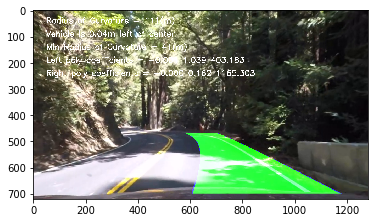

In [29]:
output = 'Harder_project_video_lane_lines.mp4'
clip1 = VideoFileClip("harder_challenge_video.mp4")
output_clip = clip1.fl_image(image_pipeline) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output, audio=False)
